In [1]:
library(tidyverse)
library(readxl)
library(lme4)
library(emmeans)
library(ggplot2)
library(agricolae)
library(dplyr)
library(multcompView)
library(car)
library(readr)
library(ggpubr)
library(tibble)
library(flextable)
library(readODS)
library(stringr)
library(rstatix)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some



Attaching package: ‘flextable’


The following objects are masked from ‘package:ggpubr’:

    border, font, rotate


The following object is masked from ‘package:purrr’:

    compose



Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:


In [2]:
getwd()

[1] "/home/sepideh.jafarian/Desktop/wheat_experiment/final-harvest-data-Sep2022"

In [3]:
f.data<- read_ods("/home/sepideh.jafarian/Desktop/wheat_experiment/final-harvest-data-Sep2022/template for final data collection .main.ods"
                  , sheet = 1)

head(f.data)

Nr-plant experiment IDs     Replication treatment BBCH Collection date
1 121      V22001     2218-11 NA          ww        92   08/12/22       
2 123      V22001     2218-10 NA          ds        92   08/08/22       
3 125      V22001     2156-03 NA          ds        92   08/09/22       
4 126      V22001     2297-14 NA          ds        92   08/08/22       
5 130      V22001     2218-03 NA          ww        92   08/30/22       
6 131      V22001     2352-03 NA          ds        92   11/08/22       
  Max-height Biomass+bags bags weight ⋯ Nr-ears full ears half ears ears-weight
1  91.2      36.39        21.64       ⋯ 10      10        0         15.43      
2  78.0      25.22        20.50       ⋯  5       3        2          3.55      
3  83.0      29.41        21.65       ⋯  3       1        0          1.21      
4  61.0      26.11        20.50       ⋯  6       5        1          3.36      
5 102.0      34.60        20.30       ⋯  9       9        0         10.65      
6  61.0      27.76        22.00       ⋯  3       3        0          3.05      
  Nr-seeds Nr- mature seeds Nr- bad seeds 100 seeds weights(gr)
1 282      282              0             3.73                 
2  67       66              1               NA                 
3  29       29              0               NA                 
4  68       65              3               NA                 
5 214      209              5             3.86                 
6  60       60              0               NA                 
  all seeds weight TKW     
1 10.86            37.30000
2 2.21             32.98507
3 0.66             22.75862
4 1.52             22.35294
5 7.22             38.60000
6 1.90             31.66667

In [5]:
f.data$IDs <- as.character(f.data$IDs)
f.data$IDs <- gsub("(-|_)[[:digit:]][[:digit:]]","", f.data$IDs)
head(f.data)

Nr-plant experiment IDs  Replication treatment BBCH Collection date
1 121      V22001     2218 NA          ww        92   08/12/22       
2 123      V22001     2218 NA          ds        92   08/08/22       
3 125      V22001     2156 NA          ds        92   08/09/22       
4 126      V22001     2297 NA          ds        92   08/08/22       
5 130      V22001     2218 NA          ww        92   08/30/22       
6 131      V22001     2352 NA          ds        92   11/08/22       
  Max-height Biomass+bags bags weight ⋯ Nr-ears full ears half ears ears-weight
1  91.2      36.39        21.64       ⋯ 10      10        0         15.43      
2  78.0      25.22        20.50       ⋯  5       3        2          3.55      
3  83.0      29.41        21.65       ⋯  3       1        0          1.21      
4  61.0      26.11        20.50       ⋯  6       5        1          3.36      
5 102.0      34.60        20.30       ⋯  9       9        0         10.65      
6  61.0      27.76        22.00       ⋯  3       3        0          3.05      
  Nr-seeds Nr- mature seeds Nr- bad seeds 100 seeds weights(gr)
1 282      282              0             3.73                 
2  67       66              1               NA                 
3  29       29              0               NA                 
4  68       65              3               NA                 
5 214      209              5             3.86                 
6  60       60              0               NA                 
  all seeds weight TKW     
1 10.86            37.30000
2 2.21             32.98507
3 0.66             22.75862
4 1.52             22.35294
5 7.22             38.60000
6 1.90             31.66667

In [6]:
f.data$Replication <- NULL

f.data[8:9]<- NULL 

f.data[19]<- NULL 


In [7]:
head(f.data)

Nr-plant experiment IDs  treatment BBCH Collection date Max-height
1 121      V22001     2218 ww        92   08/12/22         91.2     
2 123      V22001     2218 ds        92   08/08/22         78.0     
3 125      V22001     2156 ds        92   08/09/22         83.0     
4 126      V22001     2297 ds        92   08/08/22         61.0     
5 130      V22001     2218 ww        92   08/30/22        102.0     
6 131      V22001     2352 ds        92   11/08/22         61.0     
  pure biomass Nr-shoots-all shoots-(ear) Shoots-no-ear Nr-ears full ears
1 14.75        10            10.0         0             10      10       
2  4.72         5             5.0         0              5       3       
3  7.76         4             3.0         1              3       1       
4  5.61         7             6.0         1              6       5       
5 14.30         9             9.0         0              9       9       
6  5.76         3             3.5         0              3       3       
  half ears ears-weight Nr-seeds Nr- mature seeds Nr- bad seeds
1 0         15.43       282      282              0            
2 2          3.55        67       66              1            
3 0          1.21        29       29              0            
4 1          3.36        68       65              3            
5 0         10.65       214      209              5            
6 0          3.05        60       60              0            
  all seeds weight TKW     
1 10.86            37.30000
2 2.21             32.98507
3 0.66             22.75862
4 1.52             22.35294
5 7.22             38.60000
6 1.90             31.66667

In [8]:
names(f.data)[1]<- "Unit"
names(f.data)[8]<- "Biomass"
names(f.data)[7]<- "max.Height"
names(f.data)[9]<- "Shoots"
names(f.data)[10]<- "Shoots_with_ear"
names(f.data)[11]<- "Shoots_without_ear"
names(f.data)[12]<- "Nr_ears"
names(f.data)[13]<- "Full_ear"
names(f.data)[14]<- "Half_ear"
names(f.data)[15]<- "Weight_ear"
names(f.data)[16]<- "Nr_seeds"
names(f.data)[17]<- "Mature_seeds"
names(f.data)[18]<- "Poor_seeds"
names(f.data)[20]<- "TKW"
str(f.data)
head(f.data)

'data.frame':	115 obs. of  20 variables:
 $ Unit              : num  121 123 125 126 130 131 133 135 136 138 ...
 $ experiment        : chr  "V22001" "V22001" "V22001" "V22001" ...
 $ IDs               : chr  "2218" "2218" "2156" "2297" ...
 $ treatment         : chr  "ww" "ds" "ds" "ds" ...
 $ BBCH              : chr  "92" "92" "92" "92" ...
 $ Collection date   : chr  "08/12/22" "08/08/22" "08/09/22" "08/08/22" ...
 $ max.Height        : num  91.2 78 83 61 102 ...
 $ Biomass           : num  14.75 4.72 7.76 5.61 14.3 ...
 $ Shoots            : num  10 5 4 7 9 3 5 9 4 3 ...
 $ Shoots_with_ear   : num  10 5 3 6 9 3.5 4 9 2 3 ...
 $ Shoots_without_ear: num  0 0 1 1 0 0 1 0 2 0 ...
 $ Nr_ears           : num  10 5 3 6 9 3 4 9 2 3 ...
 $ Full_ear          : num  10 3 1 5 9 3 4 9 2 3 ...
 $ Half_ear          : num  0 2 0 1 0 0 0 0 0 0 ...
 $ Weight_ear        : num  15.43 3.55 1.21 3.36 10.65 ...
 $ Nr_seeds          : num  282 67 29 68 214 60 68 229 44 83 ...
 $ Mature_seeds      : num  2

Unit experiment IDs  treatment BBCH Collection date max.Height Biomass Shoots
1 121  V22001     2218 ww        92   08/12/22         91.2      14.75   10    
2 123  V22001     2218 ds        92   08/08/22         78.0       4.72    5    
3 125  V22001     2156 ds        92   08/09/22         83.0       7.76    4    
4 126  V22001     2297 ds        92   08/08/22         61.0       5.61    7    
5 130  V22001     2218 ww        92   08/30/22        102.0      14.30    9    
6 131  V22001     2352 ds        92   11/08/22         61.0       5.76    3    
  Shoots_with_ear Shoots_without_ear Nr_ears Full_ear Half_ear Weight_ear
1 10.0            0                  10      10       0        15.43     
2  5.0            0                   5       3       2         3.55     
3  3.0            1                   3       1       0         1.21     
4  6.0            1                   6       5       1         3.36     
5  9.0            0                   9       9       0        10.65     
6  3.5            0                   3       3       0         3.05     
  Nr_seeds Mature_seeds Poor_seeds all seeds weight TKW     
1 282      282          0          10.86            37.30000
2  67       66          1          2.21             32.98507
3  29       29          0          0.66             22.75862
4  68       65          3          1.52             22.35294
5 214      209          5          7.22             38.60000
6  60       60          0          1.90             31.66667

In [9]:
f.data[,7]


[1]  91.2  78.0  83.0  61.0 102.0  61.0  67.0 100.2  72.4  65.0  68.0  67.3
 [13]  78.0  82.4  68.2  78.8  50.0  63.0  94.7  72.5 103.5 109.0  90.0  62.0
 [25]  79.0  89.5  81.0  51.0  80.9  77.0  77.3  87.0 100.5  95.0  76.5  94.1
 [37]  70.3  64.0  54.0  71.0  68.0  58.0  69.0  99.9  61.0  88.0  65.7  77.0
 [49]  68.6  73.9  87.0  83.4  72.5 834.7  72.2  92.6  55.0  59.7  84.0  91.5
 [61]  74.5  90.0 109.0  85.5  88.0  52.0  68.2 100.5  78.2  71.0  83.5  74.0
 [73]  69.0  58.0  66.3  65.2  78.7  94.0  74.4  93.4  95.7  78.3  97.5  81.1
 [85]  61.0  65.5 102.0  69.0  98.3  66.0  72.0  87.5  89.8  93.5  67.0  83.5
 [97]  86.0  50.0  95.5  85.5  64.5  76.0  72.4  95.4 104.5  47.0  84.0  64.0
[109]  95.0  82.0  78.0  93.5  66.0  89.2 107.6

In [10]:
f.data[54,7] <- "84.7"
f.data[53:60,]
str(f.data)
f.data$max.Height <- as.numeric(f.data$max.Height)

Unit experiment IDs  treatment BBCH Collection date max.Height Biomass
53 210  V22001     2321 ww        92   08/30/22        72.5        9.38  
54 211  V22001     2352 ww        92   08/30/22        84.7       12.62  
55 213  V22001     2297 ww        92   08/30/22        72.2       13.98  
56 215  V22001     2267 ww        92   08/30/22        92.6       17.69  
57 216  V22001     2297 ds        92   08/08/22        55          4.87  
58 218  V22001     2321 ds        92   08/12/22        59.7        4.93  
59 220  V22001     2007 ww        92   08/18/22        84         11.00  
60 221  V22001     2007 ww        92   08/12/22        91.5        8.87  
   Shoots Shoots_with_ear Shoots_without_ear Nr_ears Full_ear Half_ear
53  7      7              0                   7       7       0       
54  8      8              0                   8       8       0       
55 14     14              0                  14      14       0       
56 11     11              0                  11       9       2       
57  6      6              0                   6       5       1       
58  5      3              2                   3       3       0       
59  9      9              0                   9       9       0       
60 11     11              0                  11      11       0       
   Weight_ear Nr_seeds Mature_seeds Poor_seeds all seeds weight TKW     
53 10.42      231      216          15         7.20             31.10000
54  9.16      231      231           0         6.03             30.20000
55 13.69      408      403           5         9.04             23.60000
56  9.30      204      186          18         5.85             30.30000
57  3.43       92       92           0         2.03             22.06522
58  3.80      107      107           0         2.37             22.20000
59  2.60        0        0           0         0                 0.00000
60 11.27      226      226           0         8.17             36.70000

'data.frame':	115 obs. of  20 variables:
 $ Unit              : num  121 123 125 126 130 131 133 135 136 138 ...
 $ experiment        : chr  "V22001" "V22001" "V22001" "V22001" ...
 $ IDs               : chr  "2218" "2218" "2156" "2297" ...
 $ treatment         : chr  "ww" "ds" "ds" "ds" ...
 $ BBCH              : chr  "92" "92" "92" "92" ...
 $ Collection date   : chr  "08/12/22" "08/08/22" "08/09/22" "08/08/22" ...
 $ max.Height        : chr  "91.2" "78" "83" "61" ...
 $ Biomass           : num  14.75 4.72 7.76 5.61 14.3 ...
 $ Shoots            : num  10 5 4 7 9 3 5 9 4 3 ...
 $ Shoots_with_ear   : num  10 5 3 6 9 3.5 4 9 2 3 ...
 $ Shoots_without_ear: num  0 0 1 1 0 0 1 0 2 0 ...
 $ Nr_ears           : num  10 5 3 6 9 3 4 9 2 3 ...
 $ Full_ear          : num  10 3 1 5 9 3 4 9 2 3 ...
 $ Half_ear          : num  0 2 0 1 0 0 0 0 0 0 ...
 $ Weight_ear        : num  15.43 3.55 1.21 3.36 10.65 ...
 $ Nr_seeds          : num  282 67 29 68 214 60 68 229 44 83 ...
 $ Mature_seeds      : nu

In [11]:
f.data$treatment <- as.factor(f.data$treatmen)
f.data$Unit <- as.character(f.data$Unit)
f.data$IDs <- as.factor(f.data$IDs)
f.data$TKW<- round(f.data$TKW, digits=2)
View(f.data)

Unit experiment IDs  treatment BBCH  Collection date max.Height Biomass
1   121  V22001     2218 ww        92    08/12/22         91.2      14.75  
2   123  V22001     2218 ds        92    08/08/22         78.0       4.72  
3   125  V22001     2156 ds        92    08/09/22         83.0       7.76  
4   126  V22001     2297 ds        92    08/08/22         61.0       5.61  
5   130  V22001     2218 ww        92    08/30/22        102.0      14.30  
6   131  V22001     2352 ds        92    11/08/22         61.0       5.76  
7   133  V22001     2156 ds        92    08/08/22         67.0       6.14  
8   135  V22001     2218 ww        92    08/30/22        100.2      15.28  
9   136  V22001     2364 ds        92    08/18/22         72.4       8.00  
10  138  V22001     2352 ds        92    08/08/22         65.0       4.47  
11  140  V22001     2218 ds        92    08/08/22         68.0       4.95  
12  141  V22001     2095 ww        92    08/18/22         67.3      10.35  
13  143  V22001     2321 ds        90-92 11/08/22         78.0       5.60  
14  145  V22001     2267 ds        92    08/12/22         82.4       8.63  
15  146  V22001     2007 ds        92    08/12/22         68.2       6.72  
16  148  V22001     2321 ww        92    08/22/22         78.8      10.06  
17  150  V22001     2095 ds        92    08/08/22         50.0       3.27  
18  151  V22001     2297 ds        92    08/08/22         63.0       7.43  
19  153  V22001     2364 ww        92    08/29/22         94.7      18.18  
20  155  V22001     2007 ds        92    08/12/22         72.5       7.13  
21  156  V22001     2267 ww        92    08/18/22        103.5      18.56  
22  158  V22001     2156 ww        92    08/18/22        109.0      15.62  
23  160  V22001     2364 ds        92    08/12/22         90.0       8.12  
24  161  V22001     2321 ds        92    08/08/22         62.0       4.27  
25  163  V22001     2297 ww        92    08/18/22         79.0      13.00  
26  165  V22001     2352 ww        92    08/18/22         89.5      14.29  
27  166  V22001     2321 ww        92    08/22/22         81.0      11.27  
28  168  V22001     2095 ds        90    08/09/22         51.0       3.80  
29  170  V22001     2496 ds        92    08/12/22         80.9       7.31  
30  171  V22001     2156 ds        92    08/18/22         77.0       7.66  
⋮   ⋮    ⋮          ⋮    ⋮         ⋮     ⋮               ⋮          ⋮      
86  266  V22001     2095 ww        92    08/18/22         65.5      10.24  
87  268  V22001     2364 ww        92    08/30/22        102.0      19.96  
88  270  V22001     2007 ds        90    08/09/22         69.0       4.15  
89  271  V22001     2218 ww        92    08/18/22         98.3      12.36  
90  273  V22001     2352 ds        91    08/09/22         66.0       5.11  
91  275  V22001     2218 ds        92    11/08/22         72.0       5.71  
92  276  V22001     2364 ds        92    08/18/22         87.5       5.77  
93  278  V22001     2352 ww        92    08/22/22         89.8      14.53  
94  280  V22001     2496 ww        92    08/18/22         93.5      12.52  
95  281  V22001     2218 ds        92    08/09/22         67.0       5.04  
96  283  V22001     2352 ww        92    08/30/22         83.5      17.20  
97  285  V22001     2007 ww        92    08/18/22         86.0      10.54  
98  286  V22001     2095 ds        92    08/08/22         50.0       3.68  
99  288  V22001     2156 ww        92    08/18/22         95.5      16.81  
100 290  V22001     2267 ww        92    08/30/22         85.5      13.50  
101 291  V22001     2095 ww        92    08/22/22         64.5      10.39  
102 293  V22001     2321 ww        92    08/12/22         76.0      12.27  
103 295  V22001     2321 ds        92    08/12/22         72.4       5.00  
104 296  V22001     2218 ww        92    08/12/22         95.4      16.54  
105 298  V22001     2156 ww        92    08/12/22        104.5      21.83  
106 300  V22001     2095 ds        92    08/08/22   

In [13]:
logic = str_detect(f.data$IDs, "2267")
f.data = f.data[!logic,]
length(unique(f.data$IDs))

[1] 9

In [15]:
f.data[55, ]
final.data <- f.data[-55, ]
View(final.data)
dim(final.data)

Unit experiment IDs  treatment BBCH Collection date max.Height Biomass
59 220  V22001     2007 ww        92   08/18/22        84         11     
   Shoots Shoots_with_ear Shoots_without_ear Nr_ears Full_ear Half_ear
59 9      9               0                  9       9        0       
   Weight_ear Nr_seeds Mature_seeds Poor_seeds all seeds weight TKW
59 2.6        0        0            0          0                0

Unit experiment IDs  treatment BBCH  Collection date max.Height Biomass
1   121  V22001     2218 ww        92    08/12/22         91.2      14.75  
2   123  V22001     2218 ds        92    08/08/22         78.0       4.72  
3   125  V22001     2156 ds        92    08/09/22         83.0       7.76  
4   126  V22001     2297 ds        92    08/08/22         61.0       5.61  
5   130  V22001     2218 ww        92    08/30/22        102.0      14.30  
6   131  V22001     2352 ds        92    11/08/22         61.0       5.76  
7   133  V22001     2156 ds        92    08/08/22         67.0       6.14  
8   135  V22001     2218 ww        92    08/30/22        100.2      15.28  
9   136  V22001     2364 ds        92    08/18/22         72.4       8.00  
10  138  V22001     2352 ds        92    08/08/22         65.0       4.47  
11  140  V22001     2218 ds        92    08/08/22         68.0       4.95  
12  141  V22001     2095 ww        92    08/18/22         67.3      10.35  
13  143  V22001     2321 ds        90-92 11/08/22         78.0       5.60  
15  146  V22001     2007 ds        92    08/12/22         68.2       6.72  
16  148  V22001     2321 ww        92    08/22/22         78.8      10.06  
17  150  V22001     2095 ds        92    08/08/22         50.0       3.27  
18  151  V22001     2297 ds        92    08/08/22         63.0       7.43  
19  153  V22001     2364 ww        92    08/29/22         94.7      18.18  
20  155  V22001     2007 ds        92    08/12/22         72.5       7.13  
22  158  V22001     2156 ww        92    08/18/22        109.0      15.62  
23  160  V22001     2364 ds        92    08/12/22         90.0       8.12  
24  161  V22001     2321 ds        92    08/08/22         62.0       4.27  
25  163  V22001     2297 ww        92    08/18/22         79.0      13.00  
26  165  V22001     2352 ww        92    08/18/22         89.5      14.29  
27  166  V22001     2321 ww        92    08/22/22         81.0      11.27  
28  168  V22001     2095 ds        90    08/09/22         51.0       3.80  
29  170  V22001     2496 ds        92    08/12/22         80.9       7.31  
30  171  V22001     2156 ds        92    08/18/22         77.0       7.66  
31  173  V22001     2321 ww        92    08/18/22         77.3       8.34  
32  175  V22001     2496 ds        92    11/08/22         87.0       8.18  
⋮   ⋮    ⋮          ⋮    ⋮         ⋮     ⋮               ⋮          ⋮      
83  261  V22001     2156 ww        92    08/18/22         97.5      16.15  
84  263  V22001     2297 ww        92    08/18/22         81.1      12.64  
85  265  V22001     2297 ds        92    08/09/22         61.0       4.37  
86  266  V22001     2095 ww        92    08/18/22         65.5      10.24  
87  268  V22001     2364 ww        92    08/30/22        102.0      19.96  
88  270  V22001     2007 ds        90    08/09/22         69.0       4.15  
89  271  V22001     2218 ww        92    08/18/22         98.3      12.36  
90  273  V22001     2352 ds        91    08/09/22         66.0       5.11  
91  275  V22001     2218 ds        92    11/08/22         72.0       5.71  
92  276  V22001     2364 ds        92    08/18/22         87.5       5.77  
93  278  V22001     2352 ww        92    08/22/22         89.8      14.53  
94  280  V22001     2496 ww        92    08/18/22         93.5      12.52  
95  281  V22001     2218 ds        92    08/09/22         67.0       5.04  
96  283  V22001     2352 ww        92    08/30/22         83.5      17.20  
97  285  V22001     2007 ww        92    08/18/22         86.0      10.54  
98  286  V22001     2095 ds        92    08/08/22         50.0       3.68  
99  288  V22001     2156 ww        92    08/18/22         95.5      16.81  
101 291  V22001     2095 ww        92    08/22/22         64.5      10.39  
102 293  V22001     2321 ww        92    08/12/22         76.0      12.27  
103 295  V22001     2321 ds        92    08/12/22         72.4       5.00  
104 296  V22001     2218 ww        92    08/12/22   

[1] 104  20

In [105]:
check=unique(final.data$IDs)
check
str(final.data)

final.data$IDs <- droplevels(final.data$IDs)
str(final.data)
levels(final.data$IDs)

[1] 2218 2156 2297 2352 2364 2095 2321 2007 2496
Levels: 2007 2095 2156 2218 2267 2297 2321 2352 2364 2496

'data.frame':	104 obs. of  20 variables:
 $ Unit              : chr  "121" "123" "125" "126" ...
 $ experiment        : chr  "V22001" "V22001" "V22001" "V22001" ...
 $ IDs               : Factor w/ 10 levels "2007","2095",..: 4 4 3 6 4 8 3 4 9 8 ...
 $ treatment         : Factor w/ 2 levels "ds","ww": 2 1 1 1 2 1 1 2 1 1 ...
 $ BBCH              : chr  "92" "92" "92" "92" ...
 $ Collection date   : chr  "08/12/22" "08/08/22" "08/09/22" "08/08/22" ...
 $ max.Height        : num  91.2 78 83 61 102 ...
 $ Biomass           : num  14.75 4.72 7.76 5.61 14.3 ...
 $ Shoots            : num  10 5 4 7 9 3 5 9 4 3 ...
 $ Shoots_with_ear   : num  10 5 3 6 9 3.5 4 9 2 3 ...
 $ Shoots_without_ear: num  0 0 1 1 0 0 1 0 2 0 ...
 $ Nr_ears           : num  10 5 3 6 9 3 4 9 2 3 ...
 $ Full_ear          : num  10 3 1 5 9 3 4 9 2 3 ...
 $ Half_ear          : num  0 2 0 1 0 0 0 0 0 0 ...
 $ Weight_ear        : num  15.43 3.55 1.21 3.36 10.65 ...
 $ Nr_seeds          : num  282 67 29 68 214 60 68 229 44 83

[1] "2007" "2095" "2156" "2218" "2297" "2321" "2352" "2364" "2496"

In [40]:
getwd()

[1] "/home/sepideh.jafarian/Desktop/wheat_experiment/final-harvest-data-Sep2022"

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


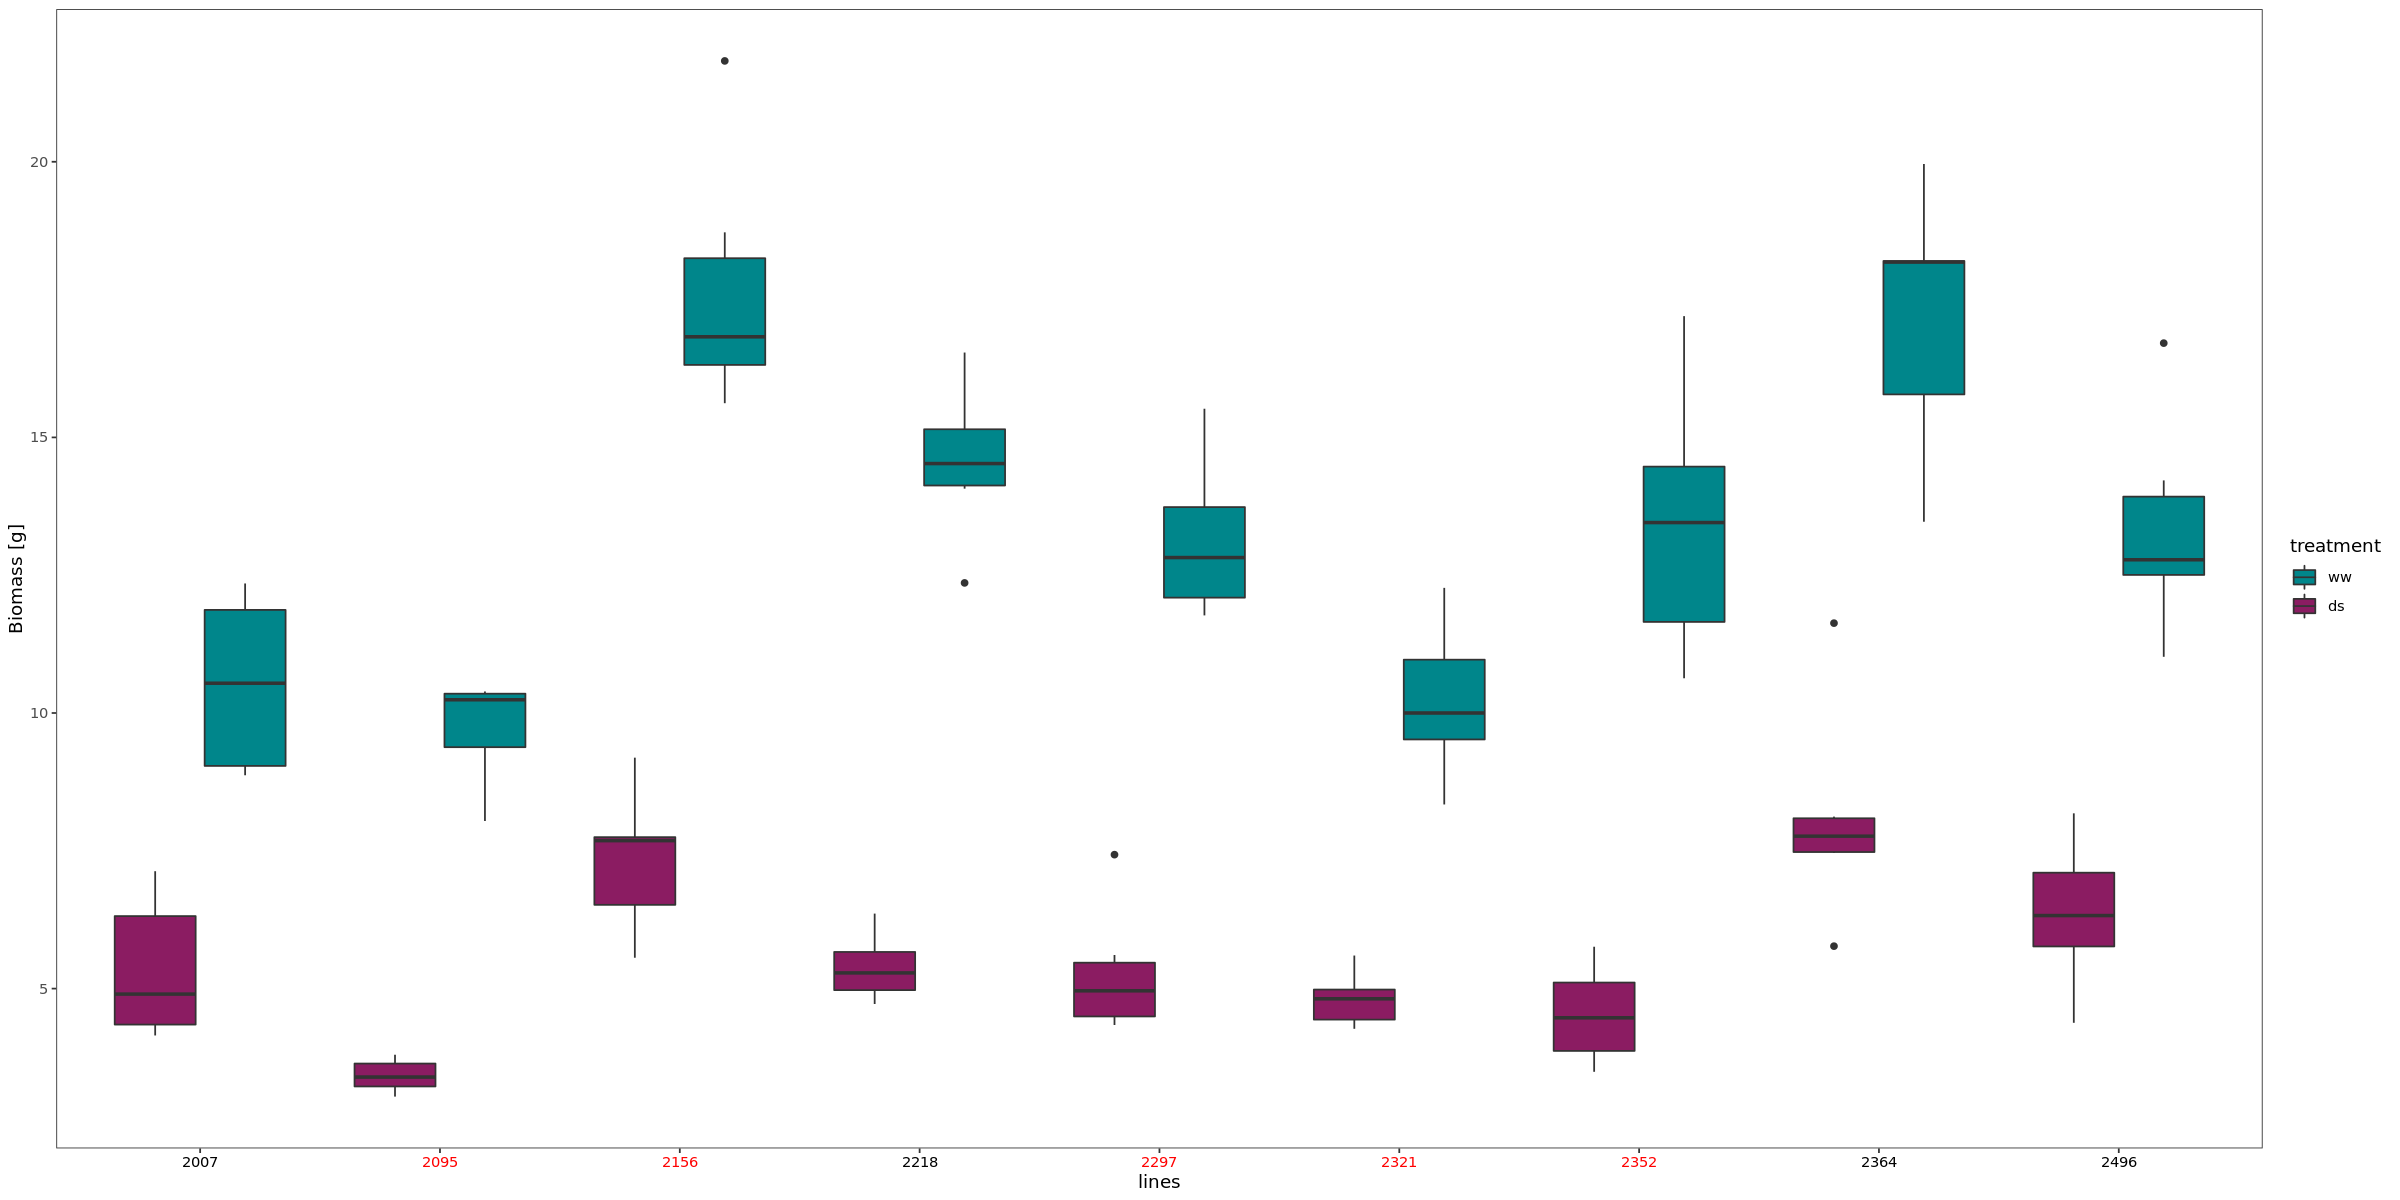

In [20]:
options(repr.plot.width=20, repr.plot.height=10)
Biomass <- ggplot(final.data, aes(x=IDs, y=Biomass, fill=treatment))+
       geom_boxplot()+
       theme(text=element_text(size = 20))+
       scale_fill_manual(breaks =final.data$treatment,
                    values = c("turquoise4","maroon4")) +
        labs(y="Biomass [g]", x="lines")+
theme_bw()+
theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
theme(axis.text.x = element_text(colour=c("black","red","red","black","red","red","red","black","black")))
    print(Biomass)



ggsave("Biomass-boxplot.png", plot = Biomass, width = 15, height = 10,
       path="/home/sepideh.jafarian/Desktop/wheat_experiment/final-harvest-data-Sep2022/Visualization/Biomass")




                         
         

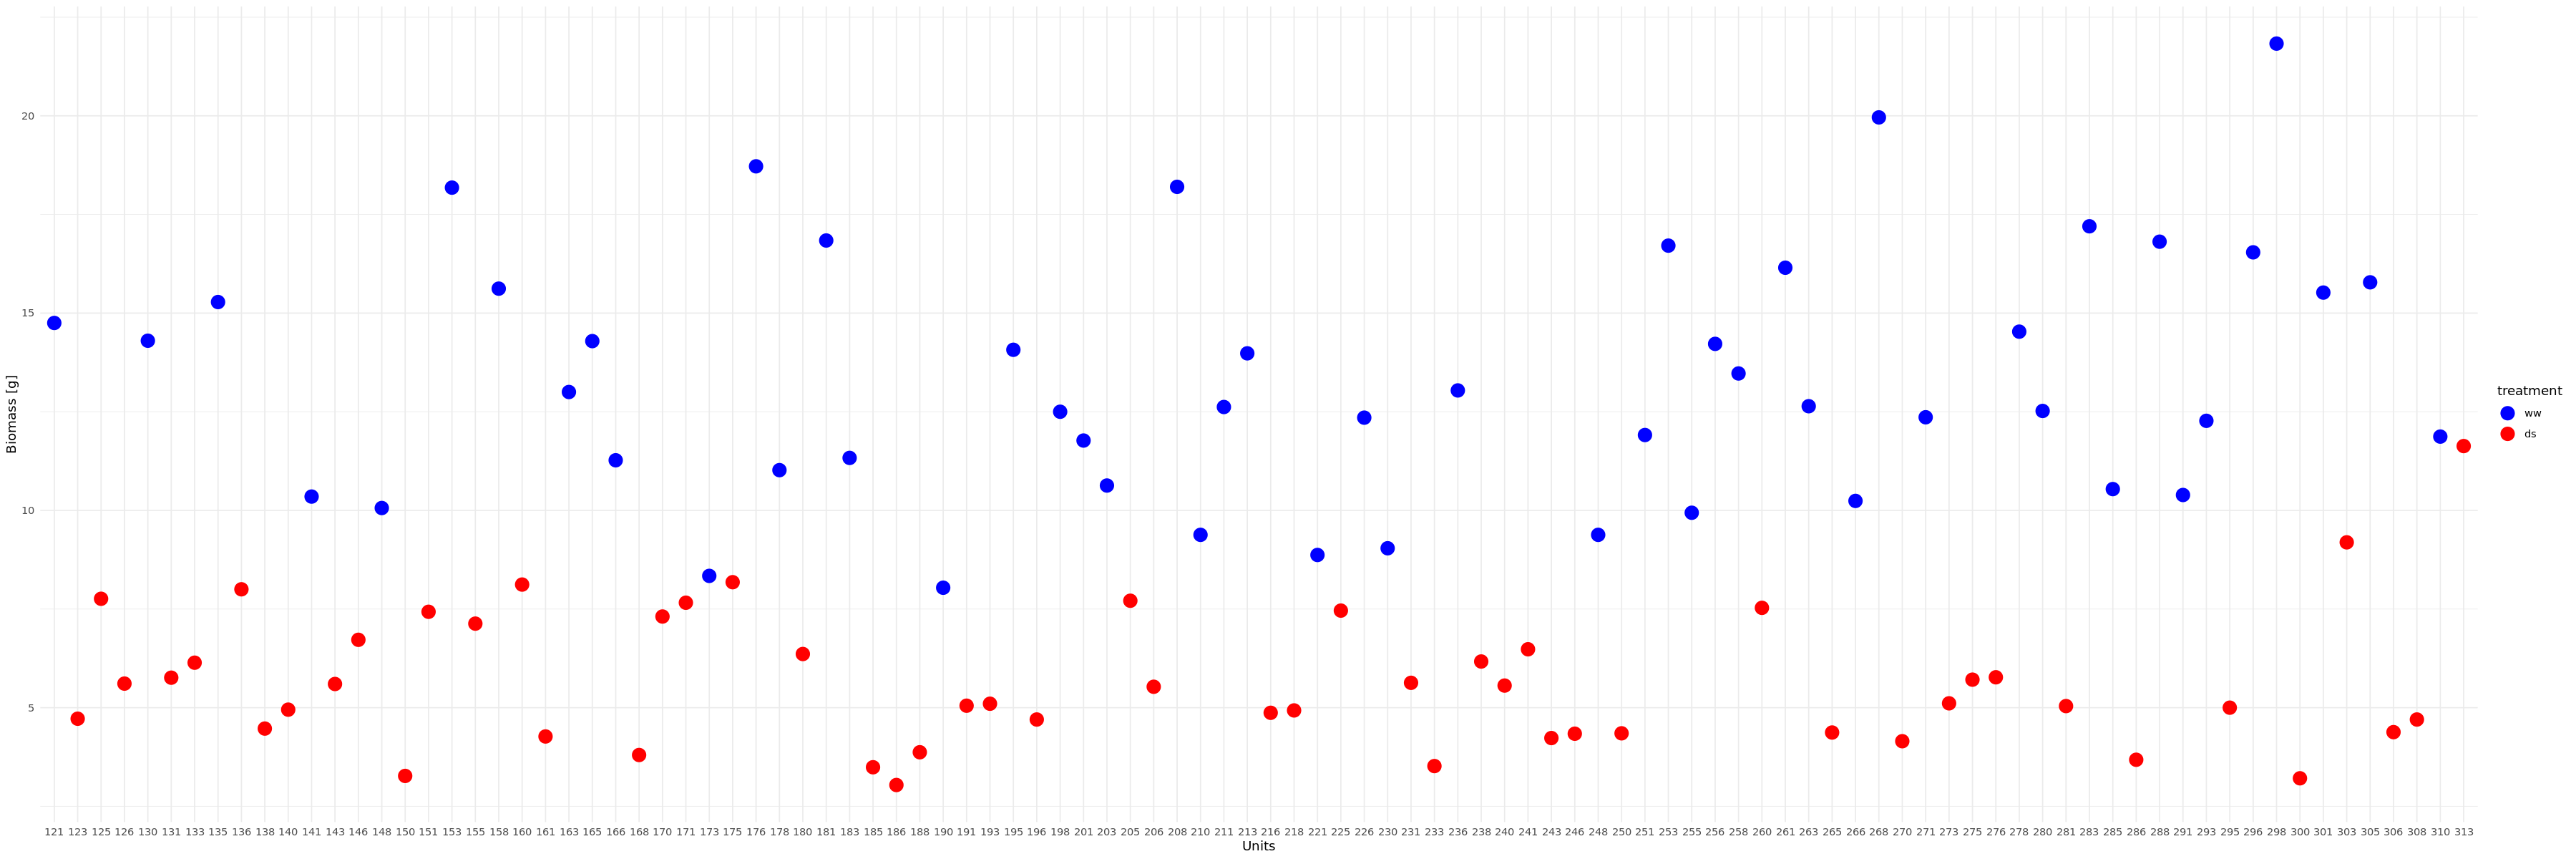

In [28]:
final.data$Unit<- as.character(final.data$Unit)
options(repr.plot.width=30, repr.plot.height=10)
Bs<-  ggplot(final.data, aes(x=Unit, y=Biomass,color=treatment))+
  geom_point(size=5)+
 scale_color_manual(breaks = c("ww", "ds"),
                        values=c("blue", "red"))+
theme(text=element_text(size = 20))+
  ylab('Biomass [g]')+
  xlab('Units')+
  theme_minimal()
print(Bs)

ggsave("Biomass-scatter.pdf", plot = Bs, width = 30, height = 10,
       path="/home/sepideh.jafarian/Desktop/wheat_experiment/final-harvest-data-Sep2022/Visualization/Biomass")


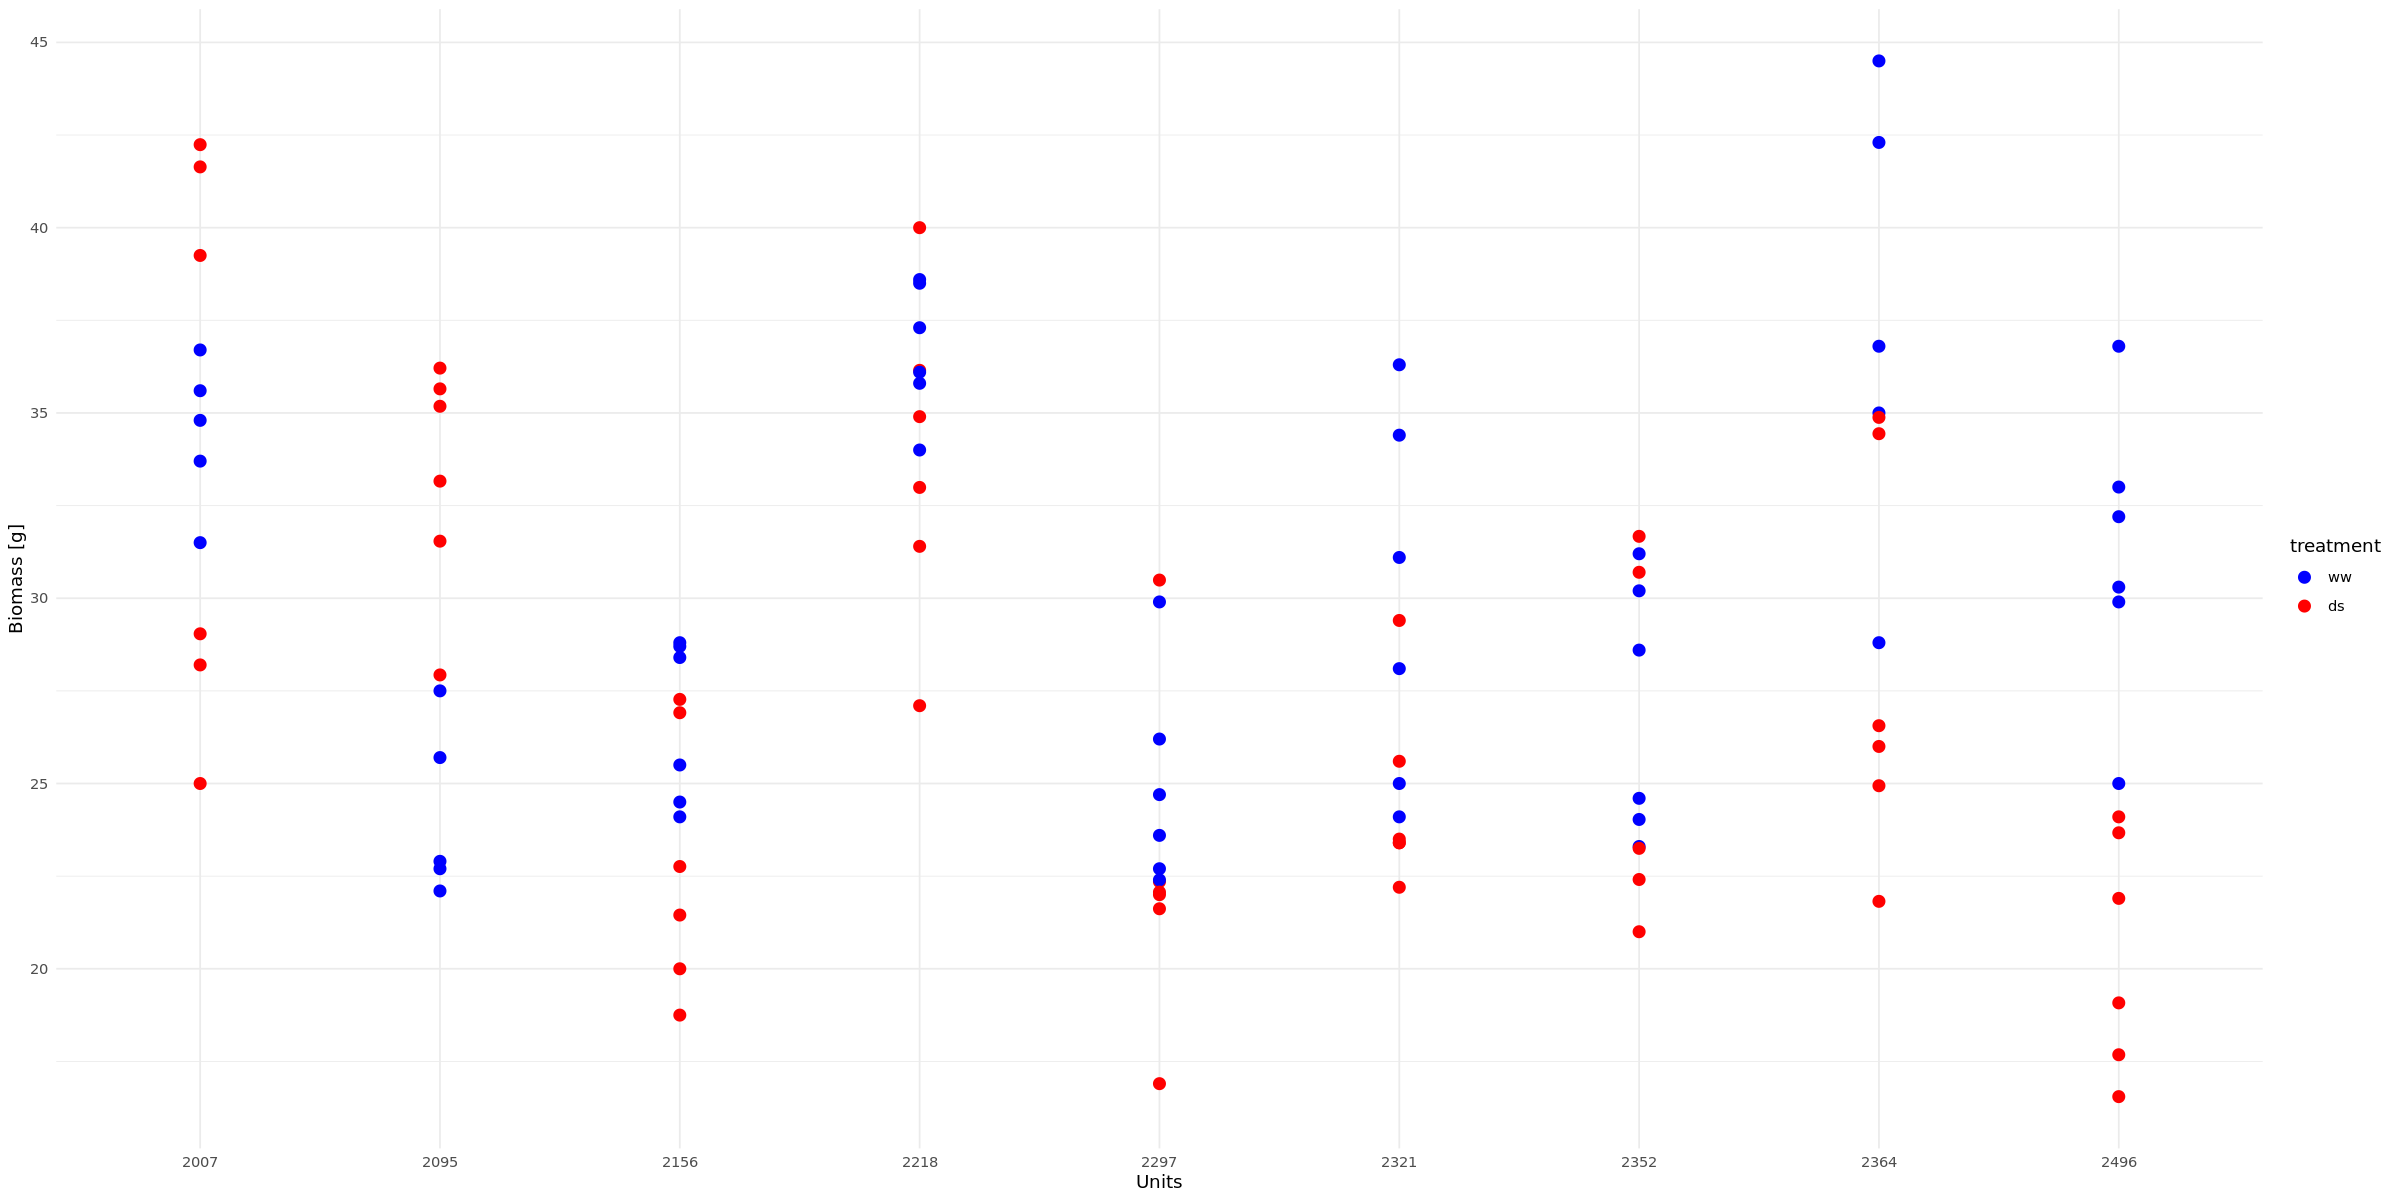

In [27]:
options(repr.plot.width=20, repr.plot.height=10)
B1<- ggplot(final.data, aes(x=IDs, y=TKW, color=treatment))+
 
  geom_point(size=3)+
 scale_color_manual(breaks = c("ww", "ds"),
                        values=c("blue", "red"))+
theme(text=element_text(size = 25))+
  ylab('Biomass [g]')+
  xlab('Units')+
  theme_minimal()
print(B1)

ggsave("Biomass-line-scatter.pdf", plot = B1, width = 30, height = 10,
       path="/home/sepideh.jafarian/Desktop/wheat_experiment/final-harvest-data-Sep2022/Visualization/Biomass")

In [17]:
length(f.data$Biomass[f.data$treatment=="ww"])
 length(f.data$Biomass[f.data$treatment=="ds"])

[1] 52

[1] 53

# Check for the normal distribution of each group

## First making separate groups and assign to a variable

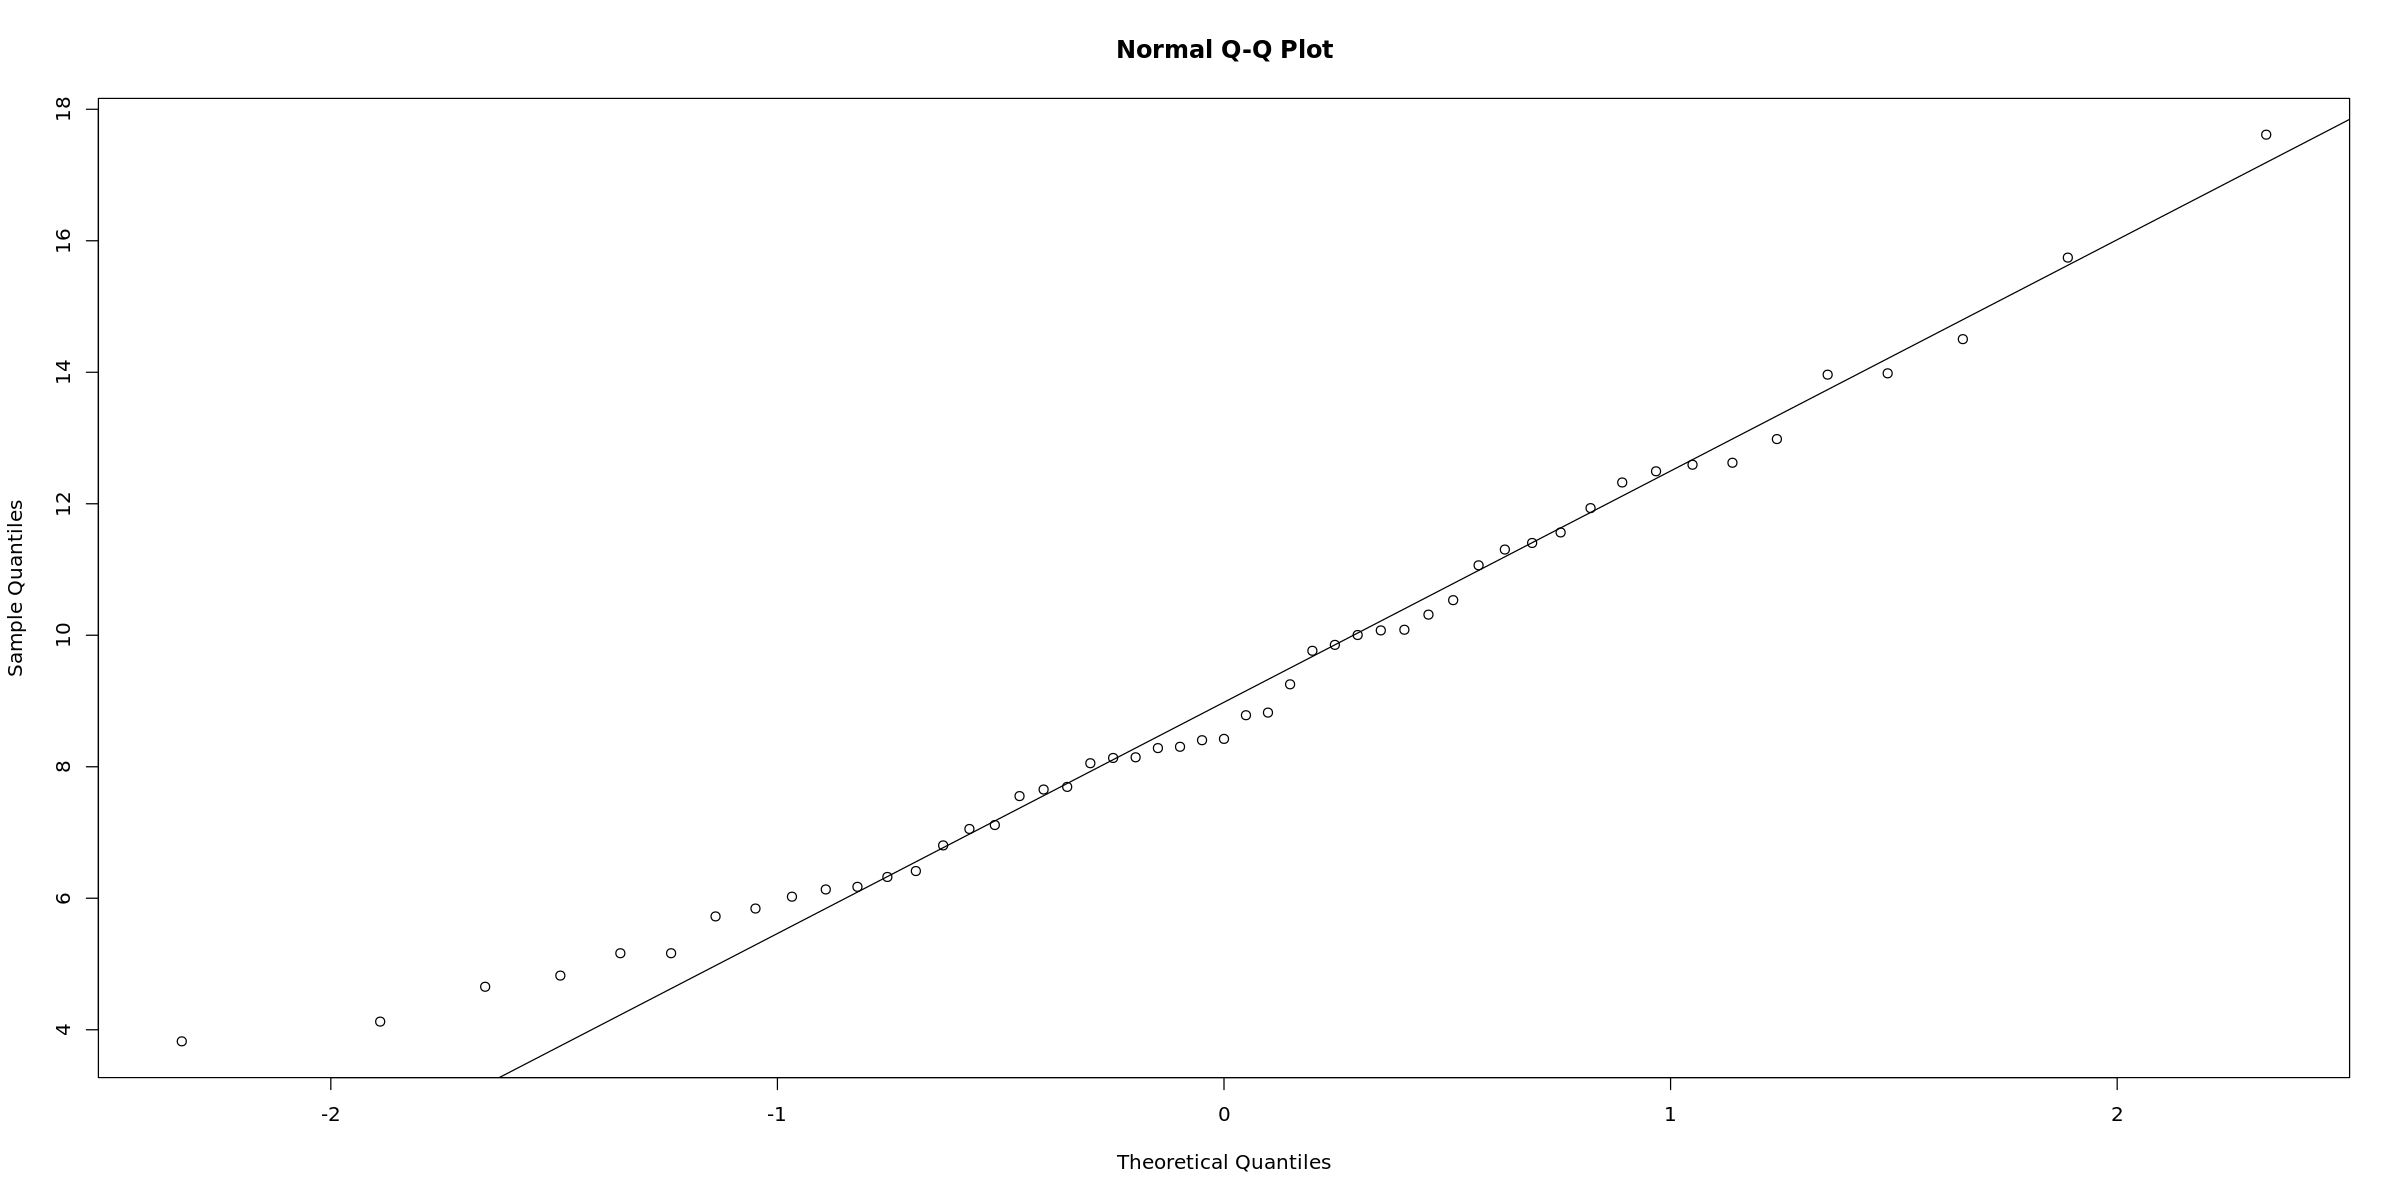

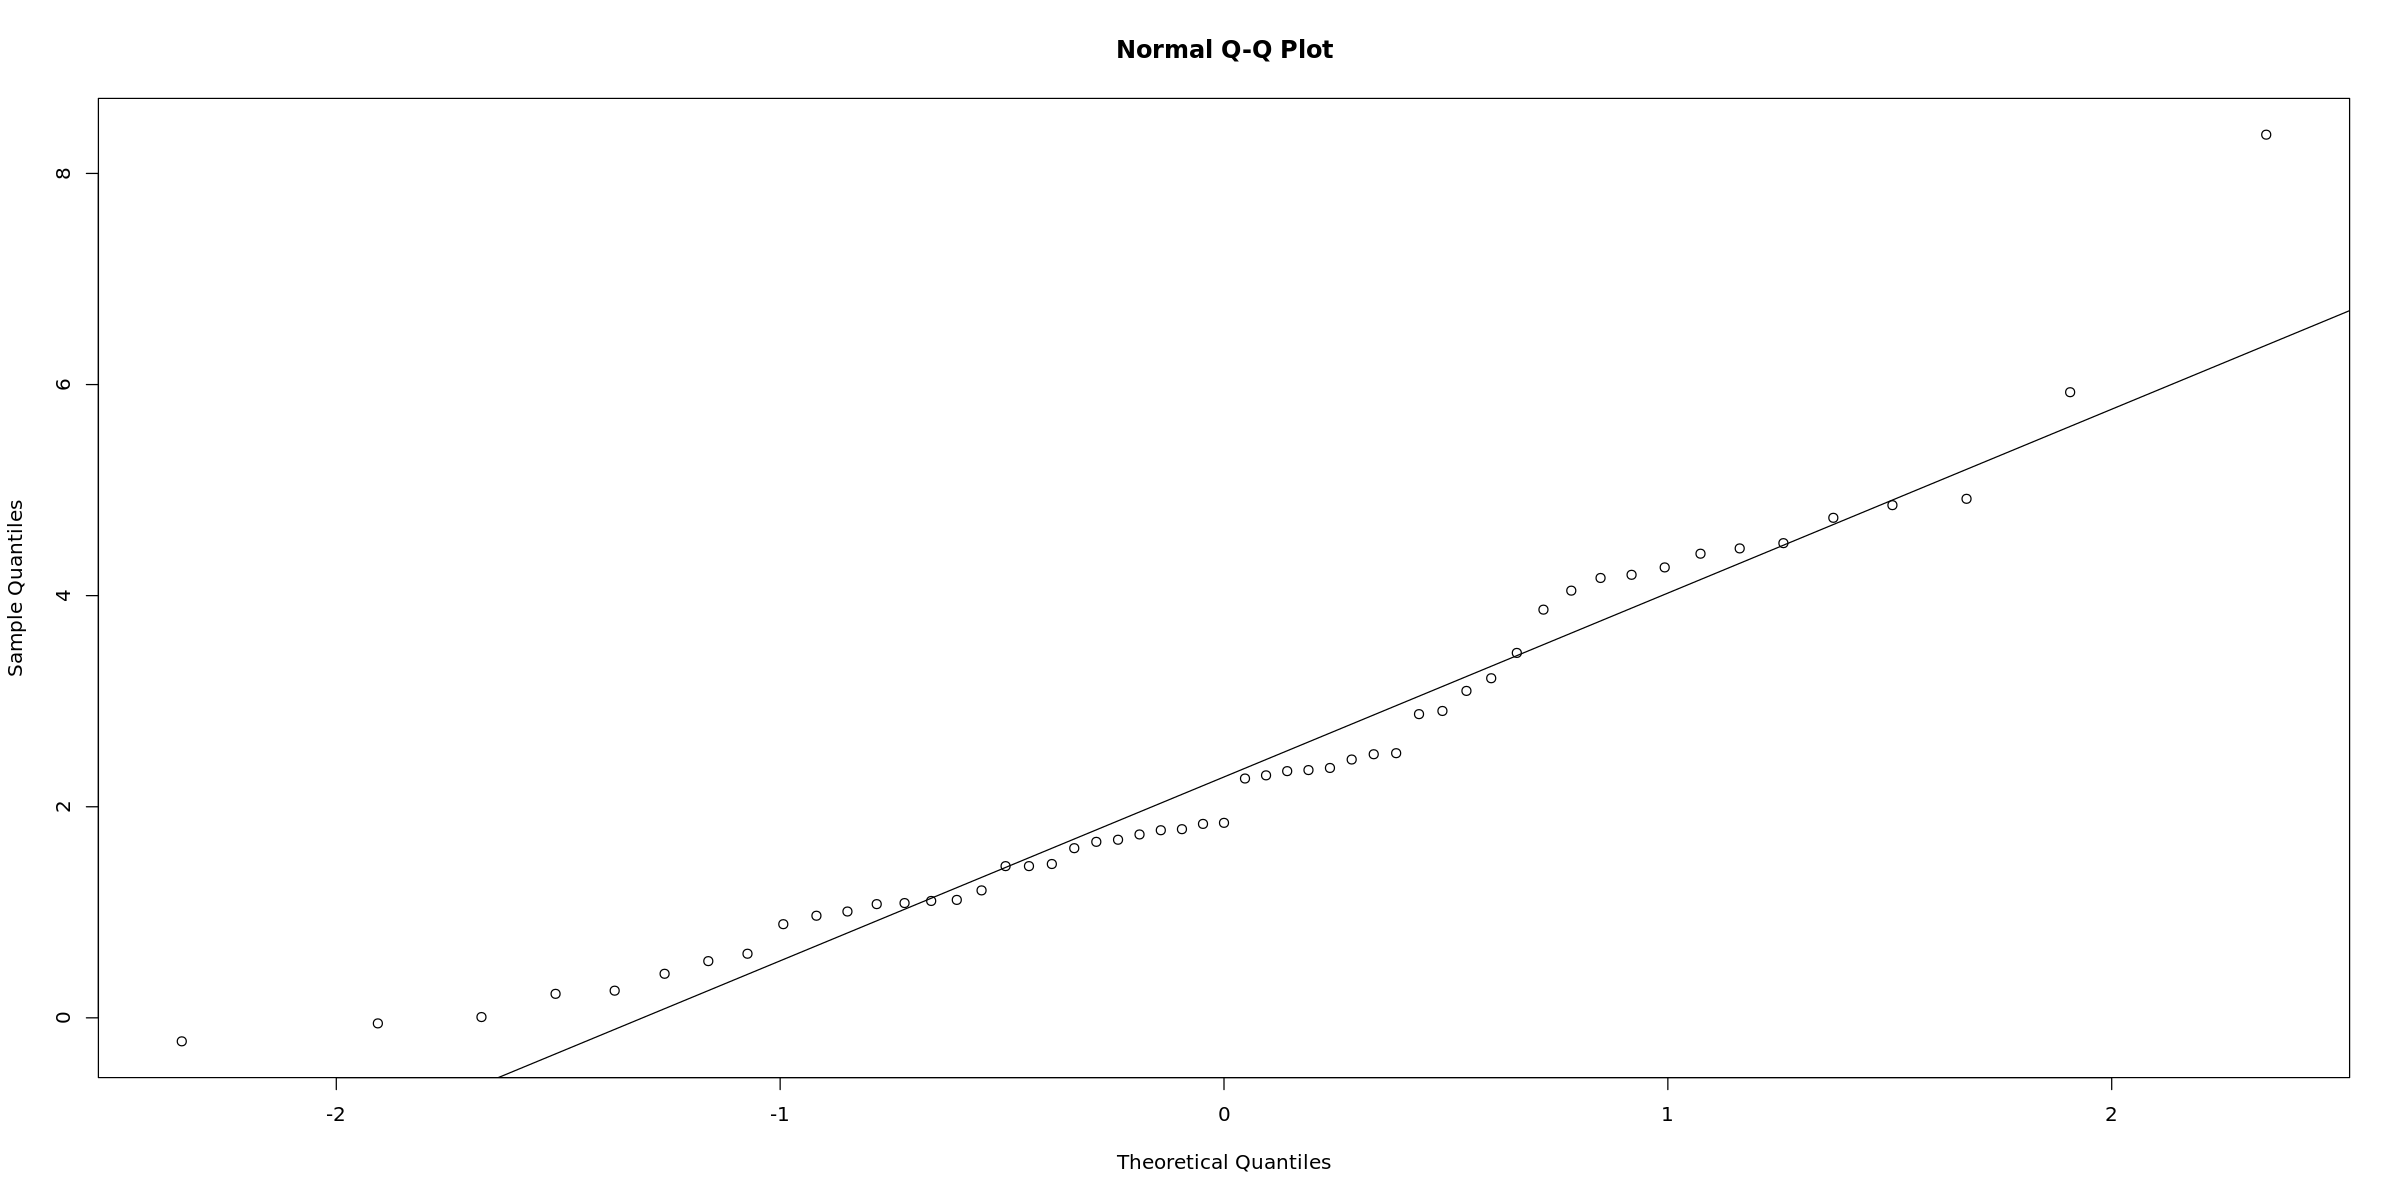

In [18]:
control_fdata<- final.data$Biomass[final.data$treatment=="ww"]
stress_fdata <- final.data$Biomass[final.data$treatment=="ds"]


qqnorm(control_fdata- mean(control_fdata)/sd(control_fdata))
qqline(control_fdata- mean(control_fdata)/sd(control_fdata))


qqnorm(stress_fdata - mean(stress_fdata)/sd(stress_fdata))
qqline(stress_fdata - mean(stress_fdata)/sd(stress_fdata))


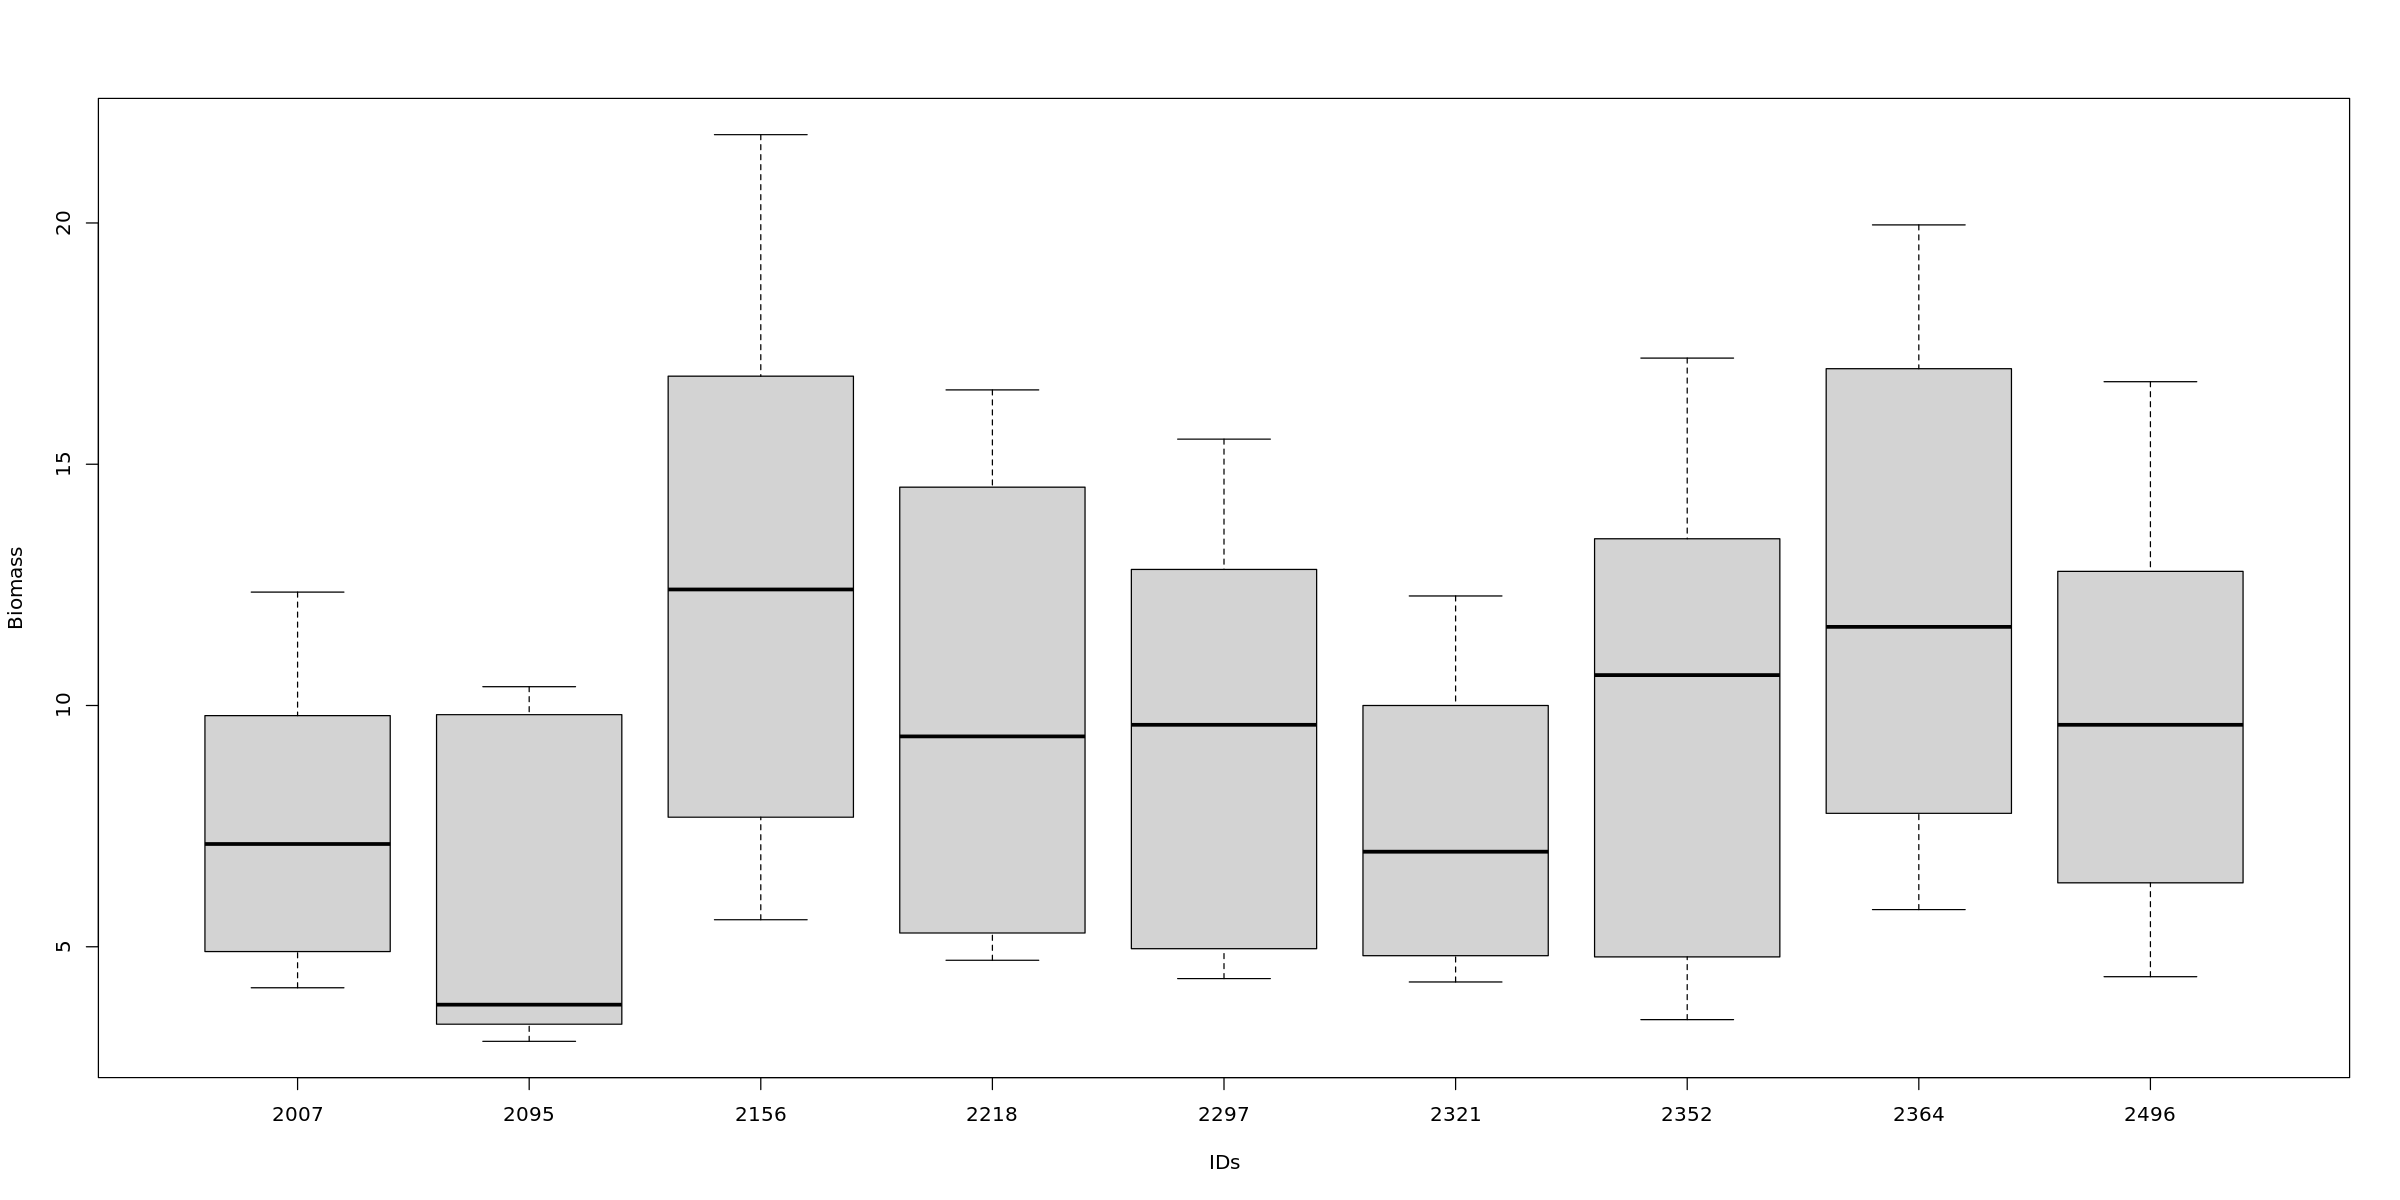

In [19]:
boxplot(Biomass~IDs, data=final.data)

In [20]:
control_data<- final.data$TKW[final.data$treatment=="ww"]
stress_data <- final.data$TKW[final.data$treatment=="ds"]

var(control_data)
var(stress_data)
var(control_data)/var(stress_data)

[1] 32.65528

[1] 43.58713

[1] 0.7491955

# Check for the homogenity of the variances

### - F-test: Compare the variances of two groups. The data must be normally distributed.
### - Bartlett’s test: Compare the variances of two or more groups. The data must be normally distributed.
### - Levene’s test: A robust alternative to the Bartlett’s test that is less sensitive to departures from normality.
### - Fligner-Killeen’s test: a non-parametric test which is very robust against departures from normality.

In [21]:
traits<- final.data[,-c(1,2,3,4,5,6,19)]
head(traits)
colNames<- colnames(traits)
colNames
length(colNames)
1:length(colNames)

max.Height Biomass Shoots Shoots_with_ear Shoots_without_ear Nr_ears Full_ear
1  91.2      14.75   10     10.0            0                  10      10      
2  78.0       4.72    5      5.0            0                   5       3      
3  83.0       7.76    4      3.0            1                   3       1      
4  61.0       5.61    7      6.0            1                   6       5      
5 102.0      14.30    9      9.0            0                   9       9      
6  61.0       5.76    3      3.5            0                   3       3      
  Half_ear Weight_ear Nr_seeds Mature_seeds Poor_seeds TKW  
1 0        15.43      282      282          0          37.30
2 2         3.55       67       66          1          32.99
3 0         1.21       29       29          0          22.76
4 1         3.36       68       65          3          22.35
5 0        10.65      214      209          5          38.60
6 0         3.05       60       60          0          31.67

[1] "max.Height"         "Biomass"            "Shoots"            
 [4] "Shoots_with_ear"    "Shoots_without_ear" "Nr_ears"           
 [7] "Full_ear"           "Half_ear"           "Weight_ear"        
[10] "Nr_seeds"           "Mature_seeds"       "Poor_seeds"        
[13] "TKW"

[1] 13

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13

In [22]:
NV_table <- list()
nor_c <- list()
nor_s <- list()
lev_test <-list()

idx=1


for(i in colNames){
  
        logic = final.data$treatment == "ww"
        nor_c[[idx]] <-shapiro.test(final.data[logic,i])
        nor_s[[idx]] <-shapiro.test(final.data[!logic,i])
     
        lev_test[[idx]] = leveneTest(as.formula(paste(i,"~treatment")), data=final.data)
                  idx=idx+1
 

}

In [23]:
for (i in seq(1, length(colNames), 1)){
readline(paste("Normality of control group for", colNames[i]))
    print(lev_test[[i]])

}
 

Normality of control group for max.Height 
Normality of control group for Biomass 
Normality of control group for Shoots 
Normality of control group for Shoots_with_ear 
Normality of control group for Shoots_without_ear 
Normality of control group for Nr_ears 
Normality of control group for Full_ear 
Normality of control group for Half_ear 
Normality of control group for Weight_ear 
Normality of control group for Nr_seeds 
Normality of control group for Mature_seeds 
Normality of control group for Poor_seeds 
Normality of control group for TKW 


Levene's Test for Homogeneity of Variance (center = median)
       Df F value Pr(>F)
group   1  0.2508 0.6176
      102               
Levene's Test for Homogeneity of Variance (center = median)
       Df F value    Pr(>F)    
group   1  14.479 0.0002419 ***
      102                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Levene's Test for Homogeneity of Variance (center = median)
       Df F value  Pr(>F)  
group   1  5.1234 0.02572 *
      102                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Levene's Test for Homogeneity of Variance (center = median)
       Df F value  Pr(>F)   
group   1  8.9788 0.00343 **
      102                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Levene's Test for Homogeneity of Variance (center = median)
       Df F value Pr(>F)
group   1  2.4179 0.1231
      102               
Levene's Test for Homogeneity of Variance (center = median)
       Df F value   Pr

In [106]:
head(final.data)
str(final.data)
final.data$Groups <- "High"



final.data$Groups[grep("2156", final.data$IDs)] <- "Low"
final.data$Groups[grep("2352", final.data$IDs)] <- "Low"
final.data$Groups[grep("2321", final.data$IDs)] <- "Low"
final.data$Groups[grep("2297", final.data$IDs)] <- "Low"
final.data$Groups[grep("2095", final.data$IDs)] <- "Low"
View(final.data)


Unit experiment IDs  treatment BBCH Collection date max.Height Biomass Shoots
1 121  V22001     2218 ww        92   08/12/22         91.2      14.75   10    
2 123  V22001     2218 ds        92   08/08/22         78.0       4.72    5    
3 125  V22001     2156 ds        92   08/09/22         83.0       7.76    4    
4 126  V22001     2297 ds        92   08/08/22         61.0       5.61    7    
5 130  V22001     2218 ww        92   08/30/22        102.0      14.30    9    
6 131  V22001     2352 ds        92   11/08/22         61.0       5.76    3    
  Shoots_with_ear Shoots_without_ear Nr_ears Full_ear Half_ear Weight_ear
1 10.0            0                  10      10       0        15.43     
2  5.0            0                   5       3       2         3.55     
3  3.0            1                   3       1       0         1.21     
4  6.0            1                   6       5       1         3.36     
5  9.0            0                   9       9       0        10.65     
6  3.5            0                   3       3       0         3.05     
  Nr_seeds Mature_seeds Poor_seeds all seeds weight TKW  
1 282      282          0          10.86            37.30
2  67       66          1          2.21             32.99
3  29       29          0          0.66             22.76
4  68       65          3          1.52             22.35
5 214      209          5          7.22             38.60
6  60       60          0          1.90             31.67

'data.frame':	104 obs. of  20 variables:
 $ Unit              : chr  "121" "123" "125" "126" ...
 $ experiment        : chr  "V22001" "V22001" "V22001" "V22001" ...
 $ IDs               : Factor w/ 9 levels "2007","2095",..: 4 4 3 5 4 7 3 4 8 7 ...
 $ treatment         : Factor w/ 2 levels "ds","ww": 2 1 1 1 2 1 1 2 1 1 ...
 $ BBCH              : chr  "92" "92" "92" "92" ...
 $ Collection date   : chr  "08/12/22" "08/08/22" "08/09/22" "08/08/22" ...
 $ max.Height        : num  91.2 78 83 61 102 ...
 $ Biomass           : num  14.75 4.72 7.76 5.61 14.3 ...
 $ Shoots            : num  10 5 4 7 9 3 5 9 4 3 ...
 $ Shoots_with_ear   : num  10 5 3 6 9 3.5 4 9 2 3 ...
 $ Shoots_without_ear: num  0 0 1 1 0 0 1 0 2 0 ...
 $ Nr_ears           : num  10 5 3 6 9 3 4 9 2 3 ...
 $ Full_ear          : num  10 3 1 5 9 3 4 9 2 3 ...
 $ Half_ear          : num  0 2 0 1 0 0 0 0 0 0 ...
 $ Weight_ear        : num  15.43 3.55 1.21 3.36 10.65 ...
 $ Nr_seeds          : num  282 67 29 68 214 60 68 229 44 83 

Unit experiment IDs  treatment BBCH  Collection date max.Height Biomass
1   121  V22001     2218 ww        92    08/12/22         91.2      14.75  
2   123  V22001     2218 ds        92    08/08/22         78.0       4.72  
3   125  V22001     2156 ds        92    08/09/22         83.0       7.76  
4   126  V22001     2297 ds        92    08/08/22         61.0       5.61  
5   130  V22001     2218 ww        92    08/30/22        102.0      14.30  
6   131  V22001     2352 ds        92    11/08/22         61.0       5.76  
7   133  V22001     2156 ds        92    08/08/22         67.0       6.14  
8   135  V22001     2218 ww        92    08/30/22        100.2      15.28  
9   136  V22001     2364 ds        92    08/18/22         72.4       8.00  
10  138  V22001     2352 ds        92    08/08/22         65.0       4.47  
11  140  V22001     2218 ds        92    08/08/22         68.0       4.95  
12  141  V22001     2095 ww        92    08/18/22         67.3      10.35  
13  143  V22001     2321 ds        90-92 11/08/22         78.0       5.60  
15  146  V22001     2007 ds        92    08/12/22         68.2       6.72  
16  148  V22001     2321 ww        92    08/22/22         78.8      10.06  
17  150  V22001     2095 ds        92    08/08/22         50.0       3.27  
18  151  V22001     2297 ds        92    08/08/22         63.0       7.43  
19  153  V22001     2364 ww        92    08/29/22         94.7      18.18  
20  155  V22001     2007 ds        92    08/12/22         72.5       7.13  
22  158  V22001     2156 ww        92    08/18/22        109.0      15.62  
23  160  V22001     2364 ds        92    08/12/22         90.0       8.12  
24  161  V22001     2321 ds        92    08/08/22         62.0       4.27  
25  163  V22001     2297 ww        92    08/18/22         79.0      13.00  
26  165  V22001     2352 ww        92    08/18/22         89.5      14.29  
27  166  V22001     2321 ww        92    08/22/22         81.0      11.27  
28  168  V22001     2095 ds        90    08/09/22         51.0       3.80  
29  170  V22001     2496 ds        92    08/12/22         80.9       7.31  
30  171  V22001     2156 ds        92    08/18/22         77.0       7.66  
31  173  V22001     2321 ww        92    08/18/22         77.3       8.34  
32  175  V22001     2496 ds        92    11/08/22         87.0       8.18  
⋮   ⋮    ⋮          ⋮    ⋮         ⋮     ⋮               ⋮          ⋮      
83  261  V22001     2156 ww        92    08/18/22         97.5      16.15  
84  263  V22001     2297 ww        92    08/18/22         81.1      12.64  
85  265  V22001     2297 ds        92    08/09/22         61.0       4.37  
86  266  V22001     2095 ww        92    08/18/22         65.5      10.24  
87  268  V22001     2364 ww        92    08/30/22        102.0      19.96  
88  270  V22001     2007 ds        90    08/09/22         69.0       4.15  
89  271  V22001     2218 ww        92    08/18/22         98.3      12.36  
90  273  V22001     2352 ds        91    08/09/22         66.0       5.11  
91  275  V22001     2218 ds        92    11/08/22         72.0       5.71  
92  276  V22001     2364 ds        92    08/18/22         87.5       5.77  
93  278  V22001     2352 ww        92    08/22/22         89.8      14.53  
94  280  V22001     2496 ww        92    08/18/22         93.5      12.52  
95  281  V22001     2218 ds        92    08/09/22         67.0       5.04  
96  283  V22001     2352 ww        92    08/30/22         83.5      17.20  
97  285  V22001     2007 ww        92    08/18/22         86.0      10.54  
98  286  V22001     2095 ds        92    08/08/22         50.0       3.68  
99  288  V22001     2156 ww        92    08/18/22         95.5      16.81  
101 291  V22001     2095 ww        92    08/22/22         64.5      10.39  
102 293  V22001     2321 ww        92    08/12/22         76.0      12.27  
103 295  V22001     2321 ds        92    08/12/22         72.4       5.00  
104 296  V22001     2218 ww        92    08/12/22   

In [25]:
getwd()

[1] "/home/sepideh.jafarian/Desktop/wheat_experiment/final-harvest-data-Sep2022"

In [ ]:
#write.csv(final.data, "final.data.csv")
final.data<- read.csv("final.data.csv",sep=",", header=TRUE)
View(final.data)

In [3]:
final.data$IDs<- as.factor(final.data$IDs)
final.data$treatment<- as.factor(final.data$treatment)
final.data$Group<- as.factor(final.data$Group)
final.data$Shoots<- as.numeric(final.data$Shoots)
final.data$Nr_ears <- as.numeric(final.data$Nr_ears )
final.data$Full_ear <- as.numeric(final.data$Full_ear )
final.data$Half_ear<- as.numeric(final.data$Half_ear)
final.data$Nr_seeds <- as.numeric(final.data$ Nr_seeds )
final.data$Mature_seeds <- as.numeric(final.data$Mature_seeds )
final.data$Poor_seeds  <- as.numeric(final.data$Poor_seeds  )
str(final.data)


'data.frame':	104 obs. of  23 variables:
 $ X                 : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Unit              : int  121 123 125 126 130 131 133 135 136 138 ...
 $ experiment        : chr  "V22001" "V22001" "V22001" "V22001" ...
 $ IDs               : Factor w/ 9 levels "2007","2095",..: 4 4 3 5 4 7 3 4 8 7 ...
 $ treatment         : Factor w/ 2 levels "ds","ww": 2 1 1 1 2 1 1 2 1 1 ...
 $ BBCH              : chr  "92" "92" "92" "92" ...
 $ Collection.date   : chr  "08/12/22" "08/08/22" "08/09/22" "08/08/22" ...
 $ max.Height        : num  91.2 78 83 61 102 ...
 $ Biomass           : num  14.75 4.72 7.76 5.61 14.3 ...
 $ Shoots            : num  10 5 4 7 9 3 5 9 4 3 ...
 $ Shoots_with_ear   : num  10 5 3 6 9 3.5 4 9 2 3 ...
 $ Shoots_without_ear: num  0 0 1 1 0 0 1 0 2 0 ...
 $ Nr_ears           : num  10 5 3 6 9 3 4 9 2 3 ...
 $ Full_ear          : num  10 3 1 5 9 3 4 9 2 3 ...
 $ Half_ear          : num  0 2 0 1 0 0 0 0 0 0 ...
 $ Weight_ear        : num  15.43 3.55 1.21 3.36 10

In [ ]:
View(final.data)

# Conversion of our for loop list into the data frame
## First option: usind do.call (but changes the deciminals of P-Value). this mostly will be used for nested lists using cbind orrbind function
## Second option: Using t apply which serves the format and deciminals

In [110]:
#contro_table_normality<- do.call(rbind.data.frame, nor_c)

CNormality_shapiro_table <- data.frame(t(sapply(nor_c,c)))
CNormality_shapiro_table $Traits <- 1:nrow(CNormality_shapiro_table ) 


CNormality_shapiro_table[1:13,5] <- c("max.Height","Biomass","Shoots","Shoots_with_ear","Shoots_without_ear",
                                      "	Nr_ears	","Full_ear","Half_ear","Weight_ear","Nr_seeds","Mature_seeds","Poor_seeds","TKW")

View(CNormality_shapiro_table)

SNormality_shapiro_table <- data.frame(t(sapply(nor_s,c)))
SNormality_shapiro_table $Traits <- 1:nrow(SNormality_shapiro_table )
SNormality_shapiro_table[1:13,5] <- c("max.Height","Biomass","Shoots","Shoots_with_ear","Shoots_without_ear",
                                      "	Nr_ears	","Full_ear","Half_ear","Weight_ear","Nr_seeds","Mature_seeds","Poor_seeds","TKW")

View(SNormality_shapiro_table)


leventes_result <- data.frame(t(sapply(lev_test,c)))
leventes_result  $Traits <- 1:nrow(leventes_result)

leventes_result[1:13,4] <- c("max.Height","Biomass","Shoots","Shoots_with_ear","Shoots_without_ear",
                                      "	Nr_ears	","Full_ear","Half_ear","Weight_ear","Nr_seeds","Mature_seeds","Poor_seeds","TKW")
View(leventes_result)

statistic p.value      method                      data.name           
1  0.9584259 0.07147244   Shapiro-Wilk normality test final.data[logic, i]
2  0.9737454 0.3143574    Shapiro-Wilk normality test final.data[logic, i]
3  0.938498  0.01069554   Shapiro-Wilk normality test final.data[logic, i]
4  0.9347362 0.007596054  Shapiro-Wilk normality test final.data[logic, i]
5  0.3011272 3.438368e-14 Shapiro-Wilk normality test final.data[logic, i]
6  0.9571488 0.06306886   Shapiro-Wilk normality test final.data[logic, i]
7  0.9484871 0.02726616   Shapiro-Wilk normality test final.data[logic, i]
8  0.3812624 2.411919e-13 Shapiro-Wilk normality test final.data[logic, i]
9  0.9720445 0.2684327    Shapiro-Wilk normality test final.data[logic, i]
10 0.950569  0.03328992   Shapiro-Wilk normality test final.data[logic, i]
11 0.9474276 0.02464618   Shapiro-Wilk normality test final.data[logic, i]
12 0.5465344 2.572855e-11 Shapiro-Wilk normality test final.data[logic, i]
13 0.9466136 0.02281183   Shapiro-Wilk normality test final.data[logic, i]
   Traits            
1  max.Height        
2  Biomass           
3  Shoots            
4  Shoots_with_ear   
5  Shoots_without_ear
6  \tNr_ears\t       
7  Full_ear          
8  Half_ear          
9  Weight_ear        
10 Nr_seeds          
11 Mature_seeds      
12 Poor_seeds        
13 TKW

statistic p.value      method                      data.name            
1  0.9779783 0.4311468    Shapiro-Wilk normality test final.data[!logic, i]
2  0.9345162 0.006113583  Shapiro-Wilk normality test final.data[!logic, i]
3  0.8959638 0.0002359857 Shapiro-Wilk normality test final.data[!logic, i]
4  0.8796912 7.028497e-05 Shapiro-Wilk normality test final.data[!logic, i]
5  0.7819212 1.887246e-07 Shapiro-Wilk normality test final.data[!logic, i]
6  0.8713498 3.897536e-05 Shapiro-Wilk normality test final.data[!logic, i]
7  0.8758815 5.355892e-05 Shapiro-Wilk normality test final.data[!logic, i]
8  0.7460069 3.218264e-08 Shapiro-Wilk normality test final.data[!logic, i]
9  0.9634185 0.1039225    Shapiro-Wilk normality test final.data[!logic, i]
10 0.9679778 0.1648657    Shapiro-Wilk normality test final.data[!logic, i]
11 0.9669418 0.1485228    Shapiro-Wilk normality test final.data[!logic, i]
12 0.359353  7.562761e-14 Shapiro-Wilk normality test final.data[!logic, i]
13 0.9534489 0.03792776   Shapiro-Wilk normality test final.data[!logic, i]
   Traits            
1  max.Height        
2  Biomass           
3  Shoots            
4  Shoots_with_ear   
5  Shoots_without_ear
6  \tNr_ears\t       
7  Full_ear          
8  Half_ear          
9  Weight_ear        
10 Nr_seeds          
11 Mature_seeds      
12 Poor_seeds        
13 TKW

Df     F.value       Pr..F.           Traits            
1  1, 102 0.2507711, NA 0.6176115, NA    max.Height        
2  1, 102 14.47937, NA  0.0002418732, NA Biomass           
3  1, 102 5.123364, NA  0.02572361, NA   Shoots            
4  1, 102 8.978784, NA  0.003429556, NA  Shoots_with_ear   
5  1, 102 2.417895, NA  0.1230535, NA    Shoots_without_ear
6  1, 102 10.44745, NA  0.00165449, NA   \tNr_ears\t       
7  1, 102 12.55269, NA  0.0005983829, NA Full_ear          
8  1, 102 13.26716, NA  0.0004265459, NA Half_ear          
9  1, 102 16.71096, NA  8.696037e-05, NA Weight_ear        
10 1, 102 12.96089, NA  0.0004929654, NA Nr_seeds          
11 1, 102 12.79292, NA  0.0005338178, NA Mature_seeds      
12 1, 102 7.013074, NA  0.009377346, NA  Poor_seeds        
13 1, 102 0.8300199, NA 0.3644148, NA    TKW

In [5]:

str(final.data)
unique(final.data$IDs)
final.data<- final.data[,-1]
View(final.data)

'data.frame':	104 obs. of  23 variables:
 $ X                 : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Unit              : int  121 123 125 126 130 131 133 135 136 138 ...
 $ experiment        : chr  "V22001" "V22001" "V22001" "V22001" ...
 $ IDs               : Factor w/ 9 levels "2007","2095",..: 4 4 3 5 4 7 3 4 8 7 ...
 $ treatment         : Factor w/ 2 levels "ds","ww": 2 1 1 1 2 1 1 2 1 1 ...
 $ BBCH              : chr  "92" "92" "92" "92" ...
 $ Collection.date   : chr  "08/12/22" "08/08/22" "08/09/22" "08/08/22" ...
 $ max.Height        : num  91.2 78 83 61 102 ...
 $ Biomass           : num  14.75 4.72 7.76 5.61 14.3 ...
 $ Shoots            : num  10 5 4 7 9 3 5 9 4 3 ...
 $ Shoots_with_ear   : num  10 5 3 6 9 3.5 4 9 2 3 ...
 $ Shoots_without_ear: num  0 0 1 1 0 0 1 0 2 0 ...
 $ Nr_ears           : num  10 5 3 6 9 3 4 9 2 3 ...
 $ Full_ear          : num  10 3 1 5 9 3 4 9 2 3 ...
 $ Half_ear          : num  0 2 0 1 0 0 0 0 0 0 ...
 $ Weight_ear        : num  15.43 3.55 1.21 3.36 10

[1] 2218 2156 2297 2352 2364 2095 2321 2007 2496
Levels: 2007 2095 2156 2218 2297 2321 2352 2364 2496

Unit experiment IDs  treatment BBCH  Collection.date max.Height Biomass
1   121  V22001     2218 ww        92    08/12/22         91.2      14.75  
2   123  V22001     2218 ds        92    08/08/22         78.0       4.72  
3   125  V22001     2156 ds        92    08/09/22         83.0       7.76  
4   126  V22001     2297 ds        92    08/08/22         61.0       5.61  
5   130  V22001     2218 ww        92    08/30/22        102.0      14.30  
6   131  V22001     2352 ds        92    11/08/22         61.0       5.76  
7   133  V22001     2156 ds        92    08/08/22         67.0       6.14  
8   135  V22001     2218 ww        92    08/30/22        100.2      15.28  
9   136  V22001     2364 ds        92    08/18/22         72.4       8.00  
10  138  V22001     2352 ds        92    08/08/22         65.0       4.47  
11  140  V22001     2218 ds        92    08/08/22         68.0       4.95  
12  141  V22001     2095 ww        92    08/18/22         67.3      10.35  
13  143  V22001     2321 ds        90-92 11/08/22         78.0       5.60  
14  146  V22001     2007 ds        92    08/12/22         68.2       6.72  
15  148  V22001     2321 ww        92    08/22/22         78.8      10.06  
16  150  V22001     2095 ds        92    08/08/22         50.0       3.27  
17  151  V22001     2297 ds        92    08/08/22         63.0       7.43  
18  153  V22001     2364 ww        92    08/29/22         94.7      18.18  
19  155  V22001     2007 ds        92    08/12/22         72.5       7.13  
20  158  V22001     2156 ww        92    08/18/22        109.0      15.62  
21  160  V22001     2364 ds        92    08/12/22         90.0       8.12  
22  161  V22001     2321 ds        92    08/08/22         62.0       4.27  
23  163  V22001     2297 ww        92    08/18/22         79.0      13.00  
24  165  V22001     2352 ww        92    08/18/22         89.5      14.29  
25  166  V22001     2321 ww        92    08/22/22         81.0      11.27  
26  168  V22001     2095 ds        90    08/09/22         51.0       3.80  
27  170  V22001     2496 ds        92    08/12/22         80.9       7.31  
28  171  V22001     2156 ds        92    08/18/22         77.0       7.66  
29  173  V22001     2321 ww        92    08/18/22         77.3       8.34  
30  175  V22001     2496 ds        92    11/08/22         87.0       8.18  
⋮   ⋮    ⋮          ⋮    ⋮         ⋮     ⋮               ⋮          ⋮      
75  261  V22001     2156 ww        92    08/18/22         97.5      16.15  
76  263  V22001     2297 ww        92    08/18/22         81.1      12.64  
77  265  V22001     2297 ds        92    08/09/22         61.0       4.37  
78  266  V22001     2095 ww        92    08/18/22         65.5      10.24  
79  268  V22001     2364 ww        92    08/30/22        102.0      19.96  
80  270  V22001     2007 ds        90    08/09/22         69.0       4.15  
81  271  V22001     2218 ww        92    08/18/22         98.3      12.36  
82  273  V22001     2352 ds        91    08/09/22         66.0       5.11  
83  275  V22001     2218 ds        92    11/08/22         72.0       5.71  
84  276  V22001     2364 ds        92    08/18/22         87.5       5.77  
85  278  V22001     2352 ww        92    08/22/22         89.8      14.53  
86  280  V22001     2496 ww        92    08/18/22         93.5      12.52  
87  281  V22001     2218 ds        92    08/09/22         67.0       5.04  
88  283  V22001     2352 ww        92    08/30/22         83.5      17.20  
89  285  V22001     2007 ww        92    08/18/22         86.0      10.54  
90  286  V22001     2095 ds        92    08/08/22         50.0       3.68  
91  288  V22001     2156 ww        92    08/18/22         95.5      16.81  
92  291  V22001     2095 ww        92    08/22/22         64.5      10.39  
93  293  V22001     2321 ww        92    08/12/22         76.0      12.27  
94  295  V22001     2321 ds        92    08/12/22         72.4       5.00  
95  296  V22001     2218 ww        92    08/12/22   

# Biomass

In [5]:
Biomass_AN <- aov(Biomass~ treatment*IDs, data=final.data)
summary(Biomass_AN)


              Df Sum Sq Mean Sq F value   Pr(>F)    
treatment      1 1544.4  1544.4 661.406  < 2e-16 ***
IDs            8  379.3    47.4  20.304  < 2e-16 ***
treatment:IDs  8   76.1     9.5   4.073 0.000379 ***
Residuals     86  200.8     2.3                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [ ]:
tukey <- TukeyHSD(Biomass_AN, conf.level=.95)
print(tukey)


In [46]:
tukey.cld.Biomass <- multcompLetters4(Biomass_AN, tukey)
print(tukey.cld.Biomass)

$treatment
 ww  ds 
"a" "b" 

$IDs
 2156  2364  2218  2496  2352  2297  2007  2321  2095 
  "a"   "a"   "b"   "b"  "bc"  "bc" "bcd"  "cd"   "d" 

$`treatment:IDs`
ww:2156 ww:2364 ww:2218 ww:2352 ww:2496 ww:2297 ww:2007 ww:2321 ww:2095 ds:2364 
    "a"     "a"    "ab"    "bc"   "bcd"   "bcd"   "cde"    "de"    "ef"   "efg" 
ds:2156 ds:2496 ds:2218 ds:2007 ds:2297 ds:2321 ds:2352 ds:2095 
 "efgh"  "fghi"   "ghi"   "ghi"   "ghi"    "hi"    "hi"     "i" 



In [47]:
Biomass_summary <- group_by(final.data, treatment, IDs) %>%
summarise(mean=mean(Biomass), sd=sd(Biomass))%>%
arrange(desc(mean)) 
          View(Biomass_summary)


Biomass_summary_t <- group_by(final.data, treatment) %>%
summarise(mean=mean(Biomass), sd=sd(Biomass))%>%
arrange(desc(mean)) 
          View(Biomass_summary_t)


Biomass_summary_l <- group_by(final.data, IDs) %>%
summarise(mean=mean(Biomass), sd=sd(Biomass))%>%
arrange(desc(mean)) 
          View(Biomass_summary_l)

`summarise()` has grouped output by 'treatment'. You can override using the
`.groups` argument.


treatment IDs  mean      sd       
1  ww        2156 17.661667 2.2956081
2  ww        2364 17.118000 2.5235729
3  ww        2218 14.550000 1.3872275
4  ww        2352 13.433333 2.4111629
5  ww        2496 13.335000 1.9484122
6  ww        2297 13.136667 1.4162862
7  ww        2007 10.534000 1.5877437
8  ww        2321 10.210000 1.3891292
9  ww        2095  9.680000 1.0057584
10 ds        2364  8.085000 1.9304585
11 ds        2156  7.336667 1.2997333
12 ds        2496  6.358333 1.3205062
13 ds        2218  5.385000 0.6046073
14 ds        2007  5.338333 1.2824885
15 ds        2297  5.278333 1.1544768
16 ds        2321  4.808333 0.4878285
17 ds        2352  4.540000 0.9178235
18 ds        2095  3.420000 0.2942788

treatment mean      sd      
1 ww        13.345490 3.165252
2 ds         5.636981 1.727793

IDs  mean      sd      
1 2156 12.499167 5.677808
2 2364 12.190909 5.163711
3 2218  9.967500 4.893794
4 2496  9.846667 3.974028
5 2352  9.390909 4.981384
6 2297  9.207500 4.284789
7 2007  7.700000 3.031999
8 2321  7.509167 2.990474
9 2095  6.265455 3.336982

In [43]:
cld.Biomass <- as.data.frame.list(tukey.cld.Biomass$`treatment:IDs`)
Biomass_summary$tukey <- cld.Biomass$Letters
write.table(Biomass_summary, "Biomass.summary.August.csv")
View(Biomass_summary)

cld.Biomass.t <- as.data.frame.list(tukey.cld.Biomass$`treatment`)
Biomass_summary_t$tukey.t <- cld.Biomass.t$Letters
write.table(Biomass_summary_t, "Biomass.summary.t.August.csv")
View(Biomass_summary_t)

cld.Biomass.l <- as.data.frame.list(tukey.cld.Biomass$`IDs`)
Biomass_summary_l$tukey.l <- cld.Biomass.l$Letters
write.table(Biomass_summary_l, "Biomass.summary.l.August.csv")
View(Biomass_summary_l)

ERROR: Error in as.data.frame.list(tukey.cld.Biomass$`treatment:IDs`): object 'tukey.cld.Biomass' not found


In [23]:
Biomass_Int <- read.table("Biomass.summary.August.csv")
Biomass_T<- read.table("Biomass.summary.t.August.csv")
Biomass_L<- read.table("Biomass.summary.l.August.csv")

In [24]:
Biomass_Int$treatment <- as.factor(Biomass_Int$treatment)
Biomass_Int$IDs<- as.factor(Biomass_Int$IDs)
str(Biomass_Int)


'data.frame':	18 obs. of  5 variables:
 $ treatment: Factor w/ 2 levels "ds","ww": 2 2 2 2 2 2 2 2 2 1 ...
 $ IDs      : Factor w/ 9 levels "2007","2095",..: 3 8 4 7 9 5 1 6 2 8 ...
 $ mean     : num  17.7 17.1 14.6 13.4 13.3 ...
 $ sd       : num  2.3 2.52 1.39 2.41 1.95 ...
 $ tukey    : chr  "a" "a" "ab" "bc" ...


Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


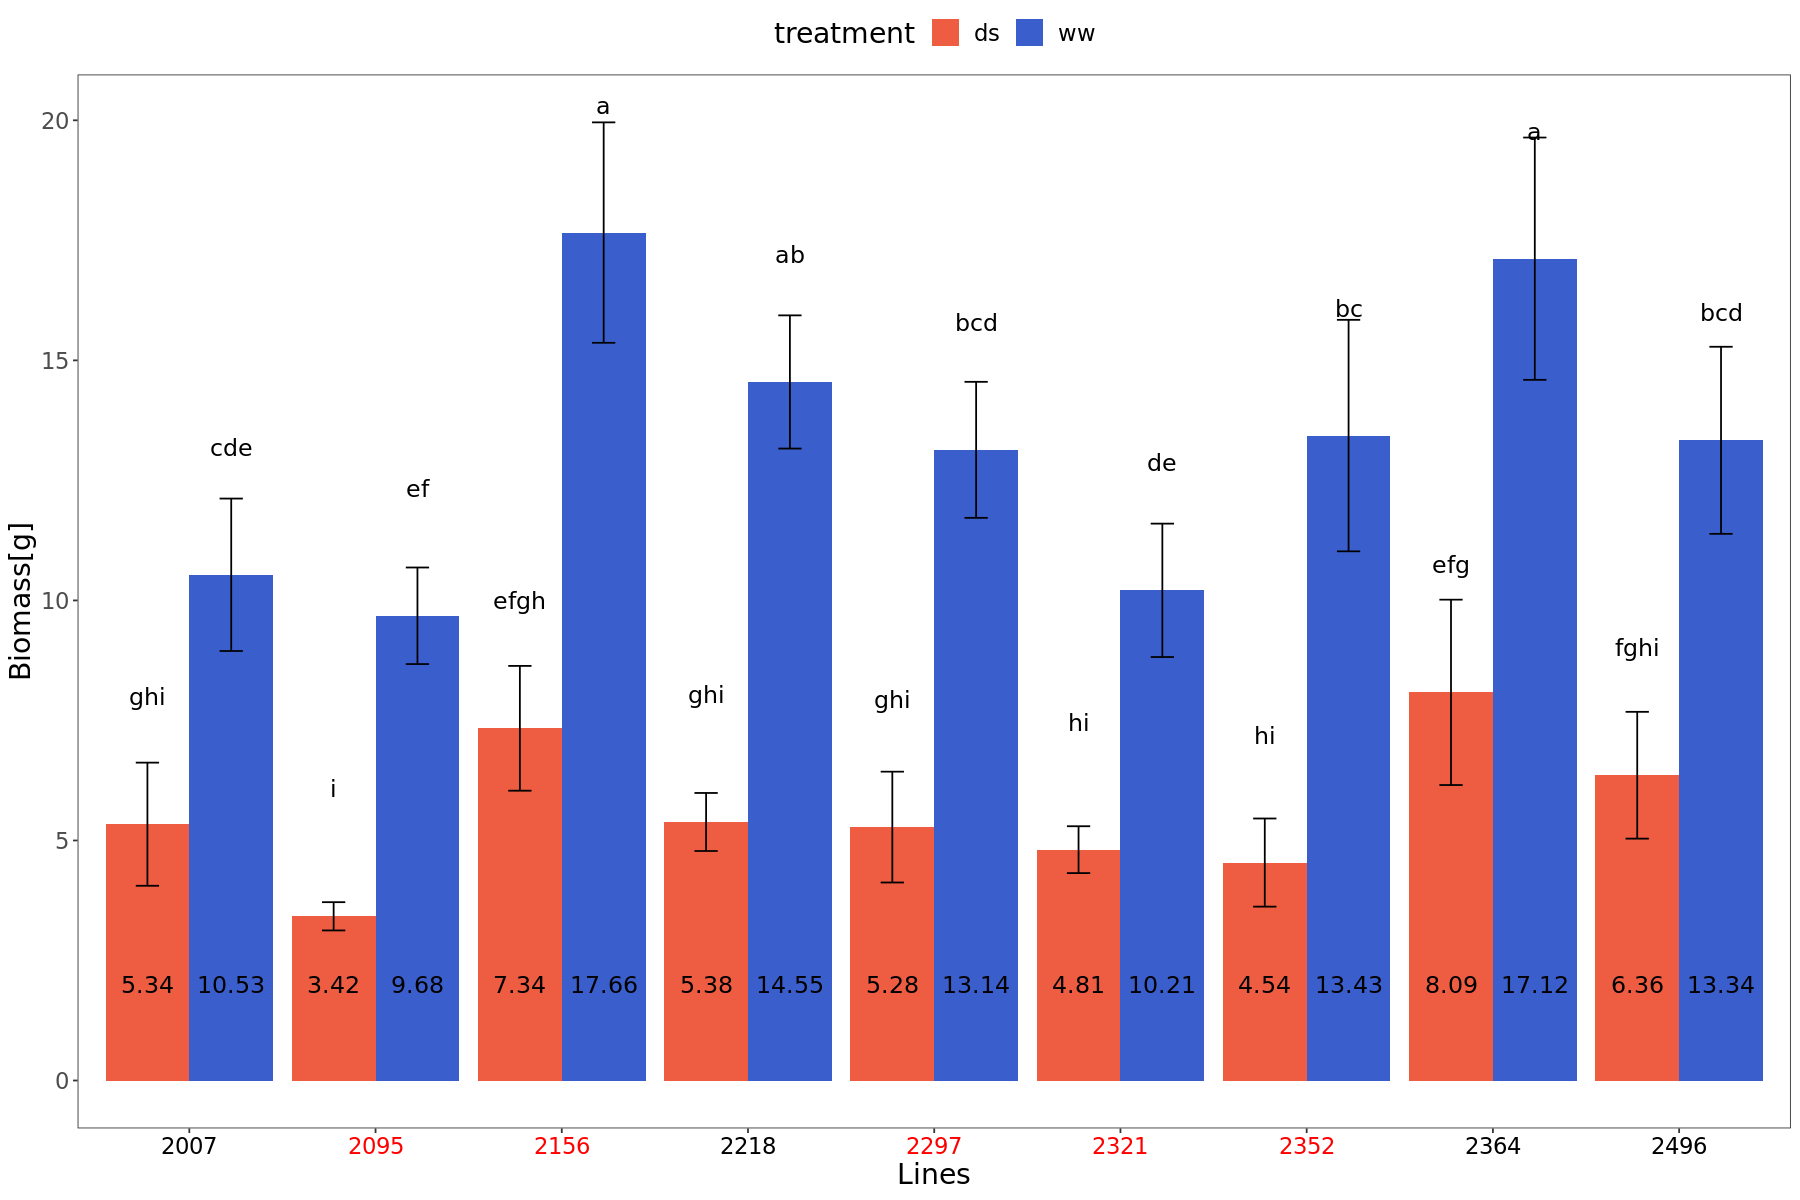

In [36]:
options(repr.plot.width=15,  repr.plot.height=10)

Biomass.<- ggplot(Biomass_Int, aes(x=IDs, y=mean, fill=treatment, ))+
geom_bar(stat="identity", position="dodge")+
geom_errorbar(aes(ymin=mean-sd , ymax=mean+sd) ,position = position_dodge(0.9), width = 0.25)+
geom_text(aes(label=tukey), position=position_dodge(0.90), vjust=-7, hjust=0.5, size=5, colour="black")+
labs(x="Lines", y="Biomass[g]")+
theme_bw()+
 theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
scale_fill_manual(values=c("tomato2","royalblue3"))+
theme(legend.position="top")+
theme(text = element_text(size = 17))+
theme(axis.text.x = element_text(colour=c("black","red","red","black","red","red","red","black","black")))+
geom_text(aes(label=round(mean,2), y = 2), position = position_dodge(0.90), colour="black", size= 5)

Biomass.


ggsave("Biomass-Int.png", plot = Biomass., width = 20, height = 10,
       path="/home/sepideh.jafarian/Desktop/wheat_experiment/final-harvest-data-Sep2022/Visualization/Biomass")

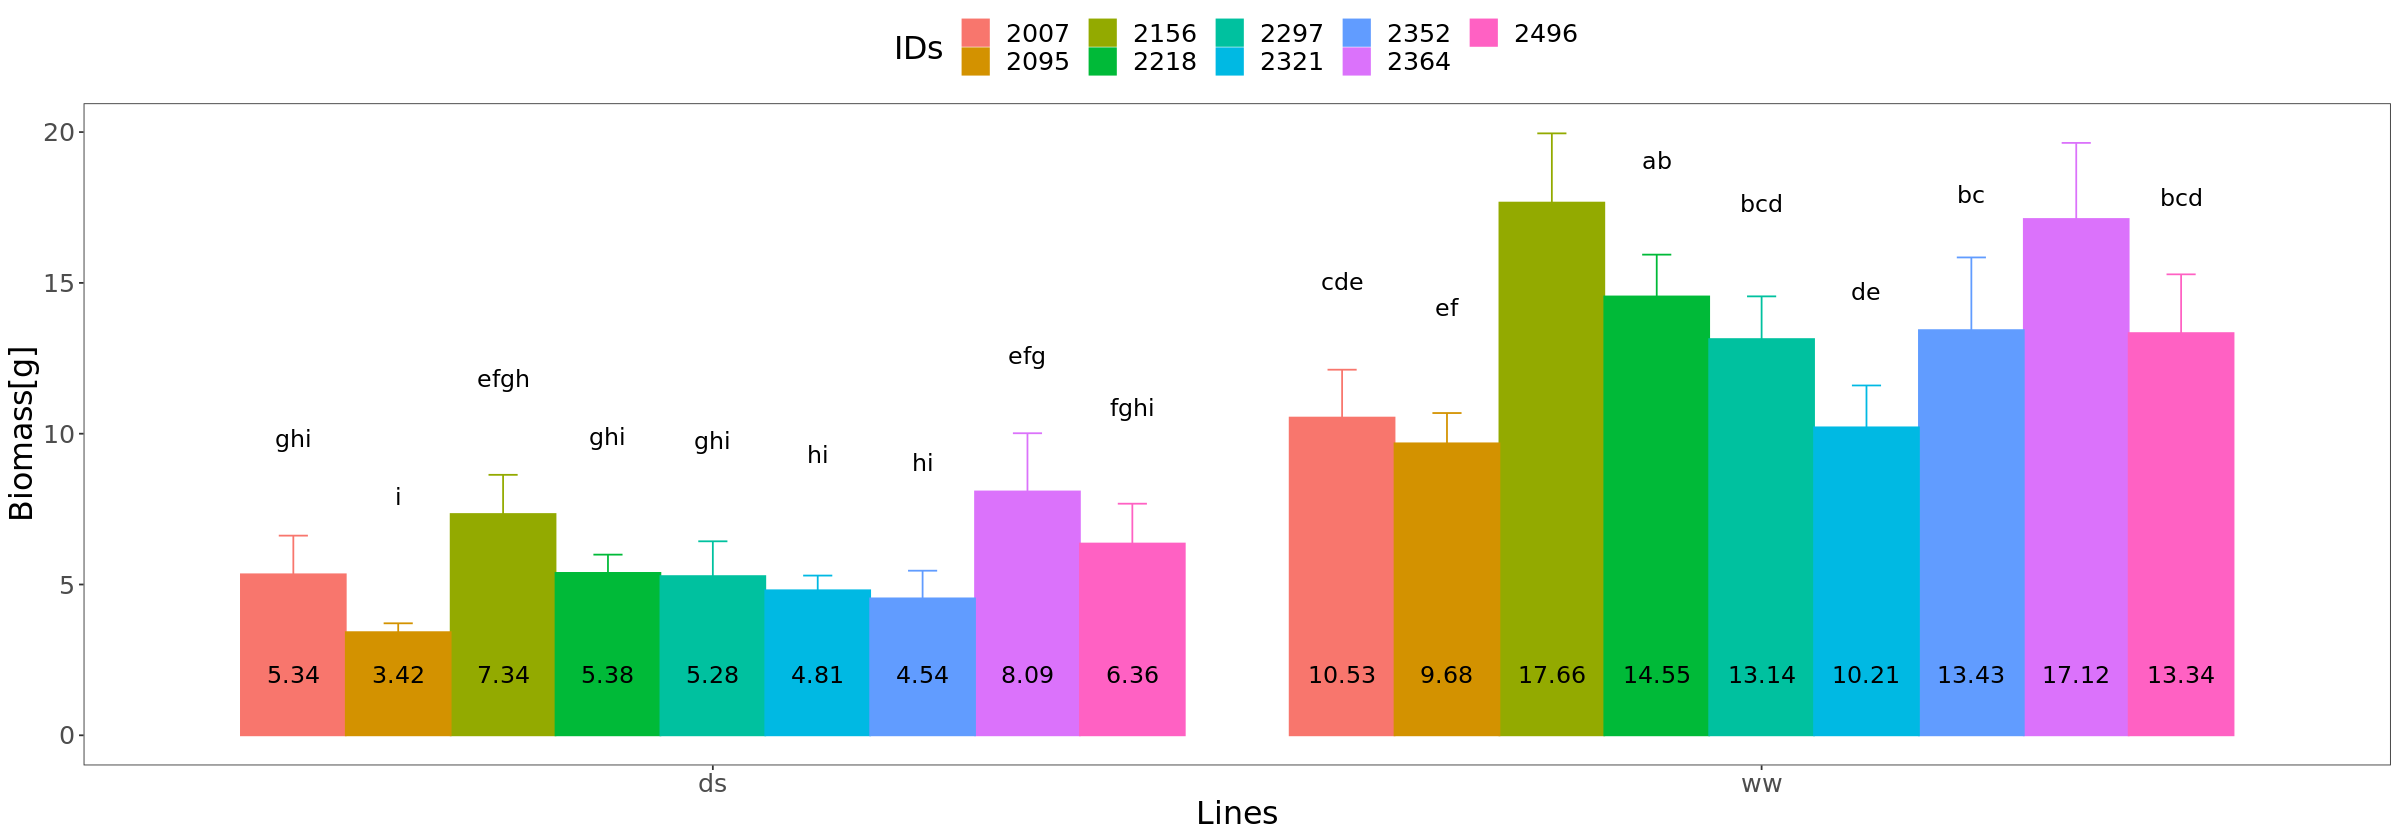

In [54]:
Biomass1<- ggplot(Biomass_Int, aes(x=treatment, y=mean, fill=IDs, color=IDs))+
geom_bar(stat="identity", position="dodge")+
geom_errorbar(aes(ymin=mean-sd , ymax=mean+sd) ,position = position_dodge(0.9), width = 0.25)+
geom_text(aes(label=tukey), position=position_dodge(0.90), vjust=-7.5, hjust=0.5, size=5, colour="black")+
labs(x="Lines", y="Biomass[g]")+
#ggtitle("Plot of length \n by dose")+
theme_bw()+
 theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
theme(legend.position="top")+
theme(text = element_text(size = 19))+
geom_text(aes(label=round(mean,2), y = 2), position = position_dodge(0.90), colour="black", size= 5)

Biomass1


ggsave("Biomass-Int-sept.png", plot = Biomass1, width = 20, height = 10,
       path="/home/sepideh.jafarian/Desktop/wheat_experiment/final-harvest-data-Sep2022/Visualization/Biomass")

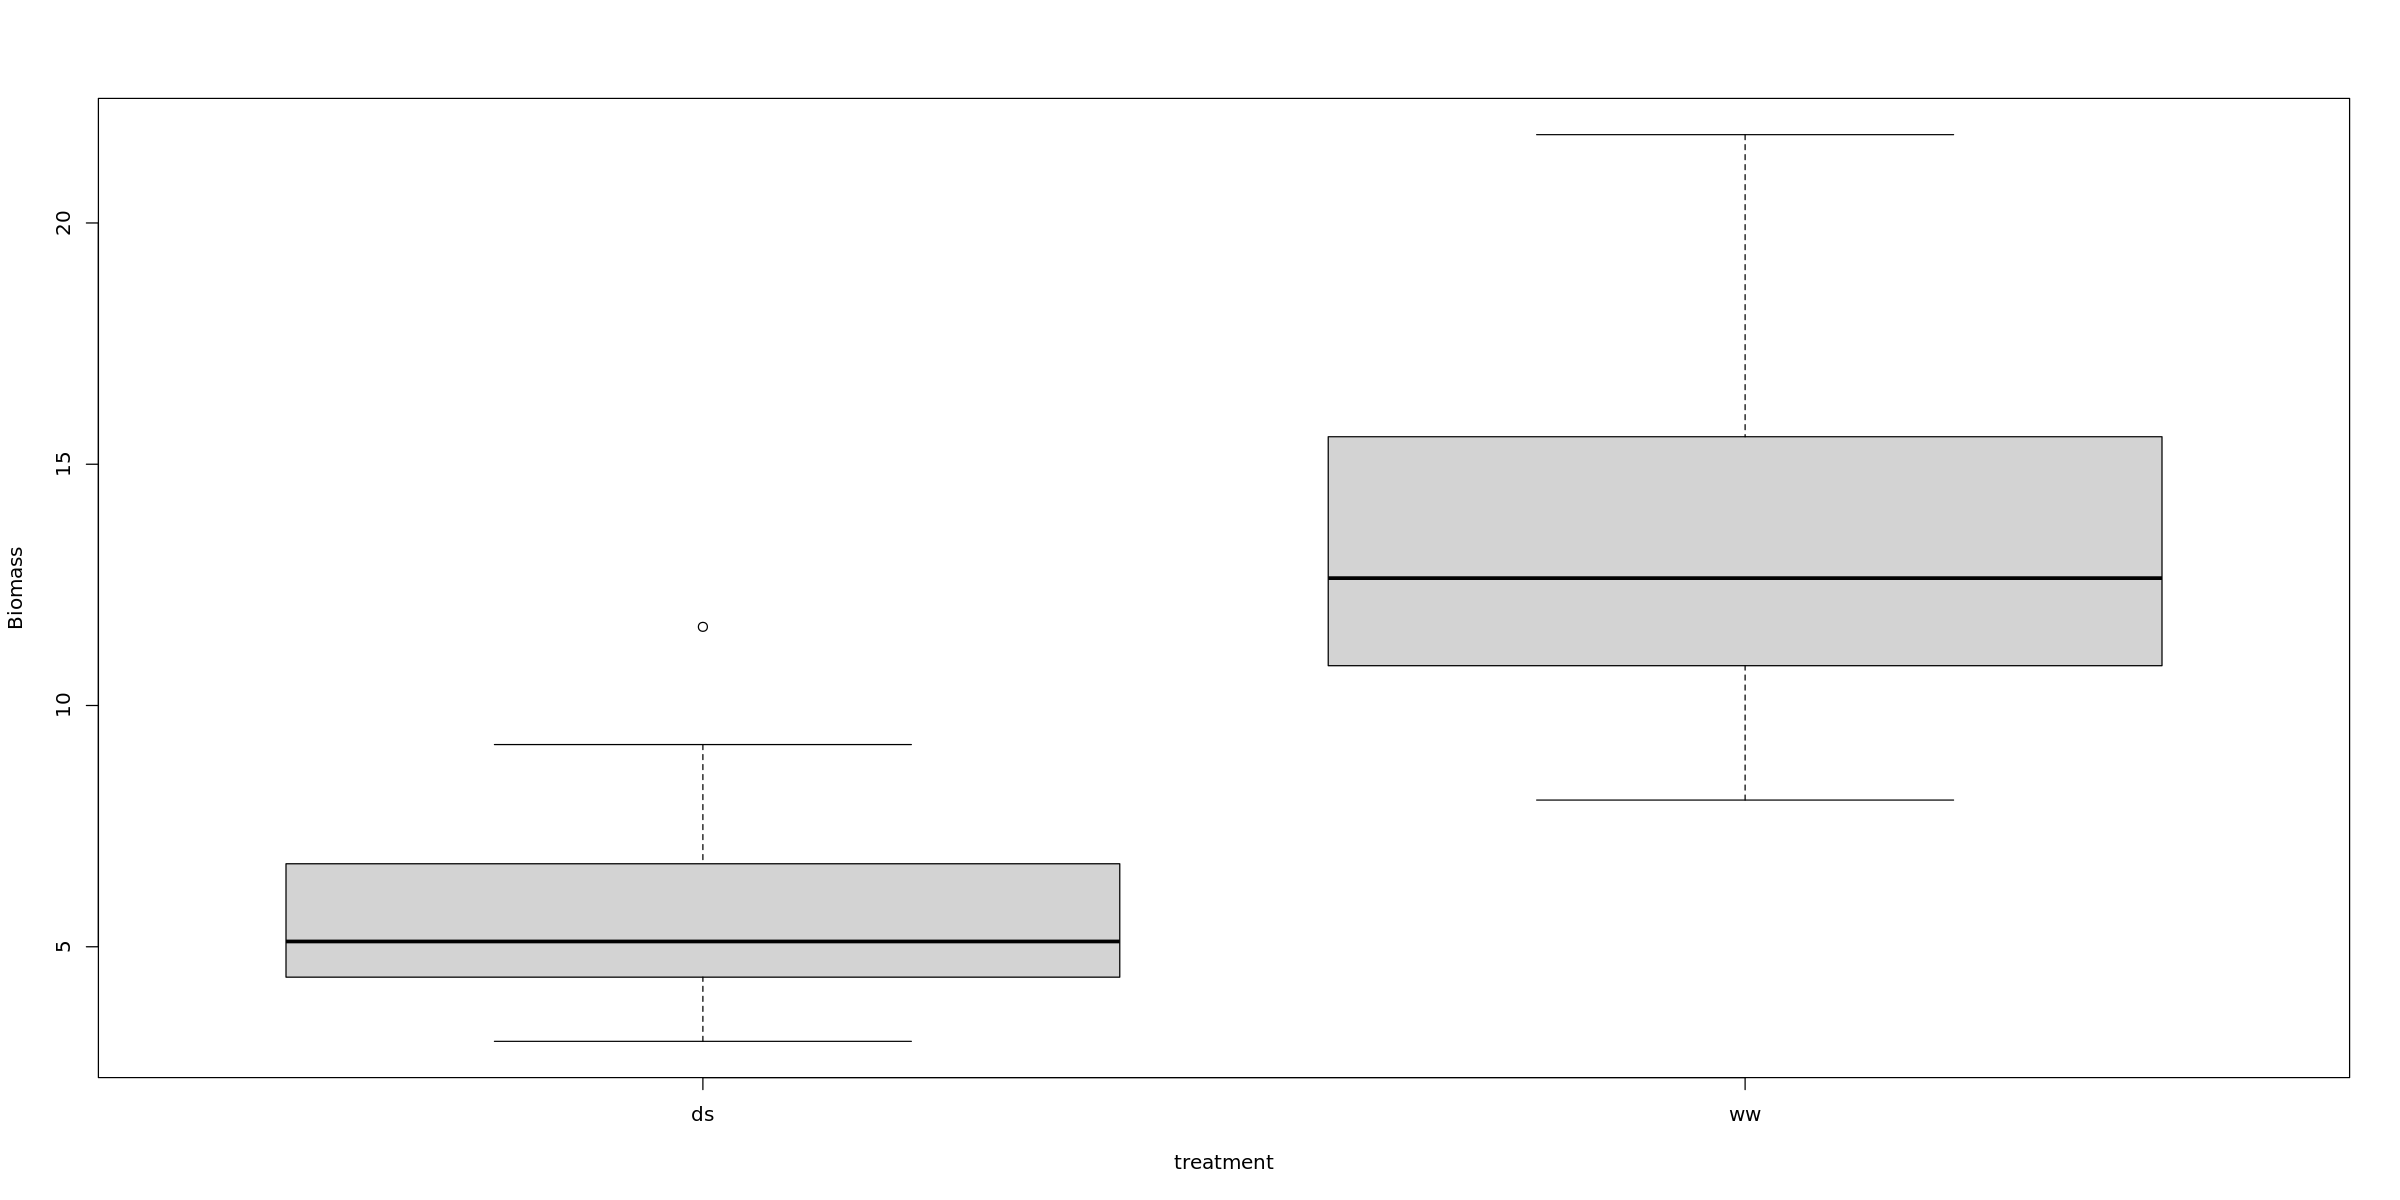

In [111]:
boxplot(Biomass~treatment, data=final.data)

In [48]:
Control_data_Biomass <- Biomass_summary[1:9, ]
Control_data_Biomass 
Control_data_Biomass[order(Control_data_Biomass$IDs),]




treatment IDs  mean     sd      
1 ww        2156 17.66167 2.295608
2 ww        2364 17.11800 2.523573
3 ww        2218 14.55000 1.387227
4 ww        2352 13.43333 2.411163
5 ww        2496 13.33500 1.948412
6 ww        2297 13.13667 1.416286
7 ww        2007 10.53400 1.587744
8 ww        2321 10.21000 1.389129
9 ww        2095  9.68000 1.005758

treatment IDs  mean     sd      
1 ww        2007 10.53400 1.587744
2 ww        2095  9.68000 1.005758
3 ww        2156 17.66167 2.295608
4 ww        2218 14.55000 1.387227
5 ww        2297 13.13667 1.416286
6 ww        2321 10.21000 1.389129
7 ww        2352 13.43333 2.411163
8 ww        2364 17.11800 2.523573
9 ww        2496 13.33500 1.948412

In [49]:
Stress_data_Biomass <- Biomass_summary[10:18, ]
Stress_data_Biomass 
Stress_data_Biomass[order(Stress_data_Biomass$IDs),]

treatment IDs  mean     sd       
1 ds        2364 8.085000 1.9304585
2 ds        2156 7.336667 1.2997333
3 ds        2496 6.358333 1.3205062
4 ds        2218 5.385000 0.6046073
5 ds        2007 5.338333 1.2824885
6 ds        2297 5.278333 1.1544768
7 ds        2321 4.808333 0.4878285
8 ds        2352 4.540000 0.9178235
9 ds        2095 3.420000 0.2942788

treatment IDs  mean     sd       
1 ds        2007 5.338333 1.2824885
2 ds        2095 3.420000 0.2942788
3 ds        2156 7.336667 1.2997333
4 ds        2218 5.385000 0.6046073
5 ds        2297 5.278333 1.1544768
6 ds        2321 4.808333 0.4878285
7 ds        2352 4.540000 0.9178235
8 ds        2364 8.085000 1.9304585
9 ds        2496 6.358333 1.3205062

In [50]:
difference_table_Biomass <- left_join(Stress_data_Biomass, Control_data_Biomass, by="IDs")
#View(difference_table_Biomass)

difference_table_Biomass$Biomass_difference <- (difference_table_Biomass$mean.y)-(difference_table_Biomass$mean.x)
View(difference_table_Biomass)

treatment.x IDs  mean.x   sd.x      treatment.y mean.y   sd.y    
1 ds          2364 8.085000 1.9304585 ww          17.11800 2.523573
2 ds          2156 7.336667 1.2997333 ww          17.66167 2.295608
3 ds          2496 6.358333 1.3205062 ww          13.33500 1.948412
4 ds          2218 5.385000 0.6046073 ww          14.55000 1.387227
5 ds          2007 5.338333 1.2824885 ww          10.53400 1.587744
6 ds          2297 5.278333 1.1544768 ww          13.13667 1.416286
7 ds          2321 4.808333 0.4878285 ww          10.21000 1.389129
8 ds          2352 4.540000 0.9178235 ww          13.43333 2.411163
9 ds          2095 3.420000 0.2942788 ww           9.68000 1.005758
  Biomass_difference
1  9.033000         
2 10.325000         
3  6.976667         
4  9.165000         
5  5.195667         
6  7.858333         
7  5.401667         
8  8.893333         
9  6.260000

In [18]:

options(repr.plot.width=20, repr.plot.height=7)

p <- ggplot(difference_table_Biomass, aes(x=IDs, y=Biomass_difference, fill=IDs) ) + 
  geom_bar(stat = "identity")+
scale_fill_manual(values=c("blue","red","yellow","green","orange","black","gray","pink","darkblue")) +
theme(legend.position="top")+
theme(text = element_text(size = 16))+
#ggtitle("Biomass difference for all lines")+
theme_bw()+
theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
theme(axis.text.x = element_text(colour=c("black","red","red","black","red","red","red","black","black")))+
theme(text = element_text(size = 20))+
labs(x="Lines", y="Biomass-difference[g]")
p


ggsave("Biomass-difference.png", plot = p, width = 20, height = 10,
       path="/home/sepideh.jafarian/Desktop/wheat_experiment/final-harvest-data-Sep2022/Visualization/Biomass")


ERROR: Error in ggplot(difference_table_Biomass, aes(x = IDs, y = Biomass_difference, : object 'difference_table_Biomass' not found


'data.frame':	104 obs. of  23 variables:
 $ X                 : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Unit              : chr  "121" "123" "125" "126" ...
 $ experiment        : chr  "V22001" "V22001" "V22001" "V22001" ...
 $ IDs               : Factor w/ 9 levels "2007","2095",..: 4 4 3 5 4 7 3 4 8 7 ...
 $ treatment         : Factor w/ 2 levels "ds","ww": 2 1 1 1 2 1 1 2 1 1 ...
 $ BBCH              : chr  "92" "92" "92" "92" ...
 $ Collection.date   : chr  "08/12/22" "08/08/22" "08/09/22" "08/08/22" ...
 $ max.Height        : num  91.2 78 83 61 102 ...
 $ Biomass           : num  14.75 4.72 7.76 5.61 14.3 ...
 $ Shoots            : num  10 5 4 7 9 3 5 9 4 3 ...
 $ Shoots_with_ear   : num  10 5 3 6 9 3.5 4 9 2 3 ...
 $ Shoots_without_ear: num  0 0 1 1 0 0 1 0 2 0 ...
 $ Nr_ears           : num  10 5 3 6 9 3 4 9 2 3 ...
 $ Full_ear          : num  10 3 1 5 9 3 4 9 2 3 ...
 $ Half_ear          : num  0 2 0 1 0 0 0 0 0 0 ...
 $ Weight_ear        : num  15.43 3.55 1.21 3.36 10.65 ...
 $ Nr_se

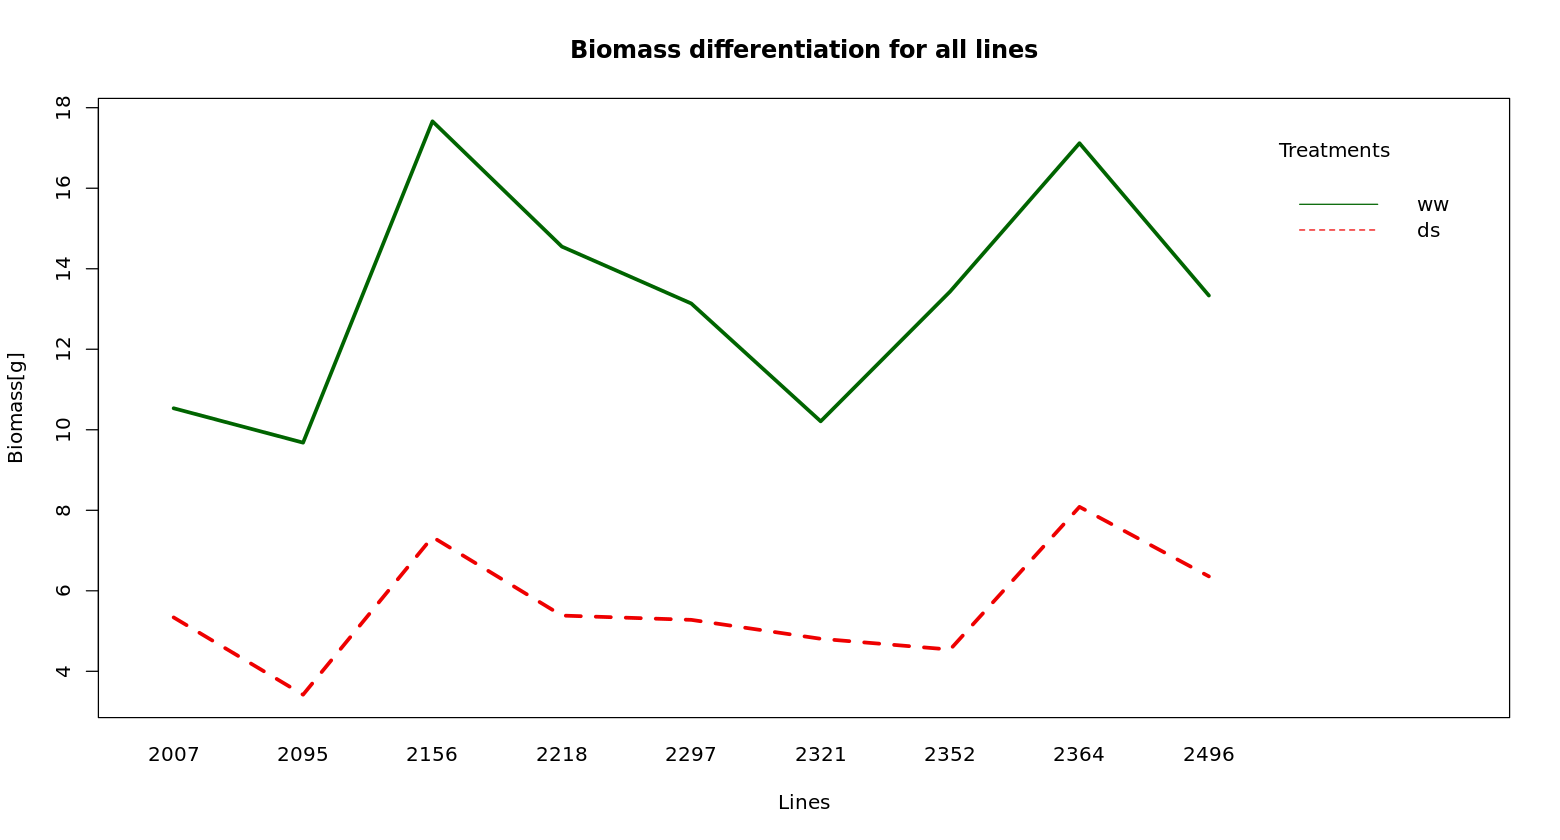

In [69]:
str(final.data)

Biomass_interactions<- interaction.plot(x.factor = final.data$IDs, trace.factor = final.data$treatment, 
                 response =  final.data$Biomass, fun = mean, 
                 type = "l", legend = TRUE, main="Biomass differentiation for all lines",
                 xlab = "Lines", ylab="Biomass[g]", trace.label = "Treatments",
                 pch=c(1,19), col = c("red2","darkgreen"), lwd=3)
                # theme(axis.text.x = element_text(colour=c("black","red","red","black","red","red","red","black","black")))+
options(repr.plot.width=13, repr.plot.height=7)
print(Biomass_interactions)



ggsave("Biomass-Int-Graph.jpeg", plot = Biomass_interactions, width = 20, height = 10,
       path="/home/sepideh.jafarian/Desktop/wheat_experiment/final-harvest-data-Sep2022/Visualization/Biomass")

                 Df Sum Sq Mean Sq F value Pr(>F)    
treatment         1 1544.4  1544.4 246.736 <2e-16 ***
Group             1   29.9    29.9   4.774 0.0312 *  
treatment:Group   1    0.4     0.4   0.059 0.8089    
Residuals       100  625.9     6.3                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

$treatment
 ww  ds 
"a" "b" 

$Group
High  Low 
 "a"  "b" 

$`treatment:Group`
ww:High  ww:Low ds:High  ds:Low 
    "a"     "a"     "b"     "b" 



	Kruskal-Wallis rank sum test

data:  Biomass by Groups
Kruskal-Wallis chi-squared = 1.722, df = 1, p-value = 0.1894


Df  F value    Pr(>F)   
group   1 0.03147476 0.8595372
      102         NA        NA


	Shapiro-Wilk normality test

data:  Biomass[Group == "High"]
W = 0.92475, p-value = 0.005489


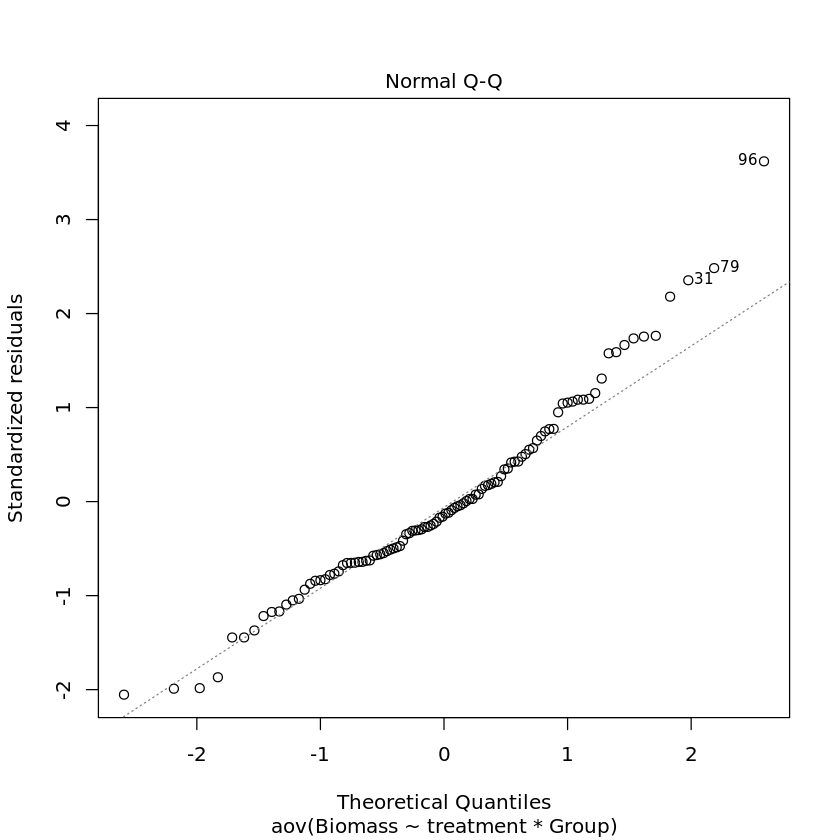

In [7]:
#t.test(Biomass~Groups, data=final.data)
#t.test(Biomass~treatment, data=final.data)
anova<- aov(Biomass~treatment*Group, data=final.data)
summary(anova)
plot(anova, 2)
tukey<- TukeyHSD(anova, cof.level=.95)
tukey.cld<- multcompLetters4(anova,tukey)
tukey.cld
##kruskal.test(Biomass ~ treatment, data = final.data)
kruskal.test(Biomass ~ Groups, data = final.data)
#pairwise.t.test(final.data$Biomass, final.data$Groups, p.adjust.method = "BH", pool.sd=FALSE, var.equal=FALSE, data=final.data)
leveneTest(Biomass~Group, data=final.data)
with(final.data, shapiro.test(Biomass[Group=="High"]))

 # Wilcox.test:  Best choice since they have equal variance(for groups) and not normally distributed)

In [6]:
wilcox.test(Biomass~Group, alternative = "two.sided", data=final.data) #(best choice since they have equal variance and not normally distributed)


	Wilcoxon rank sum test with continuity correction

data:  Biomass by Group
W = 1534.5, p-value = 0.1905
alternative hypothesis: true location shift is not equal to 0


In [74]:
library(agricolae)
print(LSD.test(anova,c("Group","treatment")))

print(LSD.test(anova,"Group"))

$statistics
   MSerror  Df     Mean     CV
  6.259229 100 9.417115 26.567

$parameters
        test p.ajusted          name.t ntr alpha
  Fisher-LSD      none Group:treatment   4  0.05

$means
          Biomass      std  r       LCL       UCL  Min   Max     Q25   Q50
High:ds  6.291667 1.708189 24  5.278478  7.304855 4.15 11.63  5.0175  5.97
High:ww 13.889545 2.903498 22 12.831305 14.947786 8.87 19.96 12.3525 13.77
Low:ds   5.095172 1.573464 29  4.173457  6.016888 3.04  9.19  3.8700  4.87
Low:ww  12.932759 3.340512 29 12.011043 13.854474 8.04 21.83 10.3500 12.27
            Q75
High:ds  7.3475
High:ww 15.6550
Low:ds   5.6100
Low:ww  15.5200

$comparison
NULL

$groups
          Biomass groups
High:ww 13.889545      a
Low:ww  12.932759      a
High:ds  6.291667      b
Low:ds   5.095172      b

attr(,"class")
[1] "group"
$statistics
   MSerror  Df     Mean     CV
  6.259229 100 9.417115 26.567

$parameters
        test p.ajusted name.t ntr alpha
  Fisher-LSD      none  Group   2  0.05

$mea

In [80]:
pwc4 <- final.data %>% 
pairwise_t_test(Biomass~Group, pool.sd = TRUE, p.adjust.method = "bonferroni")
pwc4



pwc5 <- final.data %>% 
pairwise_t_test(Biomass~Group, pool.sd = FALSE, p.adjust.method = "bonferroni")
pwc5


.y.     group1 group2 n1 n2 p    p.signif p.adj p.adj.signif
1 Biomass High   Low    46 58 0.32 ns       0.32  ns

.y.     group1 group2 n1 n2 statistic df       p     p.adj p.adj.signif
1 Biomass High   Low    46 58 1.004744  98.67709 0.317 0.317 ns

In [72]:
LM <- mean(final.data$Biomass[final.data$Group=="Low"],)
LM

HM <- mean(final.data$Biomass[final.data$Group=="High"],)
HM
sd(final.data$Biomass[final.data$Group=="High"],)
sd(final.data$Biomass[final.data$Group=="Low"],)

[1] 9.013966

[1] 9.925435

[1] 4.488906

[1] 4.724845

'data.frame':	104 obs. of  23 variables:
 $ X                 : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Unit              : chr  "121" "123" "125" "126" ...
 $ experiment        : chr  "V22001" "V22001" "V22001" "V22001" ...
 $ IDs               : Factor w/ 9 levels "2007","2095",..: 4 4 3 5 4 7 3 4 8 7 ...
 $ treatment         : Factor w/ 2 levels "ds","ww": 2 1 1 1 2 1 1 2 1 1 ...
 $ BBCH              : chr  "92" "92" "92" "92" ...
 $ Collection.date   : chr  "08/12/22" "08/08/22" "08/09/22" "08/08/22" ...
 $ max.Height        : num  91.2 78 83 61 102 ...
 $ Biomass           : num  14.75 4.72 7.76 5.61 14.3 ...
 $ Shoots            : num  10 5 4 7 9 3 5 9 4 3 ...
 $ Shoots_with_ear   : num  10 5 3 6 9 3.5 4 9 2 3 ...
 $ Shoots_without_ear: num  0 0 1 1 0 0 1 0 2 0 ...
 $ Nr_ears           : num  10 5 3 6 9 3 4 9 2 3 ...
 $ Full_ear          : num  10 3 1 5 9 3 4 9 2 3 ...
 $ Half_ear          : num  0 2 0 1 0 0 0 0 0 0 ...
 $ Weight_ear        : num  15.43 3.55 1.21 3.36 10.65 ...
 $ Nr_se

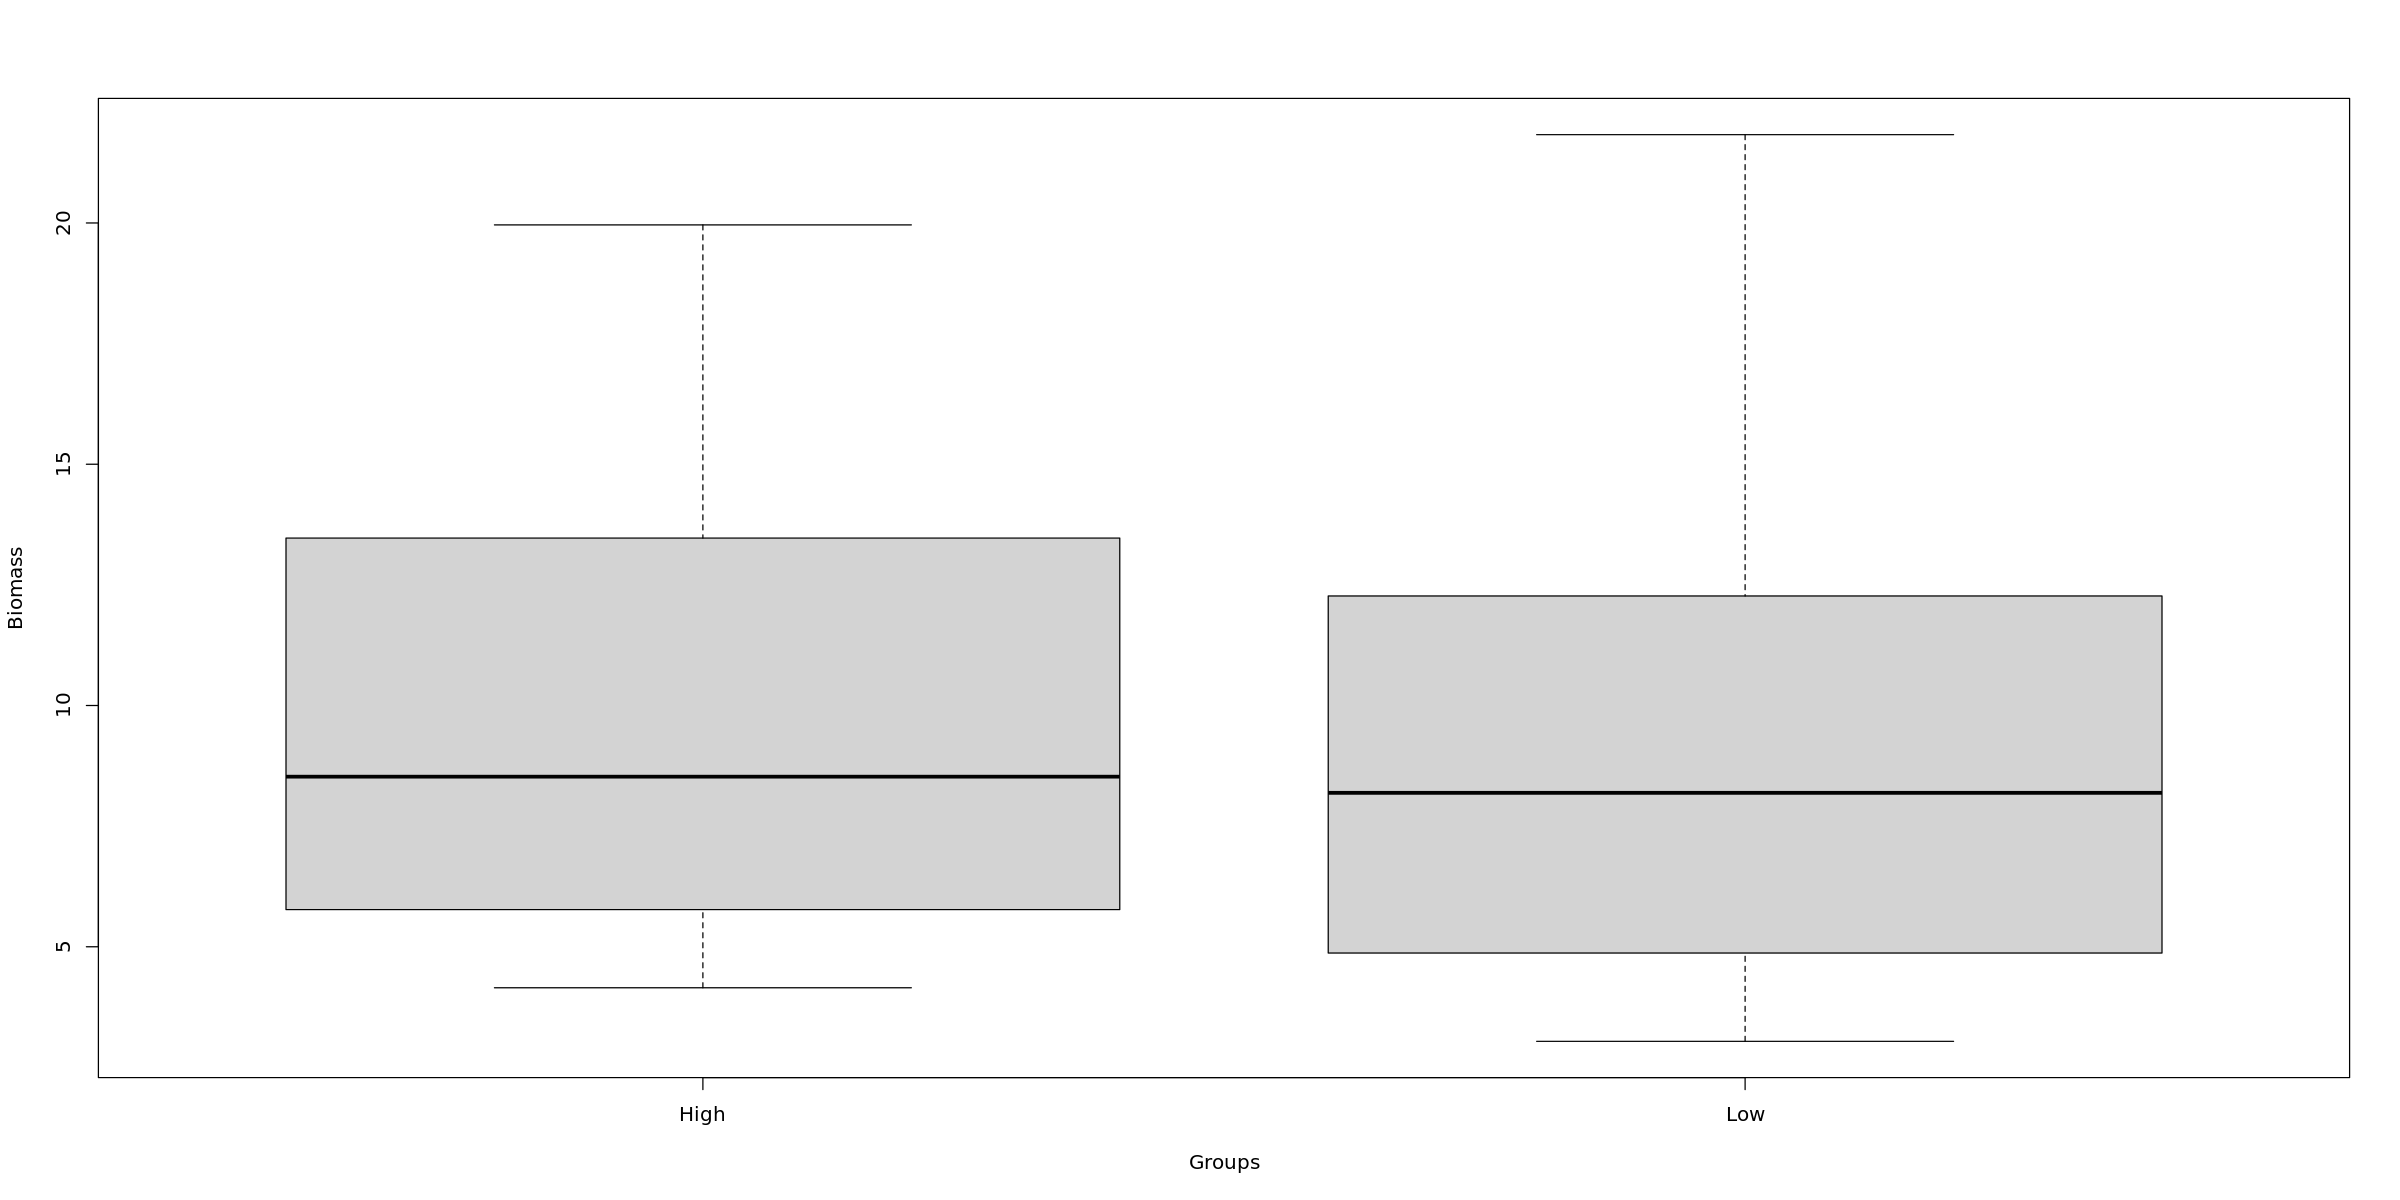

In [91]:
final.data$Group<- as.factor(final.data$Group)
str(final.data)
boxplot(Biomass~Groups, final.data)

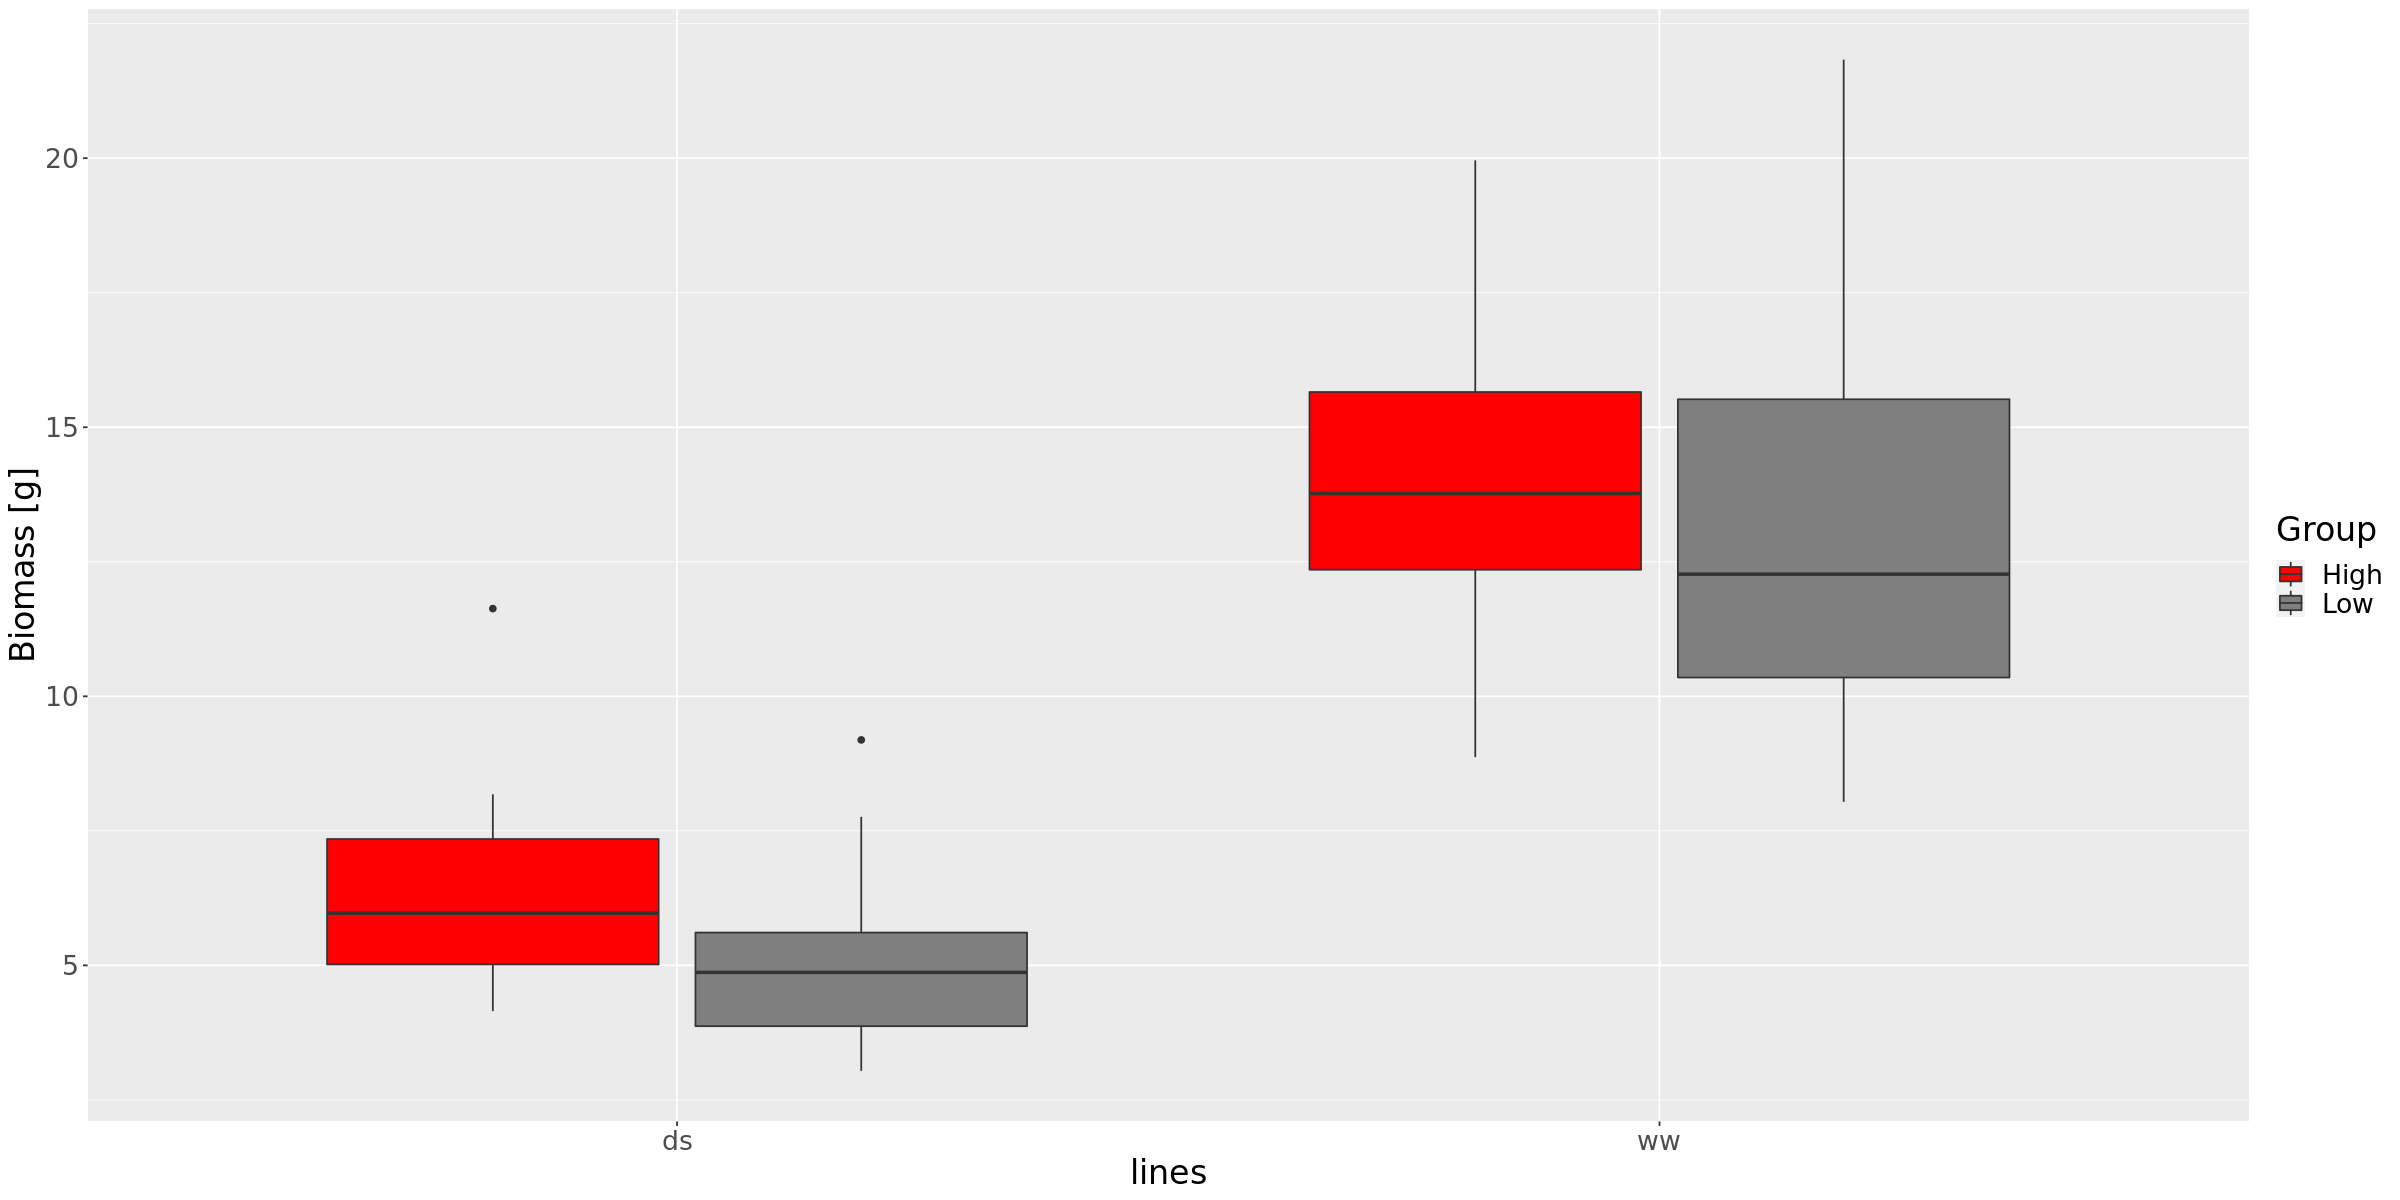

In [92]:
options(repr.plot.width=20, repr.plot.height=10)
p <- ggplot(final.data, aes(x=treatment, y=Biomass,  fill=Group))+
       geom_boxplot()+
       theme(text=element_text(size = 20))+
       scale_fill_manual(breaks = final.data$Group,
                    values = c("red", "orange")) +
        labs(y="Biomass [g]", x="lines")



    print(p)
                         

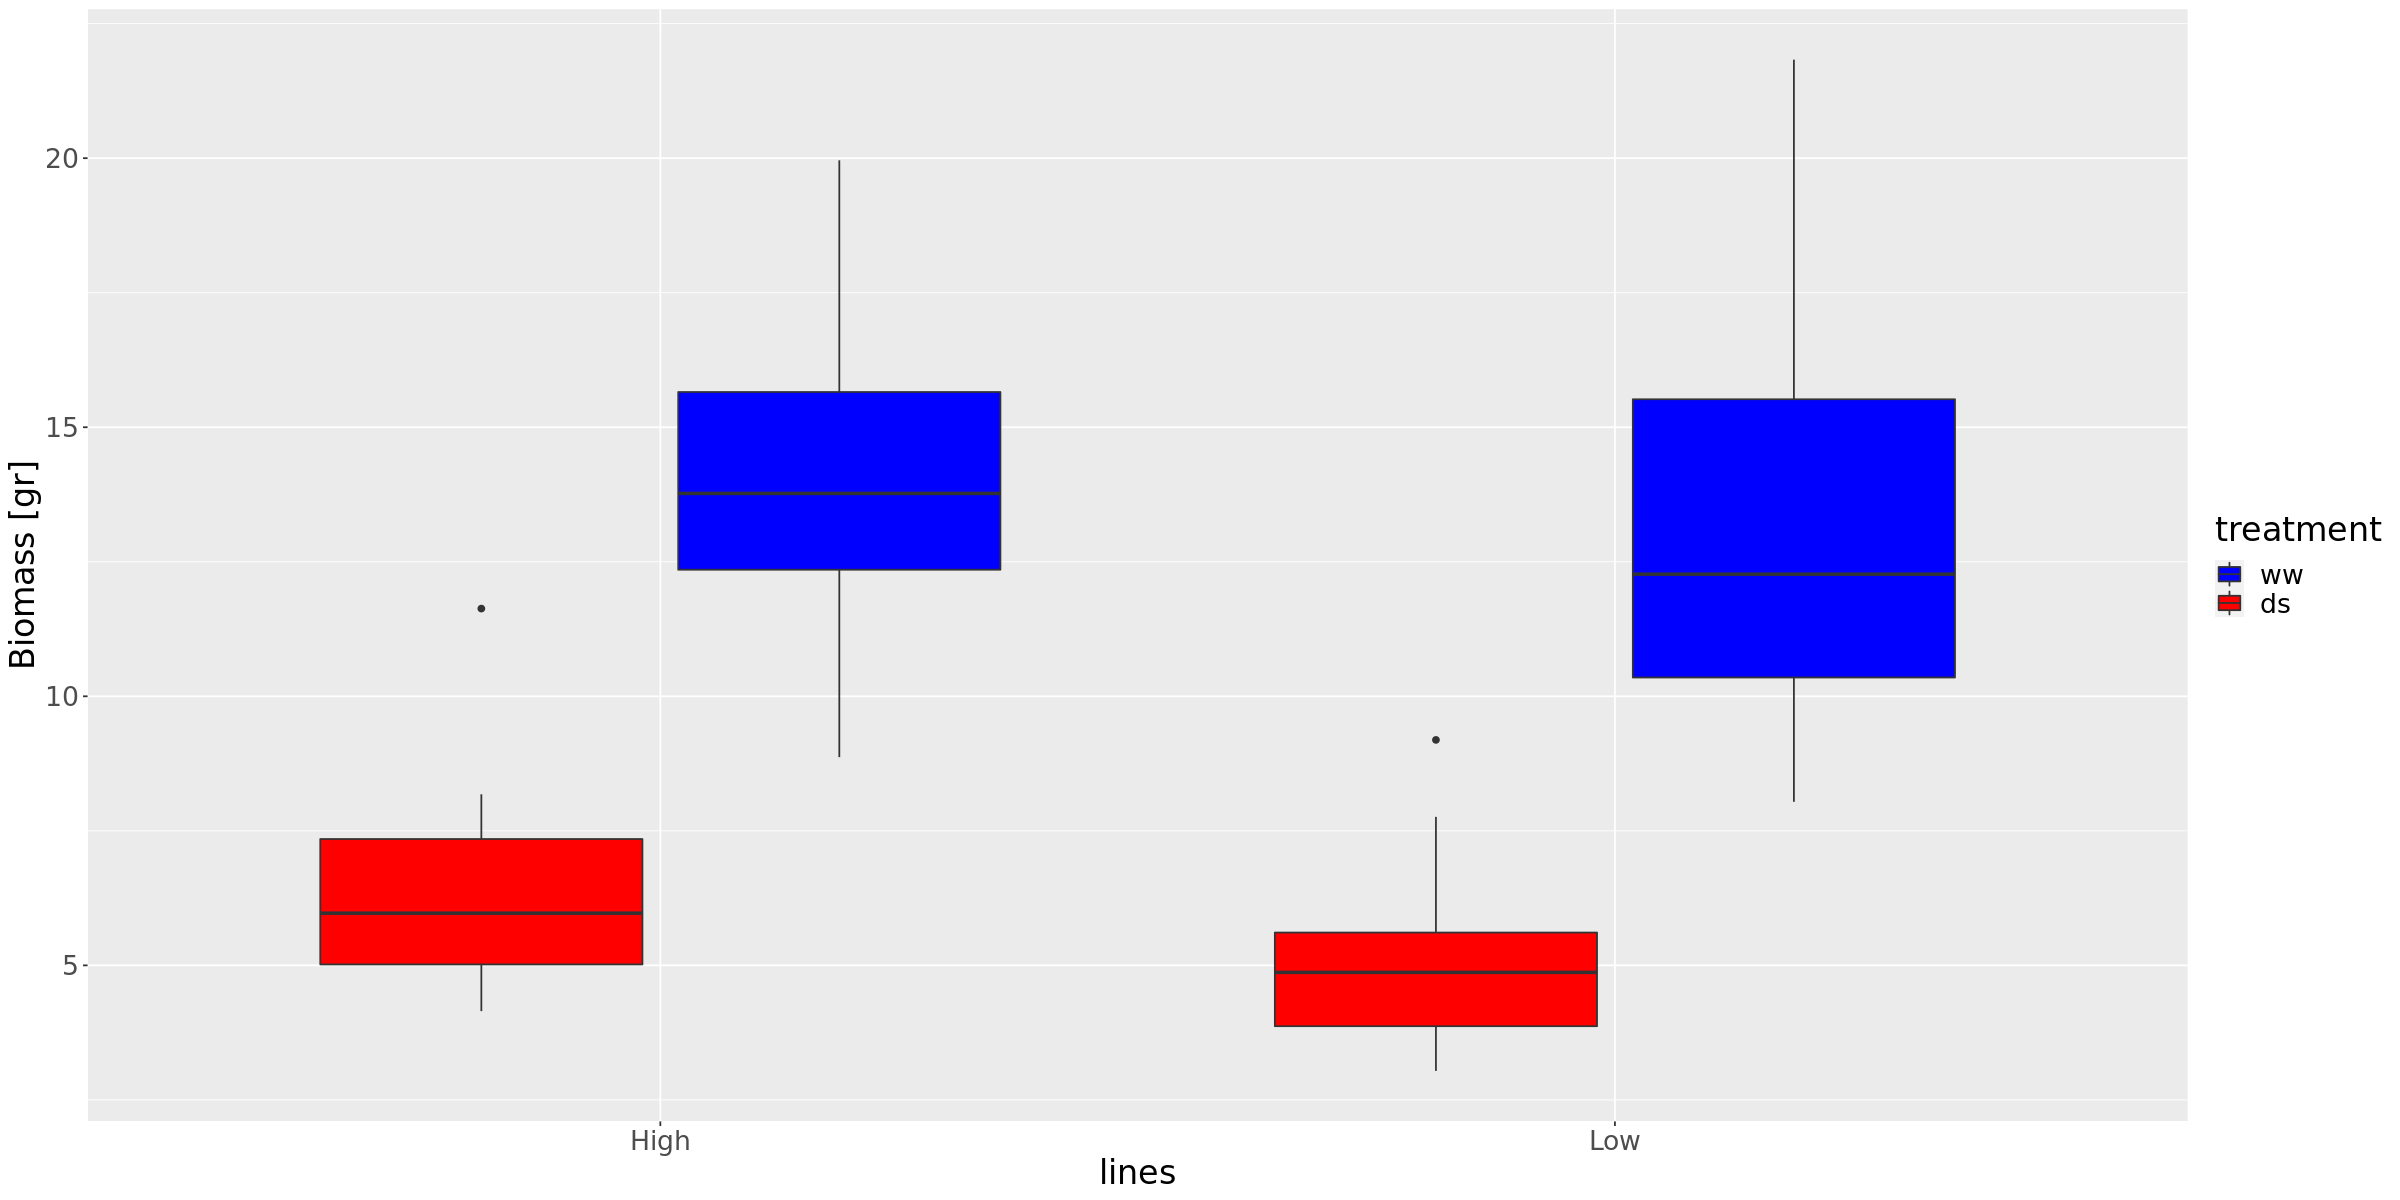

In [93]:
options(repr.plot.width=20, repr.plot.height=10)
p <- ggplot(final.data, aes(x=Group,y=Biomass,  fill=treatment))+
       geom_boxplot()+
       theme(text=element_text(size = 20))+
       scale_fill_manual(breaks = final.data$treatment,
                    values = c("blue", "red")) +
        labs(y="Biomass [gr]", x="lines")



    print(p)


# Max.Height

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


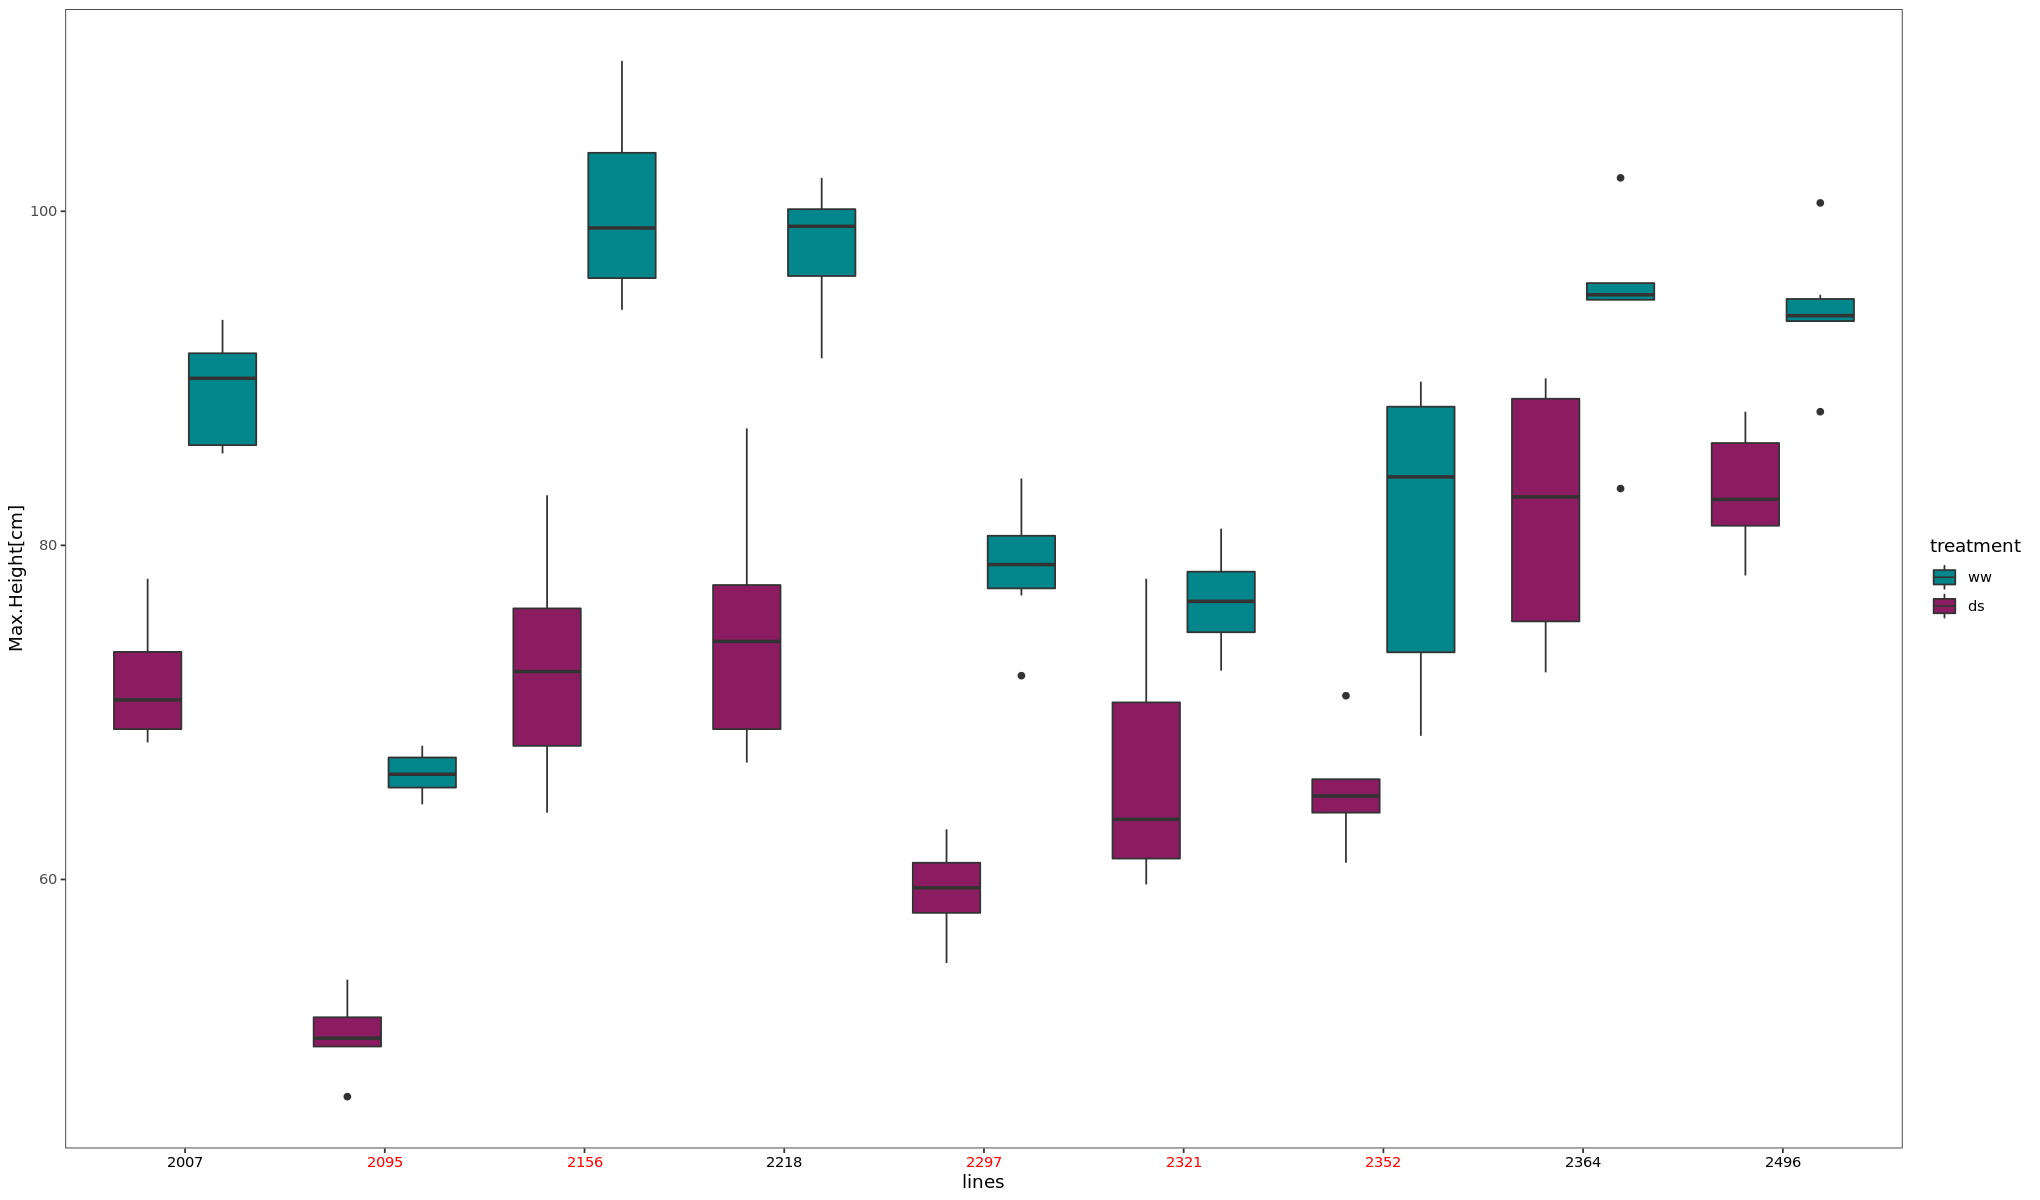

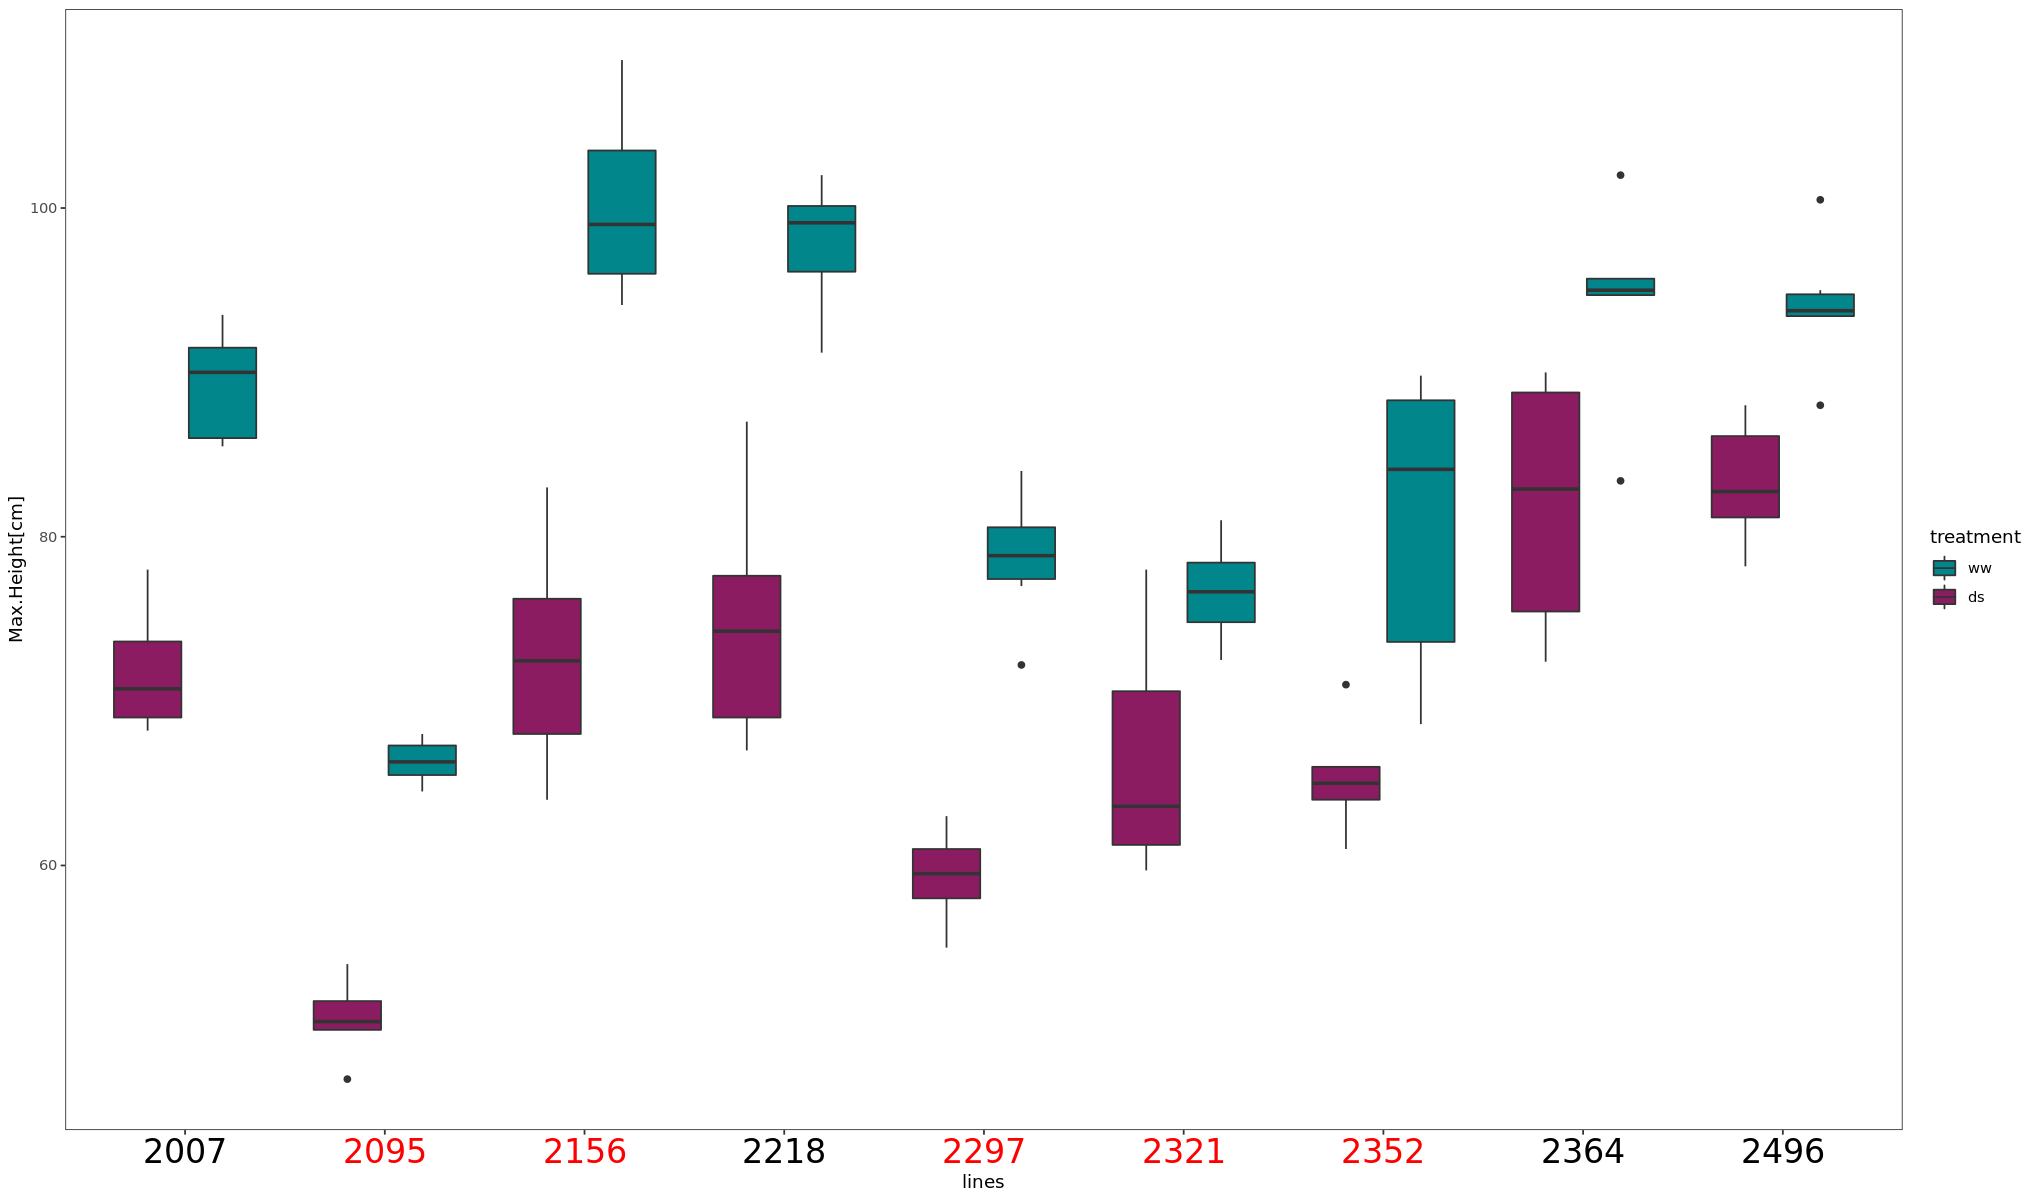

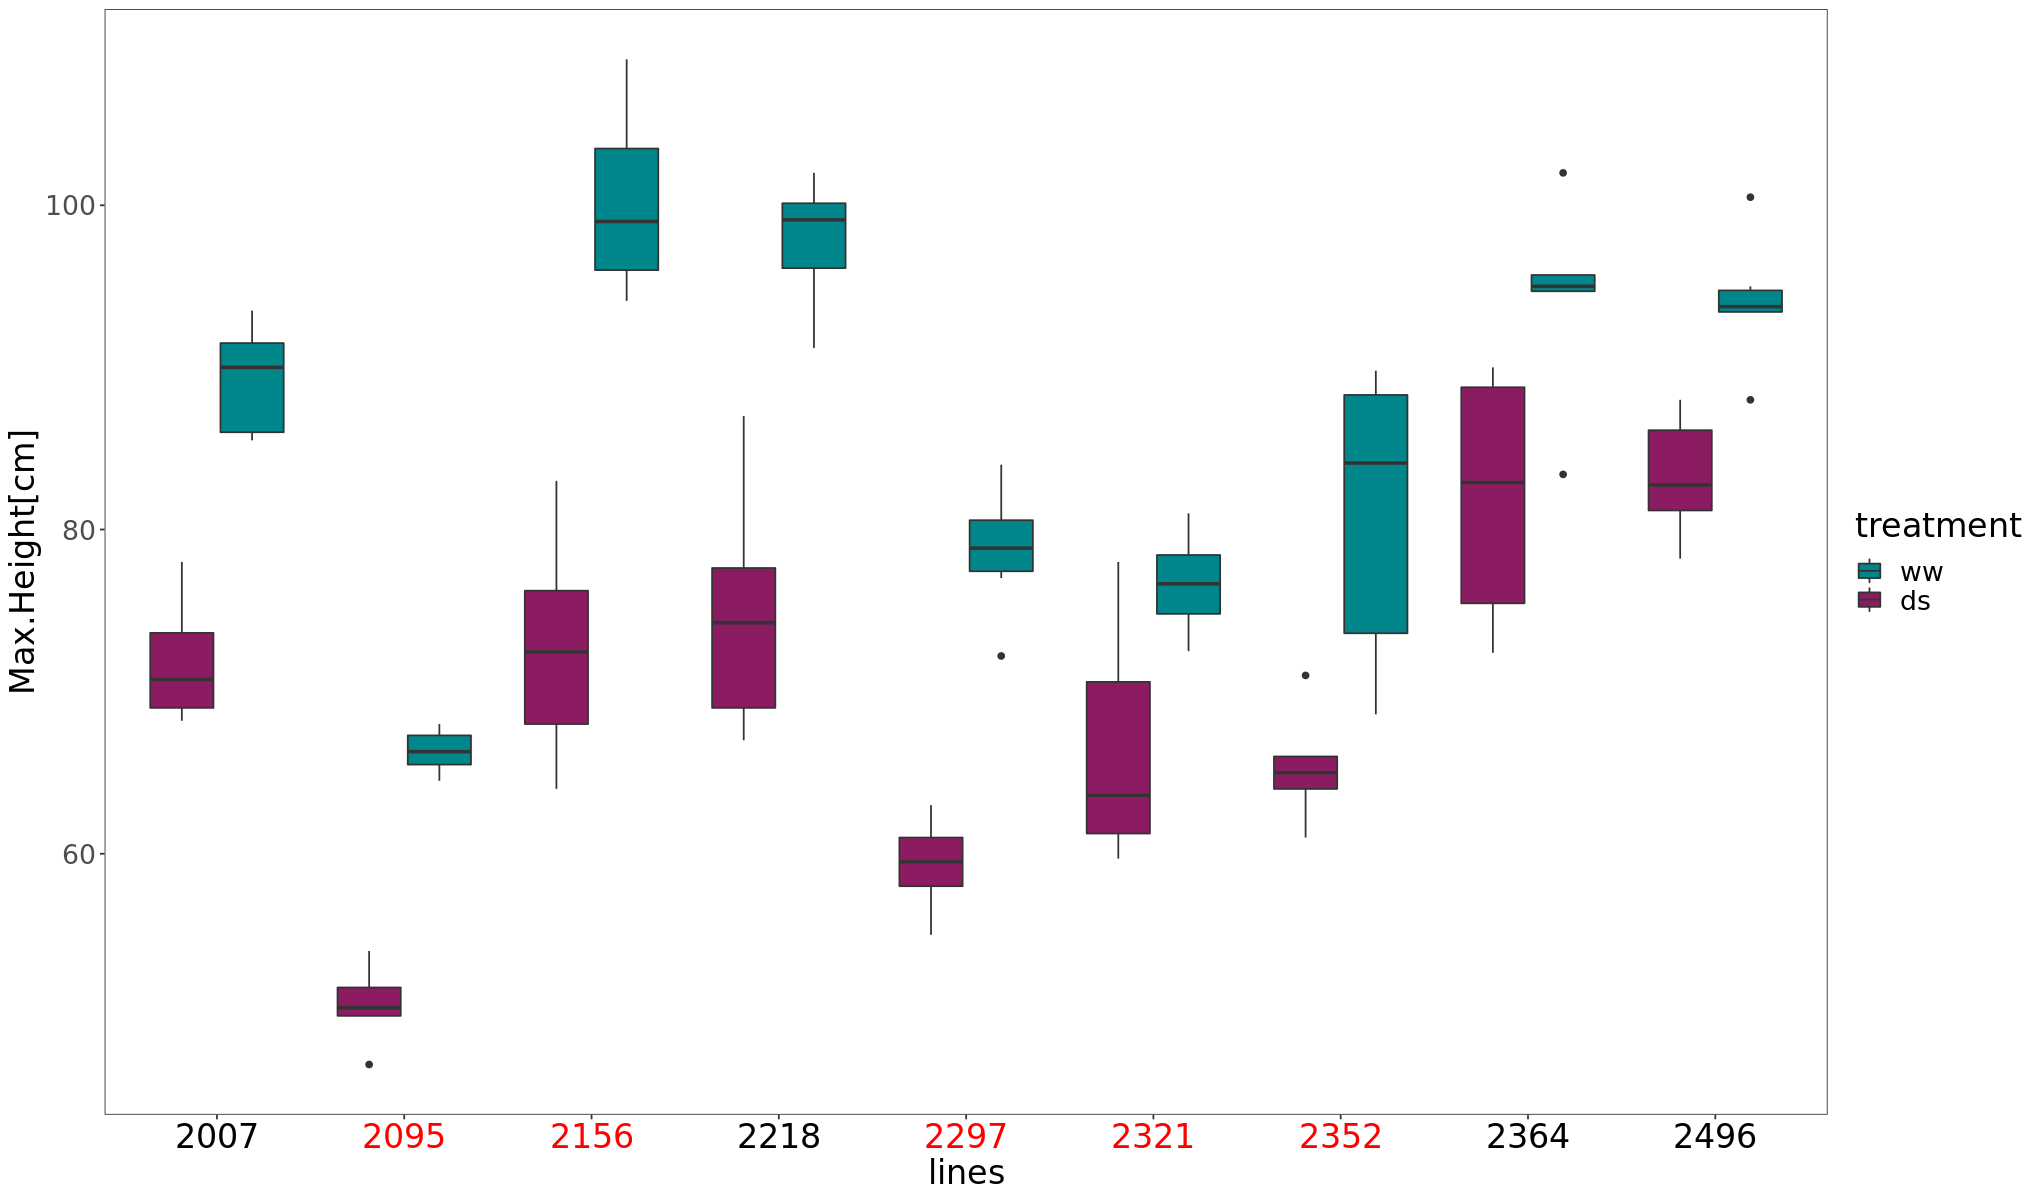

In [91]:
options(repr.plot.width=17, repr.plot.height=10)
Mheight. <- ggplot(final.data, aes(x=IDs, y=max.Height, fill=treatment))+
       geom_boxplot()+
     scale_fill_manual(breaks =final.data$treatment,
                    values = c("turquoise4","maroon4")) +
        labs(y="Max.Height[cm]", x="lines")+
  theme(text=element_text(size = 60))+
theme_bw()+
theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
theme(axis.text.x = element_text(colour=c("black","red","red","black","red","red","red","black","black")))
    print(Mheight.)


fH<-Mheight.+theme(axis.text.x =element_text(size = 20))
fH
ffh<-fH+ theme(text = element_text(size = 20))  
ffh
ggsave("MHeight-boxplot.png", plot = ffh, width = 15, height = 10,
      path="/home/sepideh.jafarian/Desktop/wheat_experiment/final-harvest-data-Sep2022/Visualization/max.Height")


In [4]:
max.Height_AN <- aov(max.Height~ treatment*IDs, data=final.data)
summary(max.Height_AN)

              Df Sum Sq Mean Sq F value  Pr(>F)    
treatment      1   7515    7515 261.529 < 2e-16 ***
IDs            8  10163    1270  44.212 < 2e-16 ***
treatment:IDs  8    785      98   3.414 0.00187 ** 
Residuals     86   2471      29                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [ ]:
tukey<- TukeyHSD(max.Height_AN, conf.level=.95)
tukey

In [6]:
tukey.cld.Height<-multcompLetters4(max.Height_AN, tukey)
View(tukey.cld.Height)

$treatment
 ww  ds 
"a" "b" 

$IDs
2496 2364 2156 2218 2007 2352 2321 2297 2095 
 "a"  "a" "ab" "ab"  "b"  "c"  "c"  "c"  "d" 

$`treatment:IDs`
ww:2156 ww:2218 ww:2364 ww:2496 ww:2007 ds:2496 ds:2364 ww:2352 ww:2297 ww:2321 
    "a"     "a"    "ab"    "ab"   "abc"   "bcd"   "cde"   "cde"   "cde"   "def" 
ds:2218 ds:2156 ds:2007 ds:2321 ww:2095 ds:2352 ds:2297 ds:2095 
  "def"   "def"    "ef"    "fg"    "fg"    "fg"    "gh"     "h" 


In [13]:
MHeight_summary <- group_by(final.data, treatment, IDs) %>%
summarise(mean=mean(max.Height), sd=sd(max.Height))%>%
arrange(desc(mean)) 
          View(MHeight_summary)


MHeight_summary_t <- group_by(final.data, treatment) %>%
summarise(mean=mean(max.Height), sd=sd(max.Height))%>%
arrange(desc(mean)) 
          View(MHeight_summary_t)


MHeight_summary_l <- group_by(final.data, IDs) %>%
summarise(mean=mean(max.Height), sd=sd(max.Height))%>%
arrange(desc(mean)) 
          View(MHeight_summary_l)


MHeight_summary_G <- group_by(final.data, Group) %>%
summarise(mean=mean(max.Height), sd=sd(max.Height)) %>%
          arrange(desc(mean))
         View(MHeight_summary_G)


MHeight_summary_Gt <- group_by(final.data, Group, treatment) %>%
summarise(mean=mean(max.Height), sd=sd(max.Height)) %>%
          arrange(desc(mean))
         View(MHeight_summary_Gt)

`summarise()` has grouped output by 'treatment'. You can override using the
`.groups` argument.


treatment IDs  mean      sd      
1  ww        2156 100.18333 5.702777
2  ww        2218  97.83333 3.933785
3  ww        2364  94.16000 6.719598
4  ww        2496  94.06667 3.995831
5  ww        2007  89.30000 3.474910
6  ds        2496  83.26667 3.722186
7  ds        2364  81.98333 7.850966
8  ww        2352  81.06667 9.357920
9  ww        2297  78.66667 3.976766
10 ww        2321  76.66667 3.055269
11 ds        2218  74.75000 7.441438
12 ds        2156  72.65000 6.885855
13 ds        2007  71.78333 3.805479
14 ds        2321  66.38333 7.285717
15 ww        2095  66.32000 1.393557
16 ds        2352  65.40000 3.646917
17 ds        2297  59.33333 2.875181
18 ds        2095  50.66667 2.338090

treatment mean     sd      
1 ww        86.66275 11.70516
2 ds        69.65849 11.23931

IDs  mean     sd       
1 2496 88.66667  6.735433
2 2364 87.51818  9.450801
3 2156 86.41667 15.591188
4 2218 86.29167 13.323831
5 2007 79.74545  9.785332
6 2352 73.94545 10.772406
7 2321 71.52500  7.563804
8 2297 69.00000 10.624757
9 2095 57.78182  8.386634

Group mean     sd      
1 High  85.63913 10.36932
2 Low   71.93621 14.06670

`summarise()` has grouped output by 'Group'. You can override using the
`.groups` argument.


Group treatment mean     sd       
1 High  ww        94.03182  5.277390
2 Low   ww        81.07241 12.195869
3 High  ds        77.94583  7.470404
4 Low   ds        62.80000  9.009400

In [152]:
cld.MHeight <- as.data.frame.list(tukey.cld.Height$`treatment:IDs`)
MHeight_summary$tukey <-cld.MHeight $Letters
write.table(MHeight_summary, "MHeight.summary.August.csv")
View(MHeight_summary)


cld.MHeight_t <- as.data.frame.list(tukey.cld.Height$`treatment`)
MHeight_summary_t$tukey <-cld.MHeight_t $Letters
write.table(MHeight_summary_t, "MHeight.t.summary.August.csv")
View(MHeight_summary_t)




cld.MHeight_l <- as.data.frame.list(tukey.cld.Height$`IDs`)
MHeight_summary_l$tukey <-cld.MHeight_l $Letters
write.table(MHeight_summary_l, "MHeight.l.summary.August.csv")
View(MHeight_summary_l)




treatment IDs  mean      sd       tukey
1  ww        2156 100.18333 5.702777 a    
2  ww        2218  97.83333 3.933785 a    
3  ww        2364  94.16000 6.719598 ab   
4  ww        2496  94.06667 3.995831 ab   
5  ww        2007  89.30000 3.474910 abc  
6  ds        2496  83.26667 3.722186 bcd  
7  ds        2364  81.98333 7.850966 cde  
8  ww        2352  81.06667 9.357920 cde  
9  ww        2297  78.66667 3.976766 cde  
10 ww        2321  76.66667 3.055269 def  
11 ds        2218  74.75000 7.441438 def  
12 ds        2156  72.65000 6.885855 def  
13 ds        2007  71.78333 3.805479 ef   
14 ds        2321  66.38333 7.285717 fg   
15 ww        2095  66.32000 1.393557 fg   
16 ds        2352  65.40000 3.646917 fg   
17 ds        2297  59.33333 2.875181 gh   
18 ds        2095  50.66667 2.338090 h

treatment mean     sd       tukey
1 ww        86.66275 11.70516 a    
2 ds        69.65849 11.23931 b

IDs  mean     sd        tukey
1 2496 88.66667  6.735433 a    
2 2364 87.51818  9.450801 a    
3 2156 86.41667 15.591188 ab   
4 2218 86.29167 13.323831 ab   
5 2007 79.74545  9.785332 b    
6 2352 73.94545 10.772406 c    
7 2321 71.52500  7.563804 c    
8 2297 69.00000 10.624757 c    
9 2095 57.78182  8.386634 d

In [7]:
MHeight_Int <- read.table("MHeight.summary.August.csv")
MHeight_T<- read.table("MHeight.t.summary.August.csv")
MHeight_L<- read.table("MHeight.l.summary.August.csv")

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


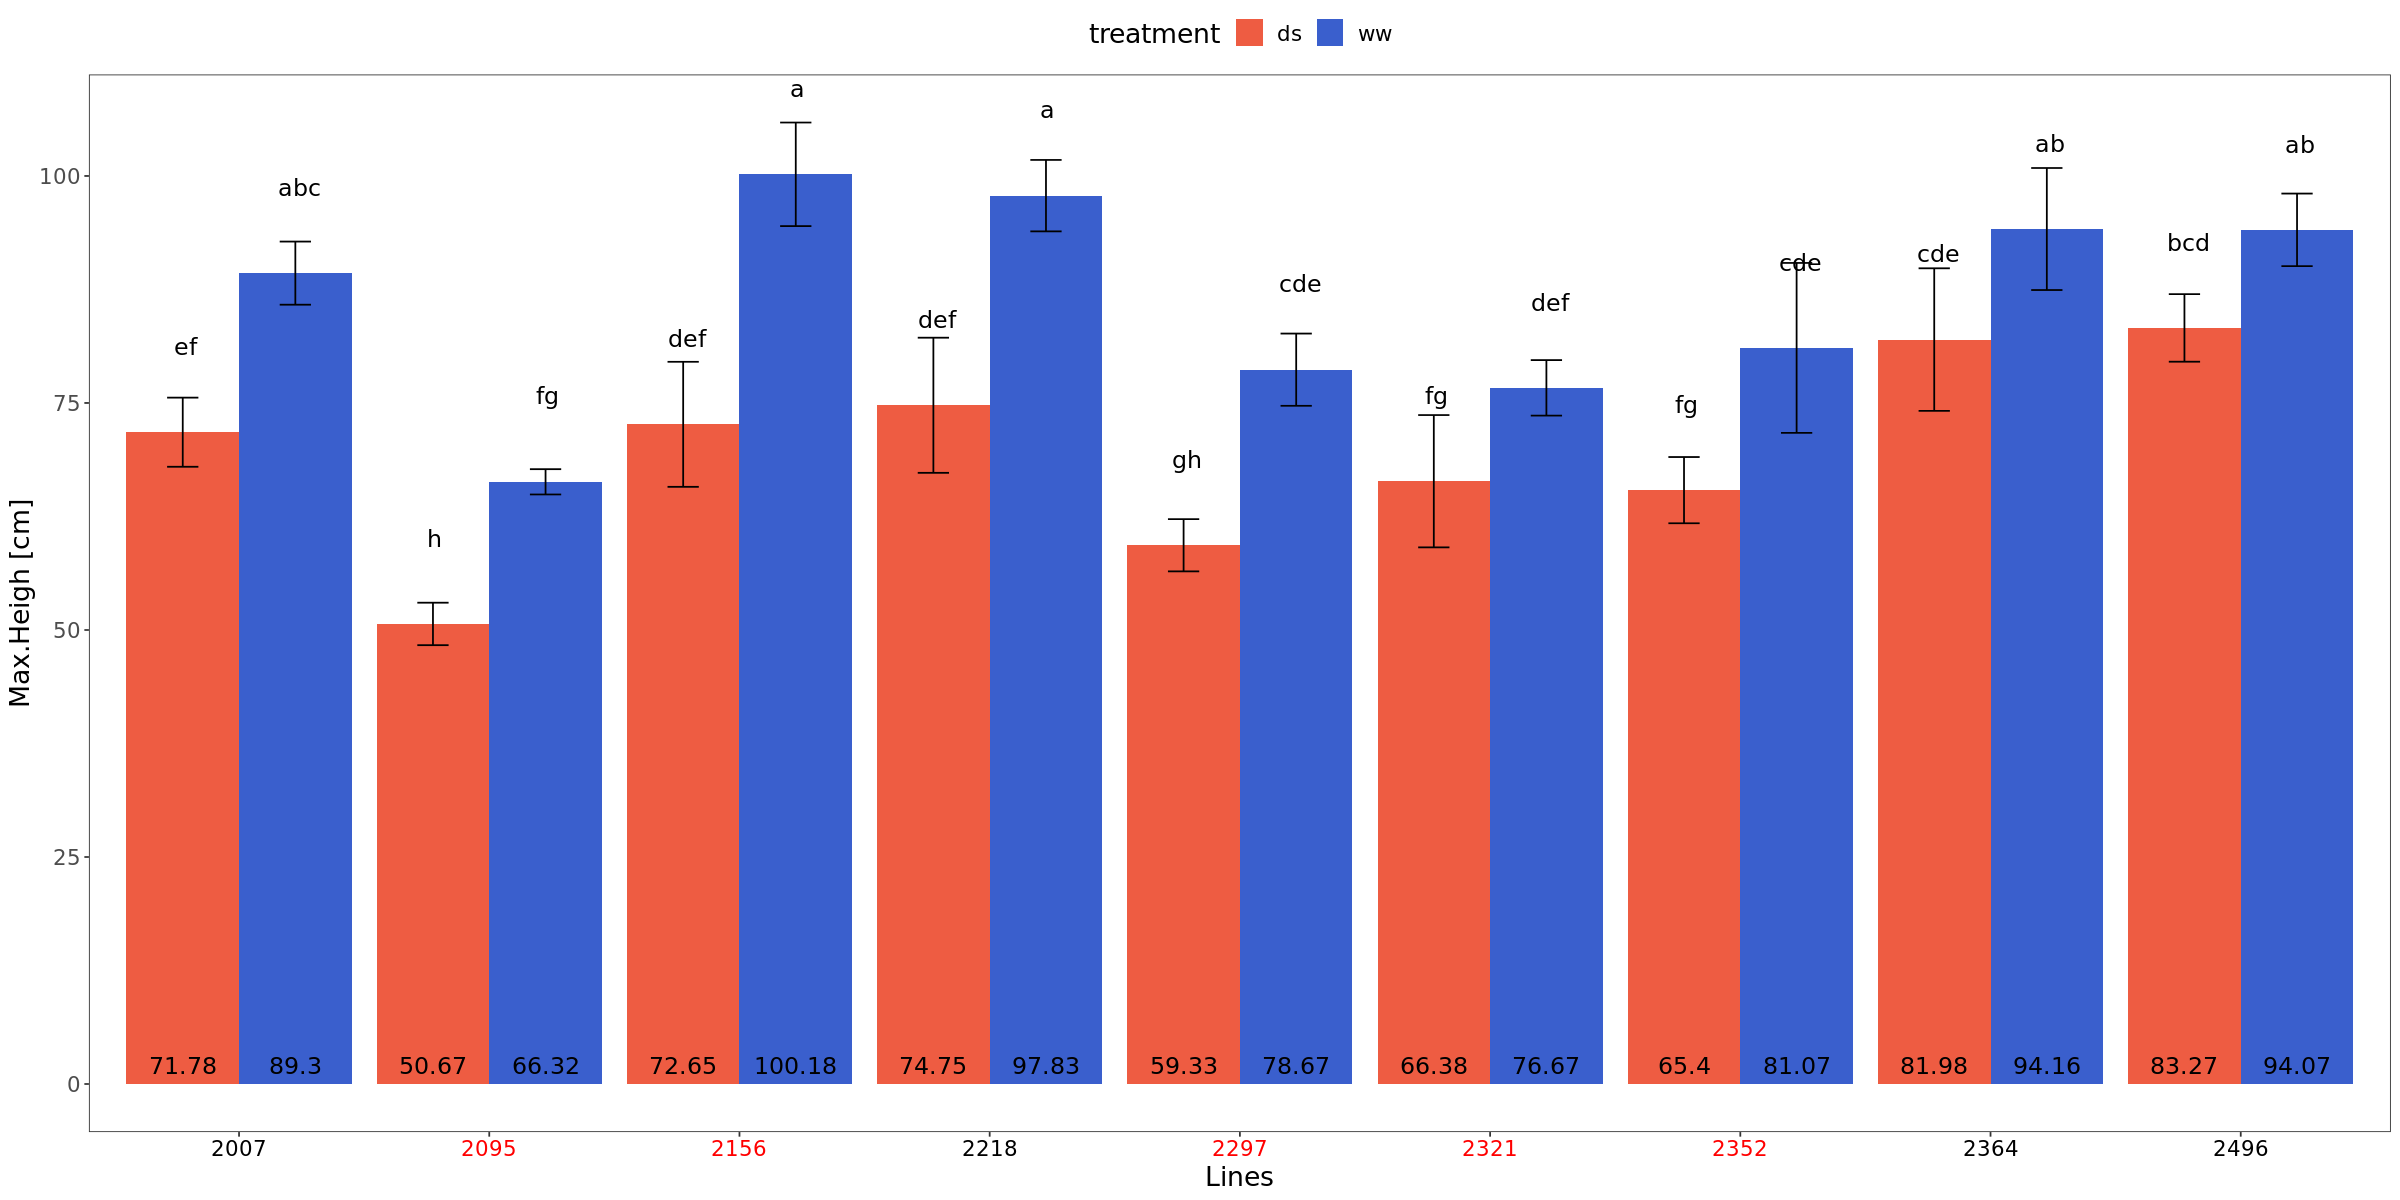

In [10]:

options(repr.plot.width=20, repr.plot.height=10)
       MHeight_Int$IDs<- as.factor(MHeight_Int$IDs)

Height<- ggplot(MHeight_Int, aes(x=IDs, y=mean, fill=treatment))+
geom_bar(stat="identity", position="dodge")+
geom_errorbar(aes(ymin=mean-sd , ymax=mean+sd) ,position = position_dodge(0.9), width = 0.25)+
geom_text(aes(label=tukey), position=position_dodge(0.90), vjust=-4.55, hjust=0.4, size=5, colour="black")+

labs(x="Lines", y="Max.Heigh [cm]")+
scale_fill_manual(values=c("tomato2","royalblue3"))+

theme_bw()+
 theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
theme(axis.text.x=element_text(colour=c("black","red","red","black","red","red","red","black","black")))+
theme(legend.position="top")+
theme(text = element_text(size = 16))+
geom_text(aes(label=round(mean,2), y = 2), position = position_dodge(0.90), colour="black", size= 5)

Height

ggsave("max.height.Int.png", plot =Height, width = 20, height = 10,
       path="/home/sepideh.jafarian/Desktop/wheat_experiment/final-harvest-data-Sep2022/Visualization/max.Height")



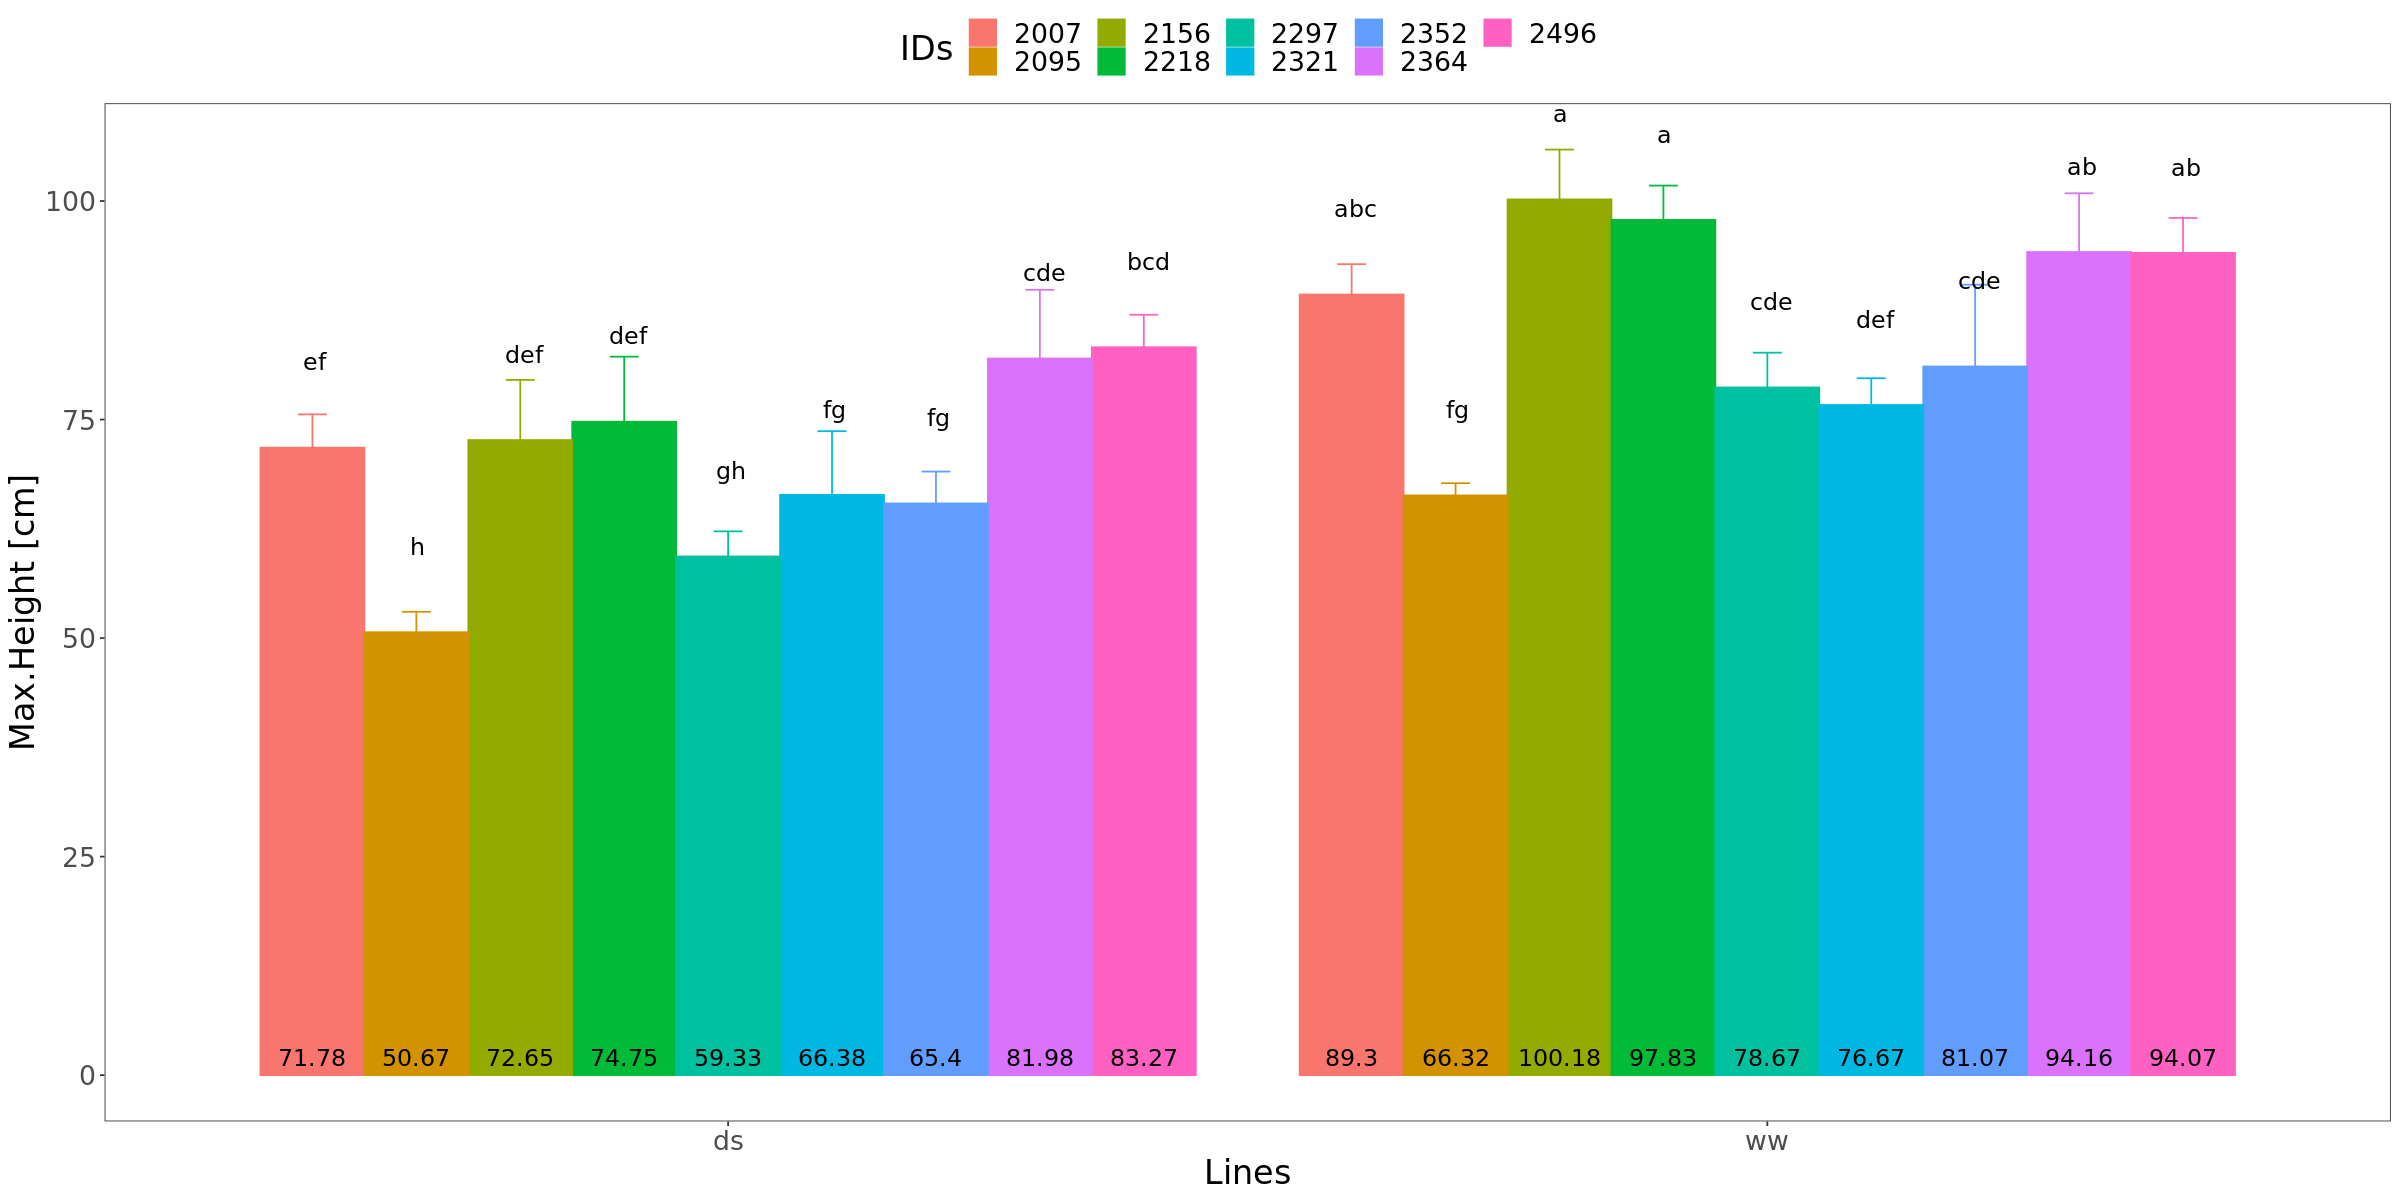

In [11]:

options(repr.plot.width=20, repr.plot.height=10)
       MHeight_Int$IDs<- as.factor(MHeight_Int$IDs)

Height1<- ggplot(MHeight_Int, aes(x=treatment, y=mean, fill=IDs, color=IDs))+
geom_bar(stat="identity", position="dodge")+
geom_errorbar(aes(ymin=mean-sd , ymax=mean+sd) ,position = position_dodge(0.9), width = 0.25)+
geom_text(aes(label=tukey), position=position_dodge(0.90), vjust=-4.55, hjust=0.4, size=5, colour="black")+
labs(x="Lines", y="Max.Height [cm]")+
theme_bw()+
 theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
theme(legend.position="top")+
theme(text = element_text(size = 20))+
geom_text(aes(label=round(mean,2), y = 2), position = position_dodge(0.90), colour="black", size= 5)

Height1


ggsave("max.height.Int.sep.png", plot =Height1, width = 20, height = 10,
       path="/home/sepideh.jafarian/Desktop/wheat_experiment/final-harvest-data-Sep2022/Visualization/max.Height")


In [14]:
View(MHeight_summary)

treatment IDs  mean      sd      
1  ww        2156 100.18333 5.702777
2  ww        2218  97.83333 3.933785
3  ww        2364  94.16000 6.719598
4  ww        2496  94.06667 3.995831
5  ww        2007  89.30000 3.474910
6  ds        2496  83.26667 3.722186
7  ds        2364  81.98333 7.850966
8  ww        2352  81.06667 9.357920
9  ww        2297  78.66667 3.976766
10 ww        2321  76.66667 3.055269
11 ds        2218  74.75000 7.441438
12 ds        2156  72.65000 6.885855
13 ds        2007  71.78333 3.805479
14 ds        2321  66.38333 7.285717
15 ww        2095  66.32000 1.393557
16 ds        2352  65.40000 3.646917
17 ds        2297  59.33333 2.875181
18 ds        2095  50.66667 2.338090

In [15]:
Control_data_Height <-MHeight_summary[c(1,2,3,4,5,8,9,10,15), ]
Control_data_Height <-Control_data_Height [order(Control_data_Height$IDs),]
Control_data_Height

treatment IDs  mean      sd      
1 ww        2007  89.30000 3.474910
2 ww        2095  66.32000 1.393557
3 ww        2156 100.18333 5.702777
4 ww        2218  97.83333 3.933785
5 ww        2297  78.66667 3.976766
6 ww        2321  76.66667 3.055269
7 ww        2352  81.06667 9.357920
8 ww        2364  94.16000 6.719598
9 ww        2496  94.06667 3.995831

In [16]:
Stress_data_Height <-MHeight_summary[c(6,7,11,12,13,14,16,17,18), ]
Stress_data_Height <-Stress_data_Height [order(Stress_data_Height$IDs),]
Stress_data_Height

treatment IDs  mean     sd      
1 ds        2007 71.78333 3.805479
2 ds        2095 50.66667 2.338090
3 ds        2156 72.65000 6.885855
4 ds        2218 74.75000 7.441438
5 ds        2297 59.33333 2.875181
6 ds        2321 66.38333 7.285717
7 ds        2352 65.40000 3.646917
8 ds        2364 81.98333 7.850966
9 ds        2496 83.26667 3.722186

In [17]:
difference_data_Height <- left_join(Control_data_Height,Stress_data_Height, by="IDs")
difference_data_Height 

difference_data_Height$Height_difference <- (difference_data_Height$mean.x)-(difference_data_Height$mean.y)
View(difference_data_Height)

treatment.x IDs  mean.x    sd.x     treatment.y mean.y   sd.y    
1 ww          2007  89.30000 3.474910 ds          71.78333 3.805479
2 ww          2095  66.32000 1.393557 ds          50.66667 2.338090
3 ww          2156 100.18333 5.702777 ds          72.65000 6.885855
4 ww          2218  97.83333 3.933785 ds          74.75000 7.441438
5 ww          2297  78.66667 3.976766 ds          59.33333 2.875181
6 ww          2321  76.66667 3.055269 ds          66.38333 7.285717
7 ww          2352  81.06667 9.357920 ds          65.40000 3.646917
8 ww          2364  94.16000 6.719598 ds          81.98333 7.850966
9 ww          2496  94.06667 3.995831 ds          83.26667 3.722186

treatment.x IDs  mean.x    sd.x     treatment.y mean.y   sd.y    
1 ww          2007  89.30000 3.474910 ds          71.78333 3.805479
2 ww          2095  66.32000 1.393557 ds          50.66667 2.338090
3 ww          2156 100.18333 5.702777 ds          72.65000 6.885855
4 ww          2218  97.83333 3.933785 ds          74.75000 7.441438
5 ww          2297  78.66667 3.976766 ds          59.33333 2.875181
6 ww          2321  76.66667 3.055269 ds          66.38333 7.285717
7 ww          2352  81.06667 9.357920 ds          65.40000 3.646917
8 ww          2364  94.16000 6.719598 ds          81.98333 7.850966
9 ww          2496  94.06667 3.995831 ds          83.26667 3.722186
  Height_difference
1 17.51667         
2 15.65333         
3 27.53333         
4 23.08333         
5 19.33333         
6 10.28333         
7 15.66667         
8 12.17667         
9 10.80000

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


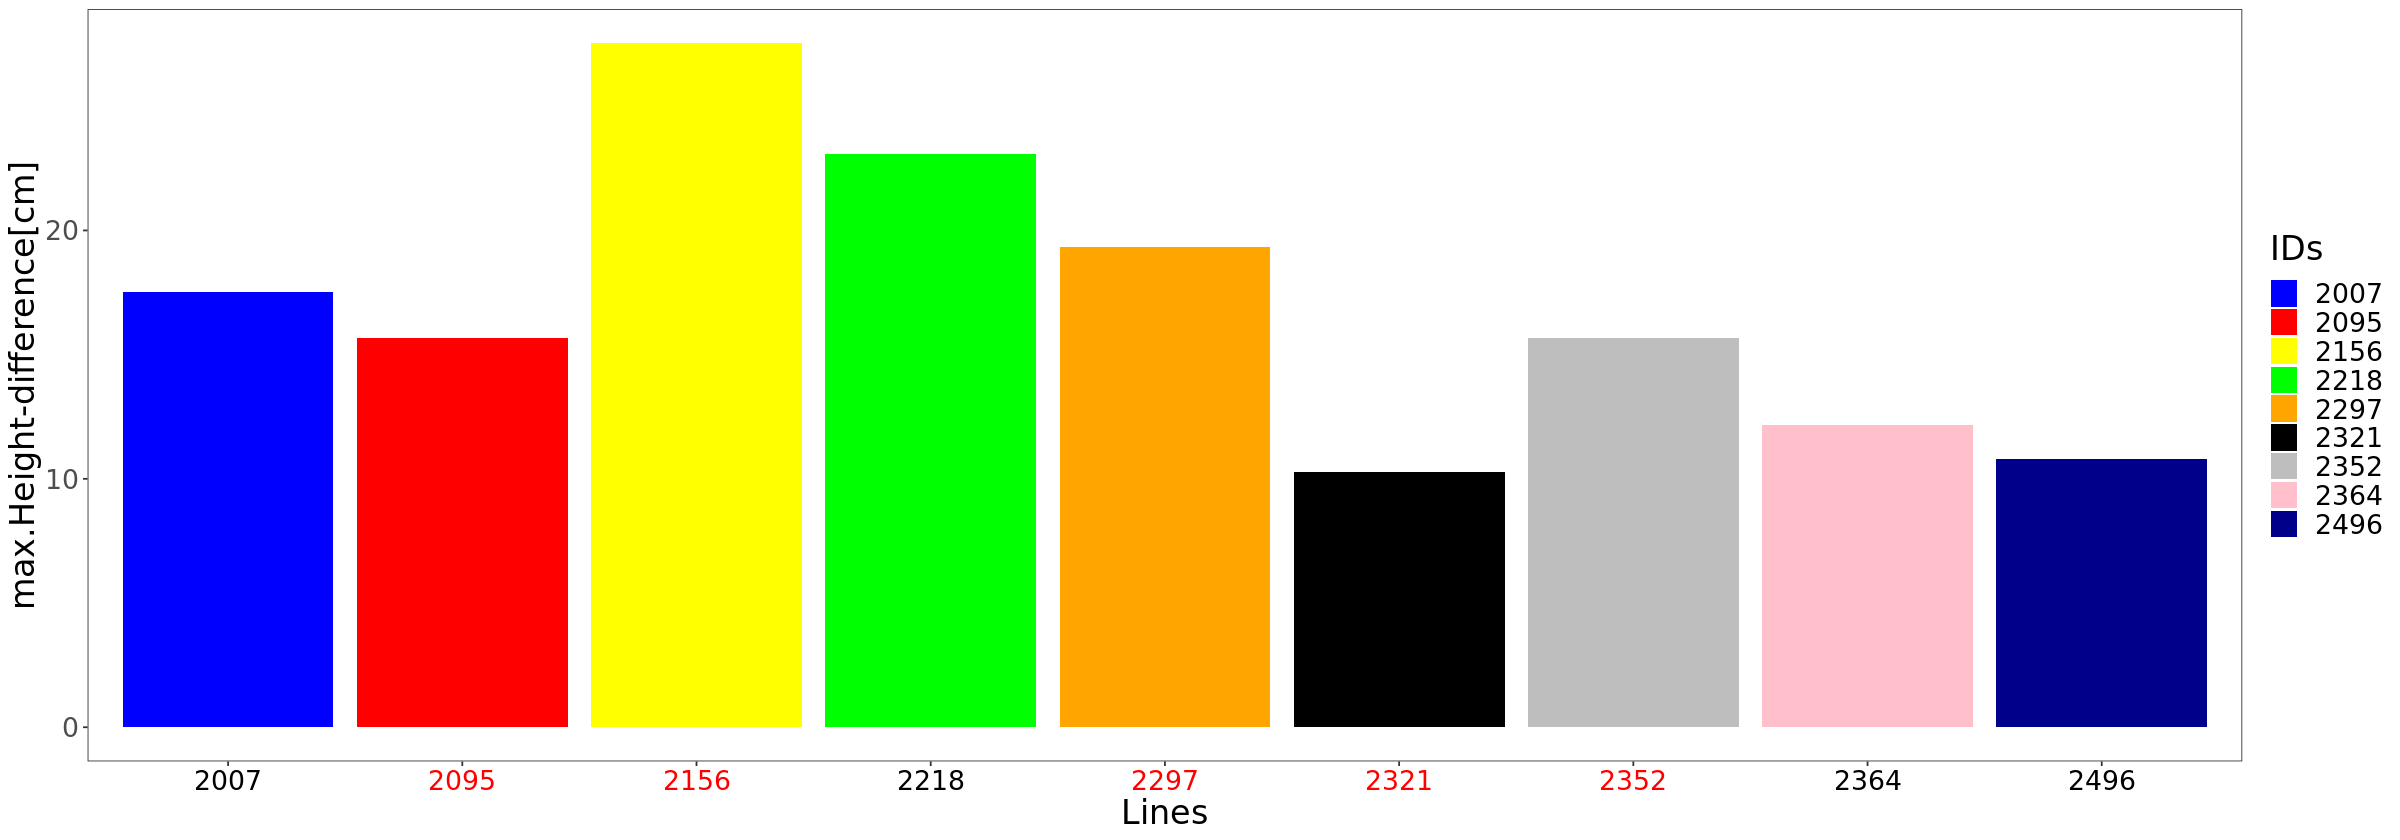

In [21]:

options(repr.plot.width=20, repr.plot.height=7)

H <- ggplot(difference_data_Height, aes(x=IDs, y=Height_difference, fill=IDs) ) + 
  geom_bar(stat = "identity")+
scale_fill_manual(values=c("blue","red","yellow","green","orange","black","gray","pink","darkblue")) +
theme(legend.position="top")+
#theme(text = element_text(size = 16))+
theme_bw()+

labs(x="Lines", y="max.Height-difference[cm]")+
theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
theme(axis.text.x = element_text(colour=c("black","red","red","black","red","red","red","black","black")))+
theme(text = element_text(size = 20))
H

ggsave("max.Height.difference.png", plot = H, width = 15, height = 10,
       path="/home/sepideh.jafarian/Desktop/wheat_experiment/final-harvest-data-Sep2022/Visualization/max.Height")


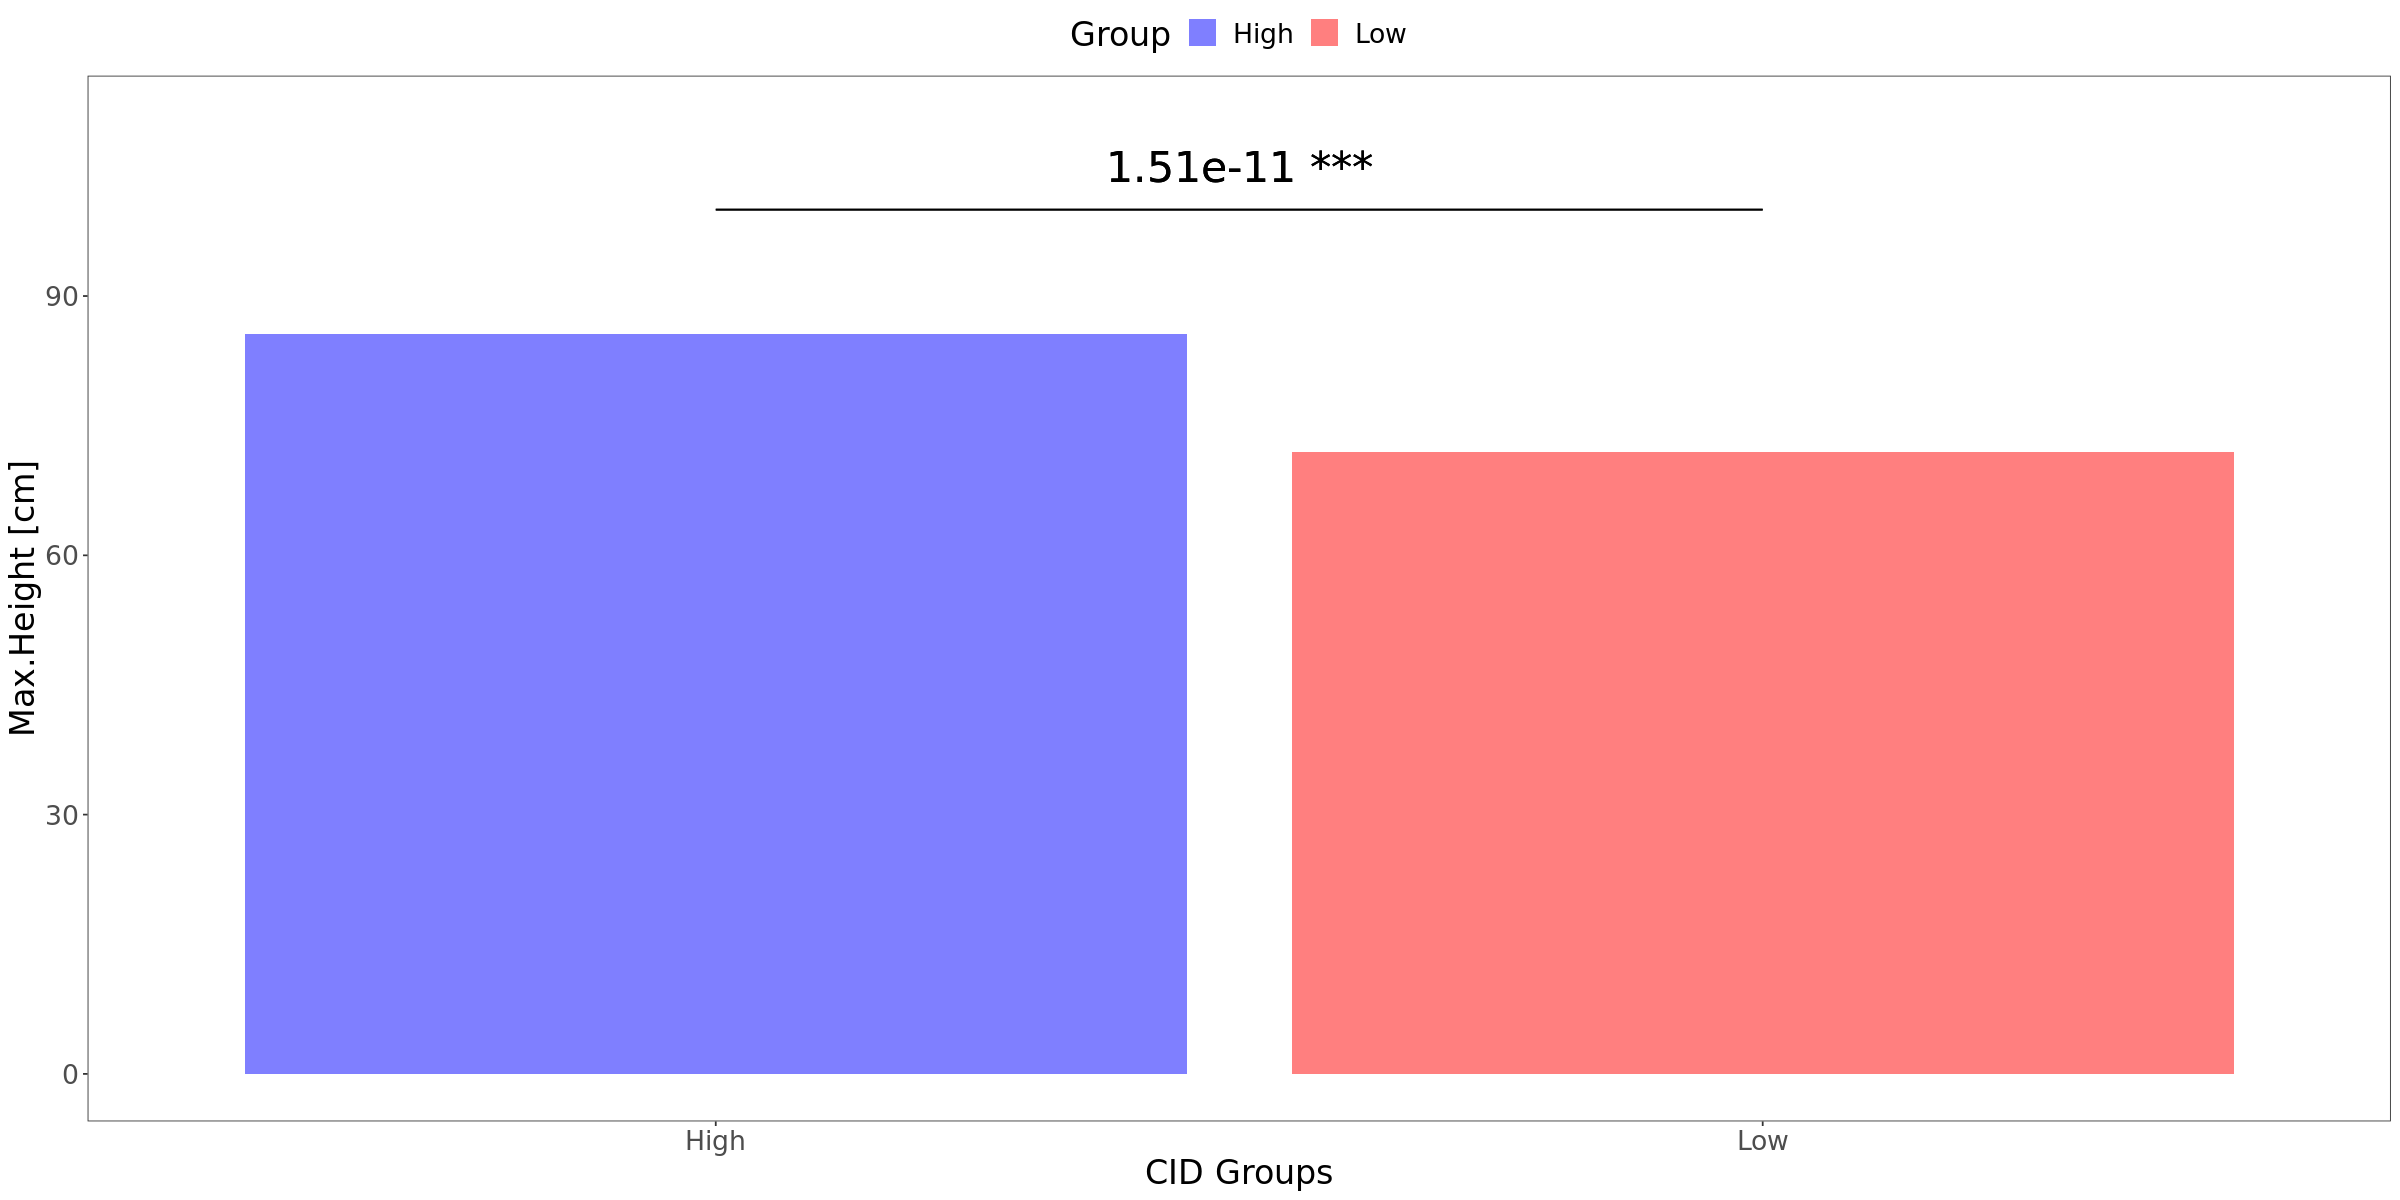

In [22]:

options(repr.plot.width=20, repr.plot.height=10)

H <- ggplot(MHeight_summary_G, aes(x=Group, y=mean, fill=Group) ) + 
  geom_bar(stat = "identity", position = "dodge", alpha=0.5) +
 # geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), position = position_dodge(0.9), width = 0.2, show.legend = FALSE) +
ylim(0,110)+
 labs(x="CID Groups", y="Max.Height [cm]") +
   theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
  #theme(legend.position = c(0.08, 0.90))+
theme(legend.position = "top") +
scale_fill_manual(values=c("blue","red"))+

theme(text = element_text(size = 20))+


geom_segment(x=1, y=100, xend=2, yend=100)+

geom_text(x=1.5, y=105, label="1.51e-11 ***", size=9)
H


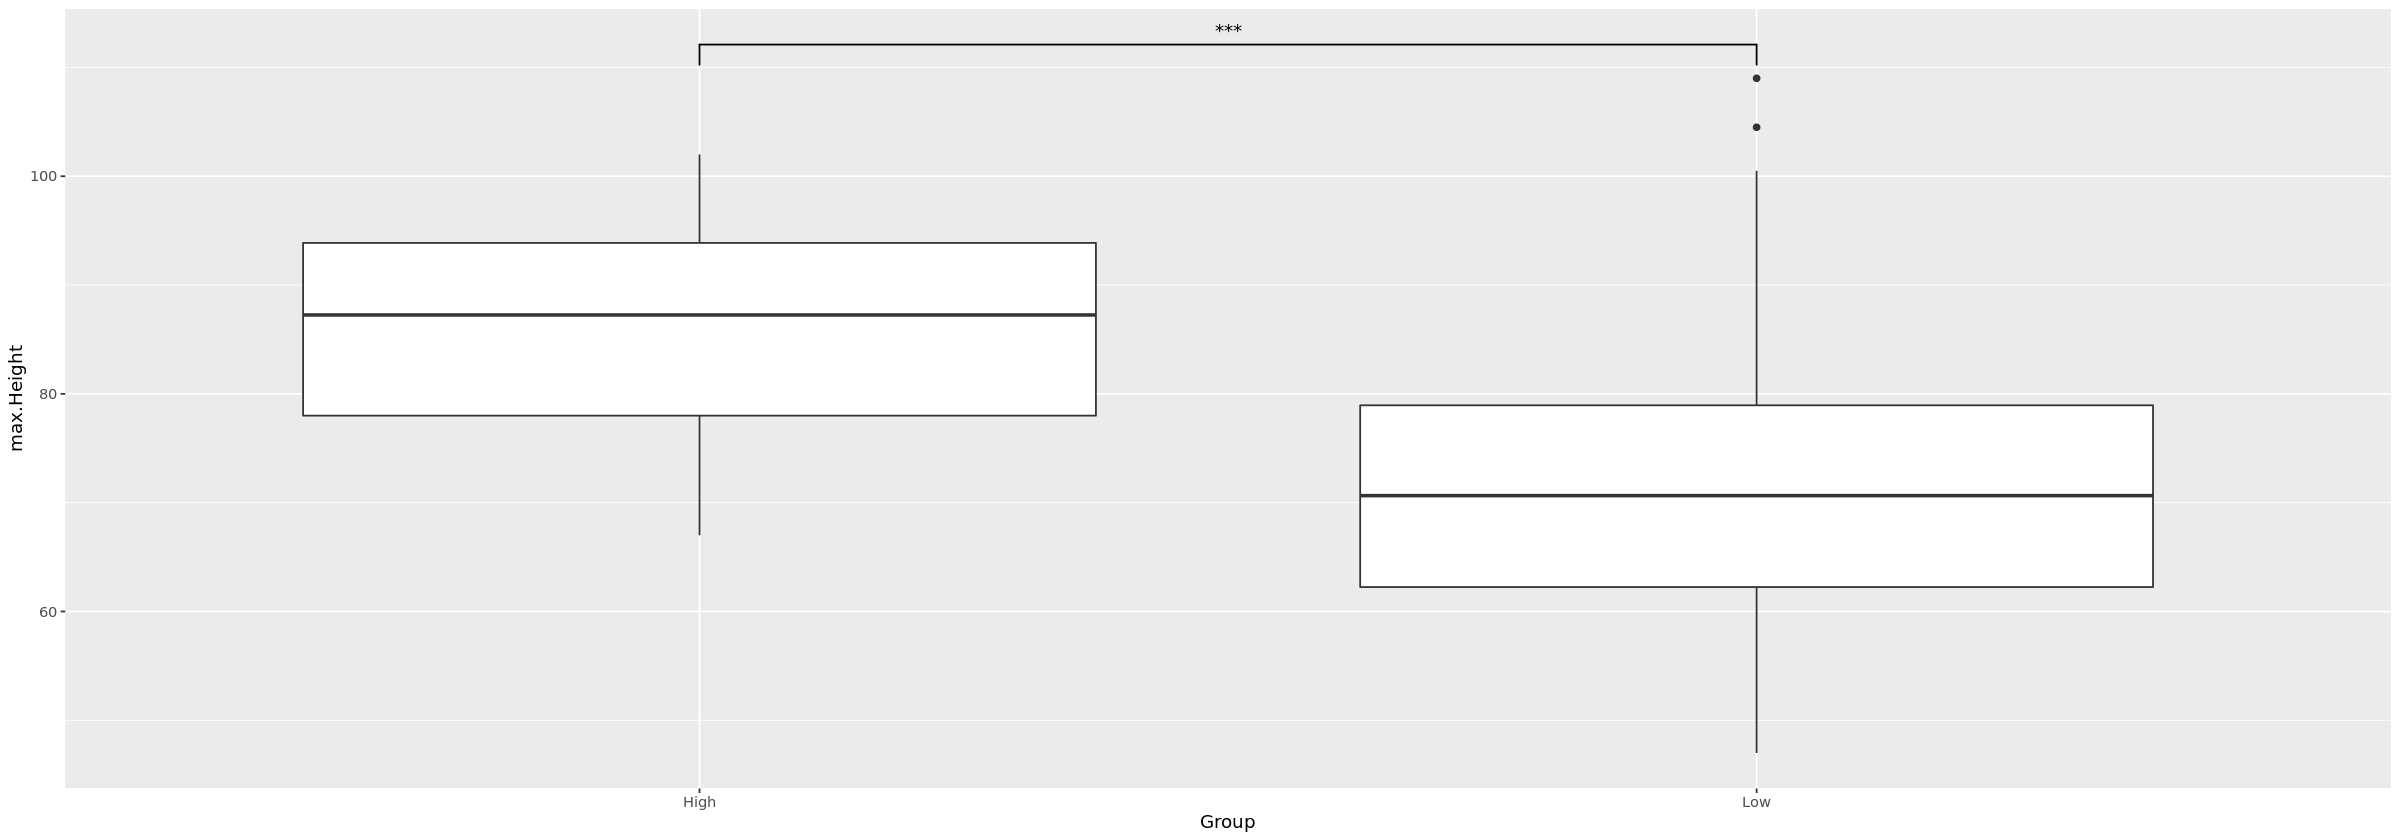

In [166]:
library(ggplot2)
library(ggsignif)


ggplot(final.data, aes(x=Group, y=max.Height)) + 
  geom_boxplot() +
  geom_signif(comparisons = list(c("High", "Low")), 
              map_signif_level=TRUE)

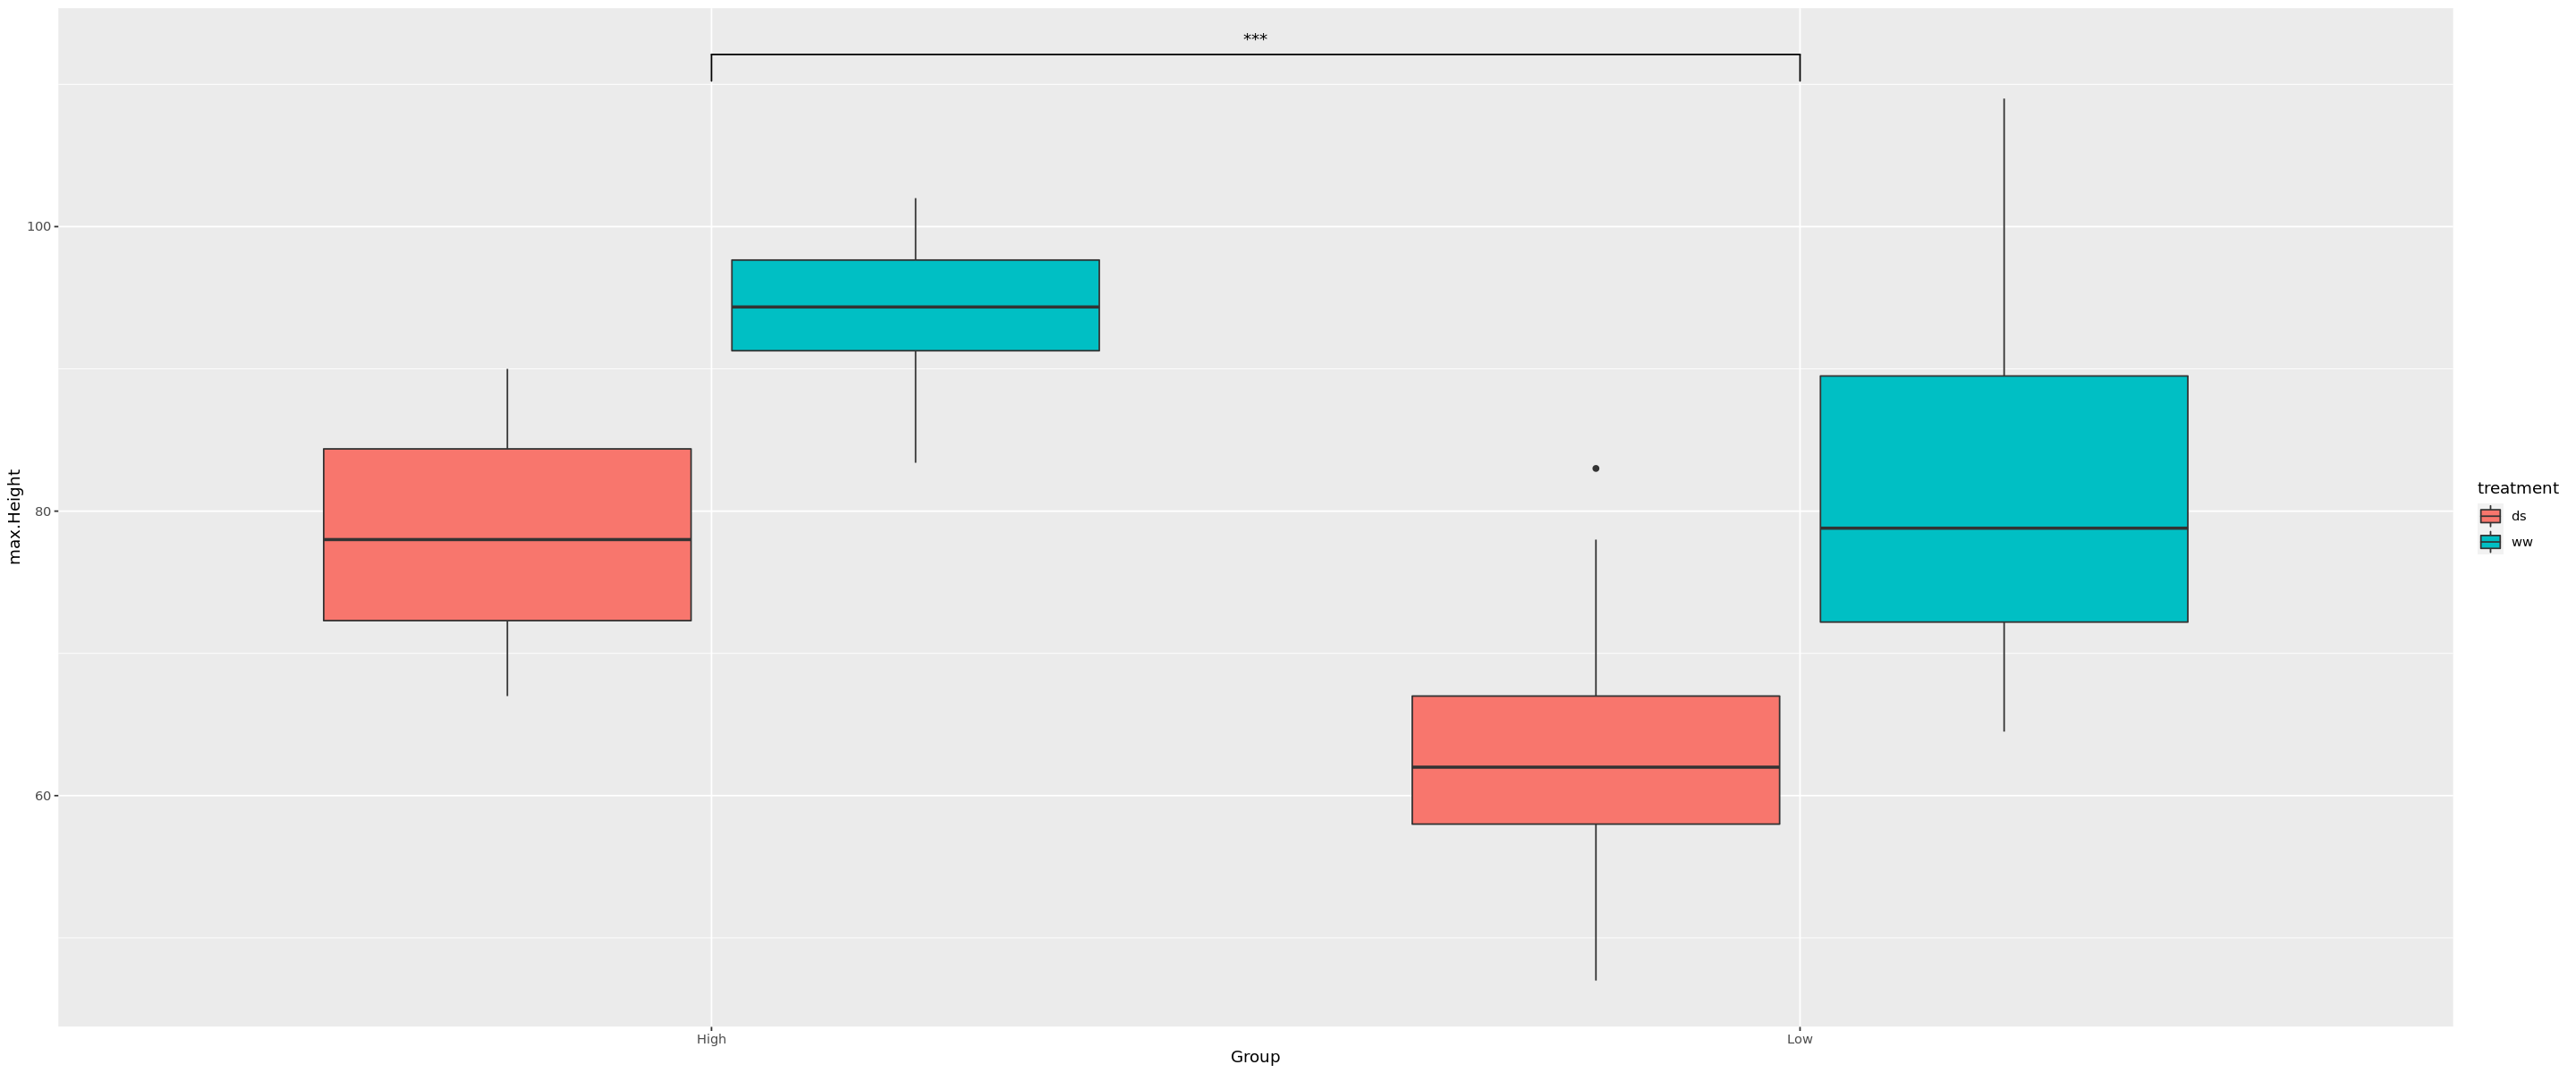

In [271]:
library(ggplot2)
library(ggsignif)


ggplot(final.data, aes(x=Group, y=max.Height, fill=treatment)) + 
  geom_boxplot() +
  geom_signif(comparisons = list(c("High", "Low")), 
              map_signif_level=TRUE)



In [170]:
s<- aov(max.Height~Group+treatment+Group*treatment, data=final.data)
summary(s)
tukey<- TukeyHSD(s, conf.level=.95)
tukey
tukey.cld.Height.Gt<- multcompLetters4(s,tukey)
View(tukey.cld.Height.Gt)

                 Df Sum Sq Mean Sq F value   Pr(>F)    
Group             1   4817    4817  57.995 1.51e-11 ***
treatment         1   7781    7781  93.678 5.01e-16 ***
Group:treatment   1     31      31   0.369    0.545    
Residuals       100   8306      83                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = max.Height ~ Group + treatment + Group * treatment, data = final.data)

$Group
              diff       lwr       upr p adj
Low-High -13.70292 -17.27279 -10.13306     0

$treatment
          diff      lwr      upr p adj
ww-ds 17.29829 13.75161 20.84496     0

$`Group:treatment`
                     diff        lwr       upr     p adj
Low:ds-High:ds  -15.14583 -21.716742 -8.574924 0.0000002
High:ww-High:ds  16.08598   9.057623 23.114346 0.0000002
Low:ww-High:ds    3.12658  -3.444329  9.697490 0.6010278
High:ww-Low:ds   31.23182  24.499465 37.964171 0.0000000
Low:ww-Low:ds    18.27241  12.019130 24.525698 0.0000000
Low:ww-High:ww  -12.95940 -19.691758 -6.227051 0.0000128


$Group
High  Low 
 "a"  "b" 

$treatment
 ww  ds 
"a" "b" 

$`Group:treatment`
High:ww  Low:ww High:ds  Low:ds 
    "a"     "b"     "b"     "c" 


In [168]:
MHeight_summary_Gt <- group_by(final.data, Group, treatment) %>%
summarise(mean=mean(max.Height), sd=sd(max.Height)) %>%
          arrange(desc(mean))
         View(MHeight_summary_Gt)

`summarise()` has grouped output by 'Group'. You can override using the
`.groups` argument.


Group treatment mean     sd       
1 High  ww        94.03182  5.277390
2 Low   ww        81.07241 12.195869
3 High  ds        77.94583  7.470404
4 Low   ds        62.80000  9.009400

In [172]:

cld.MHeight_Gt <- as.data.frame.list(tukey.cld.Height.Gt$`Group:treatment`)
MHeight_summary_Gt$tukey <-cld.MHeight_Gt $Letters
write.table(MHeight_summary_Gt, "MHeight.Gt.summary.August.csv")
View(MHeight_summary_Gt)

Group treatment mean     sd        tukey
1 High  ww        94.03182  5.277390 a    
2 Low   ww        81.07241 12.195869 b    
3 High  ds        77.94583  7.470404 b    
4 Low   ds        62.80000  9.009400 c

In [23]:
Height.Gt<- read.table("MHeight.Gt.summary.August.csv")
View(Height.Gt)

Group treatment mean     sd        tukey
1 High  ww        94.03182  5.277390 a    
2 Low   ww        81.07241 12.195869 b    
3 High  ds        77.94583  7.470404 b    
4 Low   ds        62.80000  9.009400 c

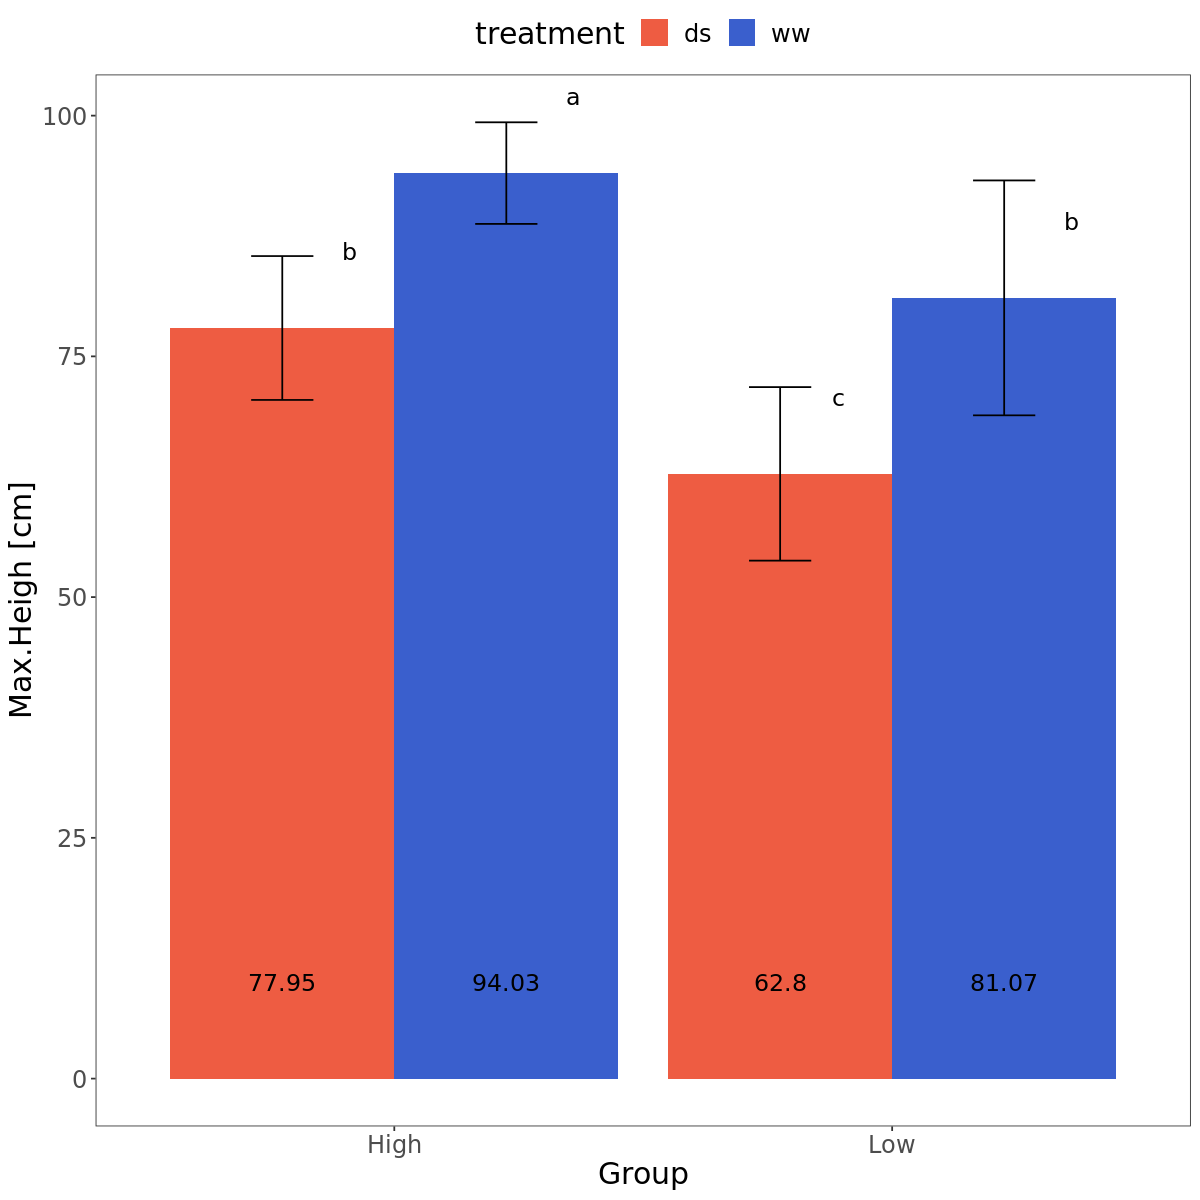

In [41]:
options(repr.plot.width=10, repr.plot.height=10)
       Height.Gt$Group<- as.factor(Height.Gt$Group)

Height_Gt<- ggplot(Height.Gt, aes(x=Group, y=mean, fill=treatment))+
geom_bar(stat="identity", position="dodge")+
geom_errorbar(aes(ymin=mean-sd , ymax=mean+sd) ,position = position_dodge(0.9), width = 0.25)+
geom_text(aes(label=tukey), position=position_dodge(0.90), vjust=-4, hjust=-4, size=5, colour="black")+
labs(x="Groups", y="Max.Heigh [cm]")+
scale_fill_manual(values=c("tomato2","royalblue3"))+
theme_bw()+
 theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
theme(legend.position="top")+
theme(text = element_text(size = 18))+
geom_text(aes(label=round(mean,2), y = 10), position = position_dodge(0.90), colour="black", size= 5)


Height_Gt

ggsave("max.height.Int.G.png", plot = Height_Gt, width = 15, height = 10,
       path="/home/sepideh.jafarian/Desktop/wheat_experiment/final-harvest-data-Sep2022/Visualization/max.Height")


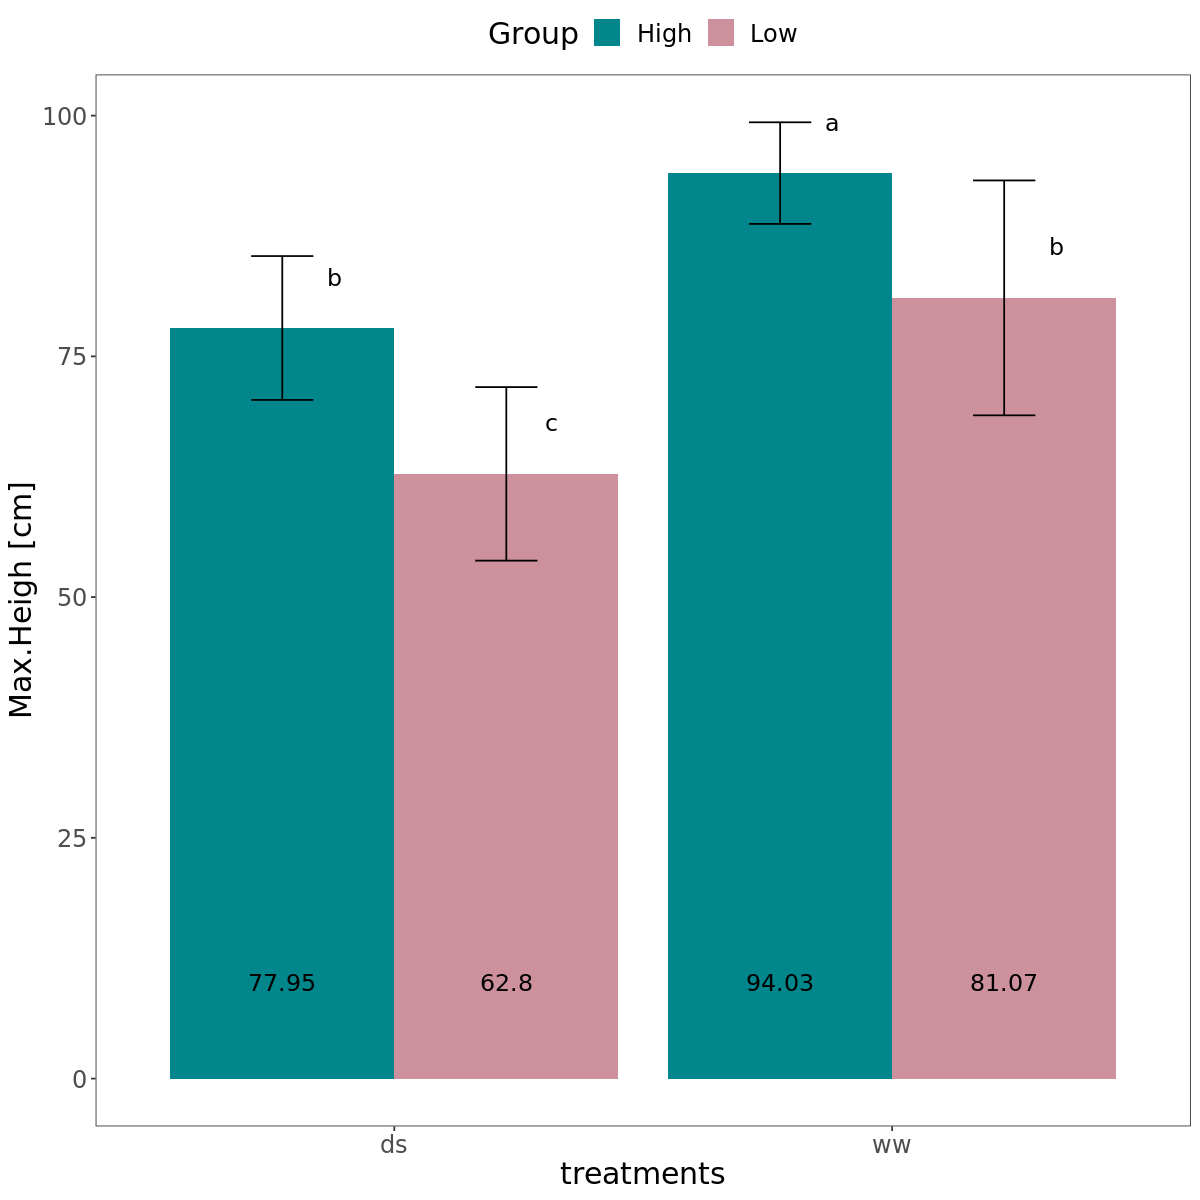

In [54]:
options(repr.plot.width=10, repr.plot.height=10)
       Height.Gt$Group<- as.factor(Height.Gt$Group)

Height_Gt1<- ggplot(Height.Gt, aes(x=treatment, y=mean, fill=Group))+
geom_bar(stat="identity", position="dodge")+
geom_errorbar(aes(ymin=mean-sd , ymax=mean+sd) ,position = position_dodge(0.9), width = 0.25)+
geom_text(aes(label=tukey), position=position_dodge(0.90), vjust=-2.5, hjust=-3, size=5, colour="black")+
labs(x="treatments", y="Max.Heigh [cm]")+
scale_fill_manual(values=c("turquoise4","pink3"))+

theme_bw()+
 theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
theme(legend.position="top")+
theme(text = element_text(size = 18))+
geom_text(aes(label=round(mean,2), y = 10), position = position_dodge(0.90), colour="black", size= 5)

Height_Gt1

ggsave("max.Height.Int.Trts.png", plot = Height_Gt1, width = 15, height = 10,
       path="/home/sepideh.jafarian/Desktop/wheat_experiment/final-harvest-data-Sep2022/Visualization/max.Height")

# Number of the  Shoots

In [212]:
View(final.data)

experiment IDs  treatment BBCH  Collection.date max.Height Biomass Shoots
1   V22001     2218 ww        92    08/12/22         91.2      14.75   10    
2   V22001     2218 ds        92    08/08/22         78.0       4.72    5    
3   V22001     2156 ds        92    08/09/22         83.0       7.76    4    
4   V22001     2297 ds        92    08/08/22         61.0       5.61    7    
5   V22001     2218 ww        92    08/30/22        102.0      14.30    9    
6   V22001     2352 ds        92    11/08/22         61.0       5.76    3    
7   V22001     2156 ds        92    08/08/22         67.0       6.14    5    
8   V22001     2218 ww        92    08/30/22        100.2      15.28    9    
9   V22001     2364 ds        92    08/18/22         72.4       8.00    4    
10  V22001     2352 ds        92    08/08/22         65.0       4.47    3    
11  V22001     2218 ds        92    08/08/22         68.0       4.95    6    
12  V22001     2095 ww        92    08/18/22         67.3      10.35    9    
13  V22001     2321 ds        90-92 11/08/22         78.0       5.60    5    
14  V22001     2007 ds        92    08/12/22         68.2       6.72    6    
15  V22001     2321 ww        92    08/22/22         78.8      10.06    8    
16  V22001     2095 ds        92    08/08/22         50.0       3.27    3    
17  V22001     2297 ds        92    08/08/22         63.0       7.43    6    
18  V22001     2364 ww        92    08/29/22         94.7      18.18    9    
19  V22001     2007 ds        92    08/12/22         72.5       7.13    5    
20  V22001     2156 ww        92    08/18/22        109.0      15.62   12    
21  V22001     2364 ds        92    08/12/22         90.0       8.12    5    
22  V22001     2321 ds        92    08/08/22         62.0       4.27    4    
23  V22001     2297 ww        92    08/18/22         79.0      13.00   13    
24  V22001     2352 ww        92    08/18/22         89.5      14.29    7    
25  V22001     2321 ww        92    08/22/22         81.0      11.27   10    
26  V22001     2095 ds        90    08/09/22         51.0       3.80    5    
27  V22001     2496 ds        92    08/12/22         80.9       7.31    4    
28  V22001     2156 ds        92    08/18/22         77.0       7.66    8    
29  V22001     2321 ww        92    08/18/22         77.3       8.34    7    
30  V22001     2496 ds        92    11/08/22         87.0       8.18    5    
⋮   ⋮          ⋮    ⋮         ⋮     ⋮               ⋮          ⋮       ⋮     
75  V22001     2156 ww        92    08/18/22         97.5      16.15   10    
76  V22001     2297 ww        92    08/18/22         81.1      12.64    9    
77  V22001     2297 ds        92    08/09/22         61.0       4.37    4    
78  V22001     2095 ww        92    08/18/22         65.5      10.24    8    
79  V22001     2364 ww        92    08/30/22        102.0      19.96    9    
80  V22001     2007 ds        90    08/09/22         69.0       4.15    6    
81  V22001     2218 ww        92    08/18/22         98.3      12.36   10    
82  V22001     2352 ds        91    08/09/22         66.0       5.11    3    
83  V22001     2218 ds        92    11/08/22         72.0       5.71    5    
84  V22001     2364 ds        92    08/18/22         87.5       5.77    4    
85  V22001     2352 ww        92    08/22/22         89.8      14.53    9    
86  V22001     2496 ww        92    08/18/22         93.5      12.52    6    
87  V22001     2218 ds        92    08/09/22         67.0       5.04    4    
88  V22001     2352 ww        92    08/30/22         83.5      17.20    9    
89  V22001     2007 ww        92    08/18/22         86.0      10.54    7    
90  V22001     2095 ds        92    08/08/22         50.0       3.68    4    
91  V22001     2156 ww        92    08/18/22         95.5      16.81   11    
92  V22001     2095 ww        92    08/22/22         64.5      10.39    9    
93  V22001     2321 ww        92    08/12/22         76.0      12.27    6    
94  V22001     2321 ds    

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


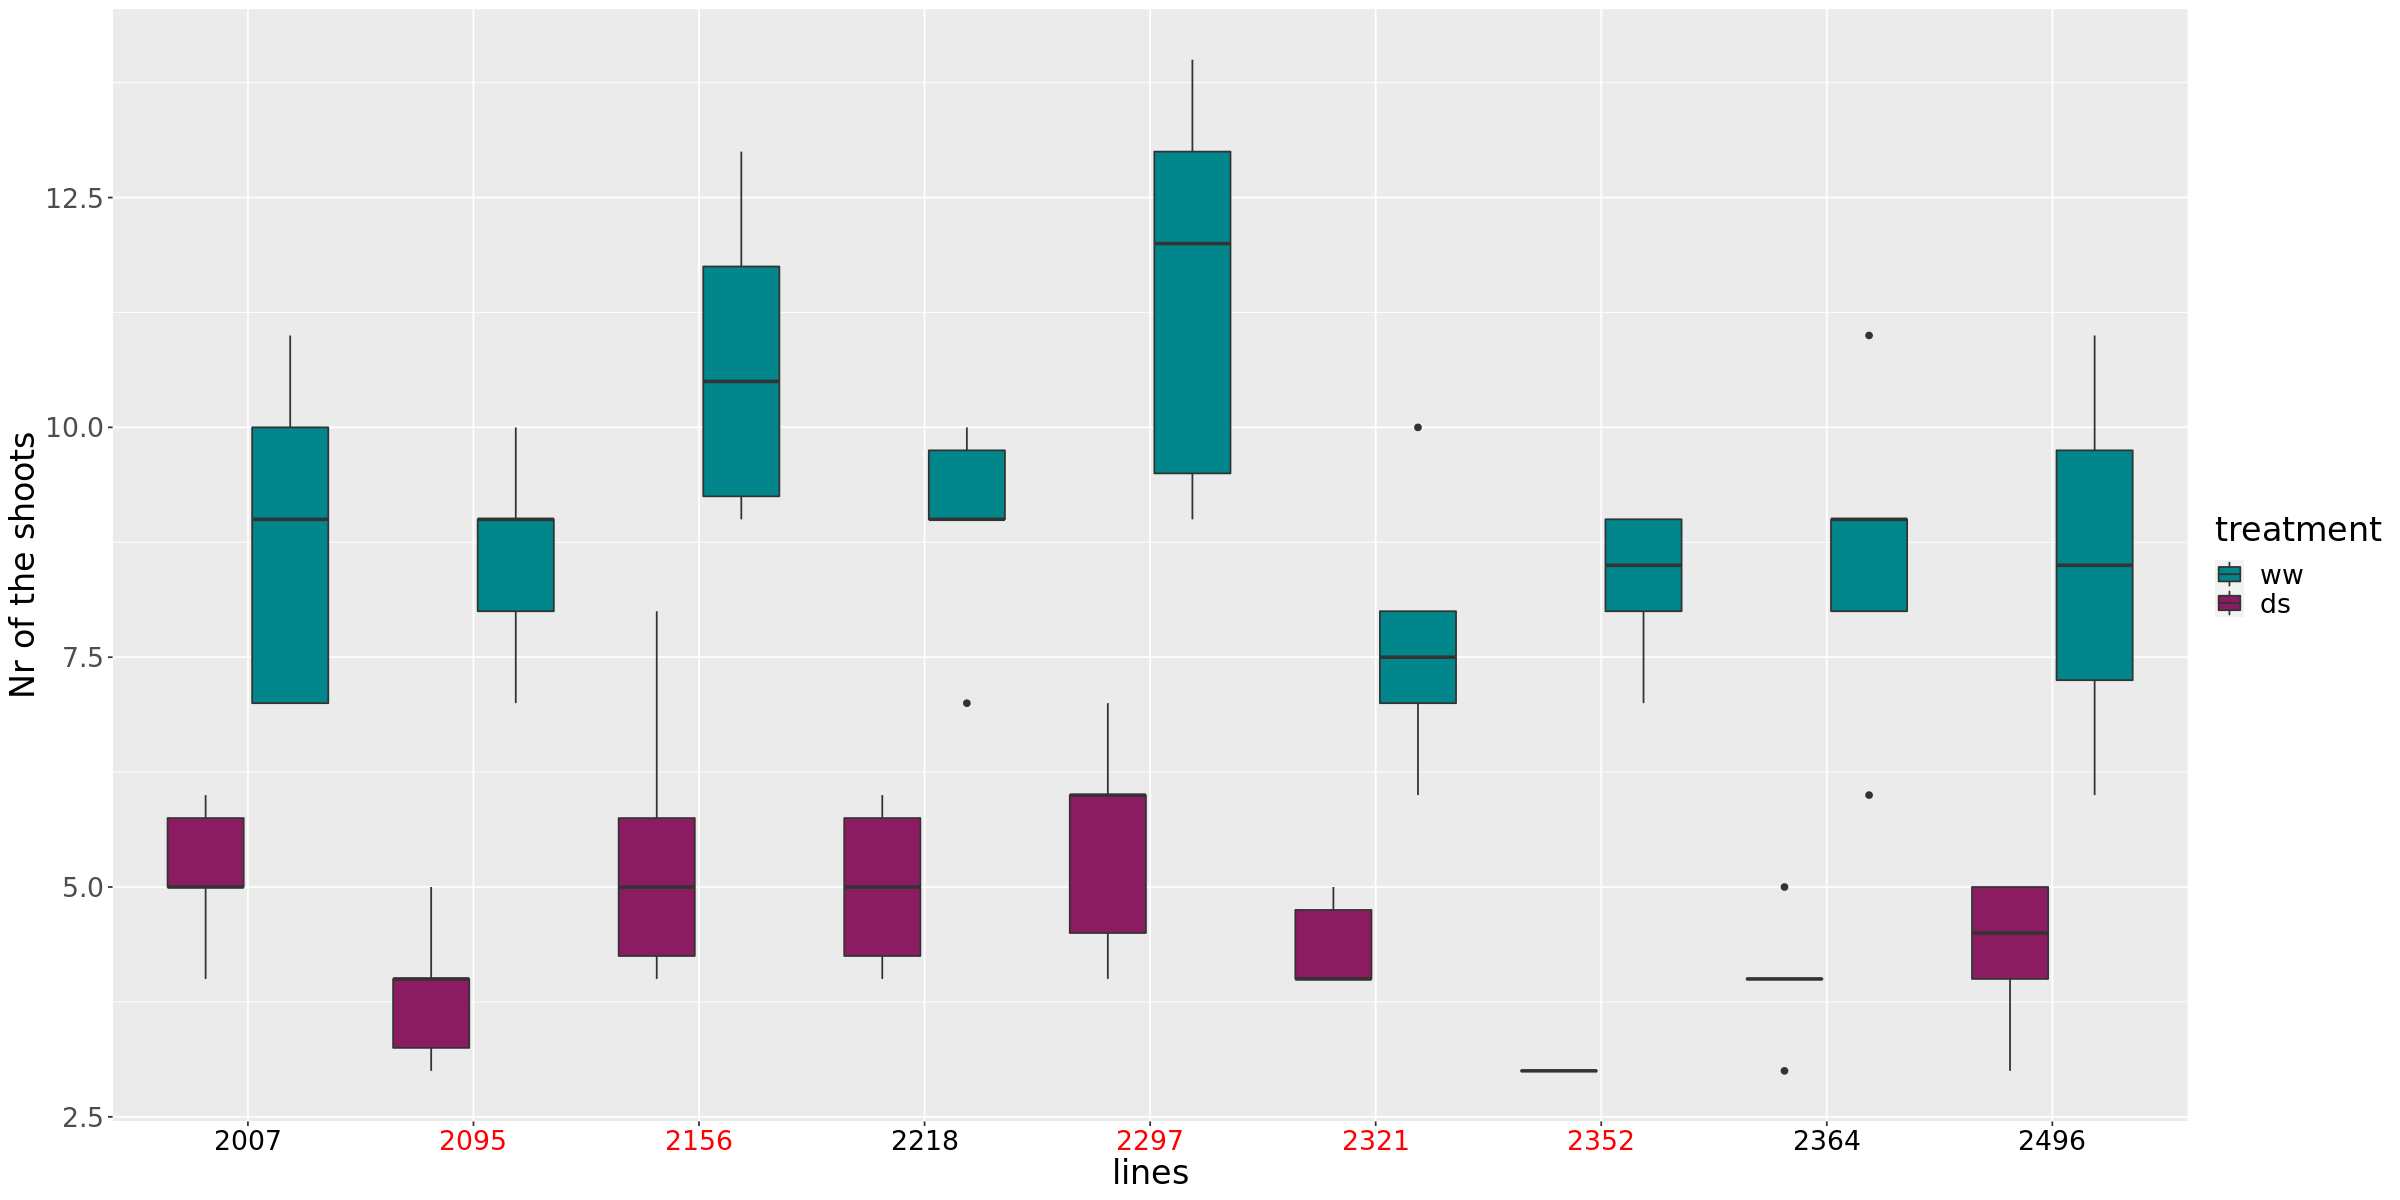

In [110]:
options(repr.plot.width=20, repr.plot.height=10)

ps <- ggplot(final.data, aes(x=IDs, y=Shoots,  fill=treatment))+
       geom_boxplot()+
       theme(text=element_text(size = 20))+
        scale_fill_manual(breaks =final.data$treatment,
                    values = c("turquoise4","maroon4")) +
        labs(y="Nr of the shoots", x="lines")+

theme(axis.text.x = element_text(colour=c("black","red","red","black","red","red","red","black","black")))

    print(ps)

#fpf<- ps+theme_bw()
#fpf
#ggsave("Nr.shoots-boxplot.png", plot = ps, width = 15, height = 10,
      #path="/home/sepideh.jafarian/Desktop/wheat_experiment/final-harvest-data-Sep2022/Visualization/all shoots")

In [95]:
Shoots_AN <- aov(Shoots~ treatment*IDs, data=final.data)
summary(Shoots_AN )

Shoots_AN_G <- aov(Shoots~ treatment*Group, data=final.data)
summary(Shoots_AN_G)

              Df Sum Sq Mean Sq F value   Pr(>F)    
treatment      1  542.7   542.7  334.92  < 2e-16 ***
IDs            8   82.3    10.3    6.35 1.87e-06 ***
treatment:IDs  8   18.0     2.3    1.39    0.212    
Residuals     86  139.4     1.6                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                 Df Sum Sq Mean Sq F value Pr(>F)    
treatment         1  542.7   542.7 231.953 <2e-16 ***
Group             1    1.3     1.3   0.568  0.453    
treatment:Group   1    4.4     4.4   1.881  0.173    
Residuals       100  234.0     2.3                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [232]:
tukey<- TukeyHSD(Shoots_AN, conf.level=.95)
tukey.cld.shoots<- multcompLetters4(Shoots_AN, tukey)
tukey.cld.shoots


LSD_Test<- print(LSD.test(Shoots_AN_G, c("treatment","Group")))

$treatment
 ww  ds 
"a" "b" 

$IDs
 2297  2156  2218  2007  2496  2364  2095  2321  2352 
  "a"  "ab" "abc" "abc"  "bc"   "c"   "c"   "c"   "c" 

$`treatment:IDs`
ww:2297 ww:2156 ww:2218 ww:2007 ww:2095 ww:2364 ww:2496 ww:2352 ww:2321 ds:2297 
    "a"    "ab"   "abc"   "abc"    "bc"    "bc"    "bc"    "bc"    "cd"    "de" 
ds:2156 ds:2007 ds:2218 ds:2321 ds:2496 ds:2364 ds:2095 ds:2352 
   "de"    "de"     "e"     "e"     "e"     "e"     "e"     "e" 


$statistics
   MSerror  Df     Mean       CV
  2.339886 100 6.769231 22.59738

$parameters
        test p.ajusted          name.t ntr alpha
  Fisher-LSD      none treatment:Group   4  0.05

$means
          Shoots       std  r      LCL      UCL Min Max  Q25 Q50 Q75
ds:High 4.625000 0.8753881 24 4.005520 5.244480   3   6 4.00   5   5
ds:Low  4.448276 1.2979711 29 3.884724 5.011828   3   8 4.00   4   5
ww:High 8.727273 1.5486344 22 8.080247 9.374298   6  11 7.25   9  10
ww:Low  9.379310 2.0600588 29 8.815759 9.942862   6  14 8.00   9  10

$comparison
NULL

$groups
          Shoots groups
ww:Low  9.379310      a
ww:High 8.727273      a
ds:High 4.625000      b
ds:Low  4.448276      b

attr(,"class")
[1] "group"


In [228]:
summary_shoots<- group_by(final.data, treatment, IDs) %>%
summarise(mean=mean(Shoots), sd=sd(Shoots)) %>%
arrange(desc(mean))
View(summary_shoots)

summary_shoots_t<- group_by(final.data, treatment) %>%
summarise(mean=mean(Shoots), sd=sd(Shoots)) %>%
arrange(desc(mean))
View(summary_shoots_t)

summary_shoots_l<- group_by(final.data, IDs) %>%
summarise(mean=mean(Shoots), sd=sd(Shoots)) %>%
arrange(desc(mean))
View(summary_shoots_l)


summary_shoots_G<- group_by(final.data, Group) %>%
summarise(mean=mean(Shoots), sd=sd(Shoots)) %>%
arrange(desc(mean))
View(summary_shoots_G)

summary_shoots_Gt<- group_by(final.data, treatment, Group) %>%
summarise(mean=mean(Shoots), sd=sd(Shoots)) %>%
arrange(desc(mean))
View(summary_shoots_Gt)

`summarise()` has grouped output by 'treatment'. You can override using the
`.groups` argument.


treatment IDs  mean      sd       
1  ww        2297 11.500000 2.1679483
2  ww        2156 10.666667 1.6329932
3  ww        2218  9.000000 1.0954451
4  ww        2007  8.800000 1.7888544
5  ww        2095  8.600000 1.1401754
6  ww        2364  8.600000 1.8165902
7  ww        2496  8.500000 1.8708287
8  ww        2352  8.333333 0.8164966
9  ww        2321  7.666667 1.3662601
10 ds        2297  5.500000 1.2247449
11 ds        2156  5.333333 1.5055453
12 ds        2007  5.166667 0.7527727
13 ds        2218  5.000000 0.8944272
14 ds        2321  4.333333 0.5163978
15 ds        2496  4.333333 0.8164966
16 ds        2364  4.000000 0.6324555
17 ds        2095  3.833333 0.7527727
18 ds        2352  3.000000 0.0000000

treatment mean     sd      
1 ww        9.098039 1.868207
2 ds        4.528302 1.119818

IDs  mean     sd      
1 2297 8.500000 3.554766
2 2156 8.000000 3.162278
3 2218 7.000000 2.296242
4 2007 6.818182 2.272364
5 2496 6.416667 2.574643
6 2364 6.090909 2.700168
7 2095 6.000000 2.645751
8 2321 6.000000 2.000000
9 2352 5.909091 2.844452

Group mean     sd      
1 Low   6.913793 3.016240
2 High  6.586957 2.409021

`summarise()` has grouped output by 'treatment'. You can override using the
`.groups` argument.


treatment Group mean     sd       
1 ww        Low   9.379310 2.0600588
2 ww        High  8.727273 1.5486344
3 ds        High  4.625000 0.8753881
4 ds        Low   4.448276 1.2979711

In [235]:
cld_shoots_t <- as.data.frame.list(tukey.cld.shoots$`treatment`)
summary_shoots_t$tukey <-cld_shoots_t $Letters
write.table(summary_shoots_t, "summary_shoots_t.August.csv")
View(summary_shoots_t)

cld_shoots_l <- as.data.frame.list(tukey.cld.shoots$`IDs`)
summary_shoots_l$tukey <-cld_shoots_l $Letters
write.table(summary_shoots_l, "summary_shoots_l.August.csv")
View(summary_shoots_l)

treatment mean     sd       tukey
1 ww        9.098039 1.868207 a    
2 ds        4.528302 1.119818 b

IDs  mean     sd       tukey
1 2297 8.500000 3.554766 a    
2 2156 8.000000 3.162278 ab   
3 2218 7.000000 2.296242 abc  
4 2007 6.818182 2.272364 abc  
5 2496 6.416667 2.574643 bc   
6 2364 6.090909 2.700168 c    
7 2095 6.000000 2.645751 c    
8 2321 6.000000 2.000000 c    
9 2352 5.909091 2.844452 c

In [243]:
shoots_t<- read.table("summary_shoots_t.August.csv")
shoots_l<- read.table("summary_shoots_l.August.csv")
str(shoots_l)

'data.frame':	9 obs. of  4 variables:
 $ IDs  : int  2297 2156 2218 2007 2496 2364 2095 2321 2352
 $ mean : num  8.5 8 7 6.82 6.42 ...
 $ sd   : num  3.55 3.16 2.3 2.27 2.57 ...
 $ tukey: chr  "a" "ab" "abc" "abc" ...


Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


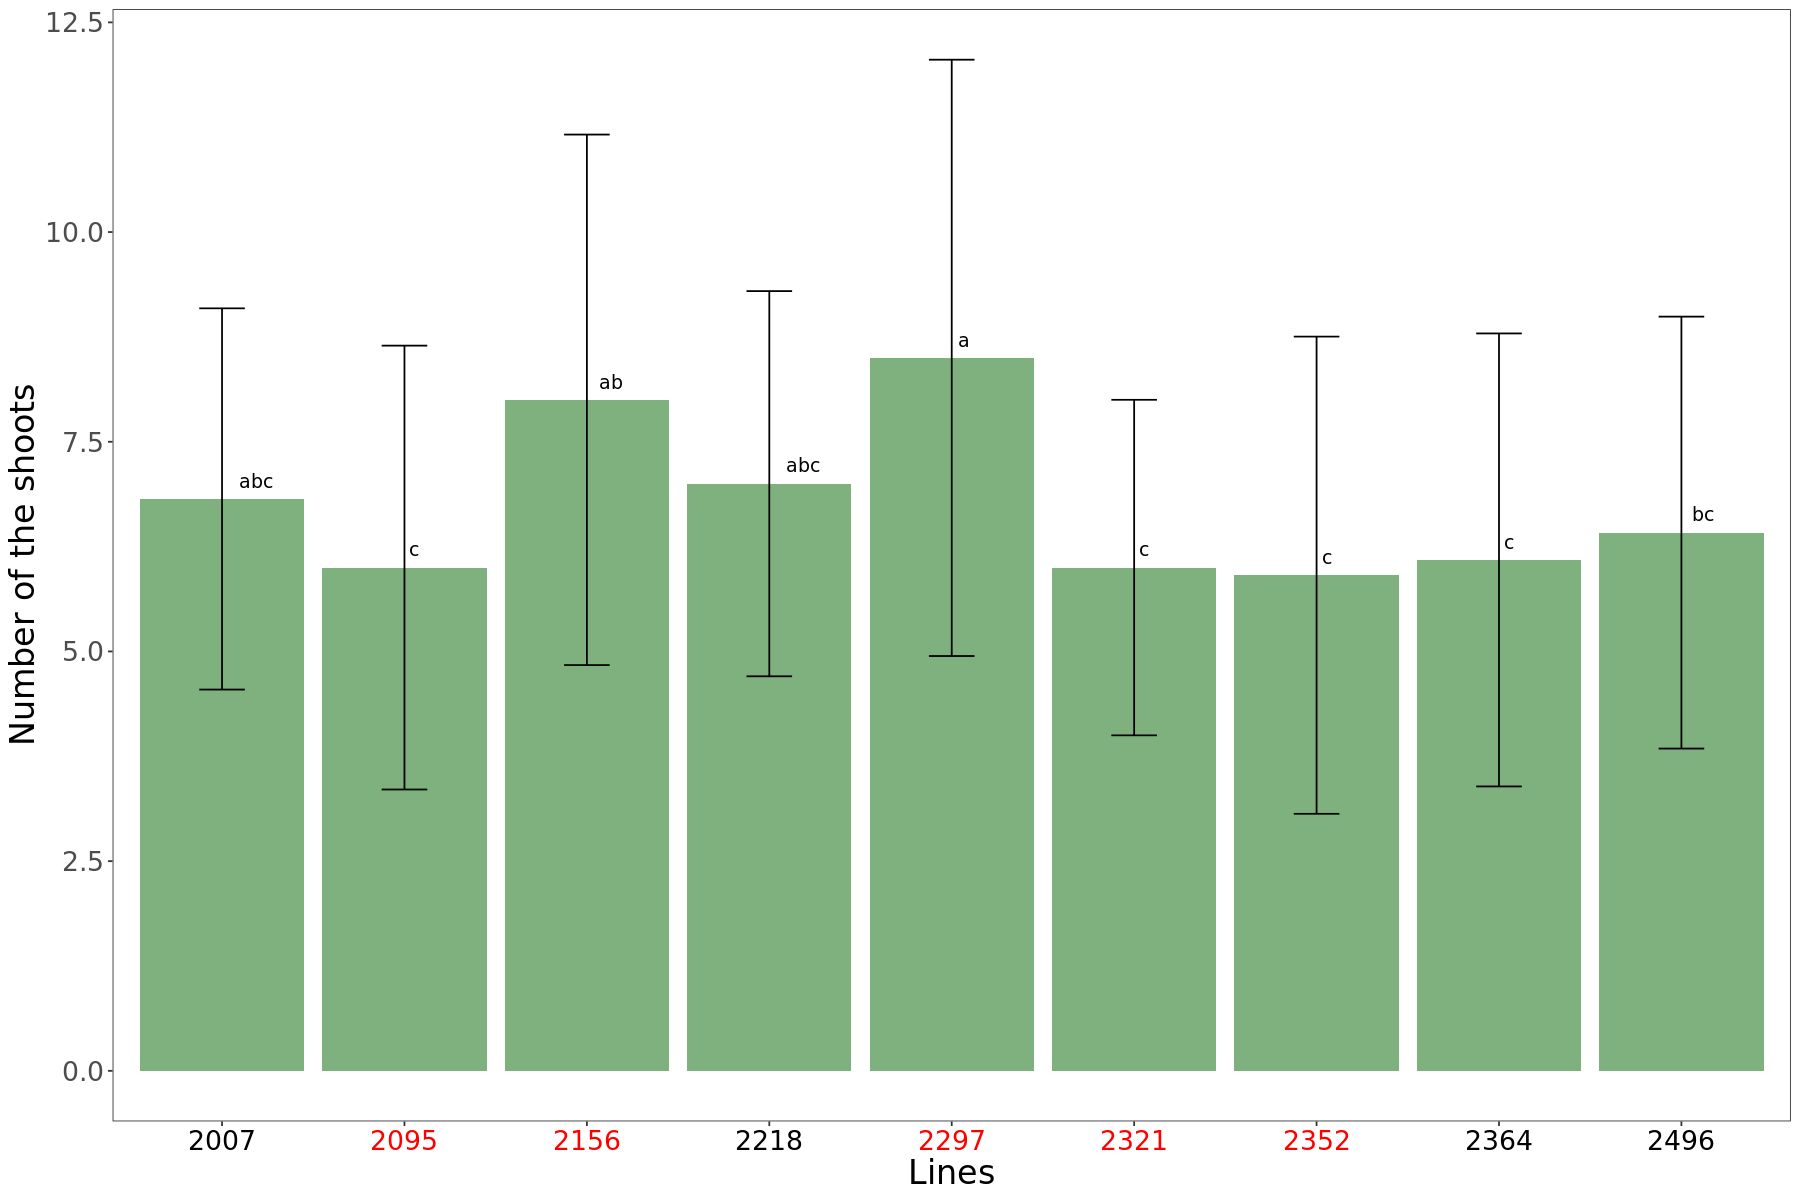

In [299]:
shoots_l$IDs<- as.factor(shoots_l$IDs)
options(repr.plot.width=15,  repr.plot.height=10)
shootsl<- ggplot(data=shoots_l, aes(x =IDs, y = mean), fill=IDs, colour=IDs) + 
  geom_bar(stat = "identity", position = "dodge", alpha=0.5,fill="darkgreen" ) +
  geom_text(aes(label= tukey),position=position_dodge(0.90),  vjust=-0.8, hjust=-0.5, size = 4, colour = "black") +
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), position = position_dodge(0.9), width = 0.25) +
 labs(x="Lines", y="Number of the shoots") +
   theme_bw() +
theme(axis.text.x = element_text(colour=c("black","red","red","black","red","red","red","black","black")))+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
  theme(legend.position = c(0.08, 0.90))+
theme(text = element_text(size = 20))  
print(shootsl)
options(repr.plot.width=24, repr.plot.height=10)

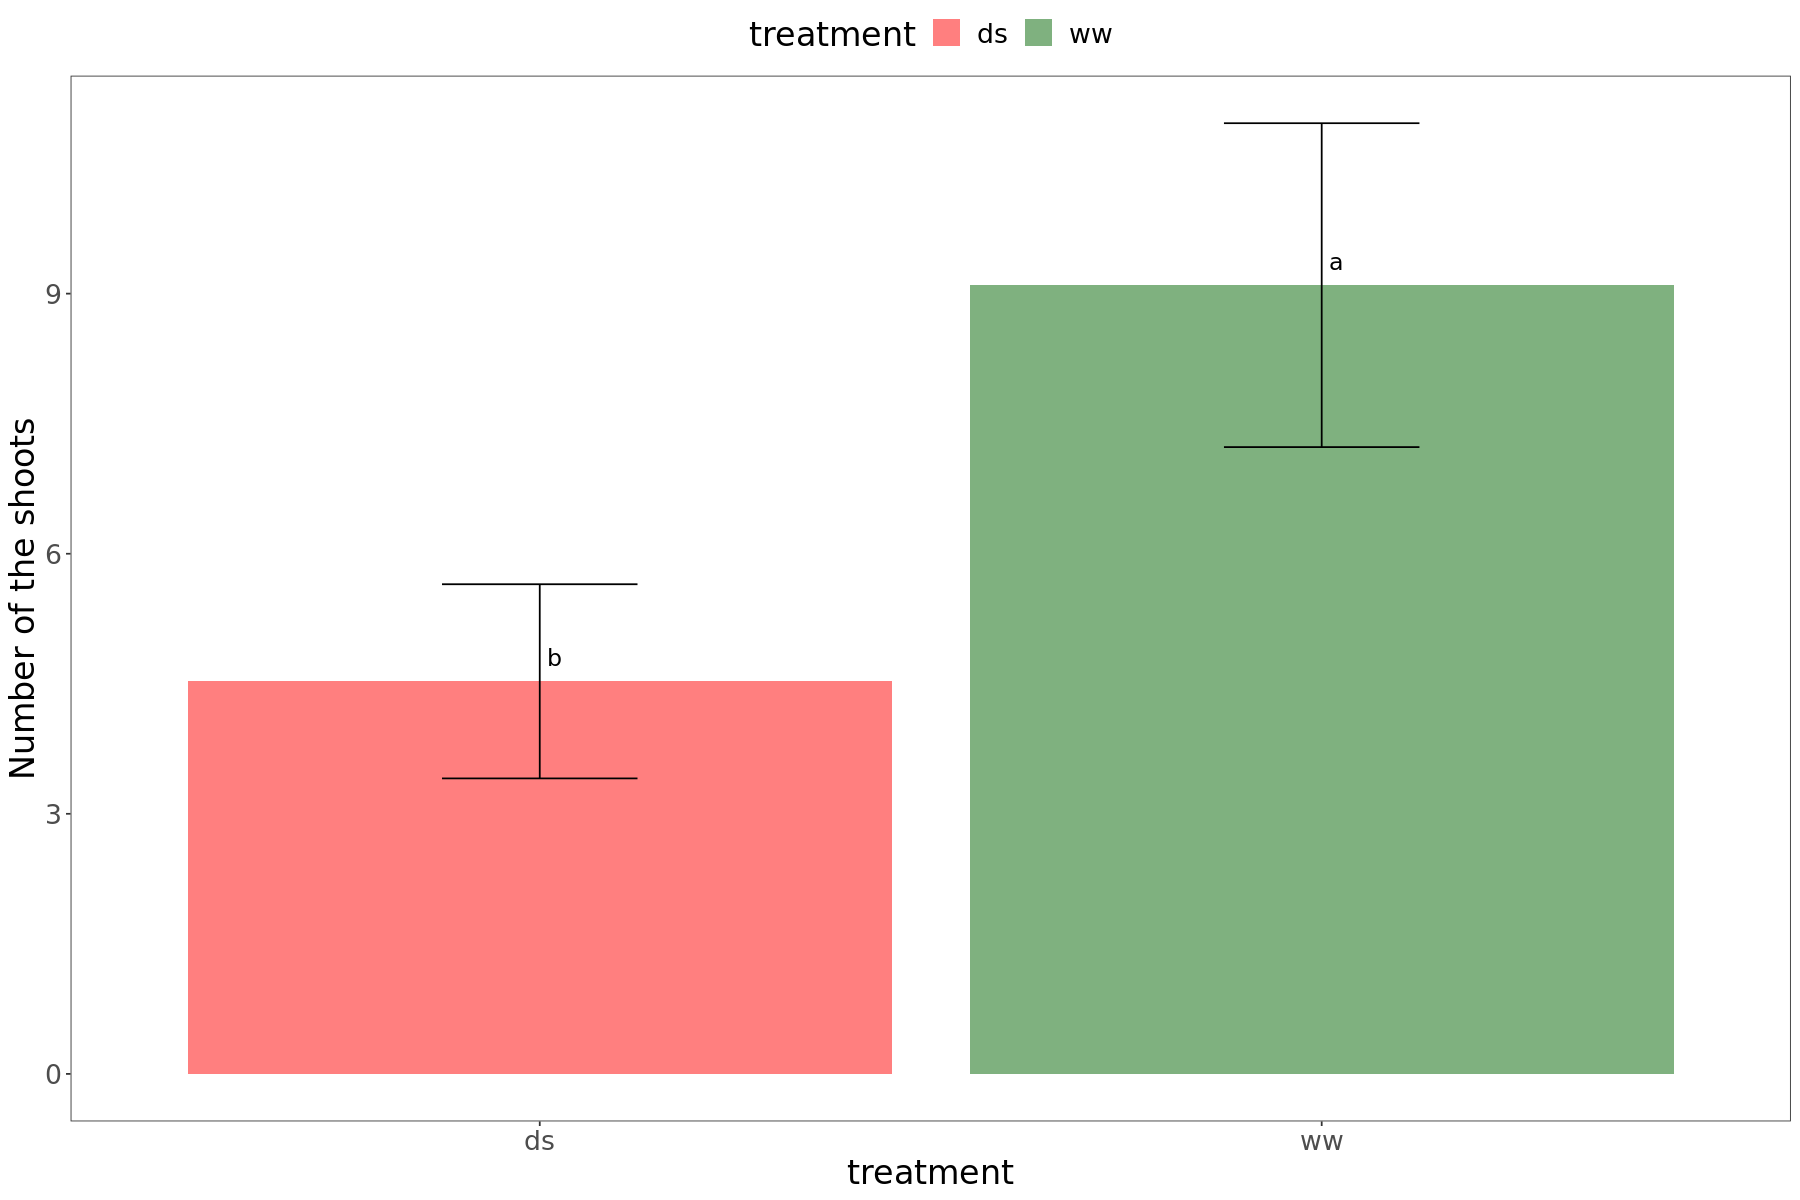

In [309]:
shoots_t$treatment<- as.factor(shoots_t$treatment)
options(repr.plot.width=15,  repr.plot.height=10)
shoots<- ggplot(data=shoots_t, aes(x =treatment, y = mean, fill=treatment)) + 
  geom_bar(stat = "identity", position = "dodge", alpha=0.5 ) +
  geom_text(aes(label= tukey),position=position_dodge(0.90),  vjust=-0.9, hjust=-0.5, size = 5, colour = "black") +
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), position = position_dodge(0.9), width = 0.25) +
 labs(x="treatment", y="Number of the shoots") +
   theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
  #theme(legend.position = c(0.08, 0.90))+
theme(legend.position = "top") +
scale_fill_manual(values=c("red","darkgreen"))+
theme(text = element_text(size = 20))  
print(shoots)
options(repr.plot.width=5, repr.plot.height=7)





# Number of the ears



Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


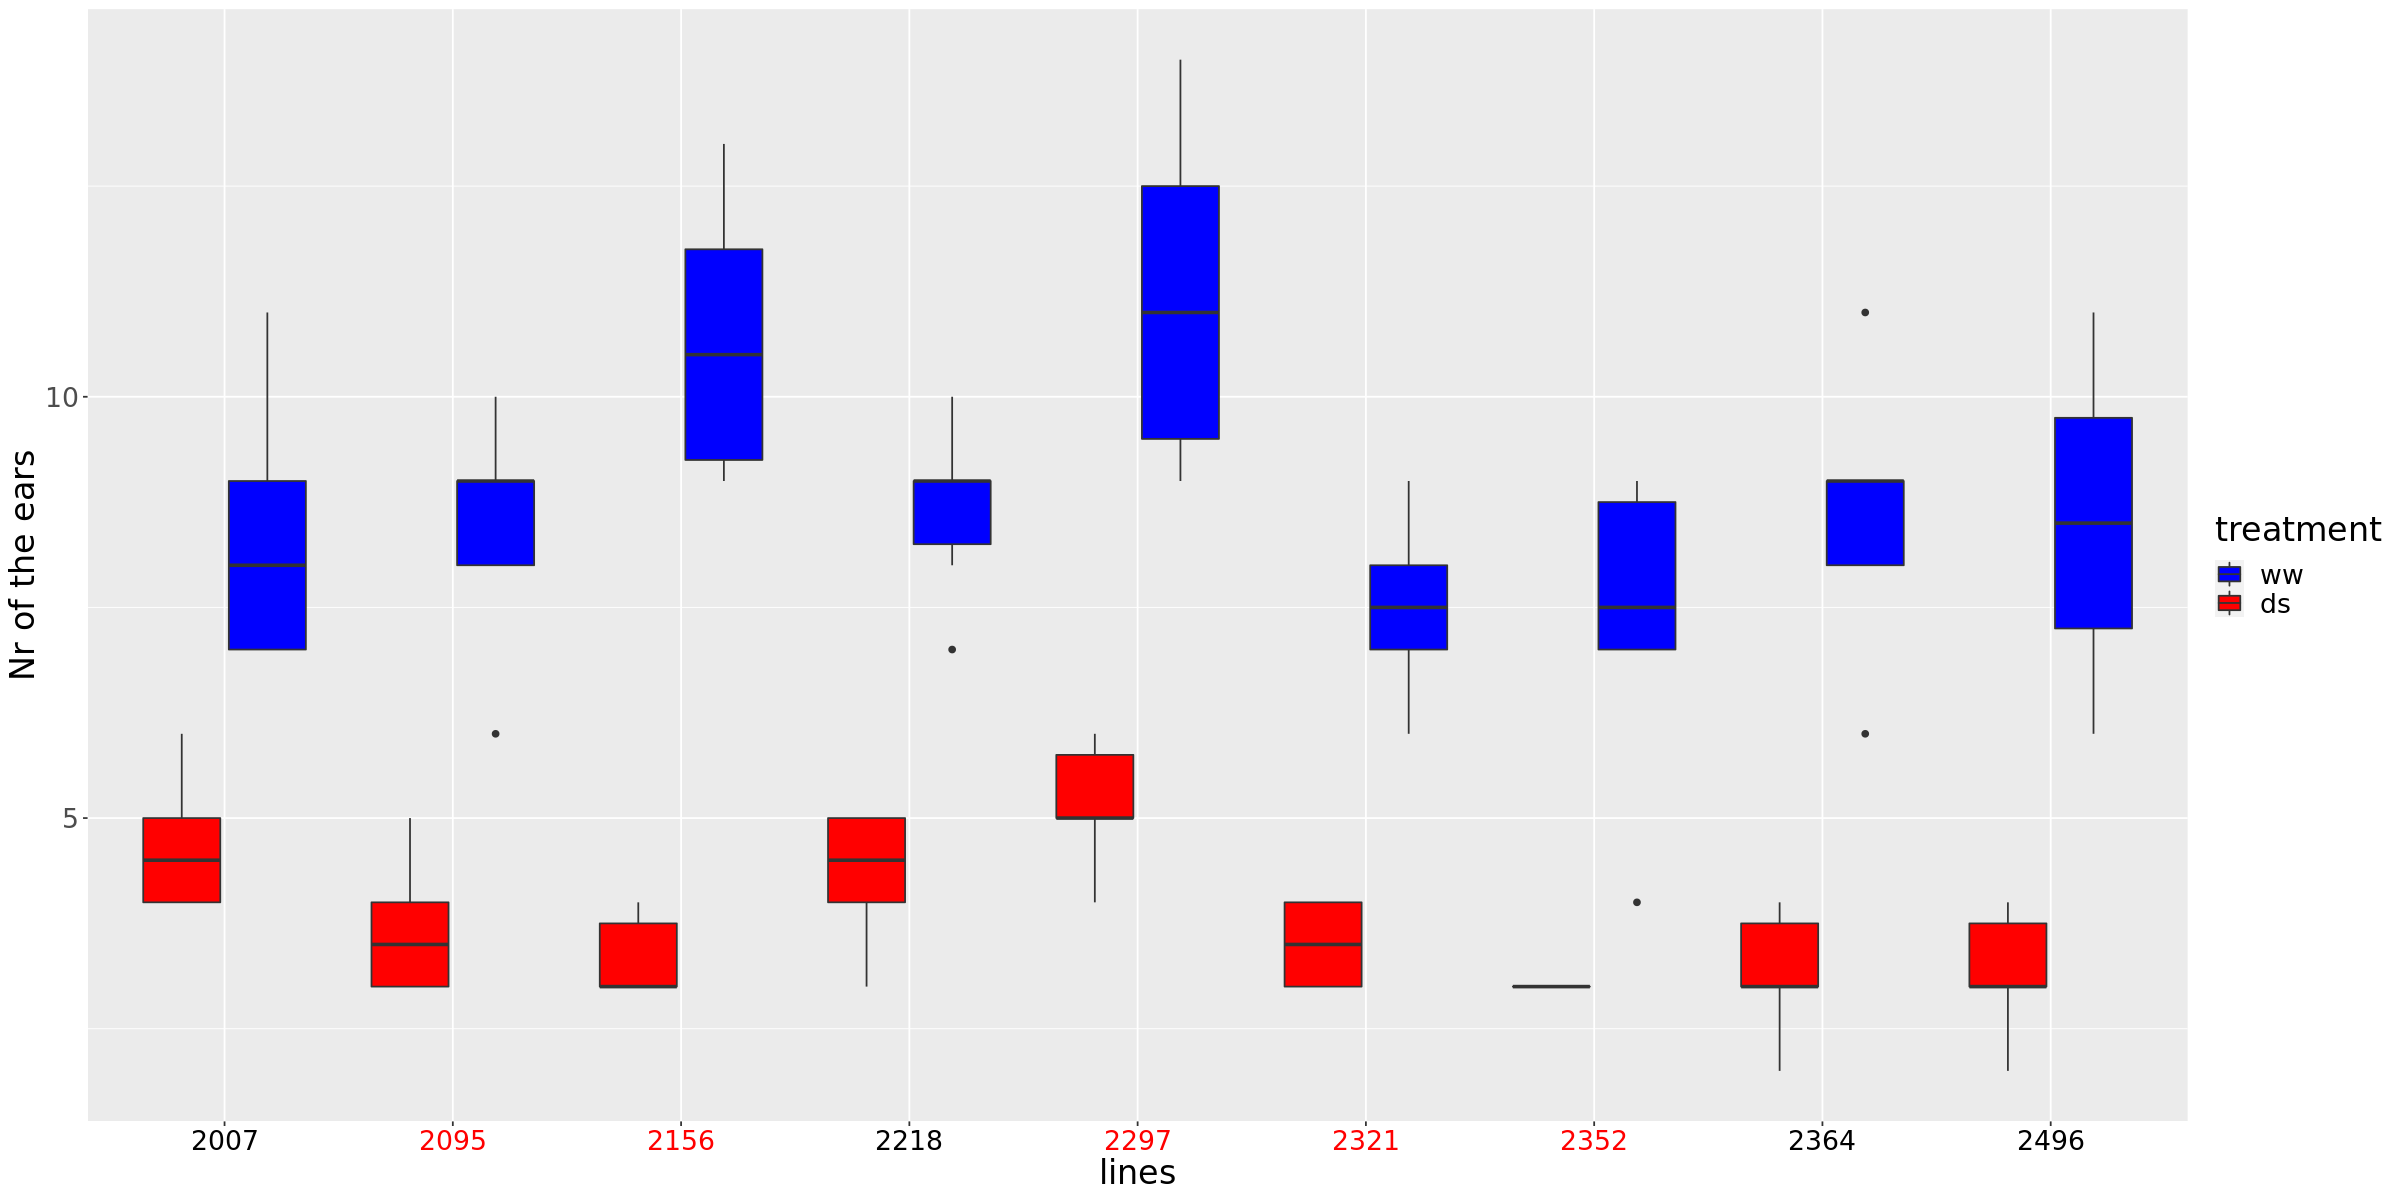

In [77]:
options(repr.plot.width=20, repr.plot.height=10)
p <- ggplot(final.data, aes(x=IDs, y=Nr_ears,  fill=treatment))+
       geom_boxplot()+
       theme(text=element_text(size = 20))+
       scale_fill_manual(breaks = final.data$treatment,
                    values = c("blue", "red")) +
        labs(y="Nr of the ears", x="lines")+
theme(axis.text.x = element_text(colour=c("black","red","red","black","red","red","red","black","black")))



    print(p)

In [241]:
ears_AN<- aov(Nr_ears~treatment*IDs, data=final.data)
summary(ears_AN)

ears_AN_G<- aov(Nr_ears~treatment*Group, data=final.data)
summary(ears_AN_G)

#mood.medtest(Nr_ears~treatment , data = final.data, exact = NULL)

              Df Sum Sq Mean Sq F value   Pr(>F)    
treatment      1  657.9   657.9 419.808  < 2e-16 ***
IDs            8   77.1     9.6   6.152 2.93e-06 ***
treatment:IDs  8   30.2     3.8   2.412   0.0212 *  
Residuals     86  134.8     1.6                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                 Df Sum Sq Mean Sq F value Pr(>F)    
treatment         1  657.9   657.9 275.183 <2e-16 ***
Group             1    1.0     1.0   0.430  0.513    
treatment:Group   1    2.0     2.0   0.852  0.358    
Residuals       100  239.1     2.4                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


	Mood's median test

data:  Nr_ears by treatment
p-value < 2.2e-16


In [15]:
tukey.e<- TukeyHSD(ears_AN, conf.levels=.95)
tukey.cld.ear<- multcompLetters4(ears_AN, tukey.e)
tukey.cld.ear

$treatment
 ww  ds 
"a" "b" 

$IDs
 2297  2156  2218  2007  2496  2095  2364  2321  2352 
  "a"  "ab"  "bc" "abc"  "bc"  "bc"  "bc"  "bc"   "c" 

$`treatment:IDs`
ww:2297 ww:2156 ww:2218 ww:2364 ww:2496 ww:2007 ww:2095 ww:2321 ww:2352 ds:2297 
    "a"    "ab"   "abc"   "abc"    "bc"    "bc"    "bc"    "cd"    "cd"    "de" 
ds:2007 ds:2218 ds:2095 ds:2321 ds:2156 ds:2364 ds:2496 ds:2352 
    "e"     "e"     "e"     "e"     "e"     "e"     "e"     "e" 


In [16]:
tukey.e<- TukeyHSD(ears_AN_G, conf.levels=.95)
tukey.cld.G<- multcompLetters4(ears_AN_G, tukey.e)
tukey.cld.G

LSD_Test<- print(LSD.test(ears_AN_G, c("treatment","Group")))

$treatment
 ww  ds 
"a" "b" 

$Group
$Group$Letters
 Low High 
 "a"  "a" 

$Group$LetterMatrix
        a
Low  TRUE
High TRUE


$`treatment:Group`
 ww:Low ww:High ds:High  ds:Low 
    "a"     "a"     "b"     "b" 


$statistics
   MSerror  Df     Mean      CV
  2.390637 100 6.259615 24.7007

$parameters
        test p.ajusted          name.t ntr alpha
  Fisher-LSD      none treatment:Group   4  0.05

$means
         Nr_ears       std  r      LCL      UCL Min Max  Q25 Q50   Q75
ds:High 3.833333 1.0072203 24 3.207171 4.459495   2   6 3.00   4  4.25
ds:Low  3.758621 0.9507581 29 3.188990 4.328251   3   6 3.00   3  4.00
ww:High 8.545455 1.5032432 22 7.891450 9.199459   6  11 7.25   9  9.00
ww:Low  9.034483 2.2596264 29 8.464852 9.604113   4  14 8.00   9 10.00

$comparison
NULL

$groups
         Nr_ears groups
ww:Low  9.034483      a
ww:High 8.545455      a
ds:High 3.833333      b
ds:Low  3.758621      b

attr(,"class")
[1] "group"


In [17]:
summary_ears<- group_by(final.data, treatment, IDs) %>%
summarise(mean=mean(Nr_ears), sd=sd(Nr_ears)) %>%
arrange(desc(mean))
View(summary_ears)

cld.ears<- as.data.frame.list(tukey.cld.ear$`treatment:IDs`)
summary_ears$tukey<- cld.ears$ Letters
write.table(summary_ears, "summary_ears_Agugust.csv")
View(summary_ears)



summary_ears_Gt<- group_by(final.data, treatment, Group) %>%
summarise(mean=mean(Nr_ears), sd=sd(Nr_ears)) %>%
arrange(desc(mean))
View(summary_ears_Gt)

cld.ears.Gt<- as.data.frame.list(tukey.cld.G$`treatment:Group`)
summary_ears_Gt$tukey<- cld.ears.Gt$ Letters
write.table(summary_ears_Gt, "summary_ears_Gt_Agugust.csv")
View(summary_ears_Gt)

`summarise()` has grouped output by 'treatment'. You can override using the
`.groups` argument.


treatment IDs  mean      sd       
1  ww        2297 11.166667 2.0412415
2  ww        2156 10.666667 1.6329932
3  ww        2218  8.666667 1.0327956
4  ww        2364  8.600000 1.8165902
5  ww        2496  8.500000 1.8708287
6  ww        2007  8.400000 1.6733201
7  ww        2095  8.400000 1.5165751
8  ww        2321  7.500000 1.0488088
9  ww        2352  7.333333 1.8618987
10 ds        2297  5.166667 0.7527727
11 ds        2007  4.666667 0.8164966
12 ds        2218  4.333333 0.8164966
13 ds        2095  3.666667 0.8164966
14 ds        2321  3.500000 0.5477226
15 ds        2156  3.333333 0.5163978
16 ds        2364  3.166667 0.7527727
17 ds        2496  3.166667 0.7527727
18 ds        2352  3.000000 0.0000000

treatment IDs  mean      sd        tukey
1  ww        2297 11.166667 2.0412415 a    
2  ww        2156 10.666667 1.6329932 ab   
3  ww        2218  8.666667 1.0327956 abc  
4  ww        2364  8.600000 1.8165902 abc  
5  ww        2496  8.500000 1.8708287 bc   
6  ww        2007  8.400000 1.6733201 bc   
7  ww        2095  8.400000 1.5165751 bc   
8  ww        2321  7.500000 1.0488088 cd   
9  ww        2352  7.333333 1.8618987 cd   
10 ds        2297  5.166667 0.7527727 de   
11 ds        2007  4.666667 0.8164966 e    
12 ds        2218  4.333333 0.8164966 e    
13 ds        2095  3.666667 0.8164966 e    
14 ds        2321  3.500000 0.5477226 e    
15 ds        2156  3.333333 0.5163978 e    
16 ds        2364  3.166667 0.7527727 e    
17 ds        2496  3.166667 0.7527727 e    
18 ds        2352  3.000000 0.0000000 e

`summarise()` has grouped output by 'treatment'. You can override using the
`.groups` argument.


treatment Group mean     sd       
1 ww        Low   9.034483 2.2596264
2 ww        High  8.545455 1.5032432
3 ds        High  3.833333 1.0072203
4 ds        Low   3.758621 0.9507581

treatment Group mean     sd        tukey
1 ww        Low   9.034483 2.2596264 a    
2 ww        High  8.545455 1.5032432 a    
3 ds        High  3.833333 1.0072203 b    
4 ds        Low   3.758621 0.9507581 b

In [6]:
summary_nr_ears<- read.table("summary_ears_Agugust.csv")
summary_nr_ears$IDs<- as.factor(summary_nr_ears$IDs)
summary_nr_ears$treatment<- as.factor(summary_nr_ears$treatment)

In [22]:
summary_nr_ears_Gt<- read.table("summary_ears_Gt_Agugust.csv")
summary_nr_ears_Gt$Group<- as.factor(summary_nr_ears_Gt$Group)
summary_nr_ears_Gt$treatment<- as.factor(summary_nr_ears_Gt$treatment)
str(summary_nr_ears_Gt)

'data.frame':	4 obs. of  5 variables:
 $ treatment: Factor w/ 2 levels "ds","ww": 2 2 1 1
 $ Group    : Factor w/ 2 levels "High","Low": 2 1 1 2
 $ mean     : num  9.03 8.55 3.83 3.76
 $ sd       : num  2.26 1.503 1.007 0.951
 $ tukey    : chr  "a" "a" "b" "b"


In [7]:
str(summary_nr_ears)

'data.frame':	18 obs. of  5 variables:
 $ treatment: Factor w/ 2 levels "ds","ww": 2 2 2 2 2 2 2 2 2 1 ...
 $ IDs      : Factor w/ 9 levels "2007","2095",..: 5 3 4 8 9 1 2 6 7 5 ...
 $ mean     : num  11.17 10.67 8.67 8.6 8.5 ...
 $ sd       : num  2.04 1.63 1.03 1.82 1.87 ...
 $ tukey    : chr  "a" "ab" "abc" "abc" ...


Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


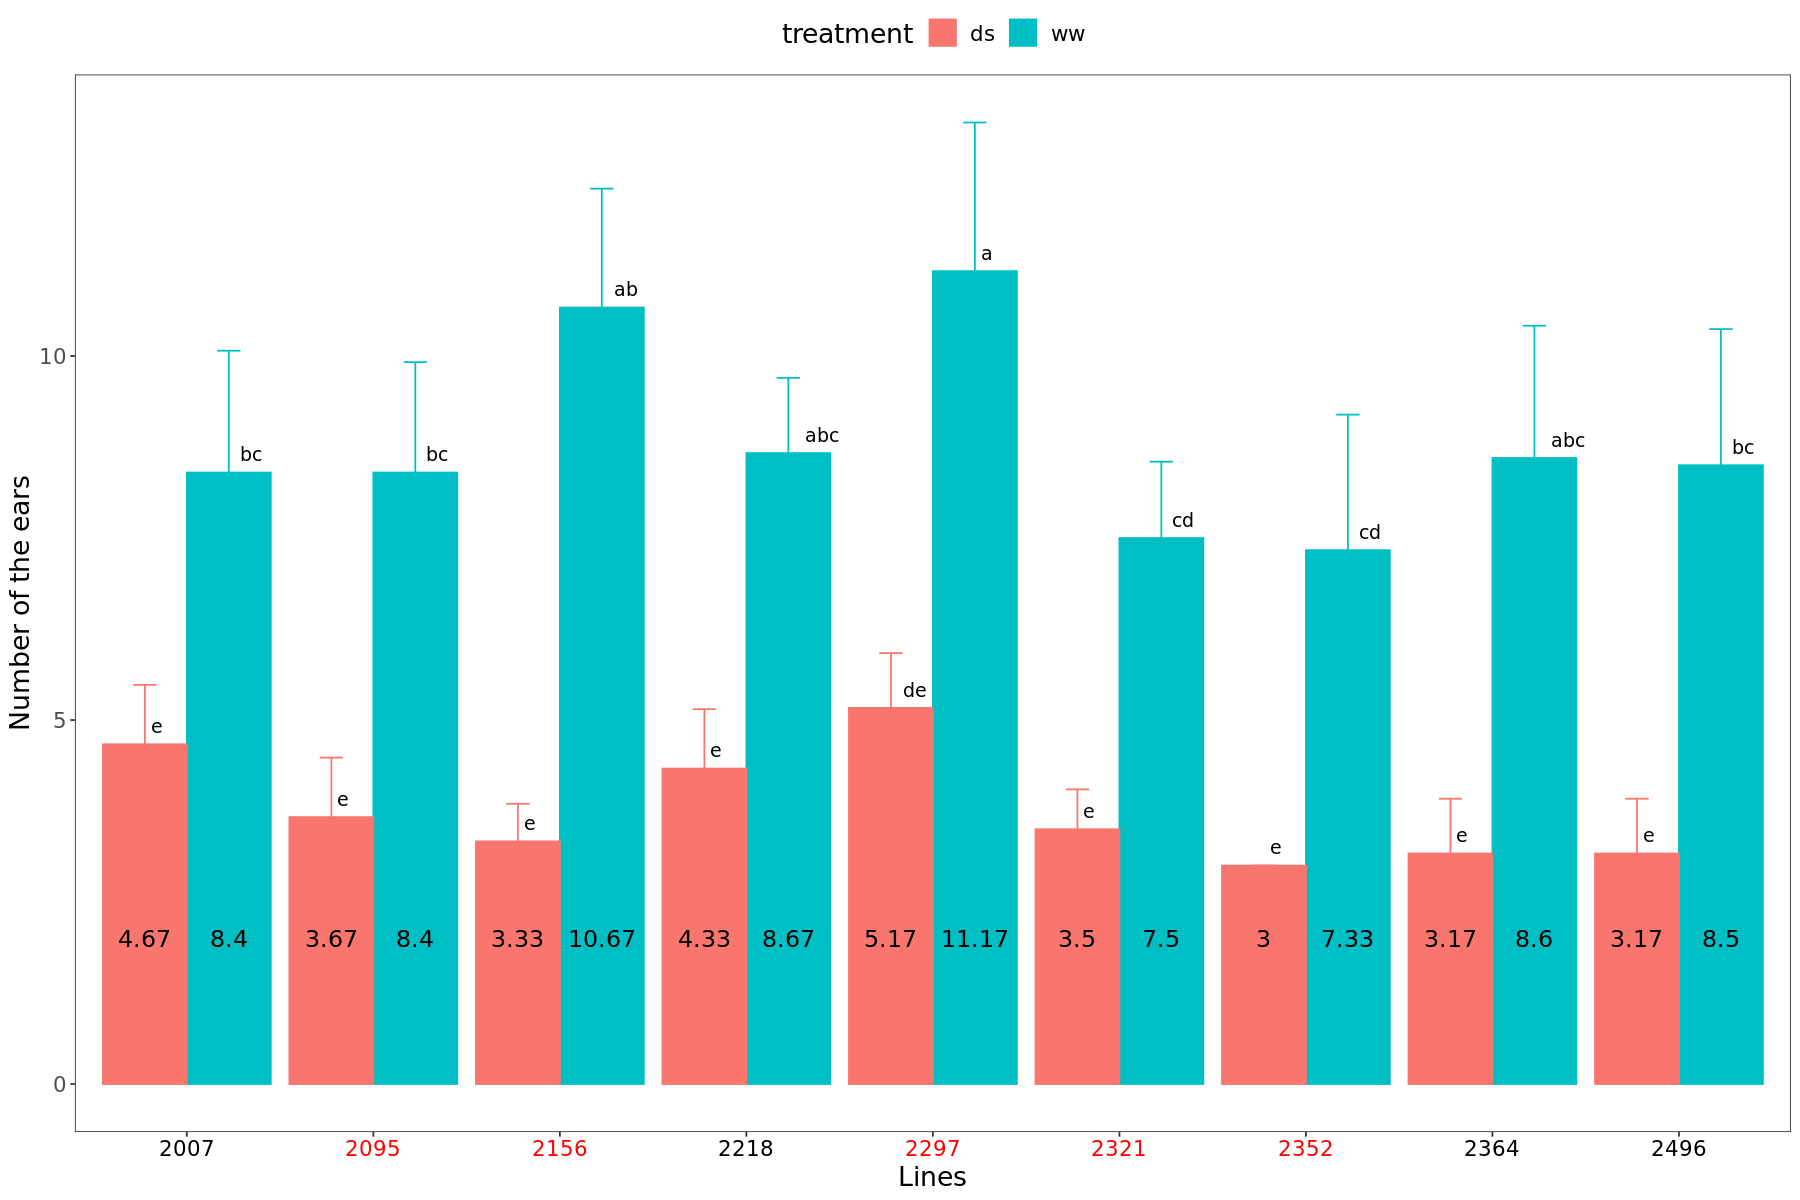

In [ ]:

options(repr.plot.width=15,  repr.plot.height=10)
ears<- ggplot(data=summary_nr_ears, aes(x =IDs, y = mean, fill=treatment, colour=treatment)) + 
  geom_bar(stat = "identity", position = "dodge" ) +
  geom_text(aes(label= tukey),position=position_dodge(0.90),  vjust=-0.8, hjust=-0.5, size = 4, colour = "black") +
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), position = position_dodge(0.9), width = 0.25) +
 labs(x="Lines", y="Number of the ears") +
   theme_bw() +
theme(axis.text.x = element_text(colour=c("black","red","red","black","red","red","red","black","black")))+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
  theme(legend.position = "top")+
theme(text = element_text(size = 16))+
geom_text(aes(label=round(mean,2), y = 2), position = position_dodge(0.90), colour="black", size= 5)
print(ears)





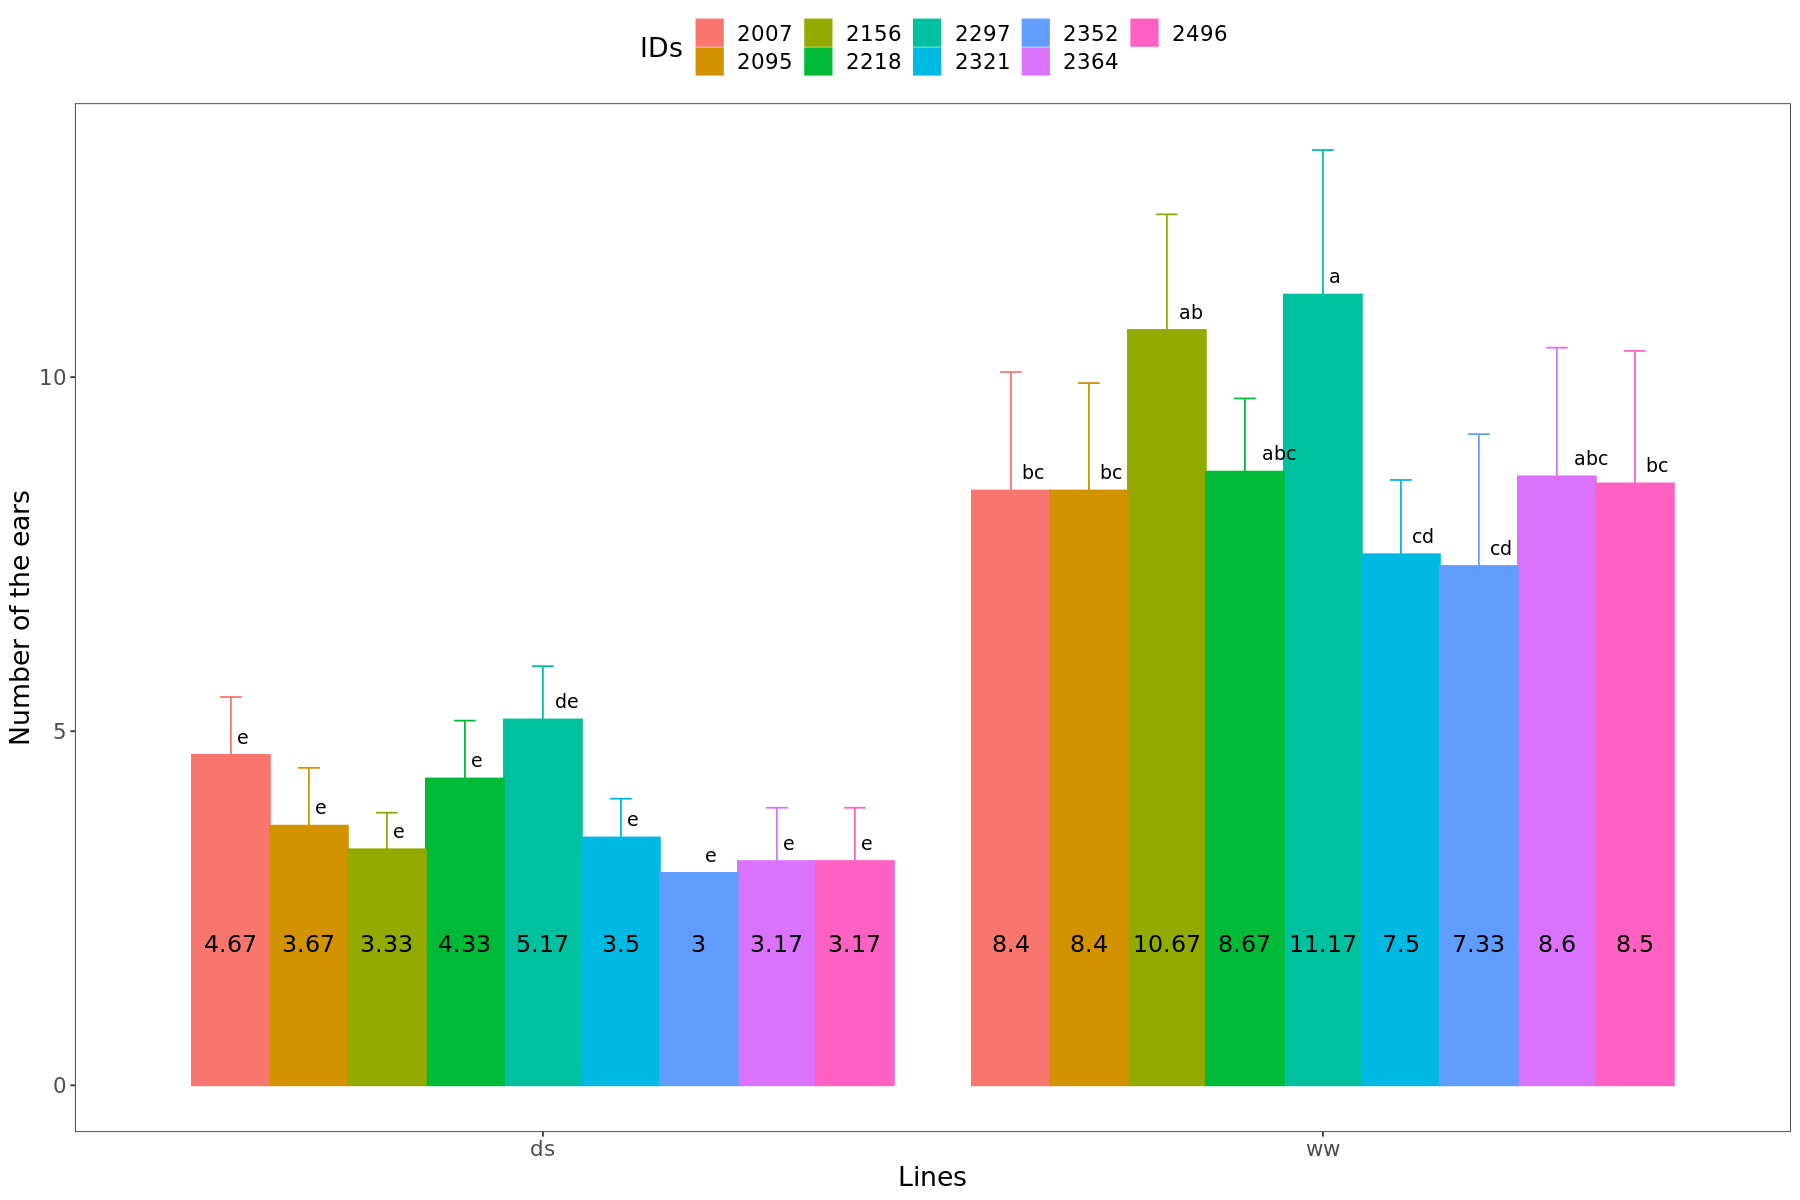

In [12]:
options(repr.plot.width=15,  repr.plot.height=10)
ears<- ggplot(data=summary_nr_ears, aes(x =treatment, y = mean, fill=IDs, colour=IDs)) + 
  geom_bar(stat = "identity", position = "dodge" ) +
  geom_text(aes(label= tukey),position=position_dodge(0.90),  vjust=-0.8, hjust=-0.5, size = 4, colour = "black") +
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), position = position_dodge(0.9), width = 0.25) +
 labs(x="Lines", y="Number of the ears") +
   theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
  theme(legend.position = "top")+
theme(text = element_text(size = 16))+
geom_text(aes(label=round(mean,2), y = 2), position = position_dodge(0.90), colour="black", size= 5)
print(ears)


NULL


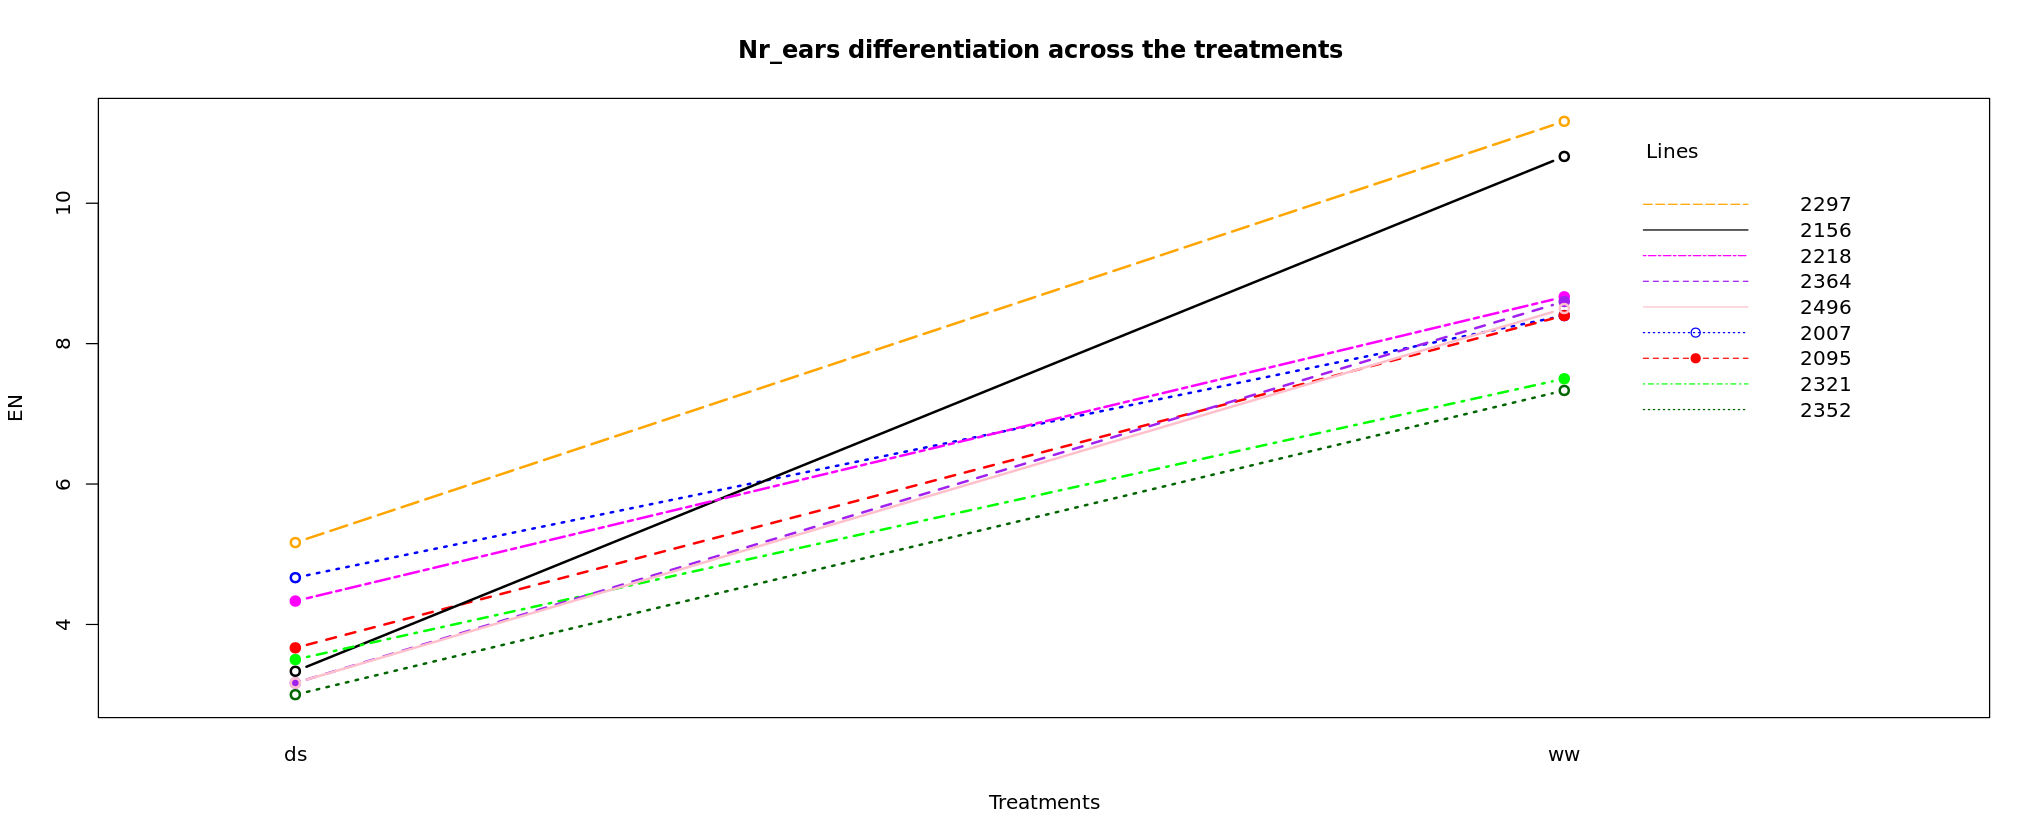

In [62]:

options(repr.plot.width=17, repr.plot.height=7)
earsw_differentiation<- interaction.plot(x.factor = final.data$treatment, trace.factor = final.data$IDs, 
                 response =  final.data$Nr_ears, fun = mean, 
                 type = "b", legend = TRUE, main="Nr_ears differentiation across the treatments ",
                 xlab = "Treatments", ylab="EN", trace.label = "Lines",
                 pch=c(1,19), col = c("blue", "red", "black","magenta", "orange","green",
                                      "dark green", "purple", "pink"),lwd=2) 
print(earsw_differentiation)



NULL


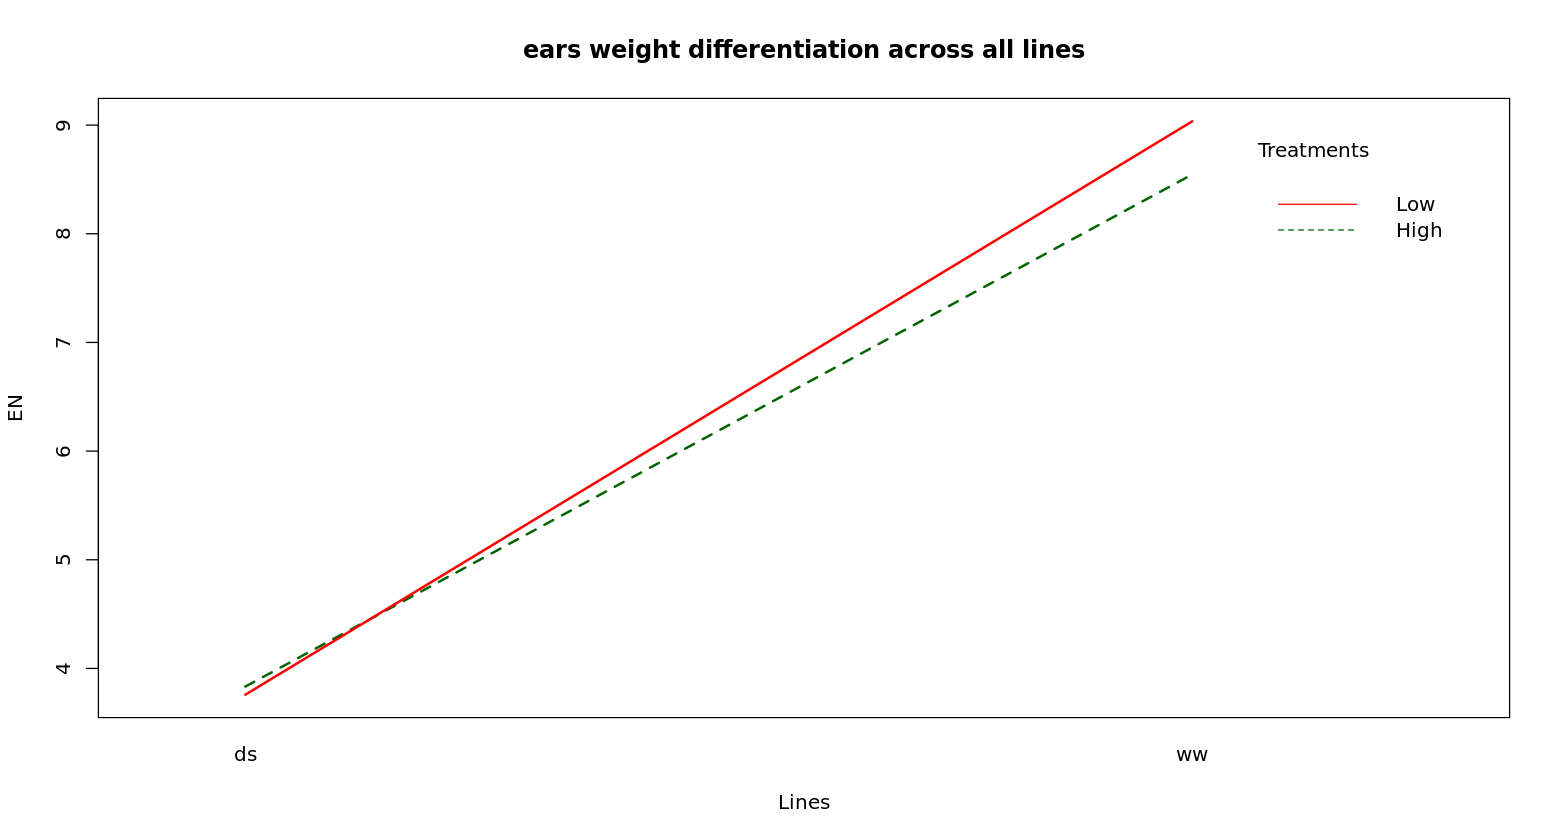

In [68]:
interactions<- interaction.plot(x.factor = final.data$treatment ,trace.factor = final.data$Group, 
                 response = final.data$Nr_ears, fun = mean, 
                 type = "l", legend = TRUE, main="ears weight differentiation across all lines",
                 xlab = "Lines", ylab="EN", trace.label = "Treatments",
                 pch=c(1,19), col = c("darkgreen", "red"), lwd=2)
                 
options(repr.plot.width=13, repr.plot.height=7)
print(interactions)

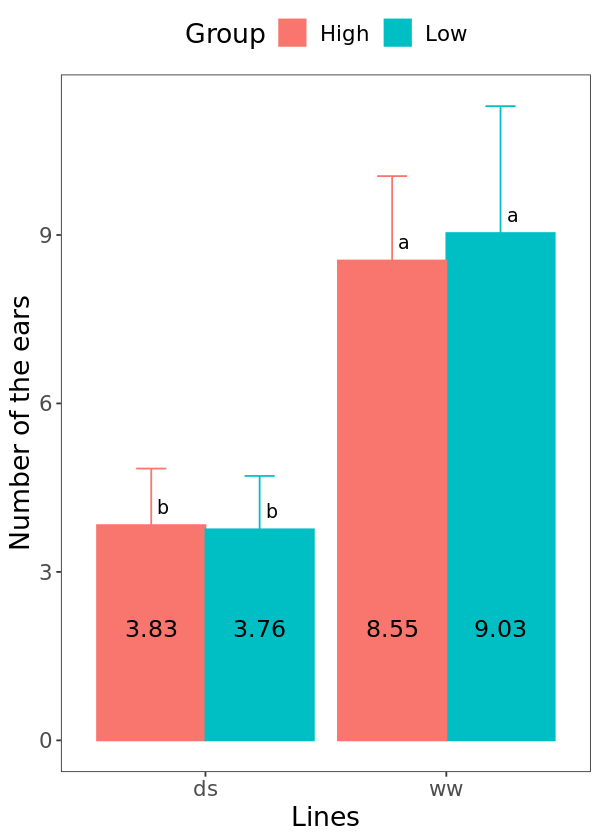

In [42]:
#options(repr.plot.width=15,  repr.plot.height=10)
ears<- ggplot(data=summary_nr_ears_Gt, aes(x =treatment, y = mean, fill=Group, colour=Group)) + 
  geom_bar(stat = "identity", position = "dodge" ) +
  geom_text(aes(label= tukey),position=position_dodge(0.90),  vjust=-0.8, hjust=-0.5, size = 4, colour = "black") +
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), position = position_dodge(0.9), width = 0.25) +
 labs(x="Lines", y="Number of the ears") +
   theme_bw() +

  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
  theme(legend.position = "top")+
theme(text = element_text(size = 16))+
geom_text(aes(label=round(mean,2), y = 2), position = position_dodge(0.90), colour="black", size= 5)
print(ears)

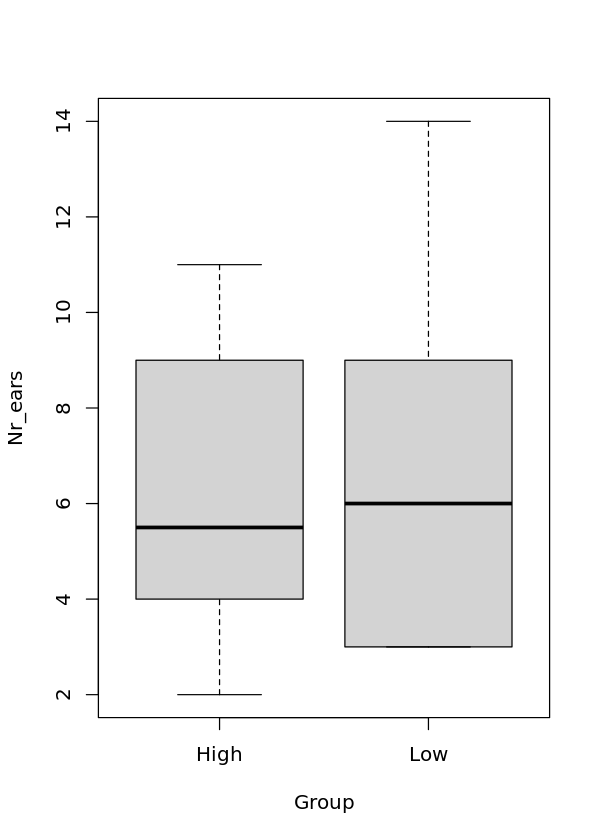

In [43]:
boxplot(Nr_ears~Group, data=final.data)

# weight of the ears

In [369]:
str(final.data)

'data.frame':	104 obs. of  21 variables:
 $ experiment        : chr  "V22001" "V22001" "V22001" "V22001" ...
 $ IDs               : Factor w/ 9 levels "2007","2095",..: 4 4 3 5 4 7 3 4 8 7 ...
 $ treatment         : Factor w/ 2 levels "ds","ww": 2 1 1 1 2 1 1 2 1 1 ...
 $ BBCH              : chr  "92" "92" "92" "92" ...
 $ Collection.date   : chr  "08/12/22" "08/08/22" "08/09/22" "08/08/22" ...
 $ max.Height        : num  91.2 78 83 61 102 ...
 $ Biomass           : num  14.75 4.72 7.76 5.61 14.3 ...
 $ Shoots            : num  10 5 4 7 9 3 5 9 4 3 ...
 $ Shoots_with_ear   : num  10 5 3 6 9 3.5 4 9 2 3 ...
 $ Shoots_without_ear: num  0 0 1 1 0 0 1 0 2 0 ...
 $ Nr_ears           : num  10 5 3 6 9 3 4 9 2 3 ...
 $ Full_ear          : num  10 3 1 5 9 3 4 9 2 3 ...
 $ Half_ear          : num  0 2 0 1 0 0 0 0 0 0 ...
 $ Weight_ear        : num  15.43 3.55 1.21 3.36 10.65 ...
 $ Nr_seeds          : num  282 67 29 68 214 60 68 229 44 83 ...
 $ Mature_seeds      : num  282 66 29 65 209 60 68 2

In [38]:
weight_ear_AN<- aov(Weight_ear~treatment*IDs, data=final.data)
summary(weight_ear_AN)


weight_ear_AN_G<- aov(Weight_ear~treatment*Group, data=final.data)
summary(weight_ear_AN_G)
#mood.medtest(Weight_ear~Group, data=final.data, exact=TRUE)
mood.medtest(Weight_ear~Group,
             data  = final.data,
             exact = FALSE)

              Df Sum Sq Mean Sq F value   Pr(>F)    
treatment      1 1547.2  1547.2 798.183  < 2e-16 ***
IDs            8   86.8    10.9   5.599 1.03e-05 ***
treatment:IDs  8   53.8     6.7   3.469  0.00164 ** 
Residuals     86  166.7     1.9                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                 Df Sum Sq Mean Sq F value Pr(>F)    
treatment         1 1547.2  1547.2 516.886 <2e-16 ***
Group             1    4.1     4.1   1.370  0.245    
treatment:Group   1    3.9     3.9   1.299  0.257    
Residuals       100  299.3     3.0                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


	Mood's median test

data:  Weight_ear by Group
X-squared = 0.038981, df = 1, p-value = 0.8435


In [90]:
tukey.we<- TukeyHSD(weight_ear_AN, conf.levels=.95)
tukey.cld.ear<- multcompLetters4(weight_ear_AN, tukey.we)
tukey.cld.ear



tukey.we.G <- TukeyHSD(weight_ear_AN_G, conf.levels=.95)
tukey.cld.ear.G <- multcompLetters4(weight_ear_AN_G, tukey.we.G)
tukey.cld.ear.G



LSD_Test<- print(LSD.test(weight_ear_AN_G, c("treatment","Group")))

$treatment
 ww  ds 
"a" "b" 

$IDs
  2297   2218   2321   2364   2095   2007   2496   2352   2156 
   "a"   "ab"  "abc"   "ab" "abcd" "abcd"  "bcd"   "cd"    "d" 

$`treatment:IDs`
ww:2364 ww:2297 ww:2218 ww:2095 ww:2321 ww:2007 ww:2496 ww:2156 ww:2352 ds:2321 
    "a"     "a"    "ab"   "abc"   "abc"   "abc"    "bc"    "bc"     "c"     "d" 
ds:2218 ds:2007 ds:2095 ds:2297 ds:2352 ds:2496 ds:2364 ds:2156 
    "d"     "d"     "d"     "d"     "d"     "d"     "d"     "d" 


$treatment
 ww  ds 
"a" "b" 

$Group
$Group$Letters
High  Low 
 "a"  "a" 

$Group$LetterMatrix
        a
High TRUE
Low  TRUE


$`treatment:Group`
ww:High  ww:Low ds:High  ds:Low 
    "a"     "a"     "b"     "b" 


$statistics
   MSerror  Df     Mean       CV
  2.993336 100 7.096058 24.38151

$parameters
        test p.ajusted          name.t ntr alpha
  Fisher-LSD      none treatment:Group   4  0.05

$means
        Weight_ear      std  r       LCL       UCL  Min   Max   Q25    Q50
ds:High   3.323333 1.049495 24  2.622673  4.023994 1.13  5.70 2.930  3.205
ds:Low    3.303448 1.009732 29  2.666045  3.940851 0.36  4.72 3.050  3.520
ww:High  11.482273 2.351548 22 10.750457 12.214089 6.02 15.68 9.945 11.265
ww:Low   10.683448 2.149148 29 10.046045 11.320851 3.84 13.85 9.570 10.790
           Q75
ds:High  3.990
ds:Low   3.830
ww:High 12.795
ww:Low  12.390

$comparison
NULL

$groups
        Weight_ear groups
ww:High  11.482273      a
ww:Low   10.683448      a
ds:High   3.323333      b
ds:Low    3.303448      b

attr(,"class")
[1] "group"


In [27]:
summary_ear_weight<- group_by(final.data, treatment, IDs) %>%
summarise(mean=mean(Weight_ear), sd=sd(Weight_ear)) %>%
arrange(desc(mean))
View(summary_ear_weight)

cld_ear<- as.data.frame.list(tukey.cld.ear$`treatment:IDs`)
summary_ear_weight$tukey<- cld_ear$Letters
View(summary_ear_weight)
write.table(summary_ear_weight, "summayr_ear.weight_August.csv")

`summarise()` has grouped output by 'treatment'. You can override using the
`.groups` argument.


treatment IDs  mean      sd       
1  ww        2364 13.422000 2.2585659
2  ww        2297 12.836667 1.1051274
3  ww        2218 12.025000 2.0924316
4  ww        2095 11.182000 1.8270660
5  ww        2321 11.118333 1.4342164
6  ww        2007 11.016000 0.8787946
7  ww        2496  9.711667 2.4602066
8  ww        2156  9.660000 0.9093294
9  ww        2352  8.703333 2.6624625
10 ds        2321  4.250000 0.4733709
11 ds        2218  4.155000 0.9954647
12 ds        2007  3.785000 0.5674064
13 ds        2095  3.658333 0.2652106
14 ds        2297  3.626667 0.4277694
15 ds        2352  3.218000 0.4443197
16 ds        2496  2.865000 0.2363684
17 ds        2364  2.488333 1.2342353
18 ds        2156  1.750000 0.9052072

treatment IDs  mean      sd        tukey
1  ww        2364 13.422000 2.2585659 a    
2  ww        2297 12.836667 1.1051274 a    
3  ww        2218 12.025000 2.0924316 ab   
4  ww        2095 11.182000 1.8270660 abc  
5  ww        2321 11.118333 1.4342164 abc  
6  ww        2007 11.016000 0.8787946 abc  
7  ww        2496  9.711667 2.4602066 bc   
8  ww        2156  9.660000 0.9093294 bc   
9  ww        2352  8.703333 2.6624625 c    
10 ds        2321  4.250000 0.4733709 d    
11 ds        2218  4.155000 0.9954647 d    
12 ds        2007  3.785000 0.5674064 d    
13 ds        2095  3.658333 0.2652106 d    
14 ds        2297  3.626667 0.4277694 d    
15 ds        2352  3.218000 0.4443197 d    
16 ds        2496  2.865000 0.2363684 d    
17 ds        2364  2.488333 1.2342353 d    
18 ds        2156  1.750000 0.9052072 d

In [28]:
ear_weight<- read.table( "summayr_ear.weight_August.csv")
ear_weight$IDs <- as.factor(ear_weight$IDs )
ear_weight$treatment <- as.factor(ear_weight$treatment)
str(ear_weight)


'data.frame':	18 obs. of  5 variables:
 $ treatment: Factor w/ 2 levels "ds","ww": 2 2 2 2 2 2 2 2 2 1 ...
 $ IDs      : Factor w/ 9 levels "2007","2095",..: 8 5 4 2 6 1 9 3 7 6 ...
 $ mean     : num  13.4 12.8 12 11.2 11.1 ...
 $ sd       : num  2.26 1.11 2.09 1.83 1.43 ...
 $ tukey    : chr  "a" "a" "ab" "abc" ...


Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


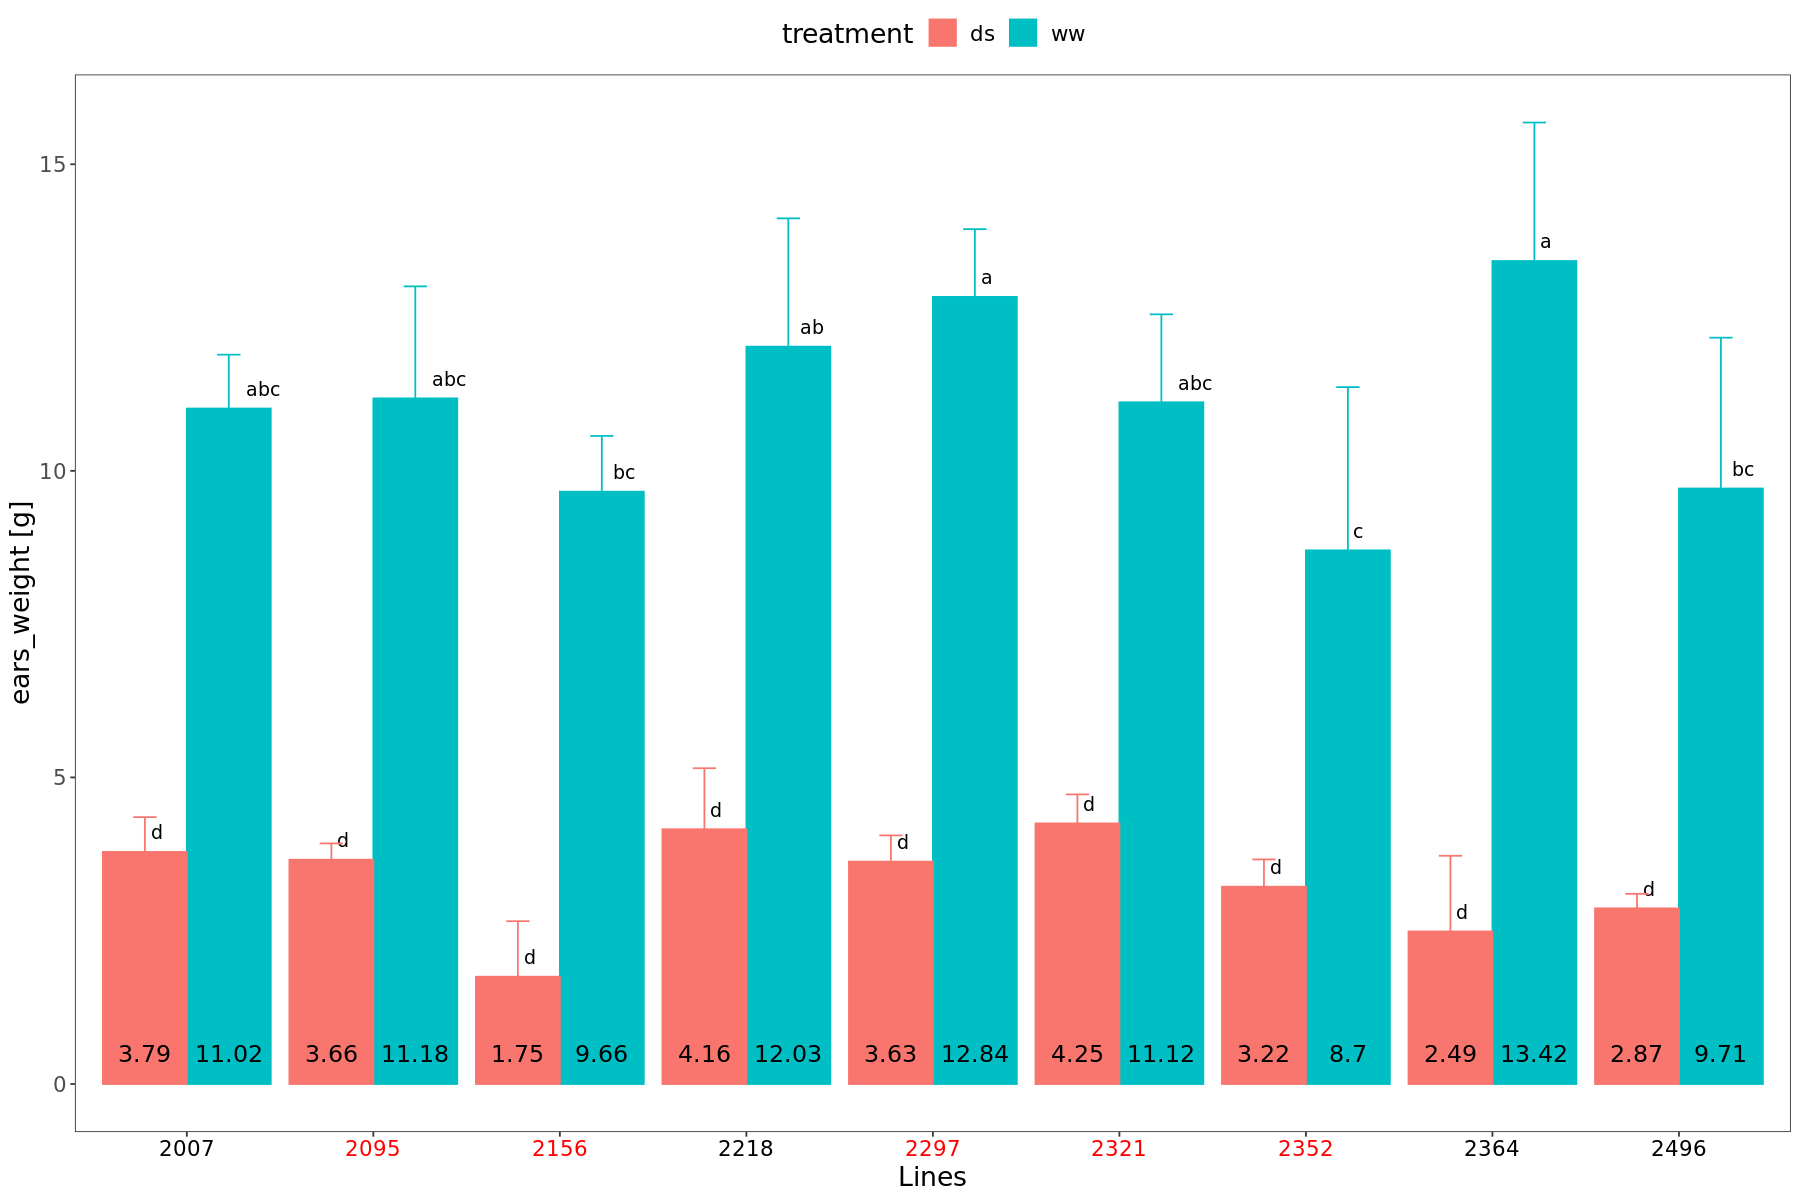

In [45]:
options(repr.plot.width=15,  repr.plot.height=10)
ears<- ggplot(data=ear_weight, aes(x =IDs, y = mean, fill=treatment, colour=treatment)) + 
  geom_bar(stat = "identity", position = "dodge" ) +
  geom_text(aes(label= tukey),position=position_dodge(0.90),  vjust=-0.9, hjust=-0.5, size = 4, colour = "black") +
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), position = position_dodge(0.9), width = 0.25) +
 labs(x="Lines", y="ears_weight [g]") +
   theme_bw() +
theme(axis.text.x = element_text(colour=c("black","red","red","black","red","red","red","black","black")))+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
  theme(legend.position = "top")+
theme(text = element_text(size = 16))+
geom_text(aes(label=round(mean,2), y = .5), position = position_dodge(0.90), colour="black", size= 5)
print(ears)



NULL


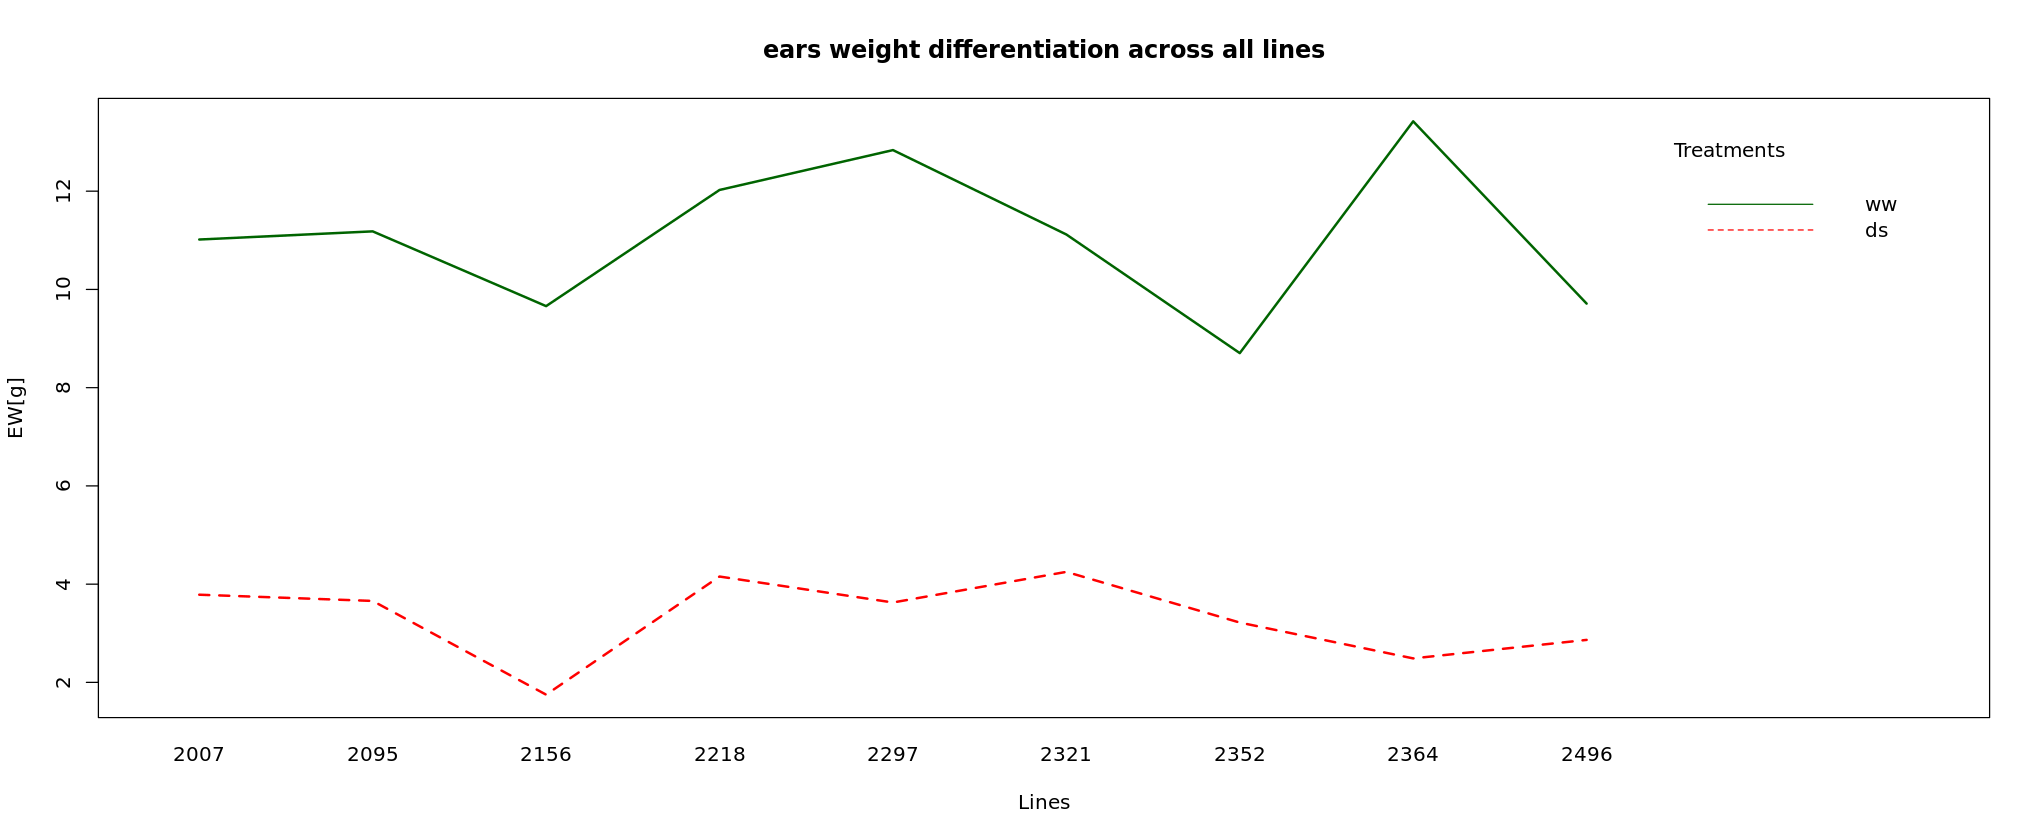

In [58]:
interactions<- interaction.plot(x.factor = final.data$IDs, trace.factor = final.data$treatment, 
                 response = final.data$Weight_ear, fun = mean, 
                 type = "l", legend = TRUE, main="ears weight differentiation across all lines",
                 xlab = "Lines", ylab="EW[g]", trace.label = "Treatments",
                 pch=c(1,19), col = c("red", "darkgreen"), lwd=2)
                 
options(repr.plot.width=13, repr.plot.height=7)
print(interactions)

NULL


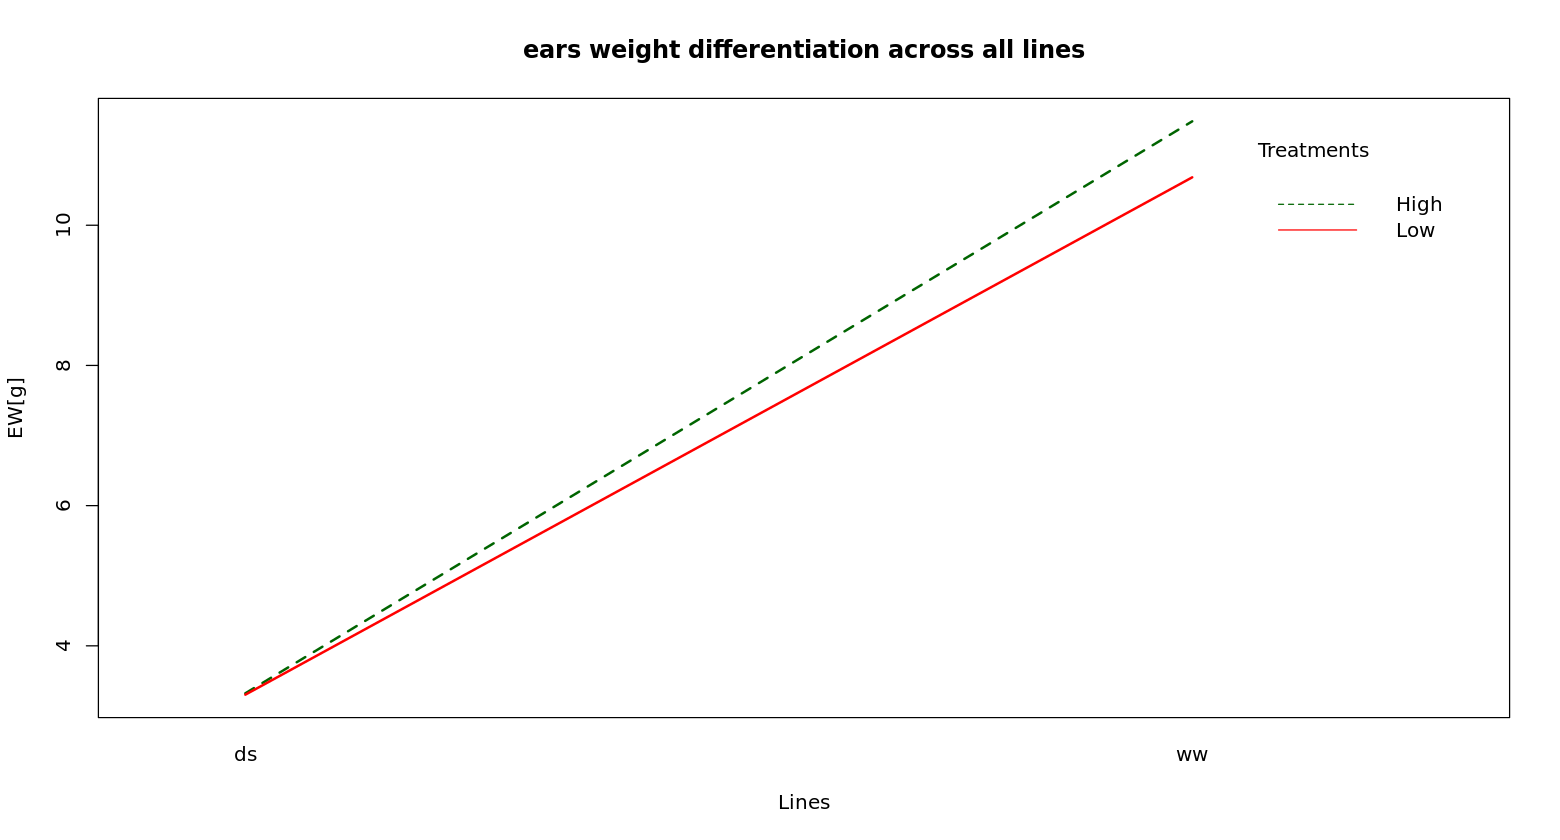

In [70]:
interactions<- interaction.plot(x.factor = final.data$treatment, trace.factor = final.data$Group, 
                 response = final.data$Weight_ear, fun = mean, 
                 type = "l", legend = TRUE, main="ears weight differentiation across all lines",
                 xlab = "Lines", ylab="EW[g]", trace.label = "Treatments",
                 pch=c(1,19), col = c("darkgreen", "red"), lwd=2)
                 
options(repr.plot.width=13, repr.plot.height=7)
print(interactions)

NULL


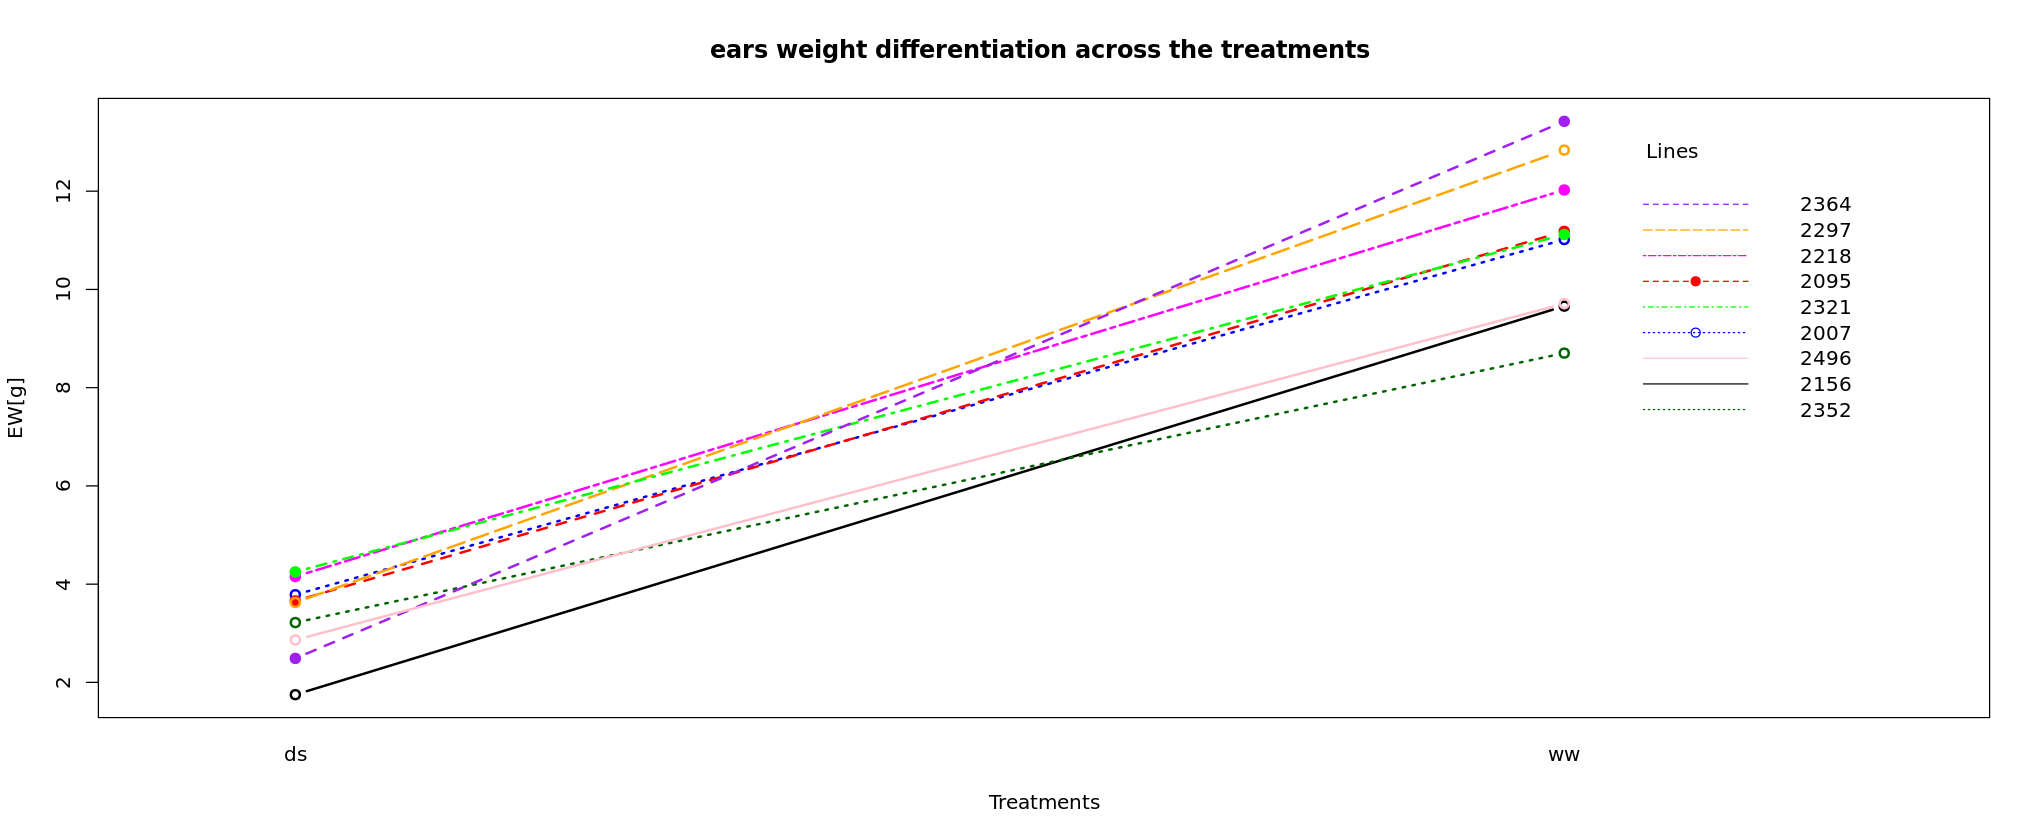

In [59]:
options(repr.plot.width=17, repr.plot.height=7)
earsw_differentiation<- interaction.plot(x.factor = final.data$treatment, trace.factor = final.data$IDs, 
                 response =  final.data$Weight_ear, fun = mean, 
                 type = "b", legend = TRUE, main="ears weight differentiation across the treatments ",
                 xlab = "Treatments", ylab="EW[g]", trace.label = "Lines",
                 pch=c(1,19), col = c("blue", "red", "black","magenta", "orange","green",
                                      "dark green", "purple", "pink"),lwd=2) 
print(earsw_differentiation)


In [38]:
summary_ear_weight_Gt<- group_by(final.data, treatment, Group) %>%
summarise(mean=mean(Weight_ear), sd=sd(Weight_ear)) %>%
arrange(desc(mean))


cld_ear_Gt<- as.data.frame.list(tukey.cld.ear.G$`treatment:Group`)
summary_ear_weight_Gt$tukey <- cld_ear_Gt$Letters
View(summary_ear_weight_Gt)
write.table(summary_ear_weight_Gt, "summayr_ear.weight_Gt_August.csv")



summary_ear_weight_G<- group_by(final.data, Group) %>%
summarise(mean=mean(Weight_ear), sd=sd(Weight_ear)) %>%
arrange(desc(mean))


cld_ear_G<- as.data.frame.list(tukey.cld.ear.G$`Group`)
summary_ear_weight_G$tukey <- cld_ear_G$Letters
View(summary_ear_weight_G)
write.table(summary_ear_weight_G, "summayr_ear.weight_G_August.csv")



`summarise()` has grouped output by 'treatment'. You can override using the
`.groups` argument.


treatment Group mean      sd       tukey
1 ww        High  11.482273 2.351548 a    
2 ww        Low   10.683448 2.149148 a    
3 ds        High   3.323333 1.049495 b    
4 ds        Low    3.303448 1.009732 b

Group mean     sd       tukey
1 High  7.225435 4.485896 a    
2 Low   6.993448 4.077342 a

In [31]:
summary_EW_Gt<- read.table("summayr_ear.weight_Gt_August.csv")

summary_EW_Gt$Group <- as.factor(summary_EW_Gt$Group)
summary_EW_Gt$treatment <- as.factor(summary_EW_Gt$treatment)
str(summary_EW_Gt)

'data.frame':	4 obs. of  5 variables:
 $ treatment: Factor w/ 2 levels "ds","ww": 2 2 1 1
 $ Group    : Factor w/ 2 levels "High","Low": 1 2 1 2
 $ mean     : num  11.48 10.68 3.32 3.3
 $ sd       : num  2.35 2.15 1.05 1.01
 $ tukey    : chr  "a" "a" "b" "b"


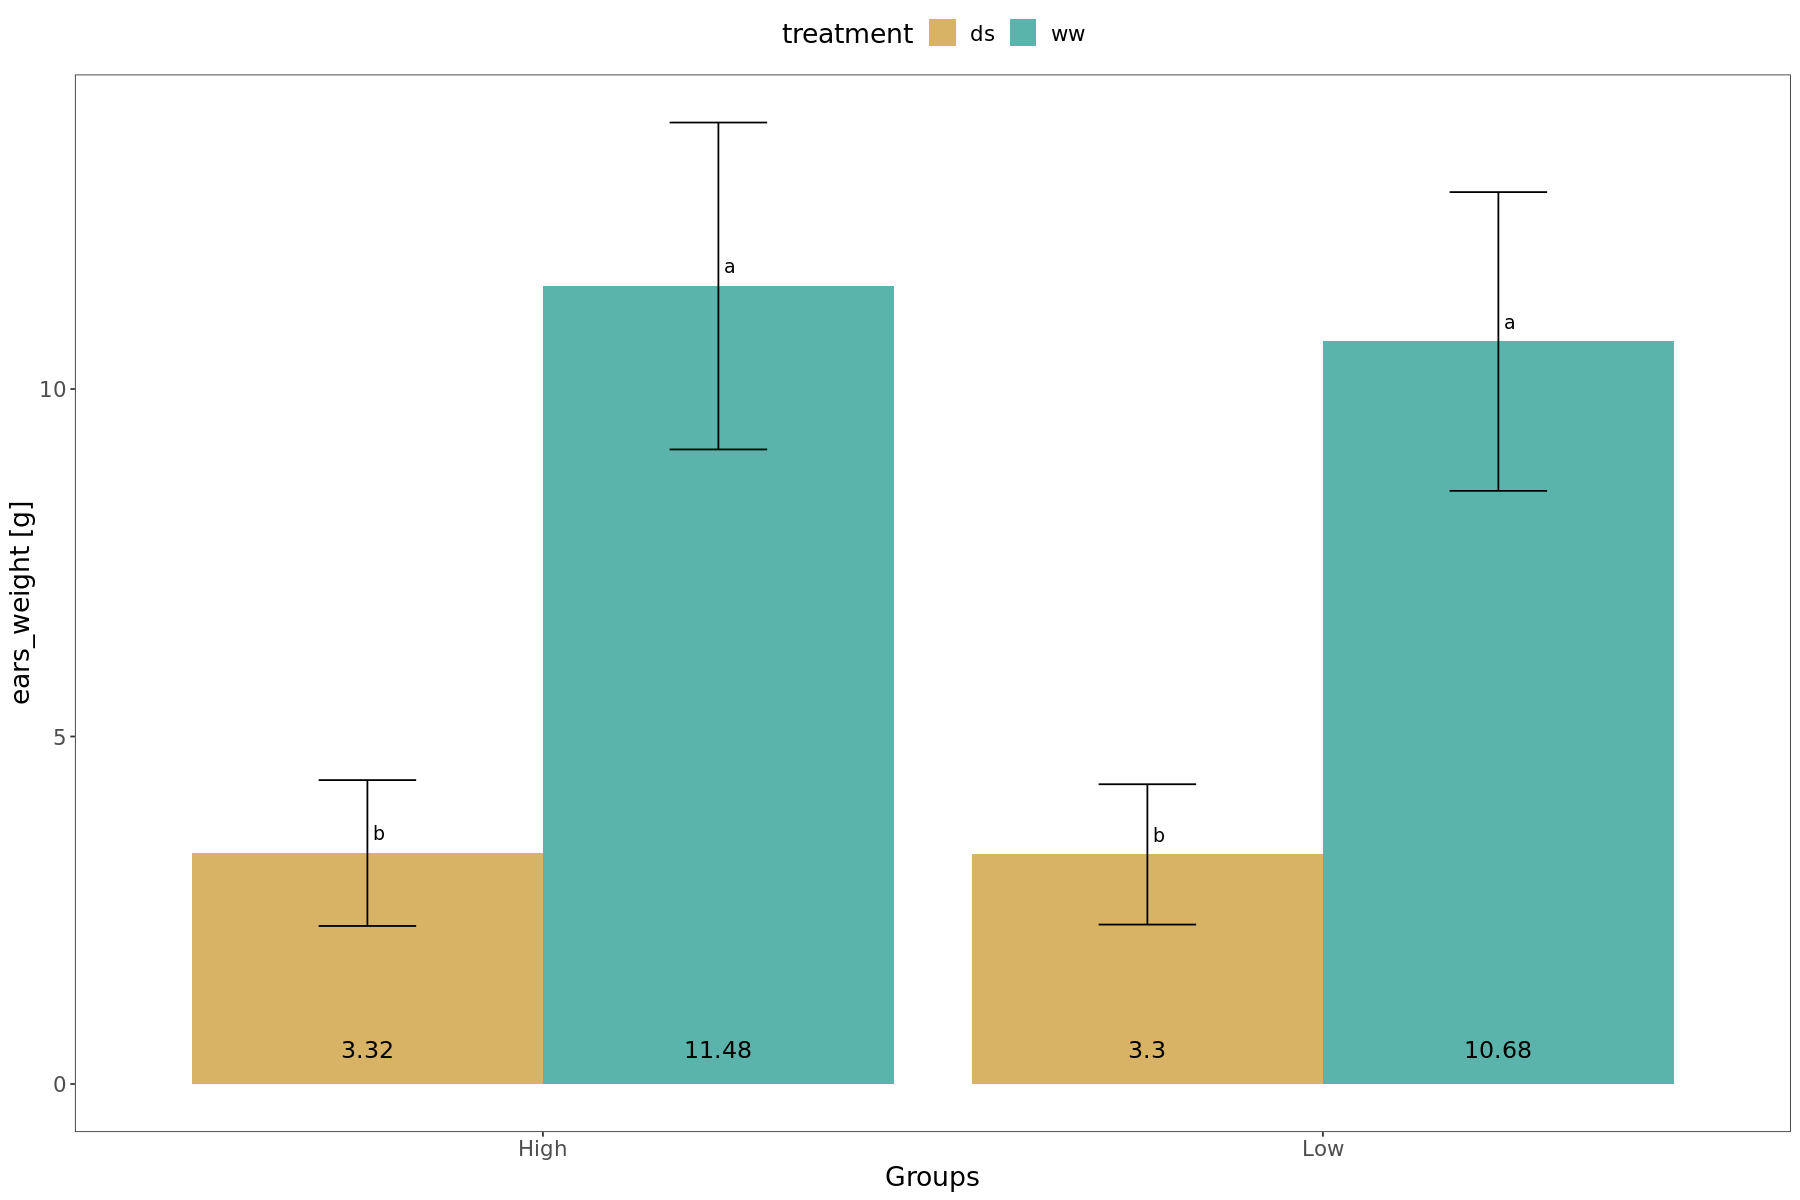

In [173]:

ears<- ggplot(data=summary_EW_Gt, aes(x =Group, y = mean, fill=treatment)) + 
  geom_bar(stat = "identity", position = "dodge" ) +
  geom_text(aes(label= tukey),position=position_dodge(0.90),  vjust=-0.9, hjust=-0.5, size = 4, colour = "black") +
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), position = position_dodge(0.9), width = 0.25) +
 labs(x="Groups", y="ears_weight [g]") +
   theme_bw() +

  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
  theme(legend.position = "top")+
theme(text = element_text(size = 16))+
scale_fill_manual(values=c("#d8b365","#5ab4ac","#d8b365","#5ab4ac"))+
geom_text(aes(label=round(mean,2), y = .5), position = position_dodge(0.90), colour="black", size= 5)
print(ears)


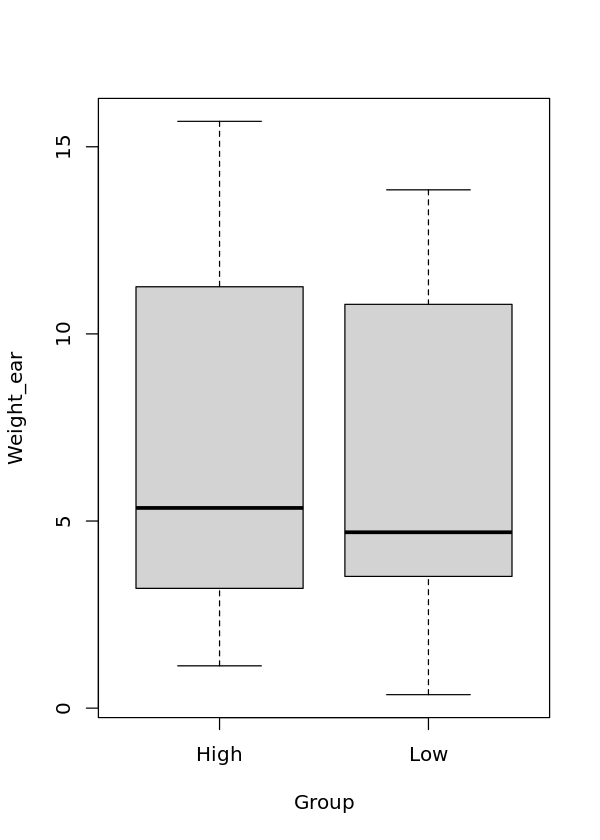

In [39]:
boxplot(Weight_ear~Group, data=final.data)

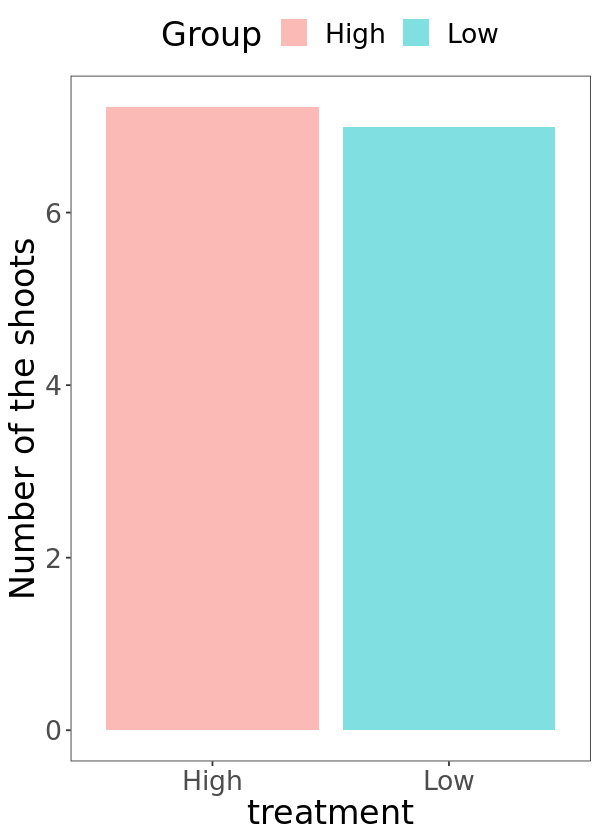

In [41]:
GEW<- ggplot(data=summary_ear_weight_G, aes(x =Group, y = mean, fill=Group)) + 
  geom_bar(stat = "identity", position = "dodge", alpha=0.5 ) +
 # geom_text(aes(label= tukey),position=position_dodge(0.90),  vjust=-0.9, hjust=-0.5, size = 5, colour = "black") +
   # geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), position = position_dodge(0.9), width = 0.25) +
 labs(x="treatment", y="Number of the shoots") +
   theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
  #theme(legend.position = c(0.08, 0.90))+
theme(legend.position = "top") +
#scale_fill_manual(values=c("red","darkgreen"))+
theme(text = element_text(size = 20))  
print(GEW)
options(repr.plot.width=5, repr.plot.height=7)

# TKW trait

In [71]:
str(final.data)

'data.frame':	104 obs. of  22 variables:
 $ Unit              : int  121 123 125 126 130 131 133 135 136 138 ...
 $ experiment        : chr  "V22001" "V22001" "V22001" "V22001" ...
 $ IDs               : Factor w/ 9 levels "2007","2095",..: 4 4 3 5 4 7 3 4 8 7 ...
 $ treatment         : Factor w/ 2 levels "ds","ww": 2 1 1 1 2 1 1 2 1 1 ...
 $ BBCH              : chr  "92" "92" "92" "92" ...
 $ Collection.date   : chr  "08/12/22" "08/08/22" "08/09/22" "08/08/22" ...
 $ max.Height        : num  91.2 78 83 61 102 ...
 $ Biomass           : num  14.75 4.72 7.76 5.61 14.3 ...
 $ Shoots            : num  10 5 4 7 9 3 5 9 4 3 ...
 $ Shoots_with_ear   : num  10 5 3 6 9 3.5 4 9 2 3 ...
 $ Shoots_without_ear: num  0 0 1 1 0 0 1 0 2 0 ...
 $ Nr_ears           : num  10 5 3 6 9 3 4 9 2 3 ...
 $ Full_ear          : num  10 3 1 5 9 3 4 9 2 3 ...
 $ Half_ear          : num  0 2 0 1 0 0 0 0 0 0 ...
 $ Weight_ear        : num  15.43 3.55 1.21 3.36 10.65 ...
 $ Nr_seeds          : num  282 67 29 68 214 

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


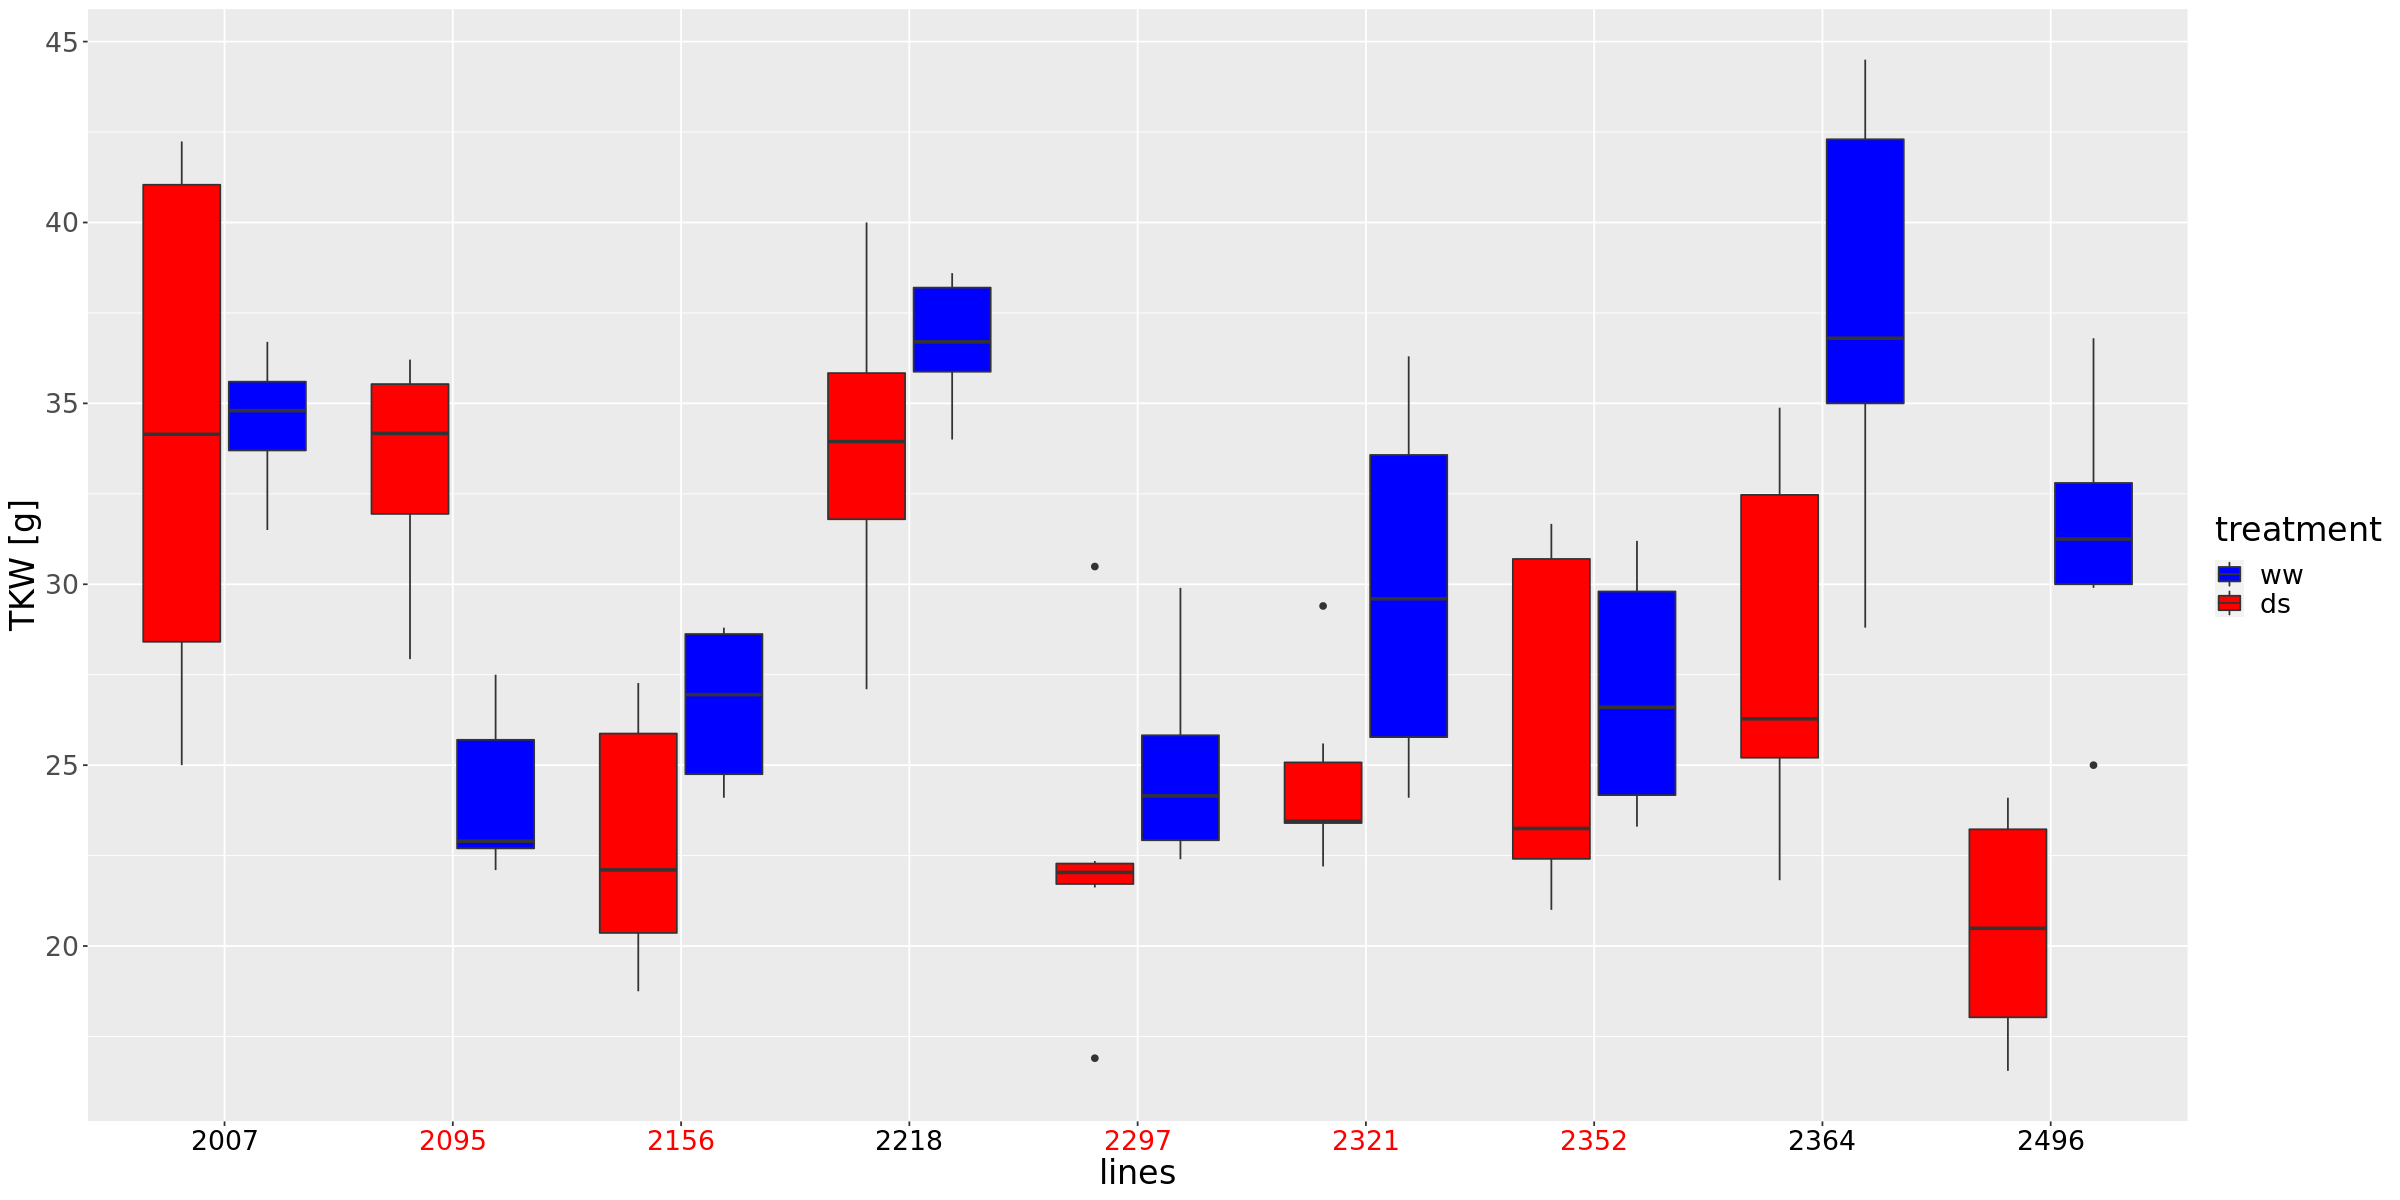

In [76]:
options(repr.plot.width=20, repr.plot.height=10)
tkw <- ggplot(final.data, aes(x=IDs, y=TKW,  fill=treatment))+
       geom_boxplot()+
       theme(text=element_text(size = 20))+
       scale_fill_manual(breaks = final.data$treatment,
                    values = c("blue", "red")) +
        labs(y="TKW [g]", x="lines")+
theme(axis.text.x = element_text(colour=c("black","red","red","black","red","red","red","black","black")))



    print(tkw)

In [37]:
tkw_AN<- aov(TKW~treatment*IDs , data=final.data)
summary(tkw_AN)



tkw_AN_G<- aov(TKW~treatment*Group, data=final.data)
summary(tkw_AN_G)

mood.medtest(TKW~Group,
             data  = final.data,
             exact = FALSE)

              Df Sum Sq Mean Sq F value   Pr(>F)    
treatment      1  209.8  209.75  12.403 0.000688 ***
IDs            8 1708.8  213.60  12.631 7.83e-12 ***
treatment:IDs  8  736.2   92.02   5.442 1.48e-05 ***
Residuals     86 1454.3   16.91                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                 Df Sum Sq Mean Sq F value   Pr(>F)    
treatment         1  209.8   209.8   7.240  0.00836 ** 
Group             1  845.2   845.2  29.173 4.49e-07 ***
treatment:Group   1  156.8   156.8   5.413  0.02200 *  
Residuals       100 2897.3    29.0                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


	Mood's median test

data:  TKW by Group
X-squared = 14.072, df = 1, p-value = 0.0001759


In [36]:
tukey.t.g<- TukeyHSD(tkw_AN_G, conf.levels=.95)

tukey.cld.tkw.g<- multcompLetters4(tkw_AN_G, tukey.t.g)
tukey.cld.tkw.g


LSD_Test<- print(LSD.test(tkw_AN_G, c("treatment","Group")))

ERROR: Error in TukeyHSD(tkw_AN_G, conf.levels = 0.95): object 'tkw_AN_G' not found


In [94]:
summary_tkw_g<- group_by(final.data, treatment,Group) %>%
summarise(mean=mean(TKW), sd=sd(TKW))%>%
          arrange(desc(mean))
 View(summary_tkw_g)

`summarise()` has grouped output by 'treatment'. You can override using the
`.groups` argument.


treatment Group mean     sd      
1 ww        High  34.87273 4.356843
2 ds        High  29.14708 7.575741
3 ww        Low   26.59759 3.671778
4 ds        Low   25.81966 5.348975

In [140]:
lsd_summary<- as.data.frame.list(LSD_Test$ groups)
summary_tkw_g$lsd<- lsd_summary$groups
View(summary_tkw_g)
write.table(summary_tkw_g, "lsd-summary-tkw-Gt.csv")

treatment Group mean     sd       lsd
1 ww        High  34.87273 4.356843 a  
2 ds        High  29.14708 7.575741 b  
3 ww        Low   26.59759 3.671778 bc 
4 ds        Low   25.81966 5.348975 c

In [141]:
lsd_tkw_Int<- read.table( "lsd-summary-tkw-Gt.csv")

lsd_tkw_Int$treatment<- as.factor(lsd_tkw_Int$treatment)
lsd_tkw_Int$Group<- as.factor(lsd_tkw_Int$Group)
str(lsd_tkw_Int)

'data.frame':	4 obs. of  5 variables:
 $ treatment: Factor w/ 2 levels "ds","ww": 2 1 2 1
 $ Group    : Factor w/ 2 levels "High","Low": 1 1 2 2
 $ mean     : num  34.9 29.1 26.6 25.8
 $ sd       : num  4.36 7.58 3.67 5.35
 $ lsd      : chr  "a" "b" "bc" "c"


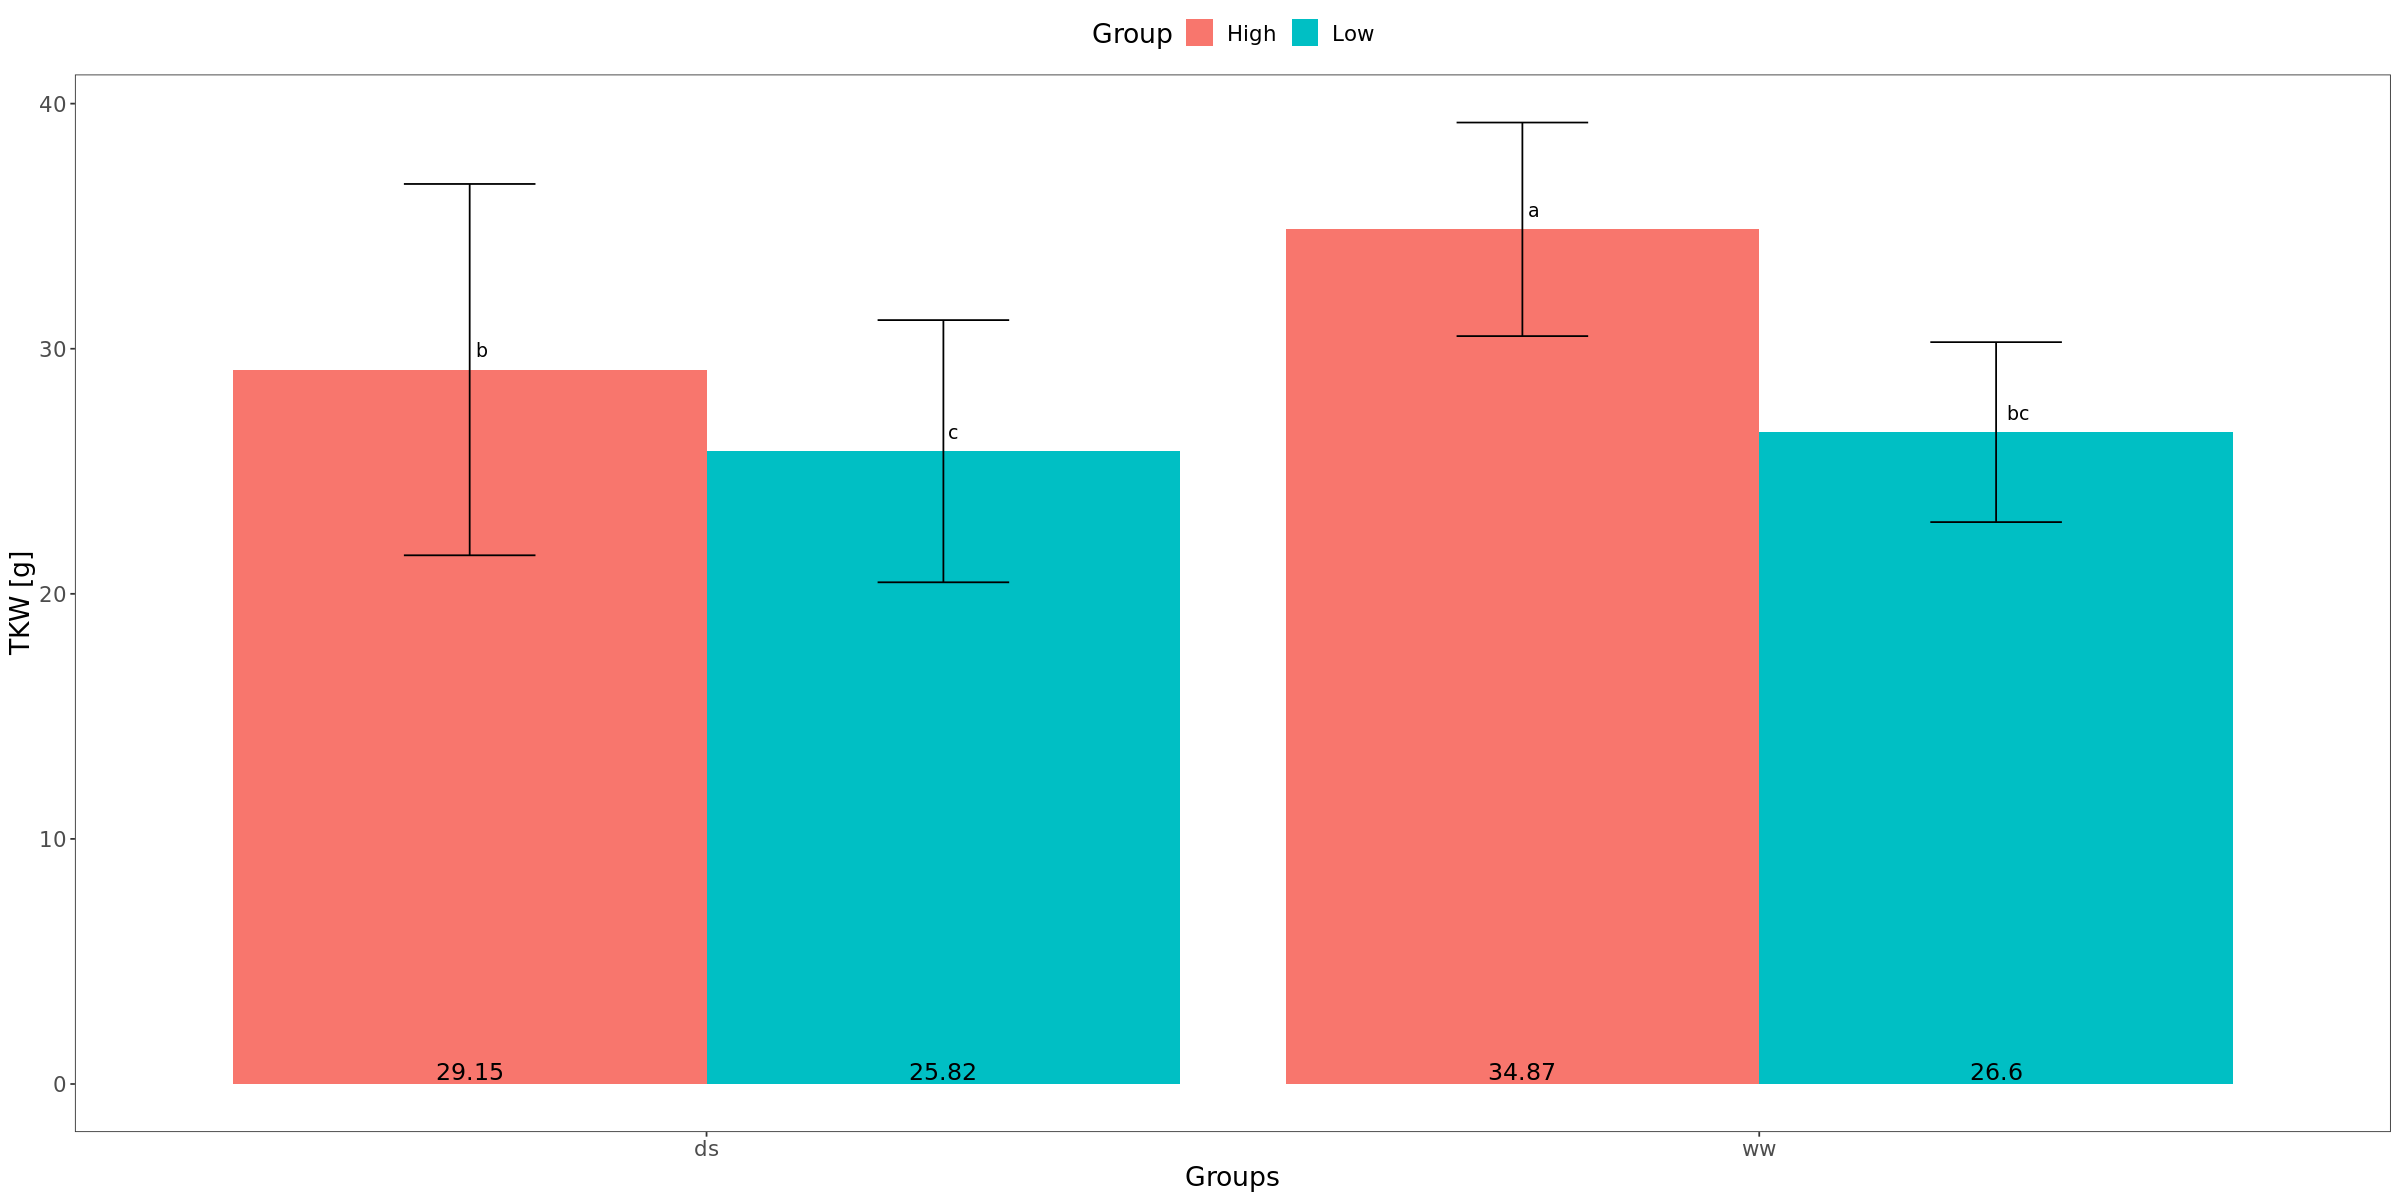

In [119]:

tkw<- ggplot(data=lsd_tkw_Int, aes(x =treatment, y = mean, fill=Group)) + 
  geom_bar(stat = "identity", position = "dodge" ) +
  geom_text(aes(label= lsd),position=position_dodge(0.90),  vjust=-0.9, hjust=-0.5, size = 4, colour = "black") +
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), position = position_dodge(0.9), width = 0.25) +
 labs(x="Groups", y="TKW [g]") +
   theme_bw() +

  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
  theme(legend.position = "top")+
theme(text = element_text(size = 16))+
#scale_fill_manual(values=c("lightblue","red","blue","red"))+
geom_text(aes(label=round(mean,2), y = .5), position = position_dodge(0.90), colour="black", size= 5)
print(tkw)

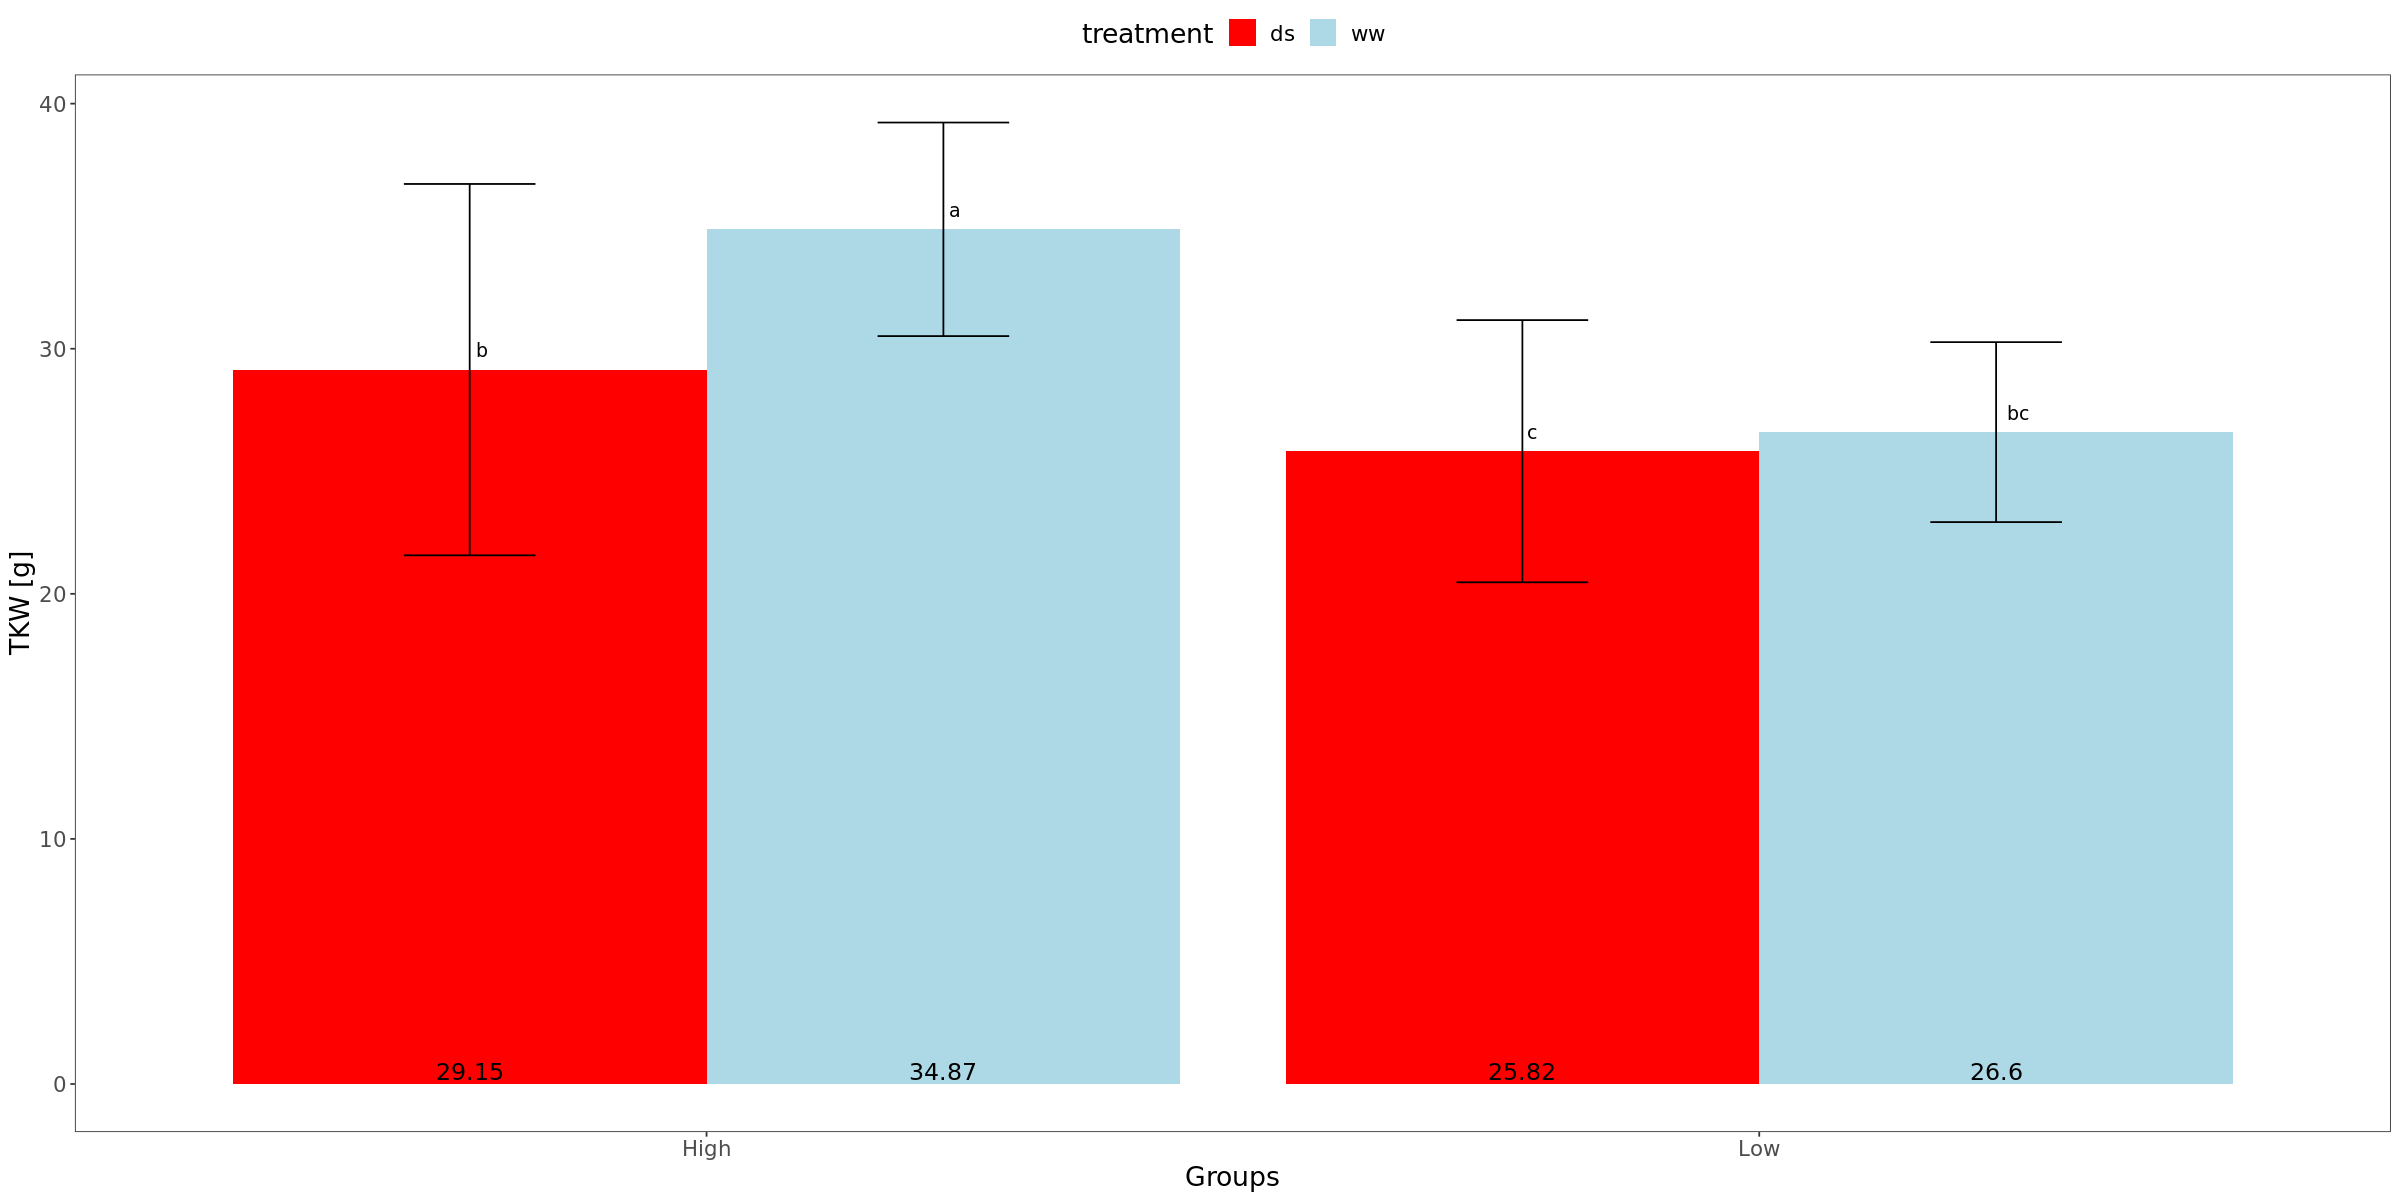

In [122]:
tkwg<- ggplot(data=lsd_tkw_Int, aes(x =Group, y = mean, fill=treatment)) + 
  geom_bar(stat = "identity", position = "dodge" ) +
  geom_text(aes(label= lsd),position=position_dodge(0.90),  vjust=-0.9, hjust=-0.5, size = 4, colour = "black") +
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), position = position_dodge(0.9), width = 0.25) +
 labs(x="Groups", y="TKW [g]") +
   theme_bw() +

  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
  theme(legend.position = "top")+
theme(text = element_text(size = 16))+
scale_fill_manual(values=c("red","lightblue","red", "lightblue"))+
geom_text(aes(label=round(mean,2), y = .5), position = position_dodge(0.90), colour="black", size= 5)
print(tkwg)

In [124]:
tkw_AN<- aov(TKW~treatment*IDs , data=final.data)
summary(tkw_AN)

              Df Sum Sq Mean Sq F value   Pr(>F)    
treatment      1  209.8  209.75  12.403 0.000688 ***
IDs            8 1708.8  213.60  12.631 7.83e-12 ***
treatment:IDs  8  736.2   92.02   5.442 1.48e-05 ***
Residuals     86 1454.3   16.91                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [10]:
tkw_Int<- read.table("summary_tkw_August.csv")
tkw_Int$IDs <- as.factor(tkw_Int$IDs)
tkw_Int$treatment <- as.factor(tkw_Int$treatment)
str(tkw_Int)

'data.frame':	18 obs. of  5 variables:
 $ treatment: Factor w/ 2 levels "ds","ww": 2 2 2 1 1 1 2 2 1 2 ...
 $ IDs      : Factor w/ 9 levels "2007","2095",..: 8 4 1 1 4 2 9 6 8 7 ...
 $ mean     : num  37.5 36.7 34.5 34.2 33.8 ...
 $ sd       : num  6.21 1.77 1.99 7.65 4.39 ...
 $ tukey    : chr  "a" "a" "ab" "ab" ...


Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


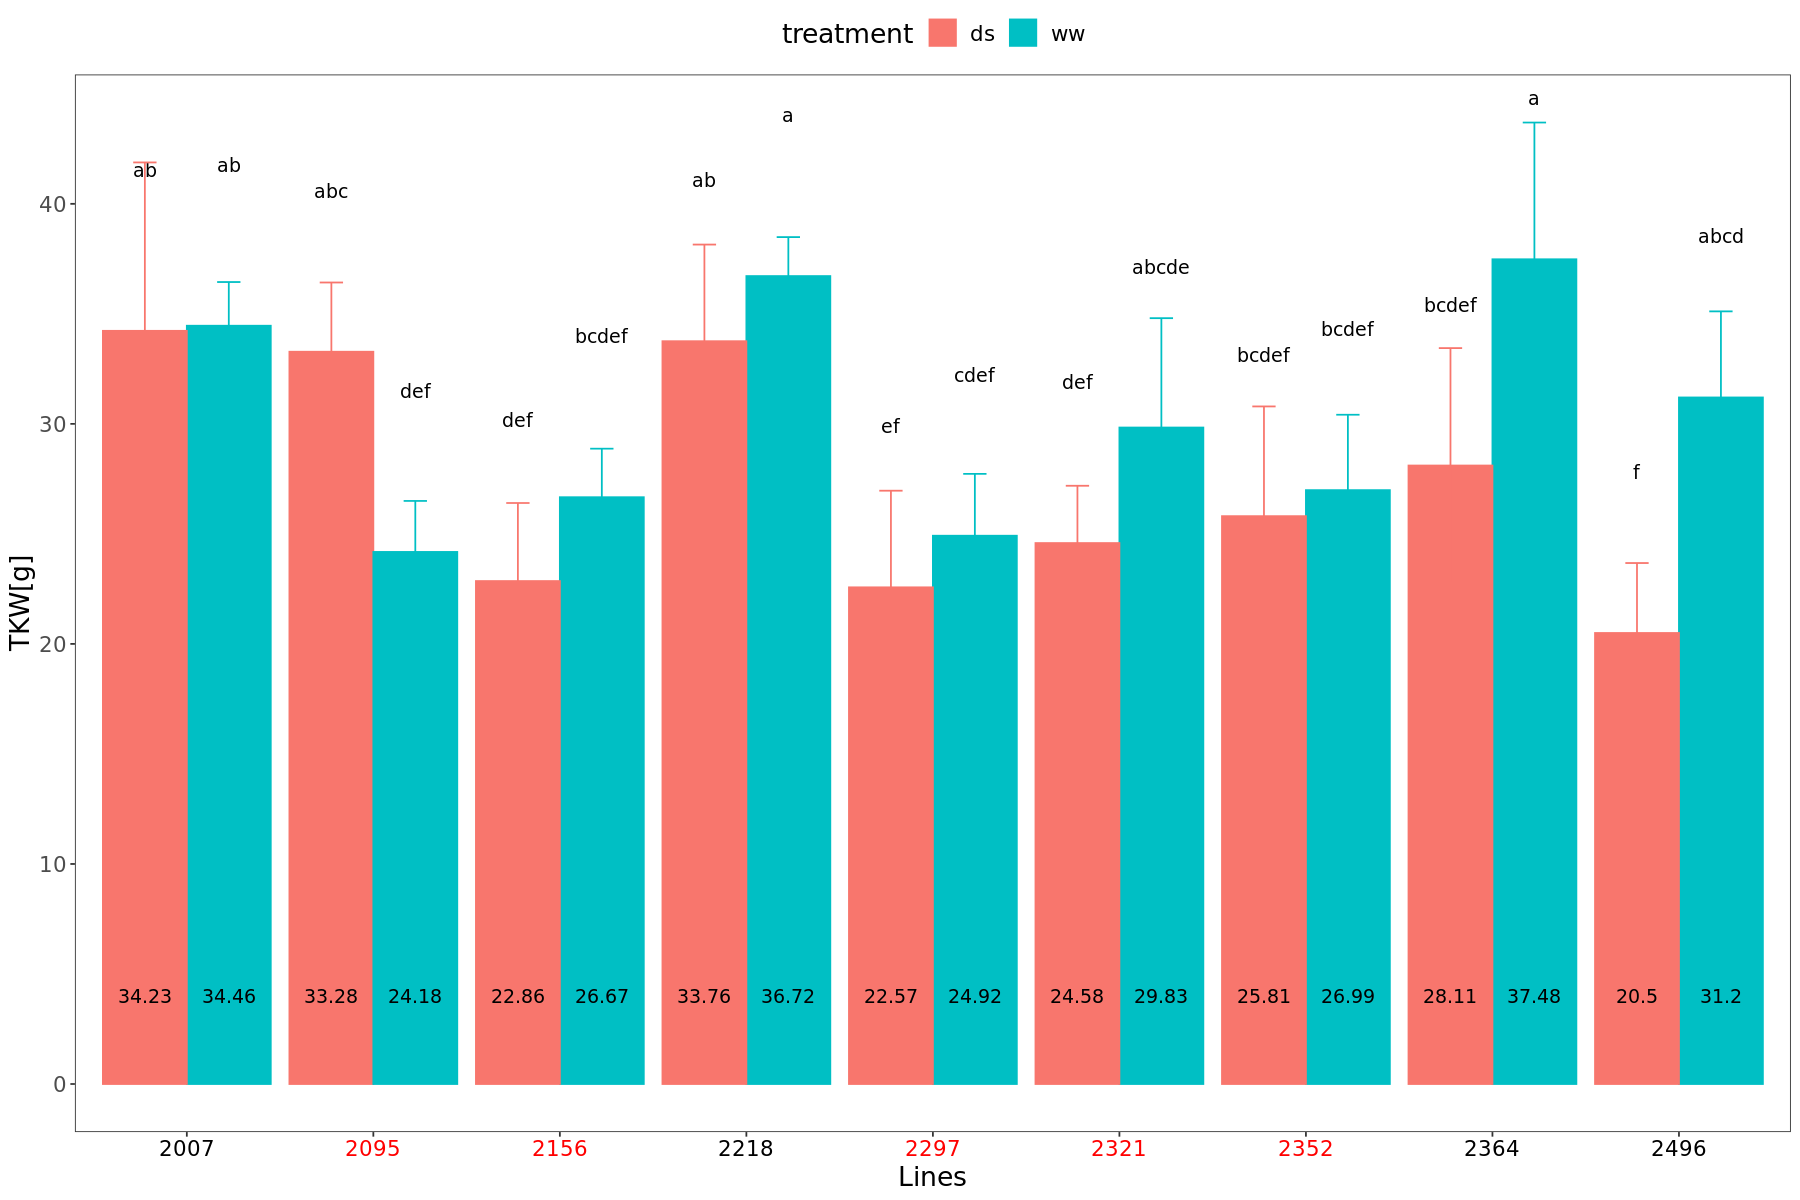

In [11]:
options(repr.plot.width=15,  repr.plot.height=10)
TKW_Int <- ggplot(data=tkw_Int, aes(x =IDs, y = mean, fill=treatment, colour=treatment)) + 
  geom_bar(stat = "identity", position = "dodge" ) +
  geom_text(aes(label= tukey),position=position_dodge(0.90),  vjust=-11, hjust=.5, size = 4, colour = "black") +
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), position = position_dodge(0.9), width = 0.25) +
 labs(x="Lines", y="TKW[g]") +
   theme_bw() +
theme(axis.text.x = element_text(colour=c("black","red","red","black","red","red","red","black","black")))+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
  theme(legend.position = "top")+
theme(text = element_text(size = 16))+
geom_text(aes(label=round(mean,2), y = 4), position = position_dodge(0.90), colour="black", size= 4)
print(TKW_Int)


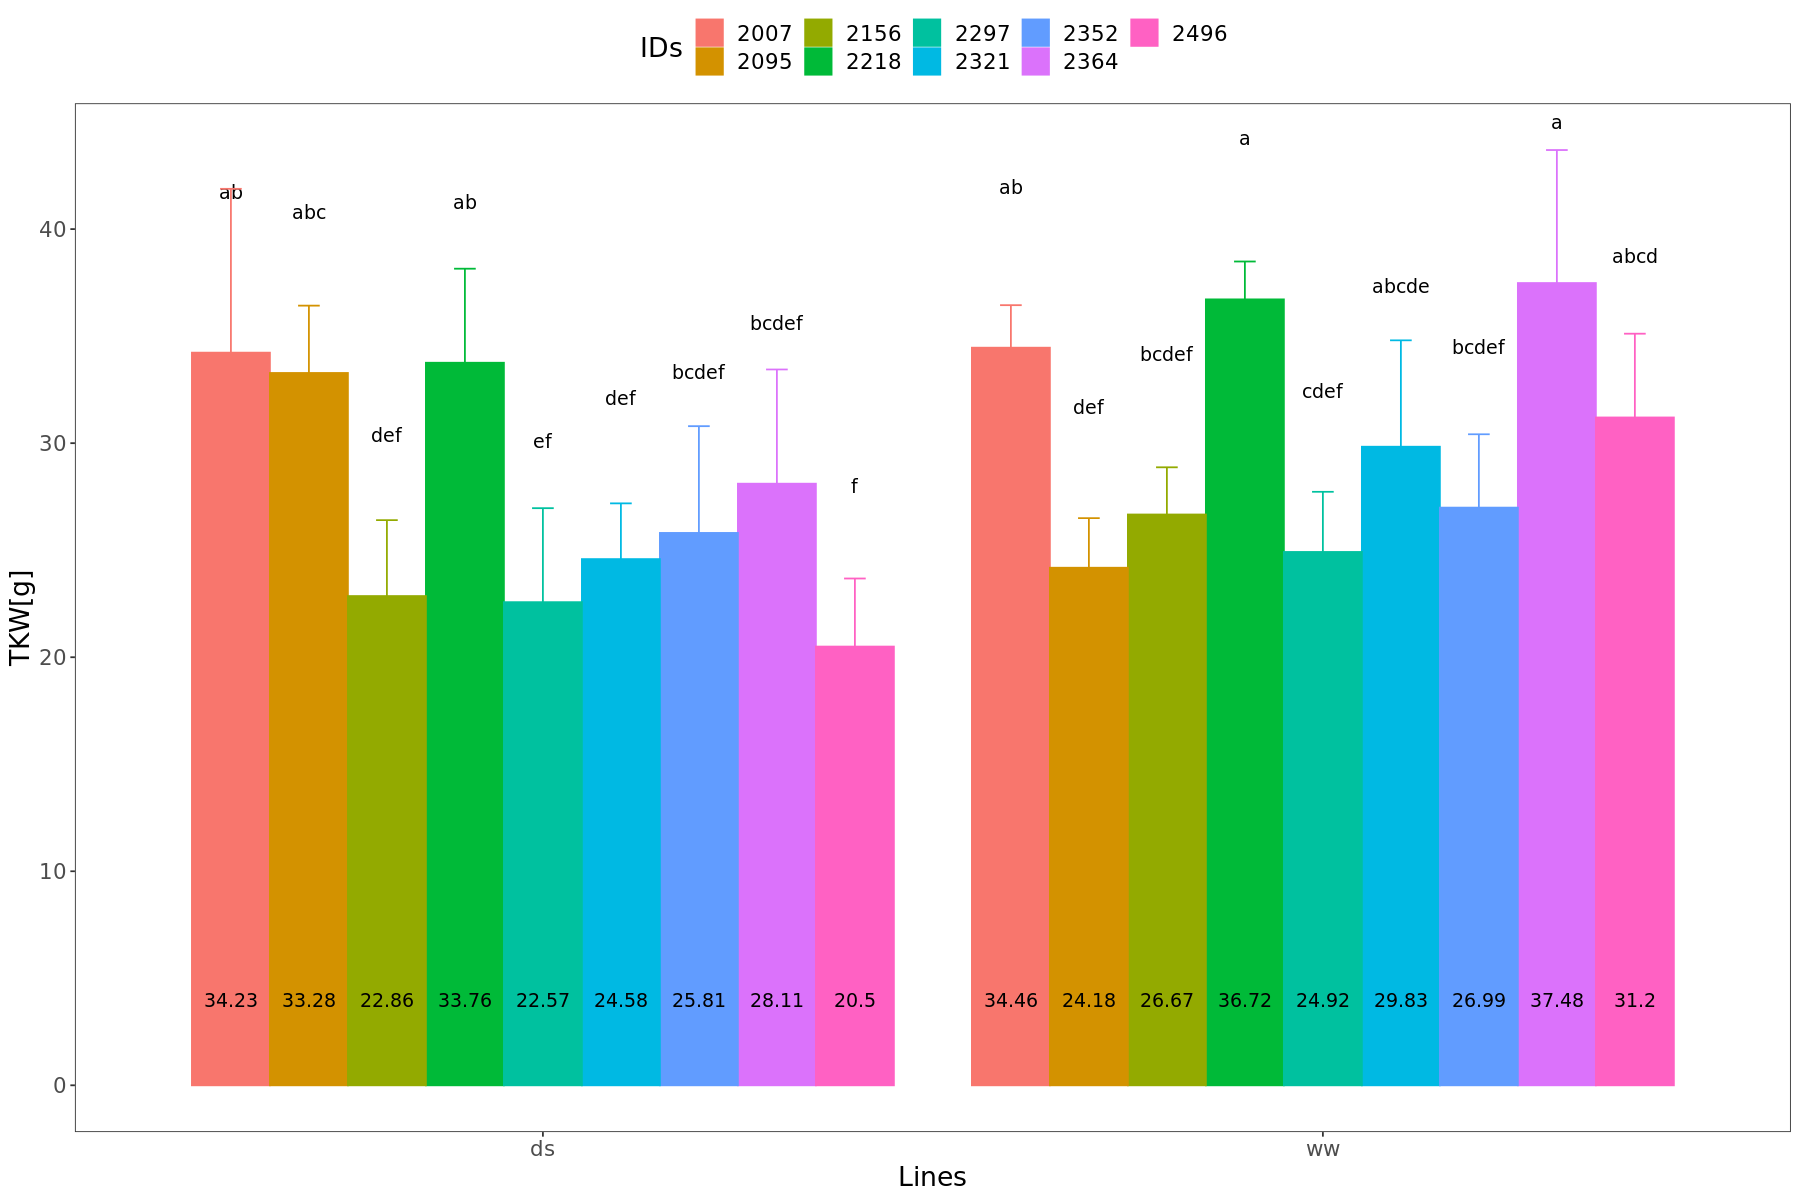

In [12]:
options(repr.plot.width=15,  repr.plot.height=10)
TKW_Int <- ggplot(data=tkw_Int, aes(x =treatment, y = mean, fill=IDs, colour=IDs)) + 
  geom_bar(stat = "identity", position = "dodge" ) +
  geom_text(aes(label= tukey),position=position_dodge(0.90),  vjust=-11, hjust=.5, size = 4, colour = "black") +
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), position = position_dodge(0.9), width = 0.25) +
 labs(x="Lines", y="TKW[g]") +
   theme_bw() +
#theme(axis.text.x = element_text(colour=c("black","red","red","black","red","red","red","black","black")))+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
theme(legend.position = "top", legend.text = element_text(color = "black"))+


#scale_fill_discrete(labels = c("2007", "2156(L)", "2297(L)","2352(L)", "2496", "2095(L)","2218", "2321(L)", "2364"))+
theme(text = element_text(size = 16))+
geom_text(aes(label=round(mean,2), y = 4), position = position_dodge(0.90), colour="black", size= 4)
print(TKW_Int)


# Number of the unqualified seeds (Hollow, broken, defected by bathpgen and etc)


In [199]:
str(final.data)


'data.frame':	104 obs. of  22 variables:
 $ Unit              : int  121 123 125 126 130 131 133 135 136 138 ...
 $ experiment        : chr  "V22001" "V22001" "V22001" "V22001" ...
 $ IDs               : Factor w/ 9 levels "2007","2095",..: 4 4 3 5 4 7 3 4 8 7 ...
 $ treatment         : Factor w/ 2 levels "ds","ww": 2 1 1 1 2 1 1 2 1 1 ...
 $ BBCH              : chr  "92" "92" "92" "92" ...
 $ Collection.date   : chr  "08/12/22" "08/08/22" "08/09/22" "08/08/22" ...
 $ max.Height        : num  91.2 78 83 61 102 ...
 $ Biomass           : num  14.75 4.72 7.76 5.61 14.3 ...
 $ Shoots            : num  10 5 4 7 9 3 5 9 4 3 ...
 $ Shoots_with_ear   : num  10 5 3 6 9 3.5 4 9 2 3 ...
 $ Shoots_without_ear: num  0 0 1 1 0 0 1 0 2 0 ...
 $ Nr_ears           : num  10 5 3 6 9 3 4 9 2 3 ...
 $ Full_ear          : num  10 3 1 5 9 3 4 9 2 3 ...
 $ Half_ear          : num  0 2 0 1 0 0 0 0 0 0 ...
 $ Weight_ear        : num  15.43 3.55 1.21 3.36 10.65 ...
 $ Nr_seeds          : num  282 67 29 68 214 

In [34]:
PS_AN<- aov(Poor_seeds~treatment*IDs, data=final.data)
summary(PS_AN)

PS_AN_G<- aov(Poor_seeds~treatment*Group, data=final.data)
summary(PS_AN_G)


PS_AN_G1<- aov(Poor_seeds~Group, data=final.data, type= "III")
Anova(PS_AN_G1,type= "III")
summary(PS_AN_G1)


#lsd.test<- print(LSD.test(PS_AN_G, "Group"))
#lsd.test<- print(LSD.test(PS_AN_G, c("treatment","Group")))
a<- kruskal.test(Poor_seeds~Group, data=final.data)
a
#tukey<- TukeyHSD(PS_AN_G, conf.levels=.95)
#tukey.cld<- multcompLetters4(PS_AN_G,tukey)
#tukey.cld


              Df Sum Sq Mean Sq F value  Pr(>F)   
treatment      1   93.8   93.84   8.764 0.00397 **
IDs            8  211.2   26.40   2.465 0.01868 * 
treatment:IDs  8  232.8   29.10   2.717 0.01019 * 
Residuals     86  920.8   10.71                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                 Df Sum Sq Mean Sq F value  Pr(>F)   
treatment         1   93.8   93.84   7.453 0.00749 **
Group             1   60.4   60.44   4.800 0.03078 * 
treatment:Group   1   45.3   45.26   3.595 0.06084 . 
Residuals       100 1259.1   12.59                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Warning message:
“In lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) :
 extra argument ‘type’ will be disregarded”


Sum Sq     Df  F value   Pr(>F)      
(Intercept)  226.17391   1 16.461779 9.735607e-05
Group         57.20309   1  4.163454 4.388873e-02
Residuals   1401.41229 102        NA           NA

             Df Sum Sq Mean Sq F value Pr(>F)  
Group         1   57.2   57.20   4.163 0.0439 *
Residuals   102 1401.4   13.74                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


	Kruskal-Wallis rank sum test

data:  Poor_seeds by Group
Kruskal-Wallis chi-squared = 0.59091, df = 1, p-value = 0.4421


In [35]:
a<- t.test(Poor_seeds~treatment ,data=final.data, equal.vara=FALSE)
a

ab<- t.test(Poor_seeds~Group ,data=final.data, equal.vara=FALSE)
ab


	Welch Two Sample t-test

data:  Poor_seeds by treatment
t = -2.6051, df = 58.004, p-value = 0.01165
alternative hypothesis: true difference in means between group ds and group ww is not equal to 0
95 percent confidence interval:
 -3.3601398 -0.4400822
sample estimates:
mean in group ds mean in group ww 
       0.4528302        2.3529412 



	Welch Two Sample t-test

data:  Poor_seeds by Group
t = 1.8838, df = 58.398, p-value = 0.06457
alternative hypothesis: true difference in means between group High and group Low is not equal to 0
95 percent confidence interval:
 -0.09321123  3.07971798
sample estimates:
mean in group High  mean in group Low 
         2.2173913          0.7241379 


In [34]:
pwc1 <- final.data %>% 
pairwise_t_test(Poor_seeds~Group, pool.sd = TRUE, p.adjust.method = "bonferroni")
pwc1


pairwise.t.test(x = final.data$Poor_seeds, g = final.data$Group, p.adjust.method = "bonferroni",
, var.equal = FALSE)

.y.        group1 group2 n1 n2 p      p.signif p.adj  p.adj.signif
1 Poor_seeds High   Low    46 58 0.0439 *        0.0439 *


	Pairwise comparisons using t tests with pooled SD 

data:  final.data$Poor_seeds and final.data$Group 

    High 
Low 0.044

P value adjustment method: bonferroni 

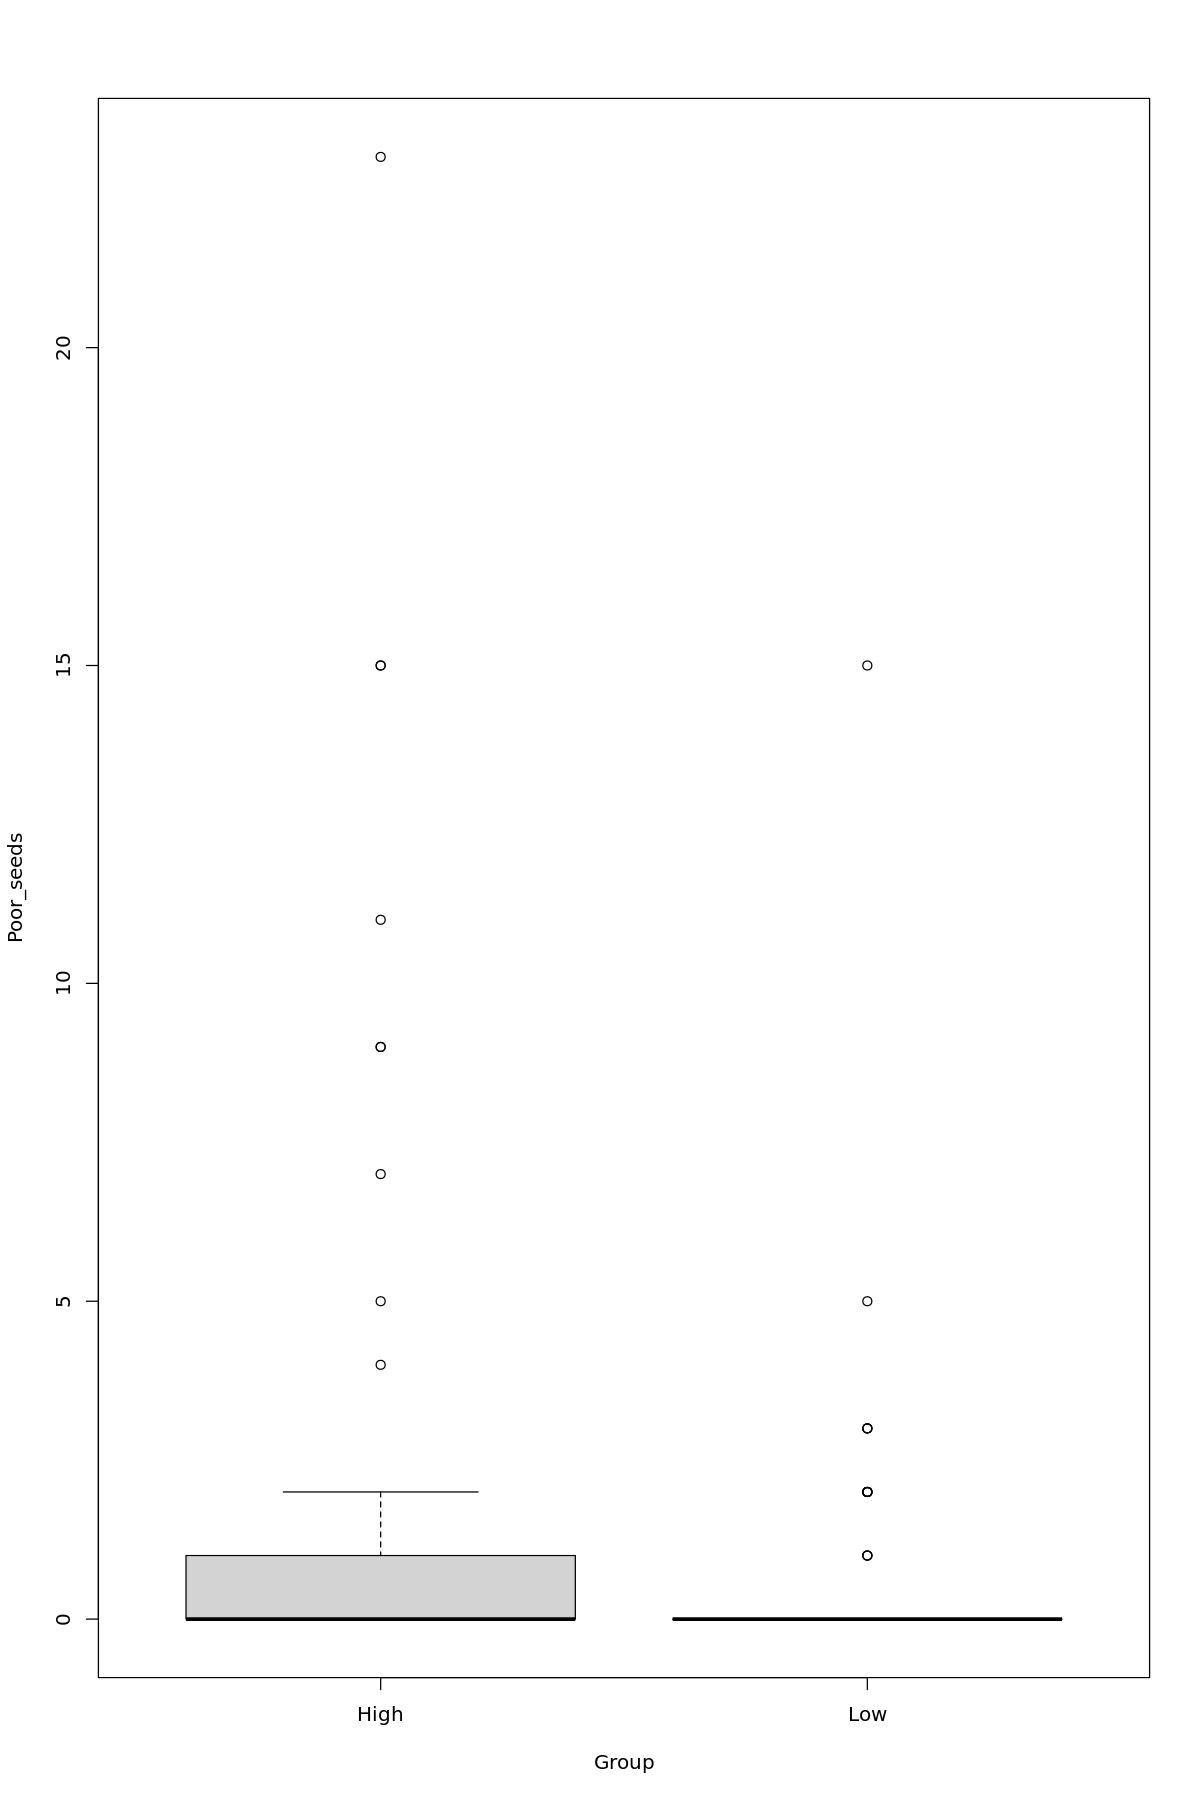

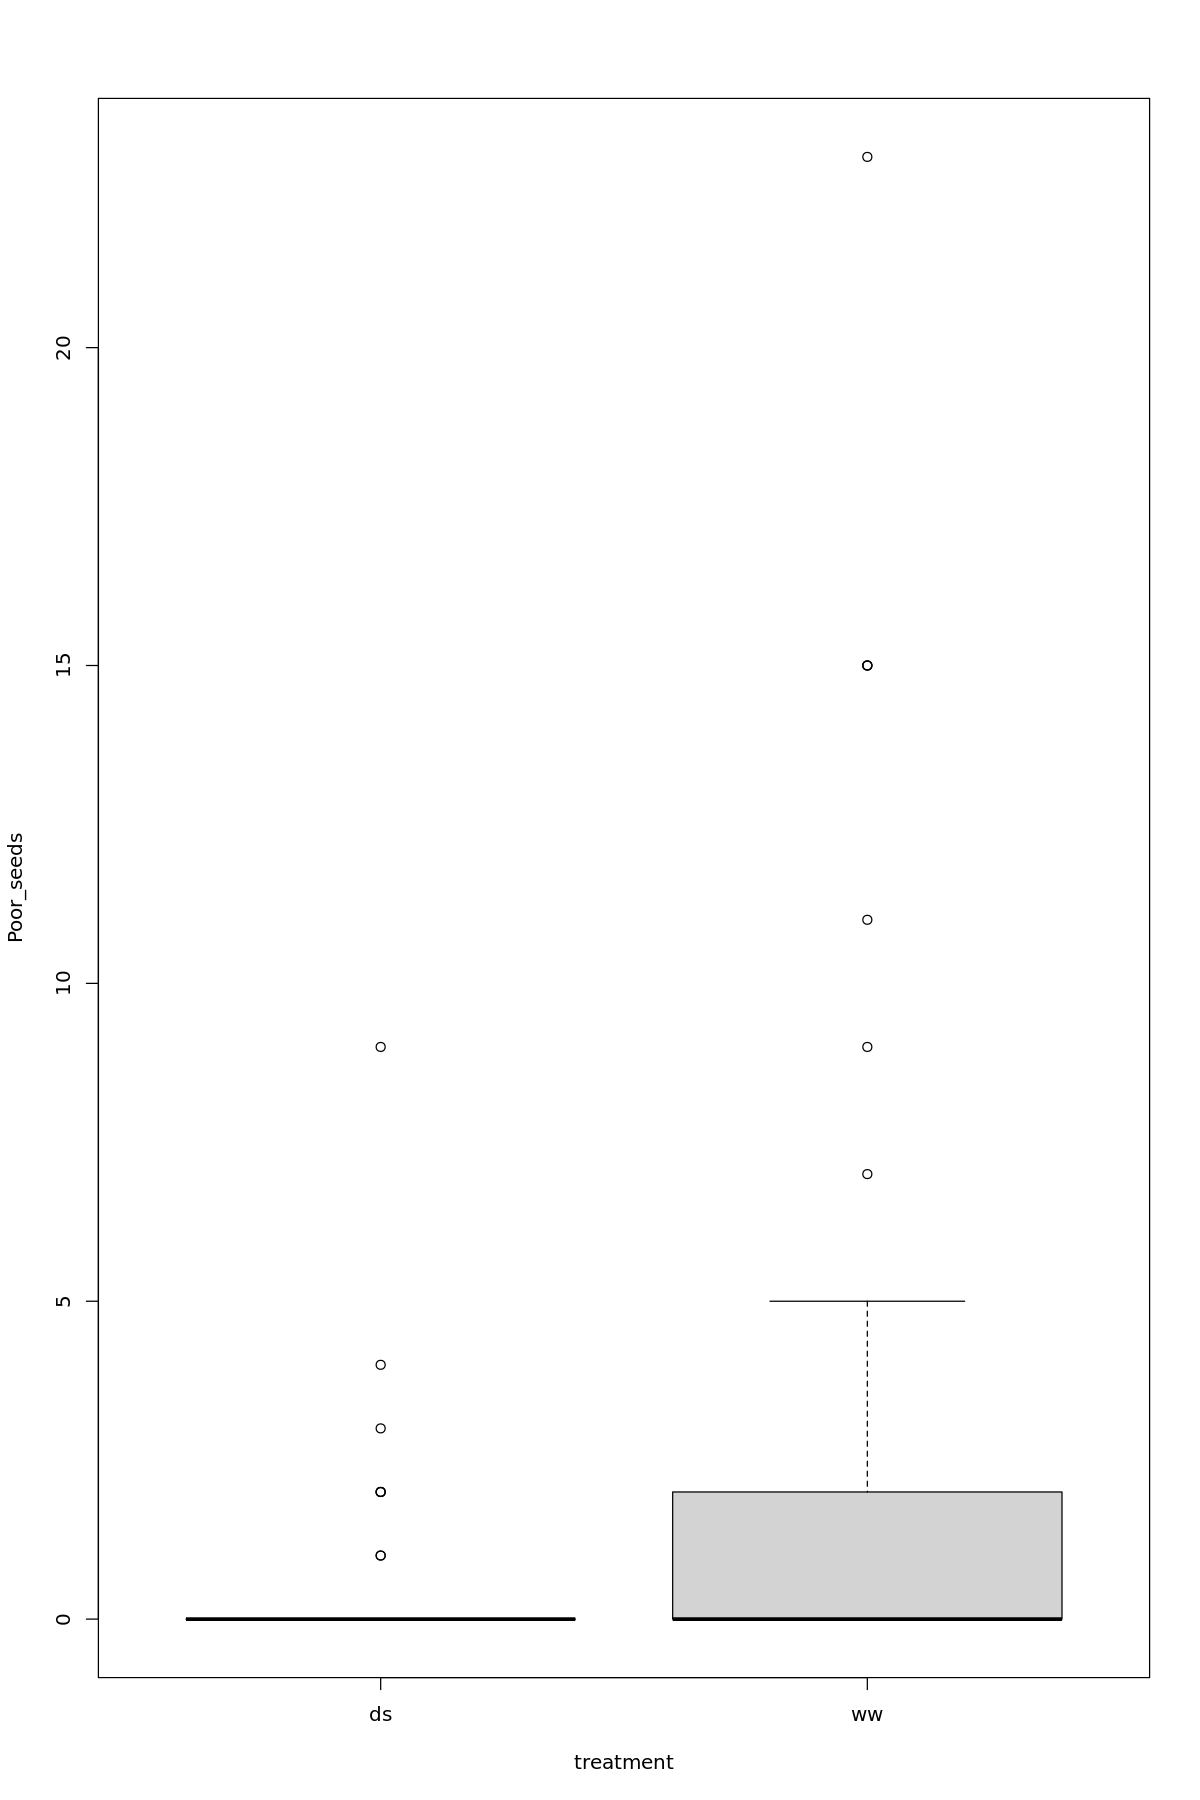

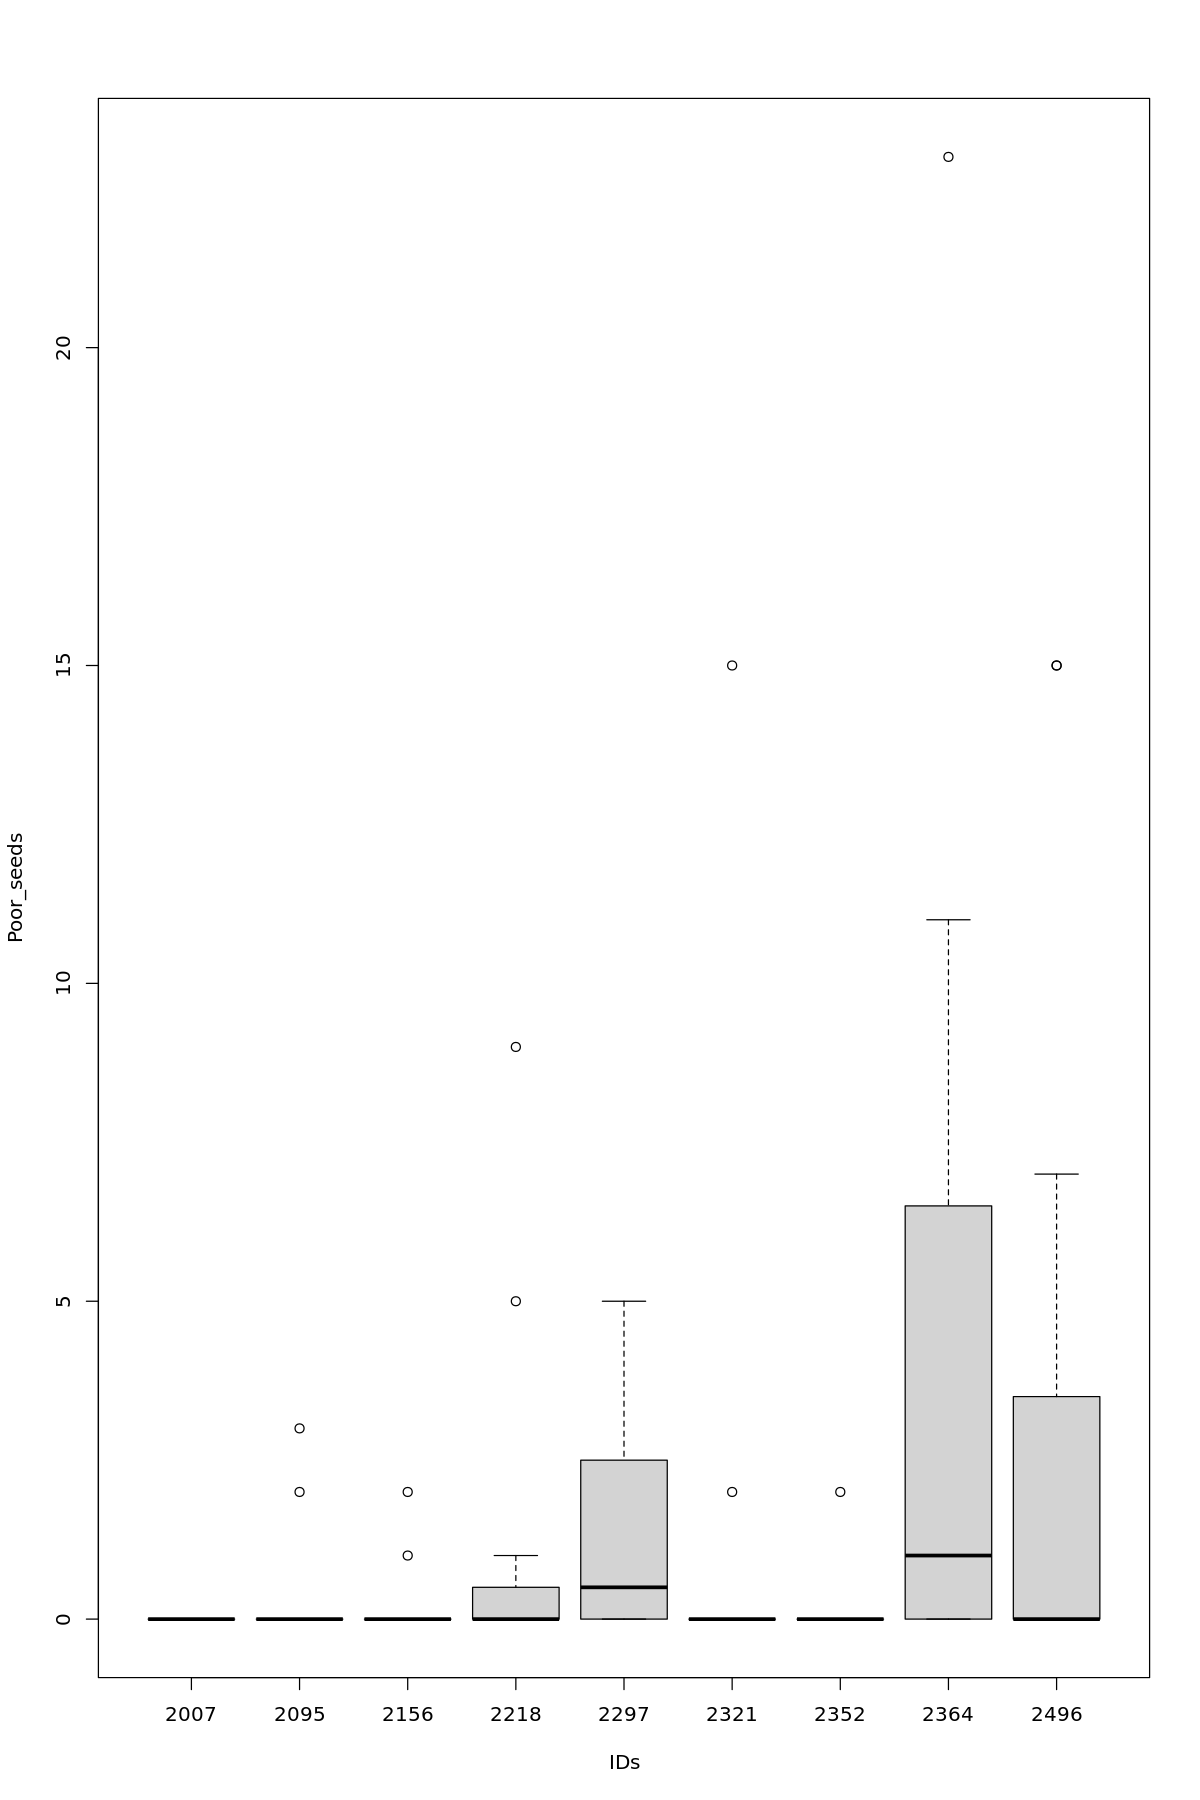

In [47]:
options(repr.plot.width=10,  repr.plot.height=15)
boxplot(Poor_seeds~Group,data=final.data)
boxplot(Poor_seeds~treatment,data=final.data)
boxplot(Poor_seeds~IDs,data=final.data)

In [ ]:
summary(final.data)

In [14]:
leveneTest(Poor_seeds~Group, data=final.data)
with(final.data, shapiro.test(Poor_seeds[Groups=="Low"]))
with(final.data, shapiro.test(Poor_seeds[Groups=="High"]))



Df  F value  Pr(>F)    
group   1 4.163454 0.04388873
      102       NA         NA


	Shapiro-Wilk normality test

data:  Poor_seeds[Groups == "Low"]
W = 0.36575, p-value = 2.053e-14



	Shapiro-Wilk normality test

data:  Poor_seeds[Groups == "High"]
W = 0.52104, p-value = 4.872e-11


# To check the medians of two groups for poor seeds

In [15]:
library(RVAideMemoire)
mood.medtest(Poor_seeds~Group, data=final.data, exact=TRUE)


	Mood's median test

data:  Poor_seeds by Group
p-value = 0.8177


Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


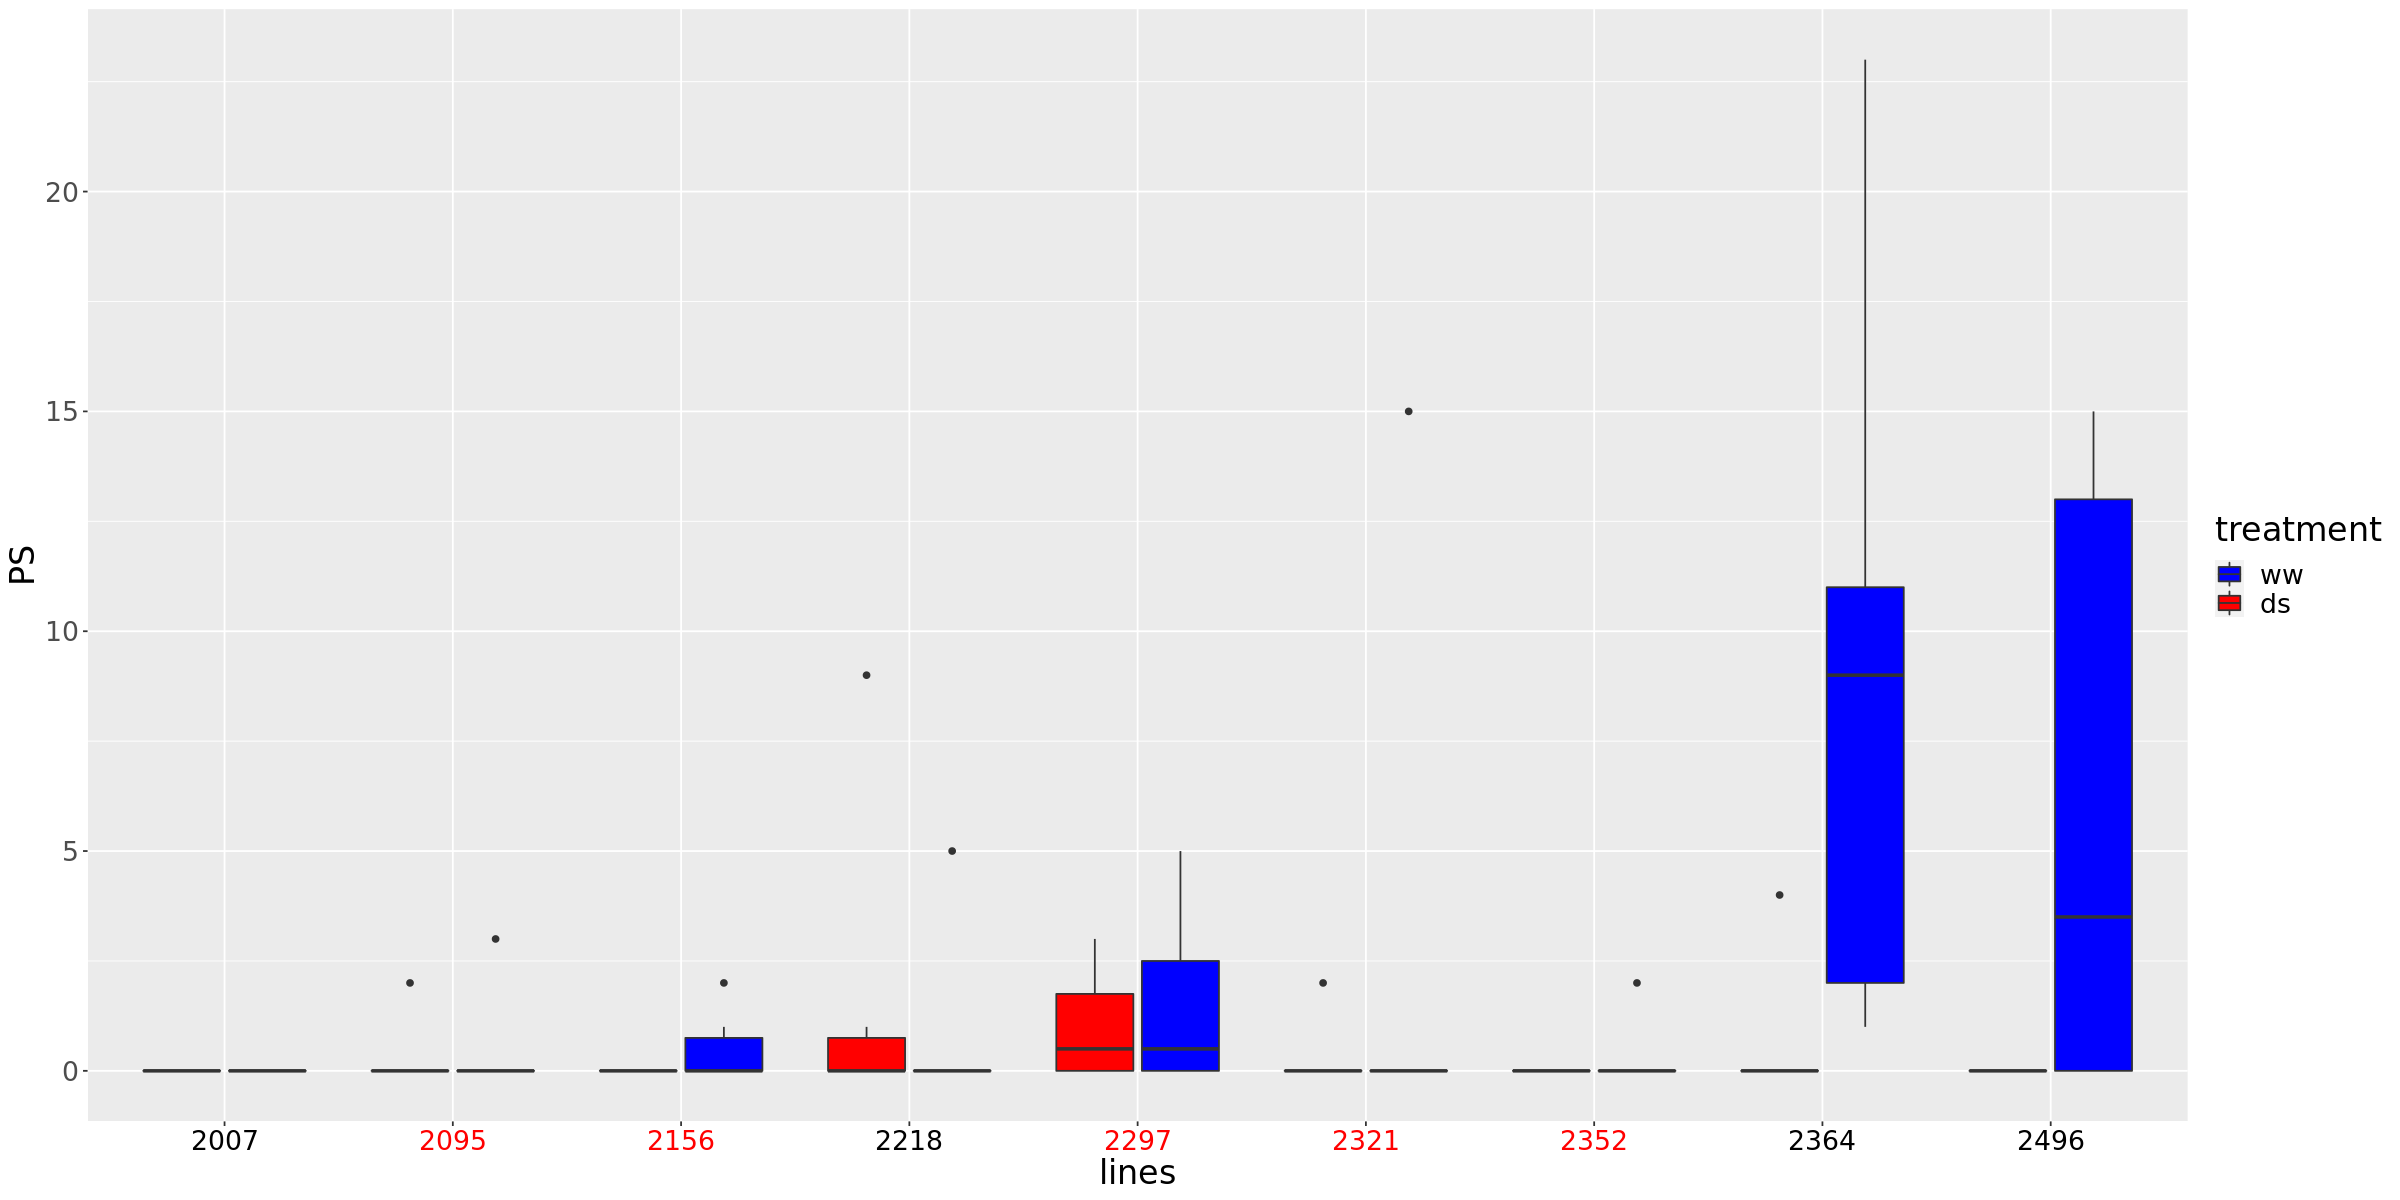

In [8]:
options(repr.plot.width=20, repr.plot.height=10)
tkw <- ggplot(final.data, aes(x=IDs, y=Poor_seeds,  fill=treatment))+
       geom_boxplot()+
       theme(text=element_text(size = 20))+
       scale_fill_manual(breaks = final.data$treatment,
                    values = c("blue", "red")) +
        labs(y="PS", x="lines")+
theme(axis.text.x = element_text(colour=c("black","red","red","black","red","red","red","black","black")))



    print(tkw)

In [18]:
a<- mean(final.data$Poor_seeds[final.data$Group=="Low"])
a

b<- mean(final.data$Poor_seeds[final.data$Group=="High"])
b

[1] 0.7241379

[1] 2.217391

In [22]:
length(final.data$Poor_seeds[final.data$Group=="Low"])
length(final.data$Poor_seeds[final.data$Group=="High"])

length(final.data$Poor_seeds[final.data$treatment=="ww"])
length(final.data$Poor_seeds[final.data$treatment=="ds"])

[1] 58

[1] 46

[1] 51

[1] 53

# Qualified seeds

str(final.data)

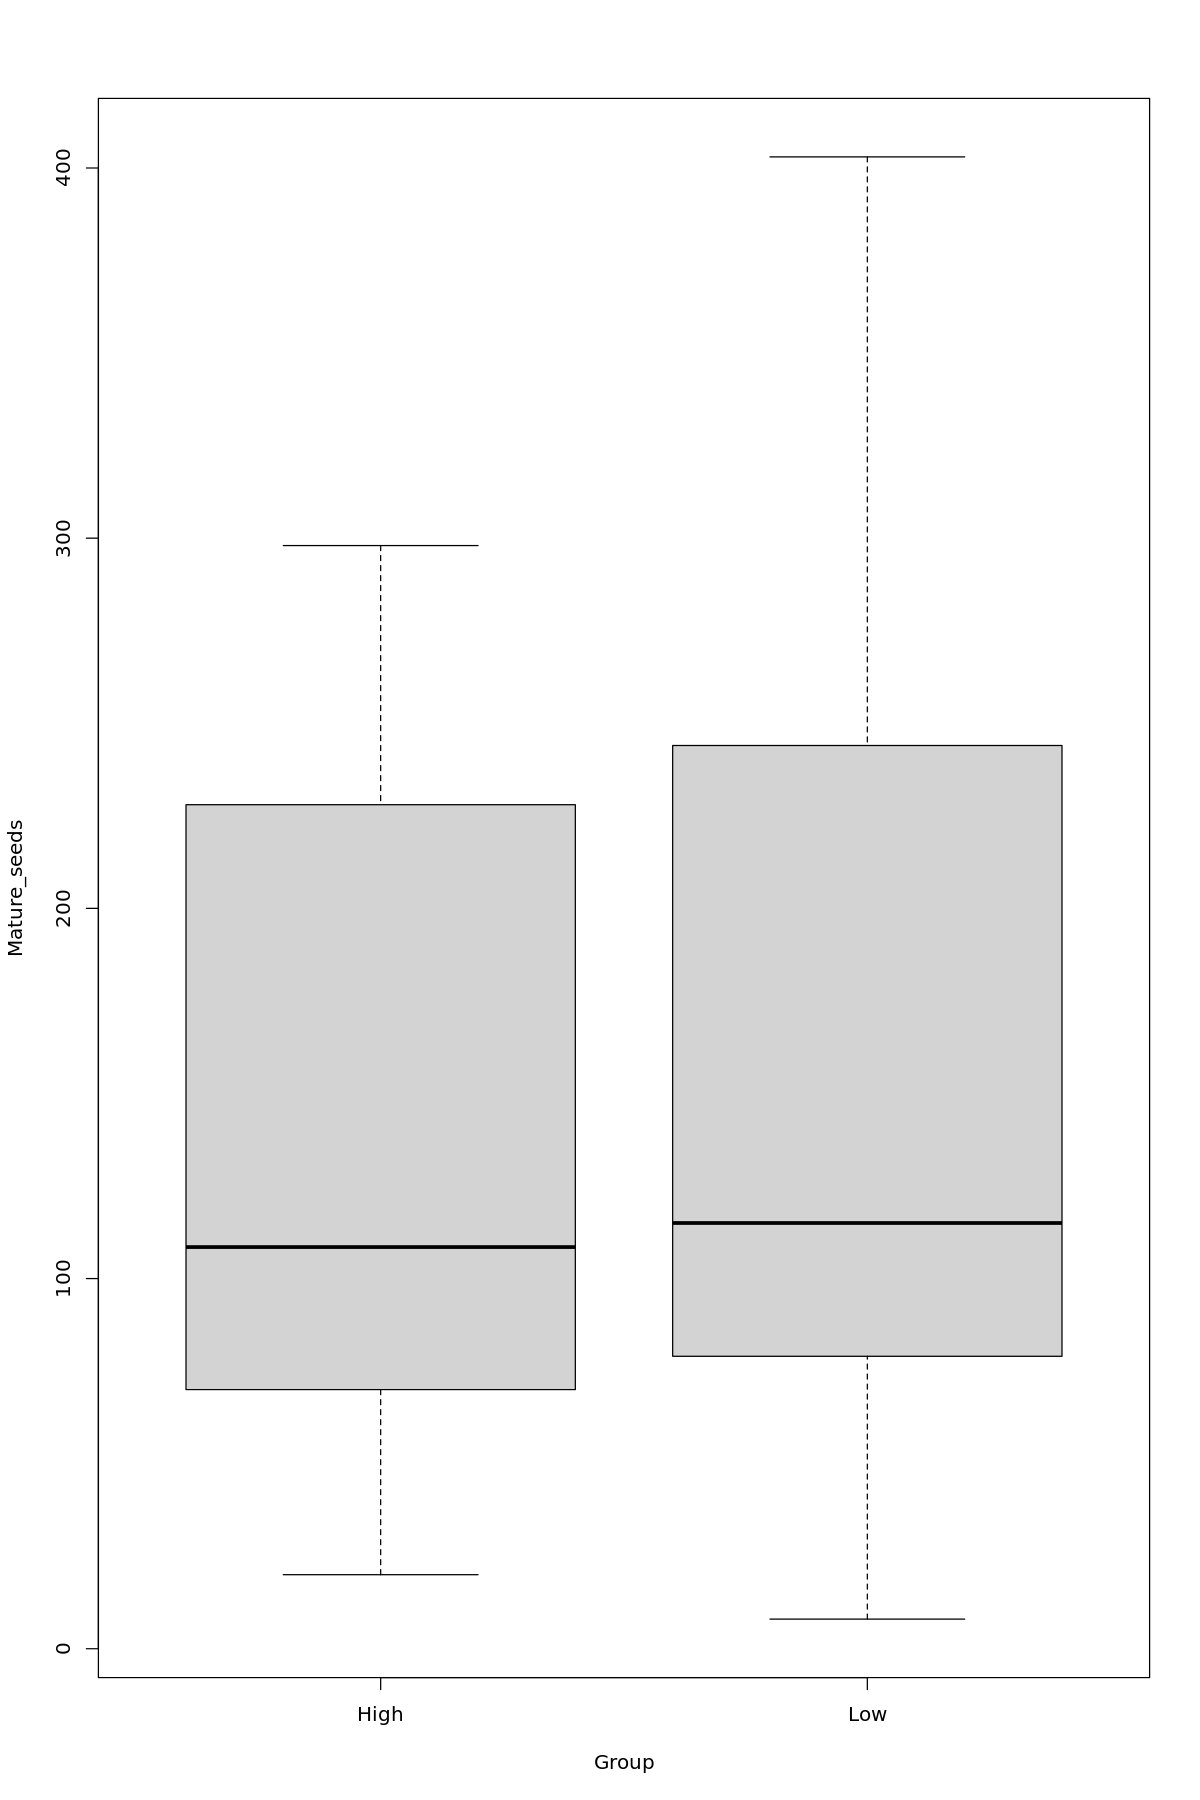

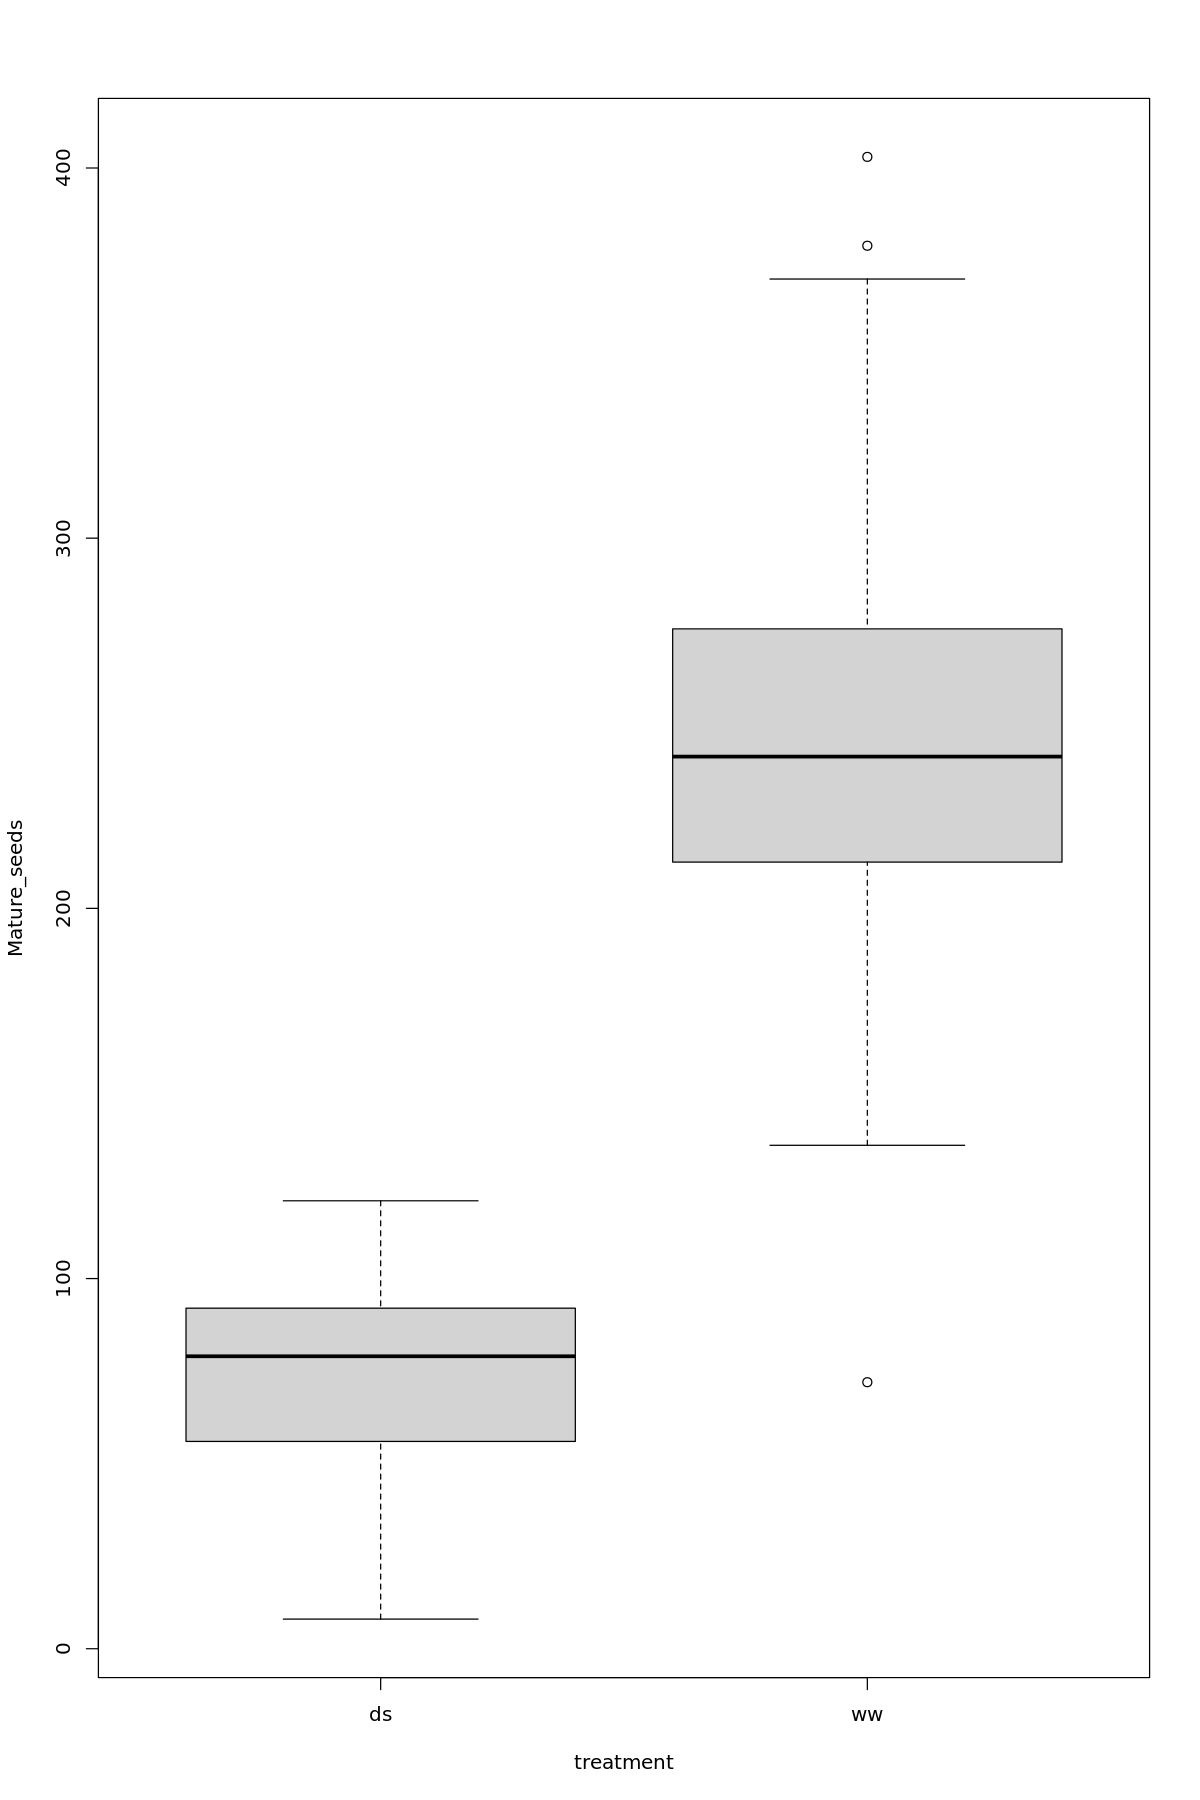

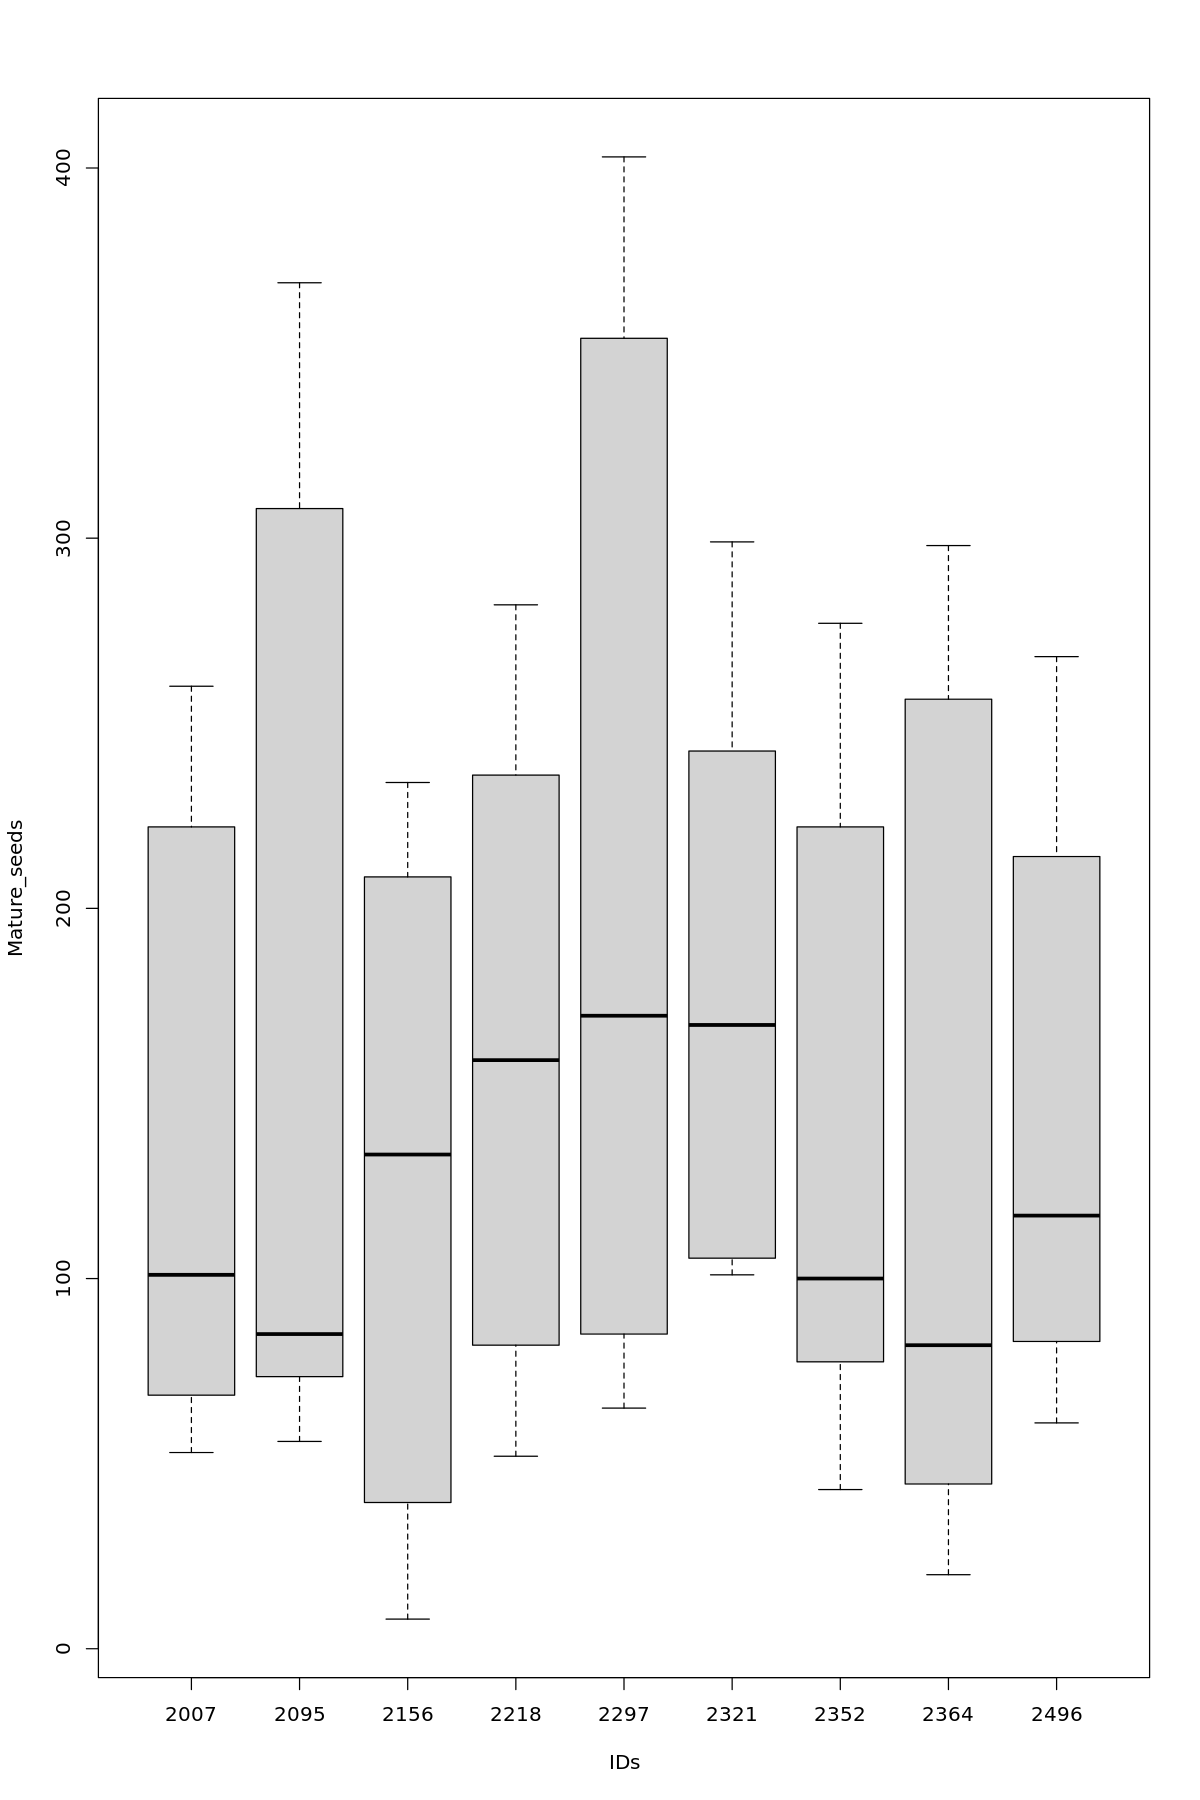

In [85]:
boxplot(Mature_seeds~Group, data=final.data)
boxplot(Mature_seeds~treatment, data=final.data)
boxplot(Mature_seeds~IDs, data=final.data)


Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


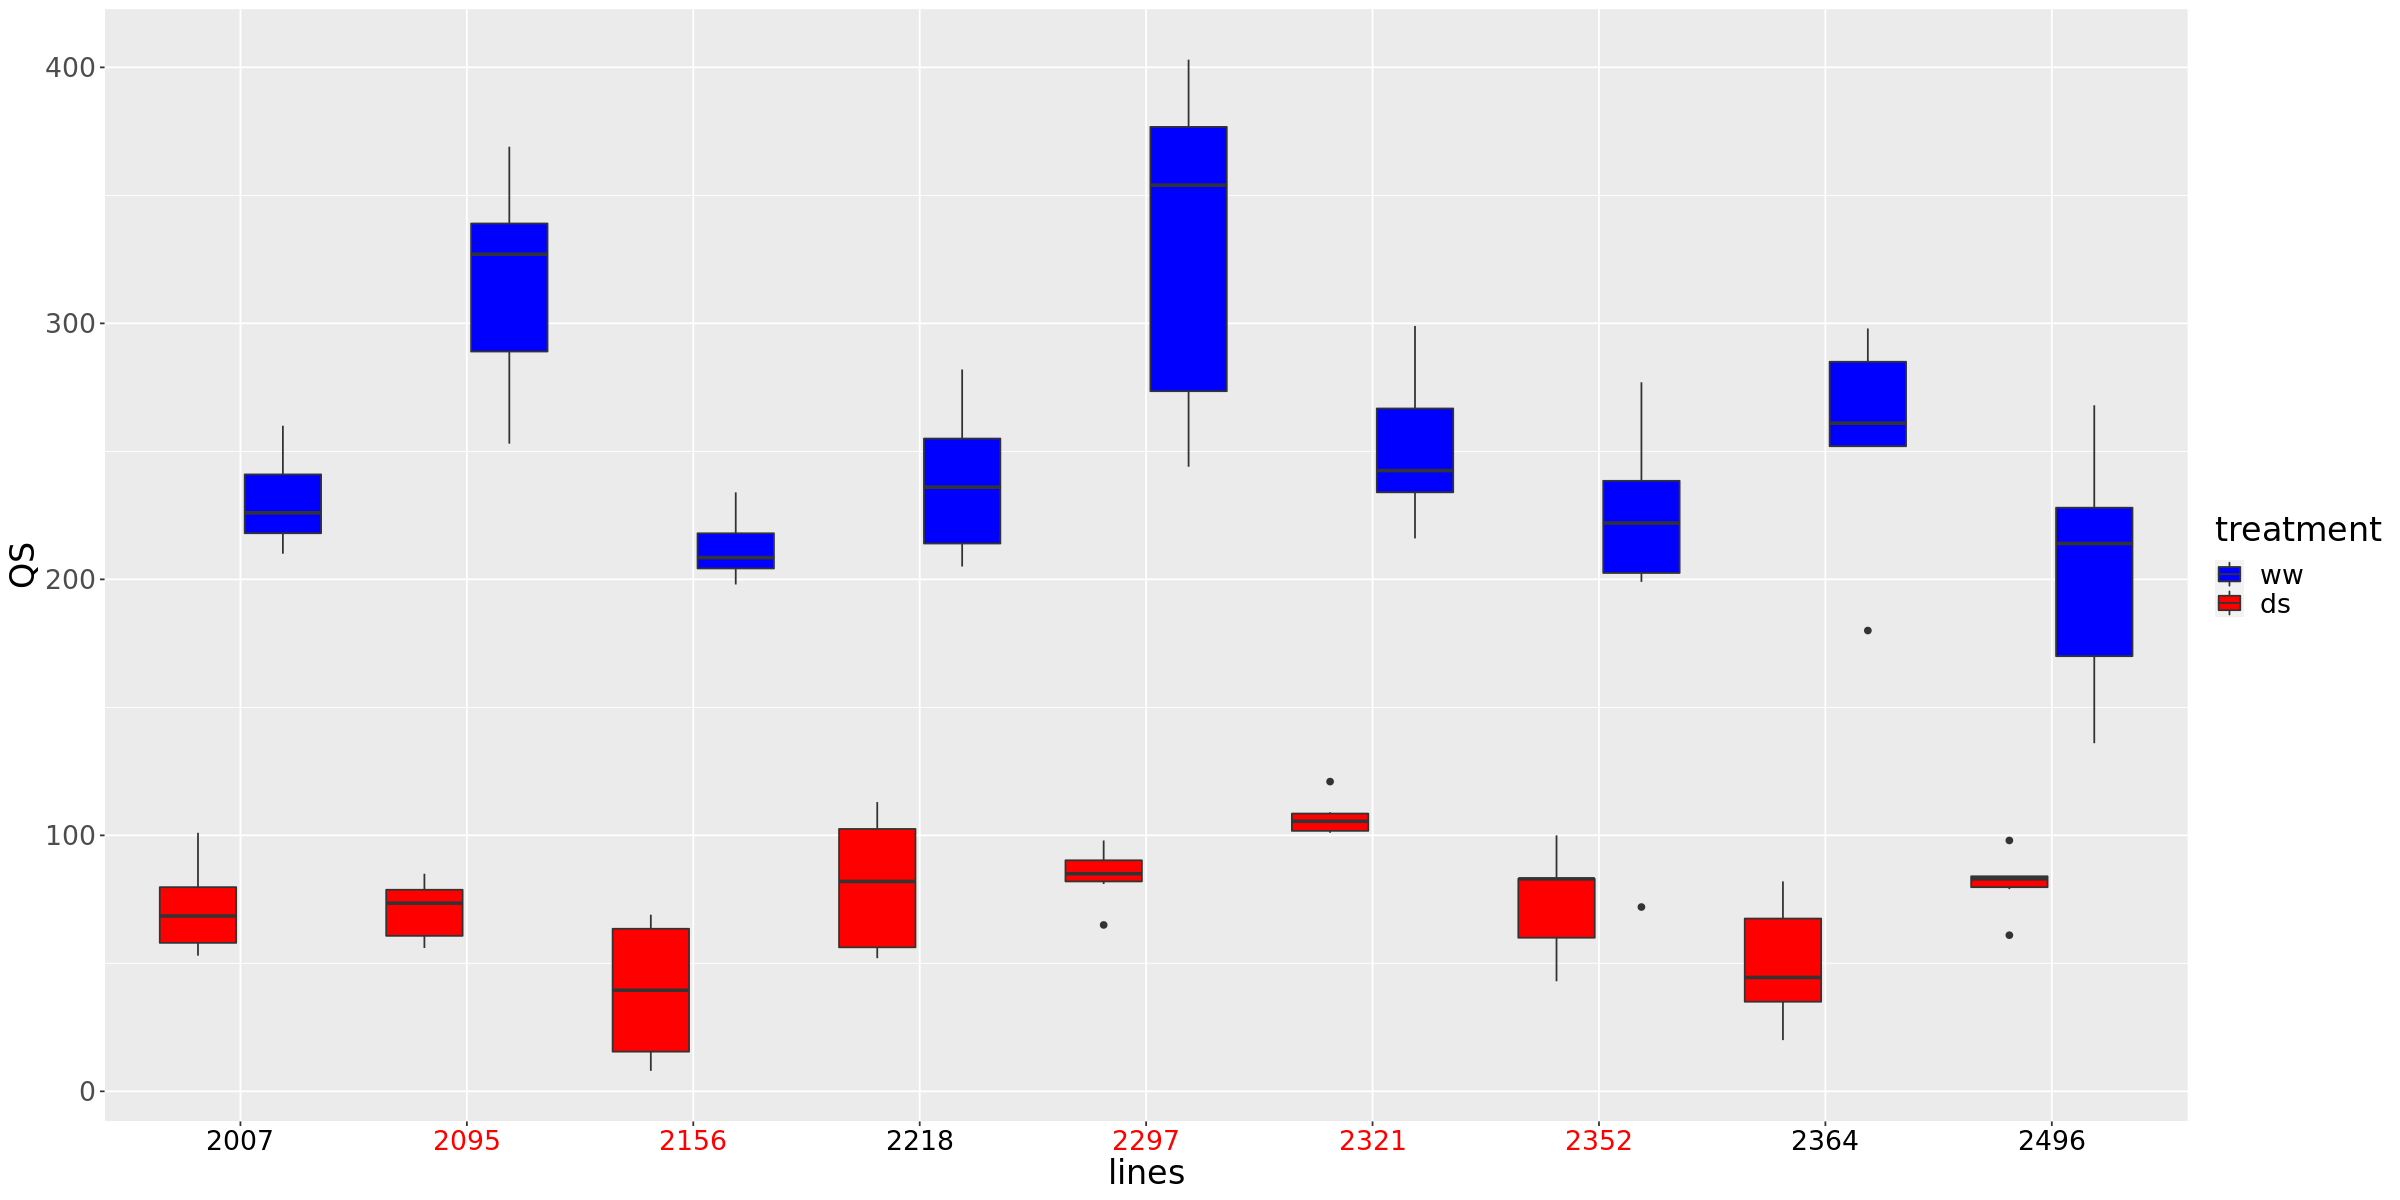

In [21]:
options(repr.plot.width=20, repr.plot.height=10)
QS <- ggplot(final.data, aes(x=IDs, y=Mature_seeds,  fill=treatment))+
       geom_boxplot()+
       theme(text=element_text(size = 20))+
       scale_fill_manual(breaks = final.data$treatment,
                    values = c("blue", "red")) +
        labs(y="QS", x="lines")+
theme(axis.text.x = element_text(colour=c("black","red","red","black","red","red","red","black","black")))



    print(QS)

In [81]:
MS_AN<- aov(Mature_seeds~treatment*IDs, data=final.data)
summary(MS_AN)


mood.medtest(Mature_seeds~Group, data=final.data, exact=TRUE)
MS_AN_G<- aov(Mature_seeds~treatment*Group, data=final.data)
summary(MS_AN_G)

tukey<- TukeyHSD(MS_AN, conf.levels=.95)
cld<- multcompLetters4(MS_AN, tukey)
cld



              Df Sum Sq Mean Sq F value   Pr(>F)    
treatment      1 795131  795131 657.985  < 2e-16 ***
IDs            8  66438    8305   6.872 5.91e-07 ***
treatment:IDs  8  49253    6157   5.095 3.33e-05 ***
Residuals     86 103925    1208                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


	Mood's median test

data:  Mature_seeds by Group
p-value = 1


                 Df Sum Sq Mean Sq F value Pr(>F)    
treatment         1 795131  795131 382.589 <2e-16 ***
Group             1   7403    7403   3.562  0.062 .  
treatment:Group   1   4384    4384   2.110  0.150    
Residuals       100 207829    2078                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

$treatment
 ww  ds 
"a" "b" 

$IDs
 2297  2095  2321  2218  2352  2007  2364  2496  2156 
  "a"  "ab" "abc" "bcd"  "cd" "bcd" "bcd"  "cd"   "d" 

$`treatment:IDs`
ww:2297 ww:2095 ww:2364 ww:2321 ww:2218 ww:2007 ww:2156 ww:2352 ww:2496 ds:2321 
    "a"    "ab"    "bc"    "bc"     "c"     "c"     "c"     "c"     "c"     "d" 
ds:2297 ds:2496 ds:2218 ds:2352 ds:2007 ds:2095 ds:2364 ds:2156 
    "d"     "d"     "d"     "d"     "d"     "d"     "d"     "d" 


In [84]:
summary_Qs<- group_by(final.data, treatment, IDs)%>%
summarise(mean=mean(Mature_seeds), sd=sd(Mature_seeds))%>%
arrange(desc(mean))
#View(summary_Qs)


cld_Qs<- as.data.frame.list(cld$`treatment:IDs`)
summary_Qs$tukey<- cld_Qs$Letters
View(summary_Qs)
write.table(summary_Qs,"summary_Int_QS_August.csv")

`summarise()` has grouped output by 'treatment'. You can override using the
`.groups` argument.


treatment IDs  mean      sd        tukey
1  ww        2297 331.00000 67.628396 a    
2  ww        2095 315.40000 45.153073 ab   
3  ww        2364 255.20000 45.877009 bc   
4  ww        2321 251.00000 30.252273 bc   
5  ww        2218 237.83333 29.708024 c    
6  ww        2007 231.00000 19.849433 c    
7  ww        2156 212.16667 13.090709 c    
8  ww        2352 205.50000 70.630730 c    
9  ww        2496 203.33333 48.623725 c    
10 ds        2321 107.16667  7.494442 d    
11 ds        2297  84.33333 11.236844 d    
12 ds        2496  81.33333 11.927559 d    
13 ds        2218  81.00000 27.173517 d    
14 ds        2352  73.80000 22.331592 d    
15 ds        2007  71.50000 18.108009 d    
16 ds        2095  70.83333 11.889772 d    
17 ds        2364  49.66667 24.221203 d    
18 ds        2156  39.16667 27.228049 d

In [14]:
QS_Int <- read.table("summary_Int_QS_August.csv")
QS_Int$IDs <- as.factor(QS_Int $IDs)
QS_Int$treatment <- as.factor(QS_Int $treatment)
str(QS_Int )
class(QS_Int)

'data.frame':	18 obs. of  5 variables:
 $ treatment: Factor w/ 2 levels "ds","ww": 2 2 2 2 2 2 2 2 2 1 ...
 $ IDs      : Factor w/ 9 levels "2007","2095",..: 5 2 8 6 4 1 3 7 9 6 ...
 $ mean     : num  331 315 255 251 238 ...
 $ sd       : num  67.6 45.2 45.9 30.3 29.7 ...
 $ tukey    : chr  "a" "ab" "bc" "bc" ...


[1] "data.frame"

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


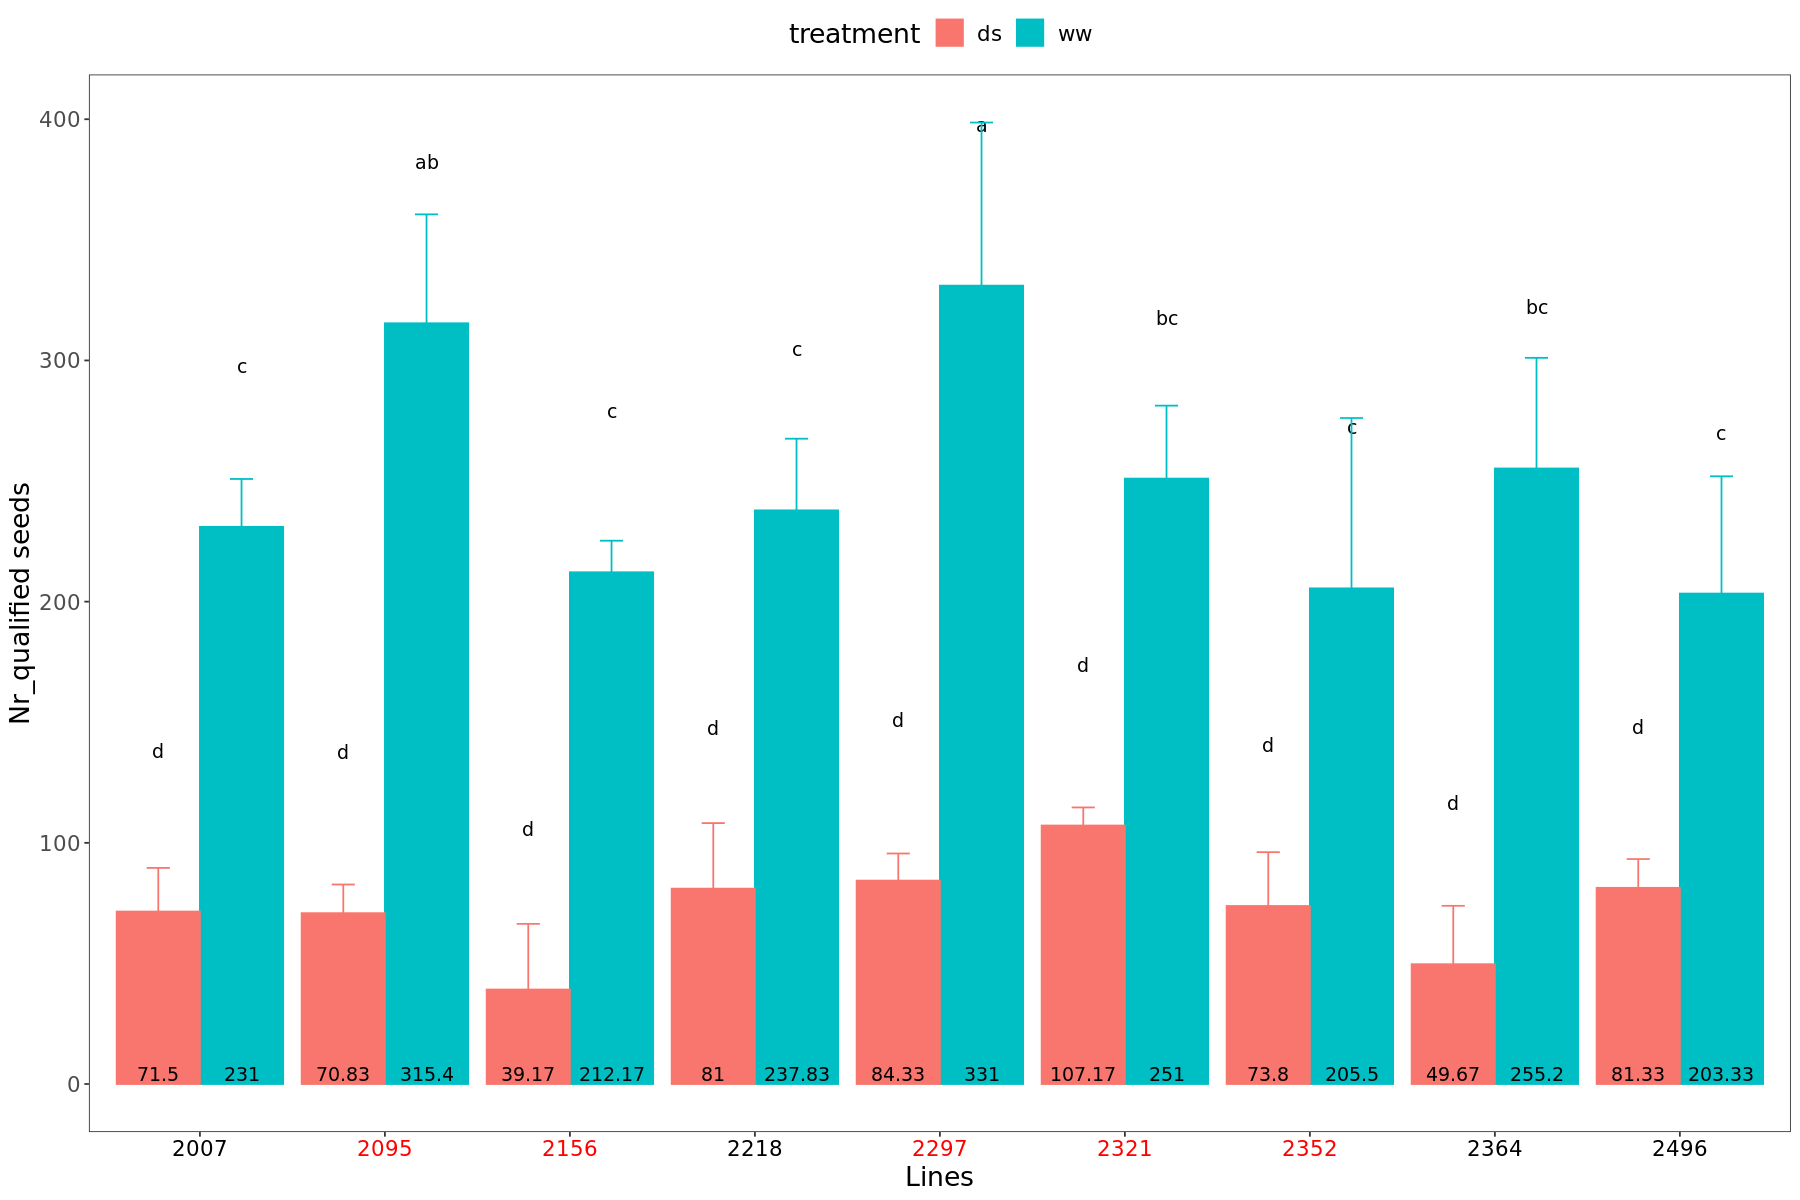

In [71]:
options(repr.plot.width=15,  repr.plot.height=10)
graph <- ggplot(data=as.data.frame(QS_Int), aes(x =IDs, y = mean, fill=treatment, colour=treatment)) + 
  geom_bar(stat = "identity", position = "dodge" ) +
  geom_text(aes(label= tukey),position=position_dodge(0.90),  vjust=-11, hjust=.5, size = 4, colour = "black") +
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), position = position_dodge(0.9), width = 0.25) +
 labs(x="Lines", y="Nr_qualified seeds") +
   theme_bw() +
theme(axis.text.x = element_text(colour=c("black","red","red","black","red","red","red","black","black")))+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
  theme(legend.position = "top")+
theme(text = element_text(size = 16))+
geom_text(aes(label=round(mean,2), y = 4), position = position_dodge(0.90), colour="black", size= 4)
print(graph)

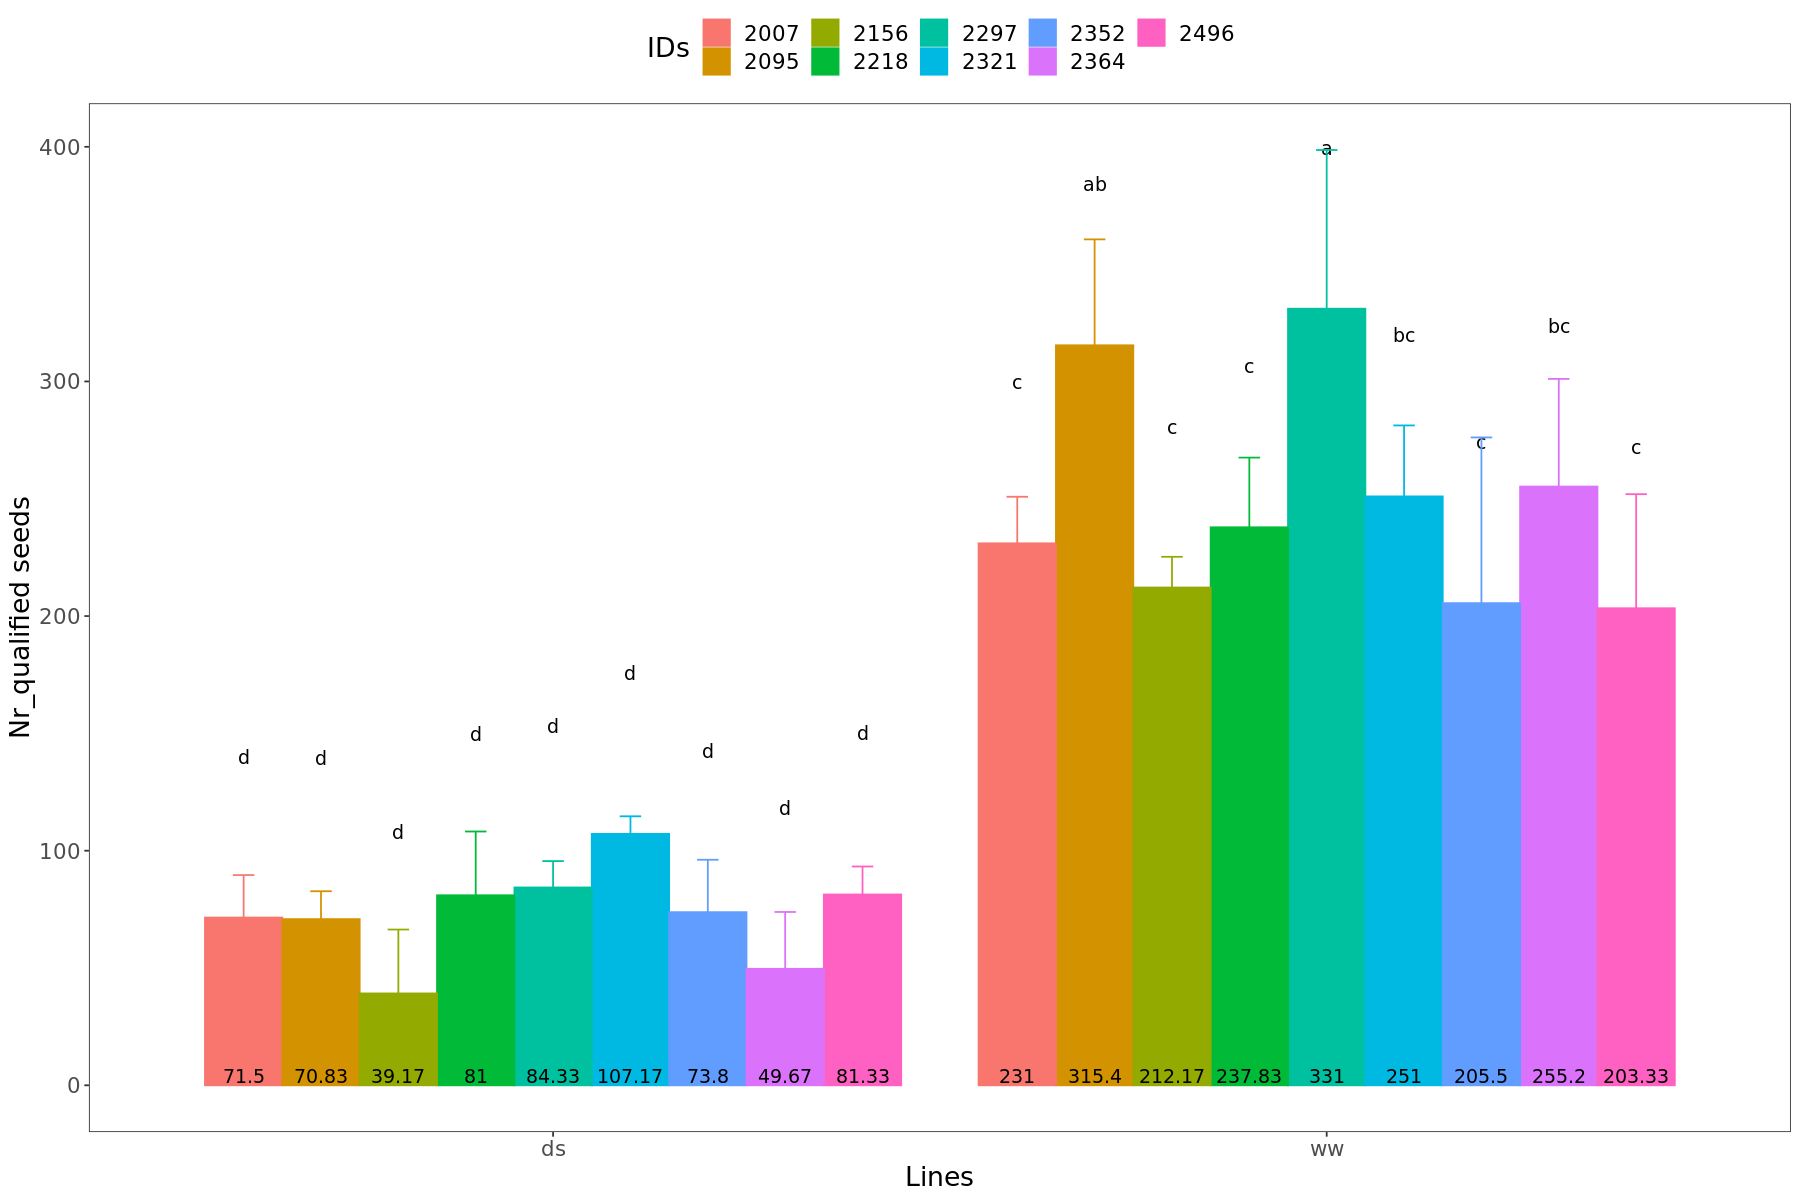

In [70]:
options(repr.plot.width=15,  repr.plot.height=10)

QS_Int_l <- ggplot(data=as.data.frame(QS_Int), aes(x =treatment, y = mean, fill=IDs, colour=IDs)) + 
  geom_bar(stat = "identity", position = "dodge" ) +
  geom_text(aes(label= tukey),position=position_dodge(0.90),  vjust=-11, hjust=.5, size = 4, colour = "black") +
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), position = position_dodge(0.9), width = 0.25) +
 labs(x="Lines", y="Nr_qualified seeds") +
   theme_bw() +
#theme(axis.text.x = element_text(colour=c("black","red","red","black","red","red","red","black","black")))+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
  theme(legend.position = "top")+
theme(text = element_text(size = 16))+
geom_text(aes(label=round(mean,2), y = 4), position = position_dodge(0.90), colour="black", size= 4)
print(QS_Int_l)

In [75]:
pwc <- final.data %>% 
  pairwise_t_test(
   Mature_seeds ~ Group, pool.sd = TRUE,
    p.adjust.method = "bonferroni")
pwc

.y.          group1 group2 n1 n2 p     p.signif p.adj p.adj.signif
1 Mature_seeds High   Low    46 58 0.291 ns       0.291 ns

# Number of the half-full ears(spikes)

In [19]:
str(final.data)

'data.frame':	104 obs. of  23 variables:
 $ X                 : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Unit              : int  121 123 125 126 130 131 133 135 136 138 ...
 $ experiment        : chr  "V22001" "V22001" "V22001" "V22001" ...
 $ IDs               : Factor w/ 9 levels "2007","2095",..: 4 4 3 5 4 7 3 4 8 7 ...
 $ treatment         : Factor w/ 2 levels "ds","ww": 2 1 1 1 2 1 1 2 1 1 ...
 $ BBCH              : chr  "92" "92" "92" "92" ...
 $ Collection.date   : chr  "08/12/22" "08/08/22" "08/09/22" "08/08/22" ...
 $ max.Height        : num  91.2 78 83 61 102 ...
 $ Biomass           : num  14.75 4.72 7.76 5.61 14.3 ...
 $ Shoots            : num  10 5 4 7 9 3 5 9 4 3 ...
 $ Shoots_with_ear   : num  10 5 3 6 9 3.5 4 9 2 3 ...
 $ Shoots_without_ear: num  0 0 1 1 0 0 1 0 2 0 ...
 $ Nr_ears           : num  10 5 3 6 9 3 4 9 2 3 ...
 $ Full_ear          : num  10 3 1 5 9 3 4 9 2 3 ...
 $ Half_ear          : num  0 2 0 1 0 0 0 0 0 0 ...
 $ Weight_ear        : num  15.43 3.55 1.21 3.36 10

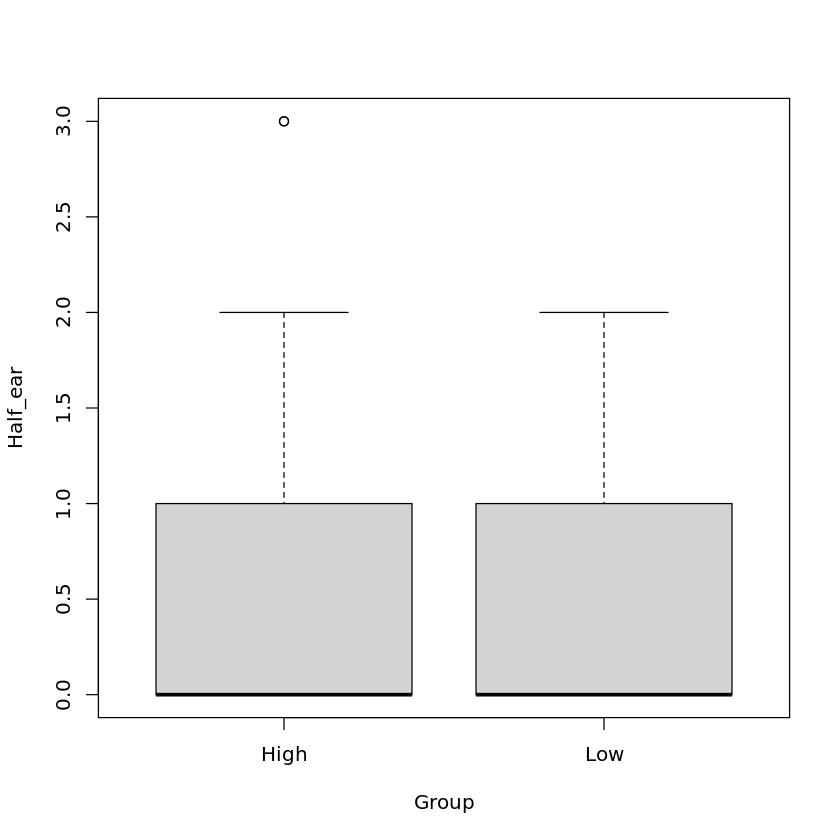

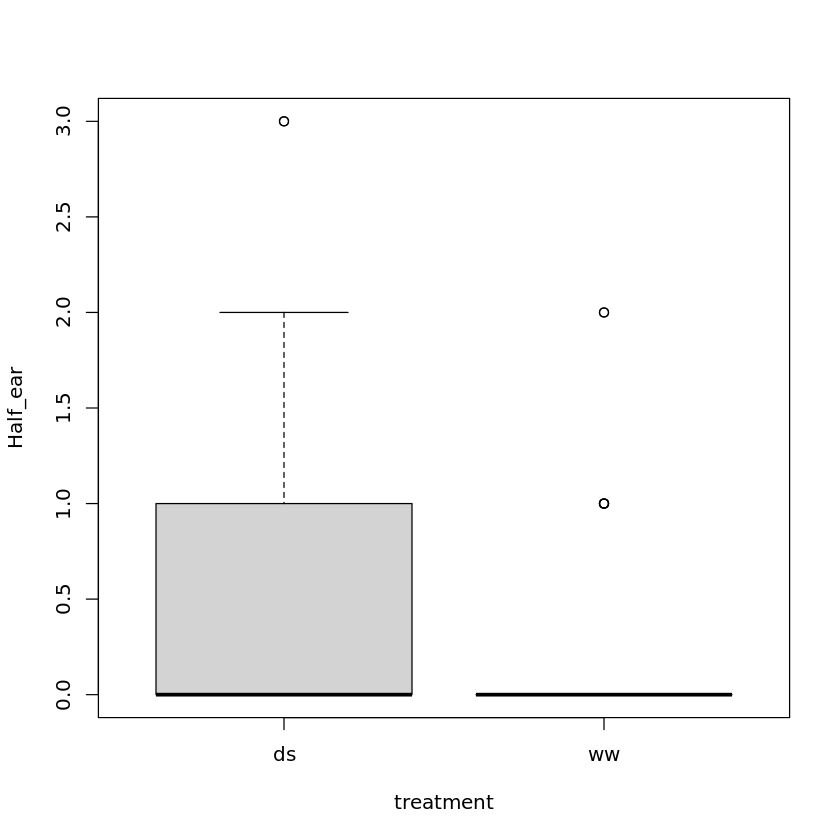

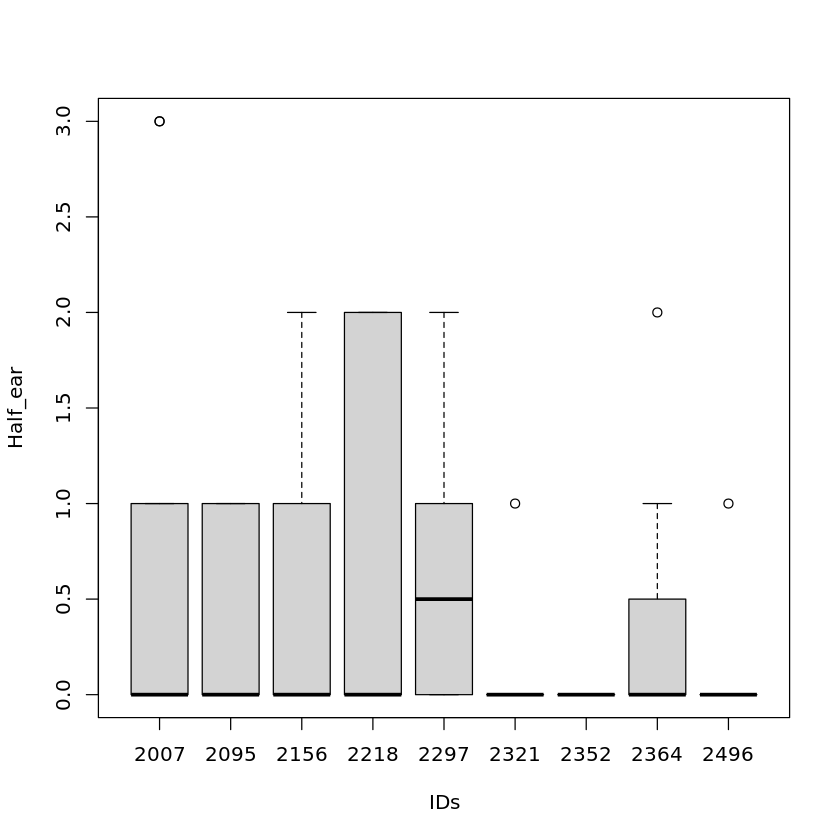

In [5]:
boxplot(Half_ear~Group, data=final.data)
boxplot(Half_ear~treatment, data=final.data)
boxplot(Half_ear~IDs, data=final.data)

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


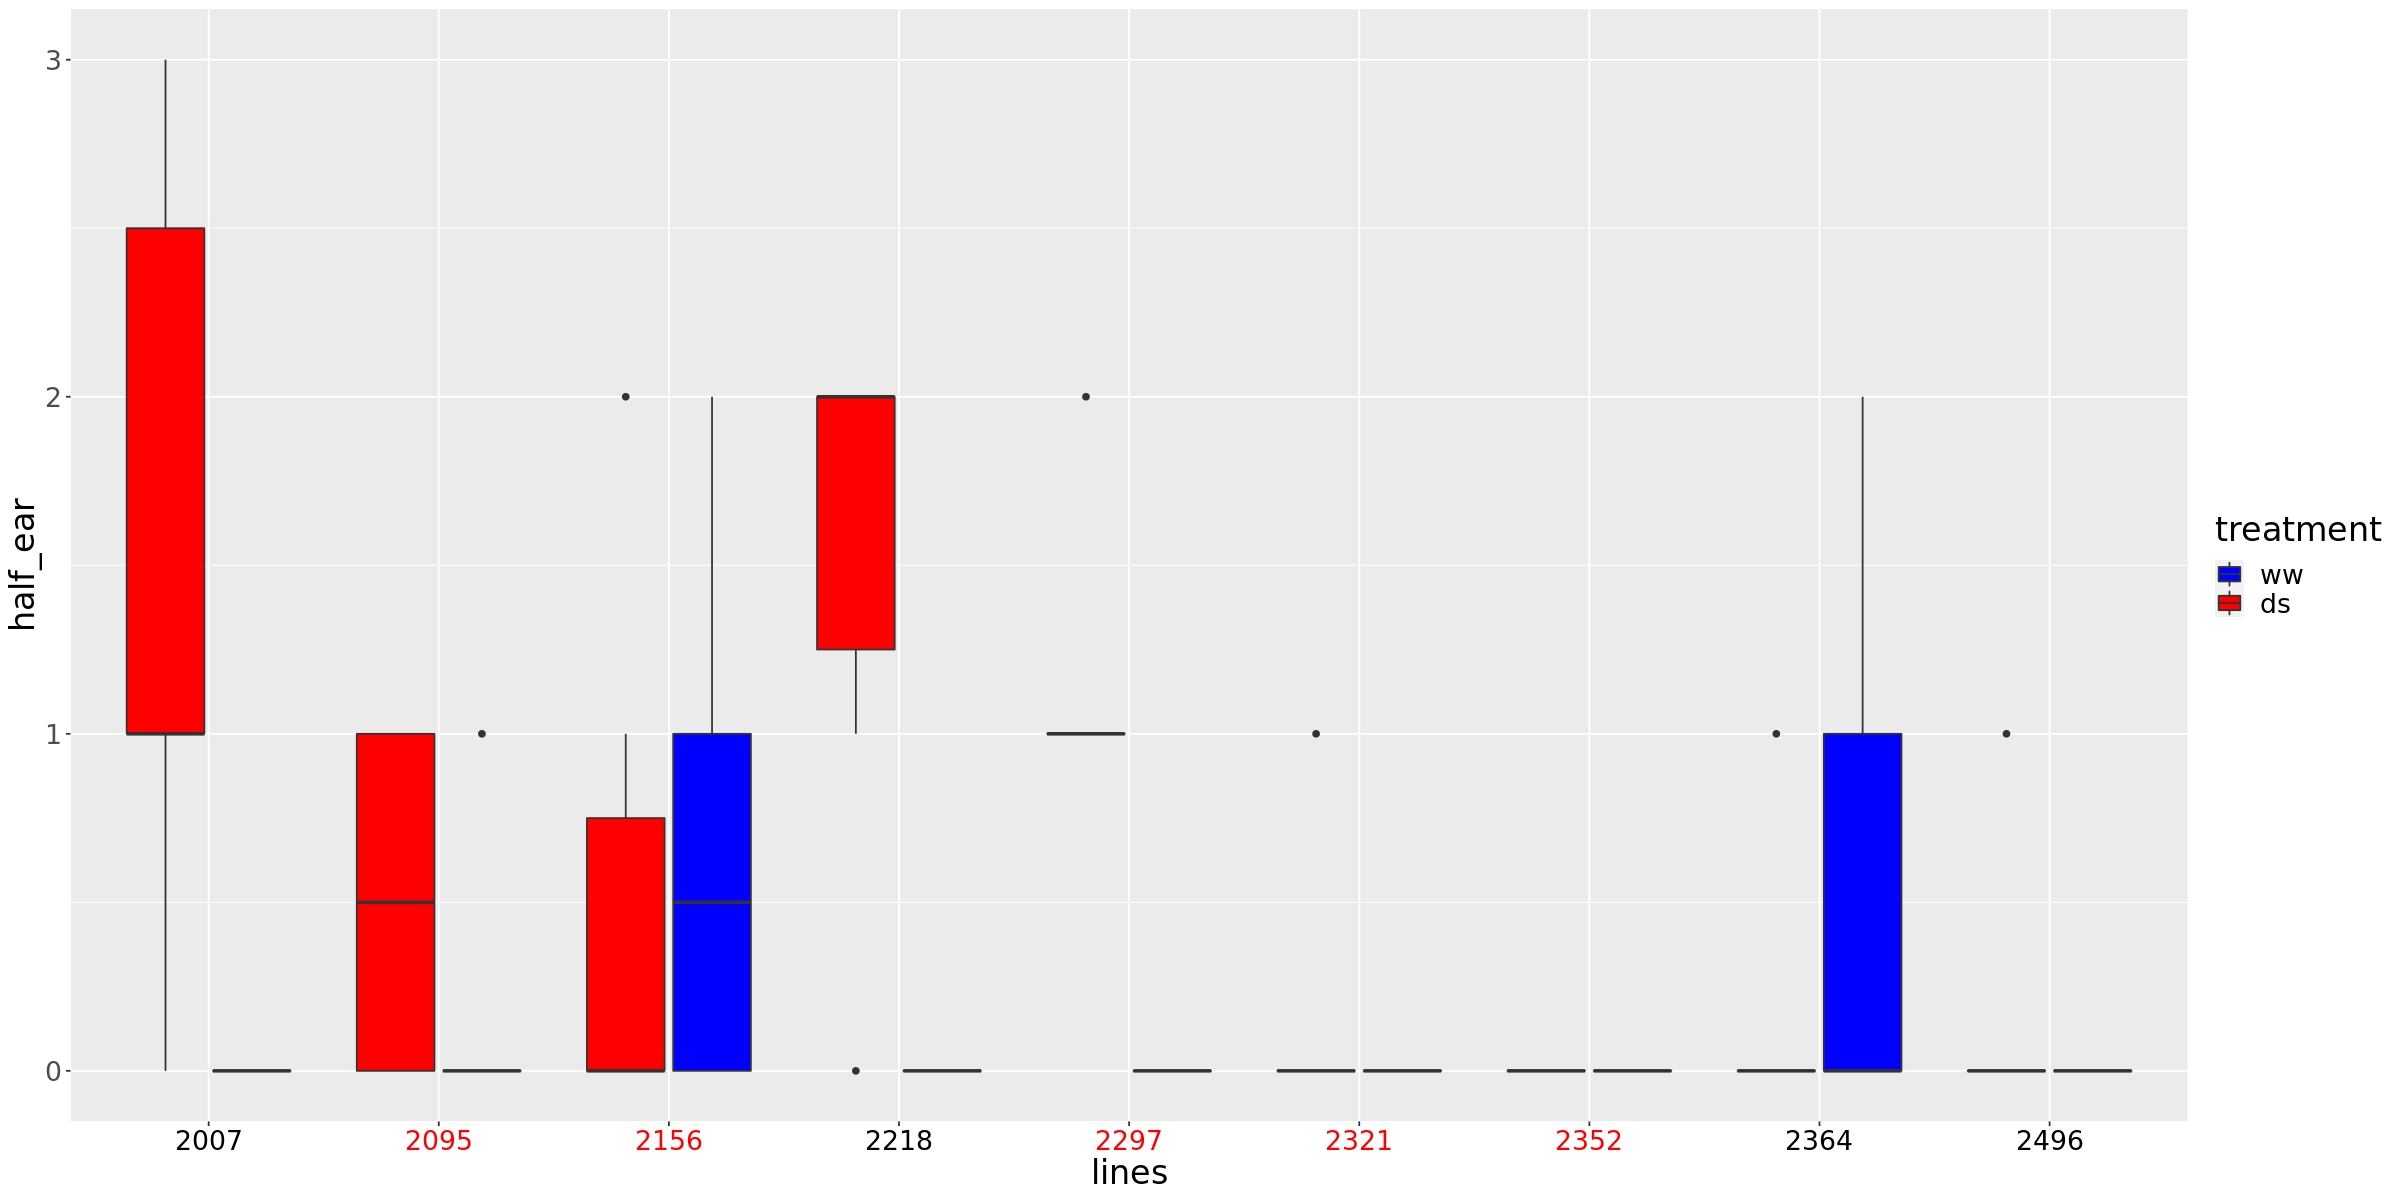

In [25]:
options(repr.plot.width=20, repr.plot.height=10)
HE <- ggplot(final.data, aes(x=IDs, y=Half_ear,  fill=treatment))+
       geom_boxplot()+
       theme(text=element_text(size = 20))+
       scale_fill_manual(breaks = final.data$treatment,
                    values = c("blue", "red")) +
        labs(y="half_ear", x="lines")+
theme(axis.text.x = element_text(colour=c("black","red","red","black","red","red","red","black","black")))



    print(HE)

In [32]:
HE_AN<- aov(Half_ear~treatment*IDs, data=final.data)
summary(HE_AN)
 tukey<- TukeyHSD(HE_AN, conf.levels=.95)
cld<- multcompLetters4(HE_AN, tukey) 
cld

              Df Sum Sq Mean Sq F value   Pr(>F)    
treatment      1  6.105   6.105  19.688 2.69e-05 ***
IDs            8  8.060   1.008   3.249   0.0028 ** 
treatment:IDs  8 12.207   1.526   4.921 5.01e-05 ***
Residuals     86 26.667   0.310                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

$treatment
 ds  ww 
"a" "b" 

$IDs
2007 2218 2156 2297 2095 2364 2321 2496 2352 
 "a" "ab" "ab" "ab" "ab" "ab" "ab" "ab"  "b" 

$`treatment:IDs`
ds:2007 ds:2218 ds:2297 ww:2156 ww:2364 ds:2095 ds:2156 ww:2095 ds:2321 ds:2364 
    "a"     "a"    "ab"   "abc"   "abc"   "abc"   "abc"    "bc"    "bc"    "bc" 
ds:2496 ww:2007 ww:2218 ww:2297 ww:2321 ds:2352 ww:2352 ww:2496 
   "bc"    "bc"     "c"     "c"     "c"    "bc"     "c"     "c" 


In [38]:
HE_AN_G<- aov(Half_ear~treatment*Group, data=final.data)
summary(HE_AN_G)

                 Df Sum Sq Mean Sq F value  Pr(>F)    
treatment         1   6.10   6.105  13.475 0.00039 ***
Group             1   0.67   0.673   1.485 0.22593    
treatment:Group   1   0.96   0.958   2.114 0.14910    
Residuals       100  45.30   0.453                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [37]:
pwc1 <- final.data %>% 
pairwise_t_test(Half_ear~treatment, pool.sd = TRUE, p.adjust.method = "bonferroni")
pwc1


pwc2 <- final.data %>% 
pairwise_t_test(Half_ear~Group, pool.sd = TRUE, p.adjust.method = "bonferroni")
pwc2

.y.      group1 group2 n1 n2 p        p.signif p.adj    p.adj.signif
1 Half_ear ds     ww     53 51 0.000427 ***      0.000427 ***

.y.      group1 group2 n1 n2 p     p.signif p.adj p.adj.signif
1 Half_ear High   Low    46 58 0.225 ns       0.225 ns

In [49]:
summary_HE<- group_by(final.data, treatment, IDs) %>%
summarise(mean=(round(mean(Half_ear),2)), sd=sd(Half_ear)) %>%
arrange(desc(mean))
View(summary_HE)


cld_HE<- as.data.frame.list(cld$`treatment:IDs`)
summary_HE$tukey<- cld_HE$Letters
View(summary_HE)
write.table(summary_HE, "summary_int_HE_August.csv")

`summarise()` has grouped output by 'treatment'. You can override using the
`.groups` argument.


treatment IDs  mean sd       
1  ds        2007 1.50 1.2247449
2  ds        2218 1.50 0.8366600
3  ds        2297 1.17 0.4082483
4  ww        2156 0.67 0.8164966
5  ww        2364 0.60 0.8944272
6  ds        2095 0.50 0.5477226
7  ds        2156 0.50 0.8366600
8  ww        2095 0.20 0.4472136
9  ds        2321 0.17 0.4082483
10 ds        2364 0.17 0.4082483
11 ds        2496 0.17 0.4082483
12 ds        2352 0.00 0.0000000
13 ww        2007 0.00 0.0000000
14 ww        2218 0.00 0.0000000
15 ww        2297 0.00 0.0000000
16 ww        2321 0.00 0.0000000
17 ww        2352 0.00 0.0000000
18 ww        2496 0.00 0.0000000

treatment IDs  mean sd        tukey
1  ds        2007 1.50 1.2247449 a    
2  ds        2218 1.50 0.8366600 a    
3  ds        2297 1.17 0.4082483 ab   
4  ww        2156 0.67 0.8164966 abc  
5  ww        2364 0.60 0.8944272 abc  
6  ds        2095 0.50 0.5477226 abc  
7  ds        2156 0.50 0.8366600 abc  
8  ww        2095 0.20 0.4472136 bc   
9  ds        2321 0.17 0.4082483 bc   
10 ds        2364 0.17 0.4082483 bc   
11 ds        2496 0.17 0.4082483 bc   
12 ds        2352 0.00 0.0000000 bc   
13 ww        2007 0.00 0.0000000 c    
14 ww        2218 0.00 0.0000000 c    
15 ww        2297 0.00 0.0000000 c    
16 ww        2321 0.00 0.0000000 bc   
17 ww        2352 0.00 0.0000000 c    
18 ww        2496 0.00 0.0000000 c

In [6]:
HE_Int<- read.table( "summary_int_HE_August.csv")
HE_Int$IDs <- as.factor(HE_Int $IDs)
HE_Int$treatment <- as.factor(HE_Int $treatment)
str(HE_Int)

'data.frame':	18 obs. of  5 variables:
 $ treatment: Factor w/ 2 levels "ds","ww": 1 1 1 2 2 1 1 2 1 1 ...
 $ IDs      : Factor w/ 9 levels "2007","2095",..: 1 4 5 3 8 2 3 2 6 8 ...
 $ mean     : num  1.5 1.5 1.17 0.67 0.6 0.5 0.5 0.2 0.17 0.17 ...
 $ sd       : num  1.225 0.837 0.408 0.816 0.894 ...
 $ tukey    : chr  "a" "a" "ab" "abc" ...


Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


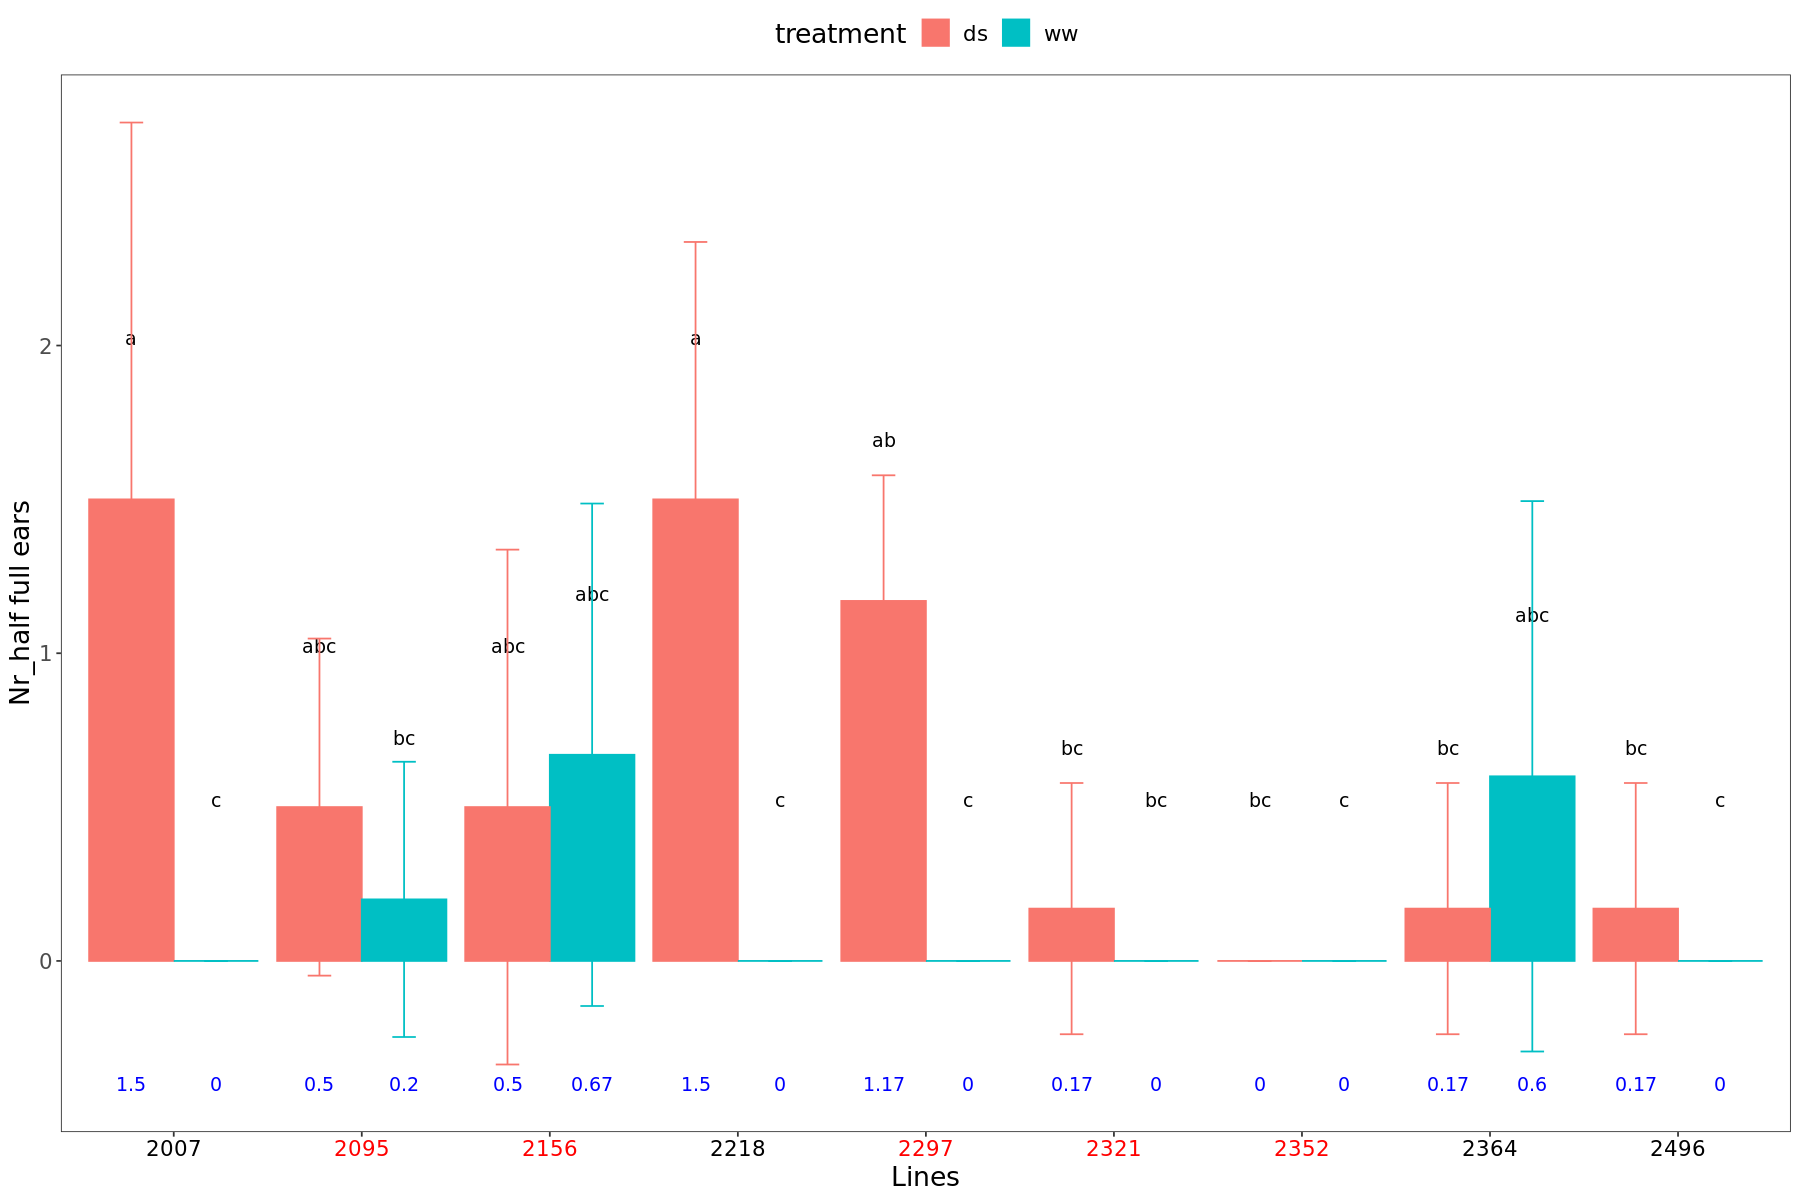

In [12]:
options(repr.plot.width=15,  repr.plot.height=10)
HE <- ggplot(data=as.data.frame(HE_Int), aes(x =IDs, y = mean, fill=treatment, colour=treatment)) + 
  geom_bar(stat = "identity", position = "dodge" ) +
  geom_text(aes(label= tukey),position=position_dodge(0.90),  vjust=-11, hjust=.5, size = 4, colour = "black") +
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), position = position_dodge(0.9), width = 0.25) +
 labs(x="Lines", y="Nr_half full ears") +
   theme_bw() +
theme(axis.text.x = element_text(colour=c("black","red","red","black","red","red","red","black","black")))+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
  theme(legend.position = "top")+
theme(text = element_text(size = 16))+
geom_text(aes(label=round(mean,2), y = -0.4), position = position_dodge(0.90), colour="blue", size= 4)
print(HE)

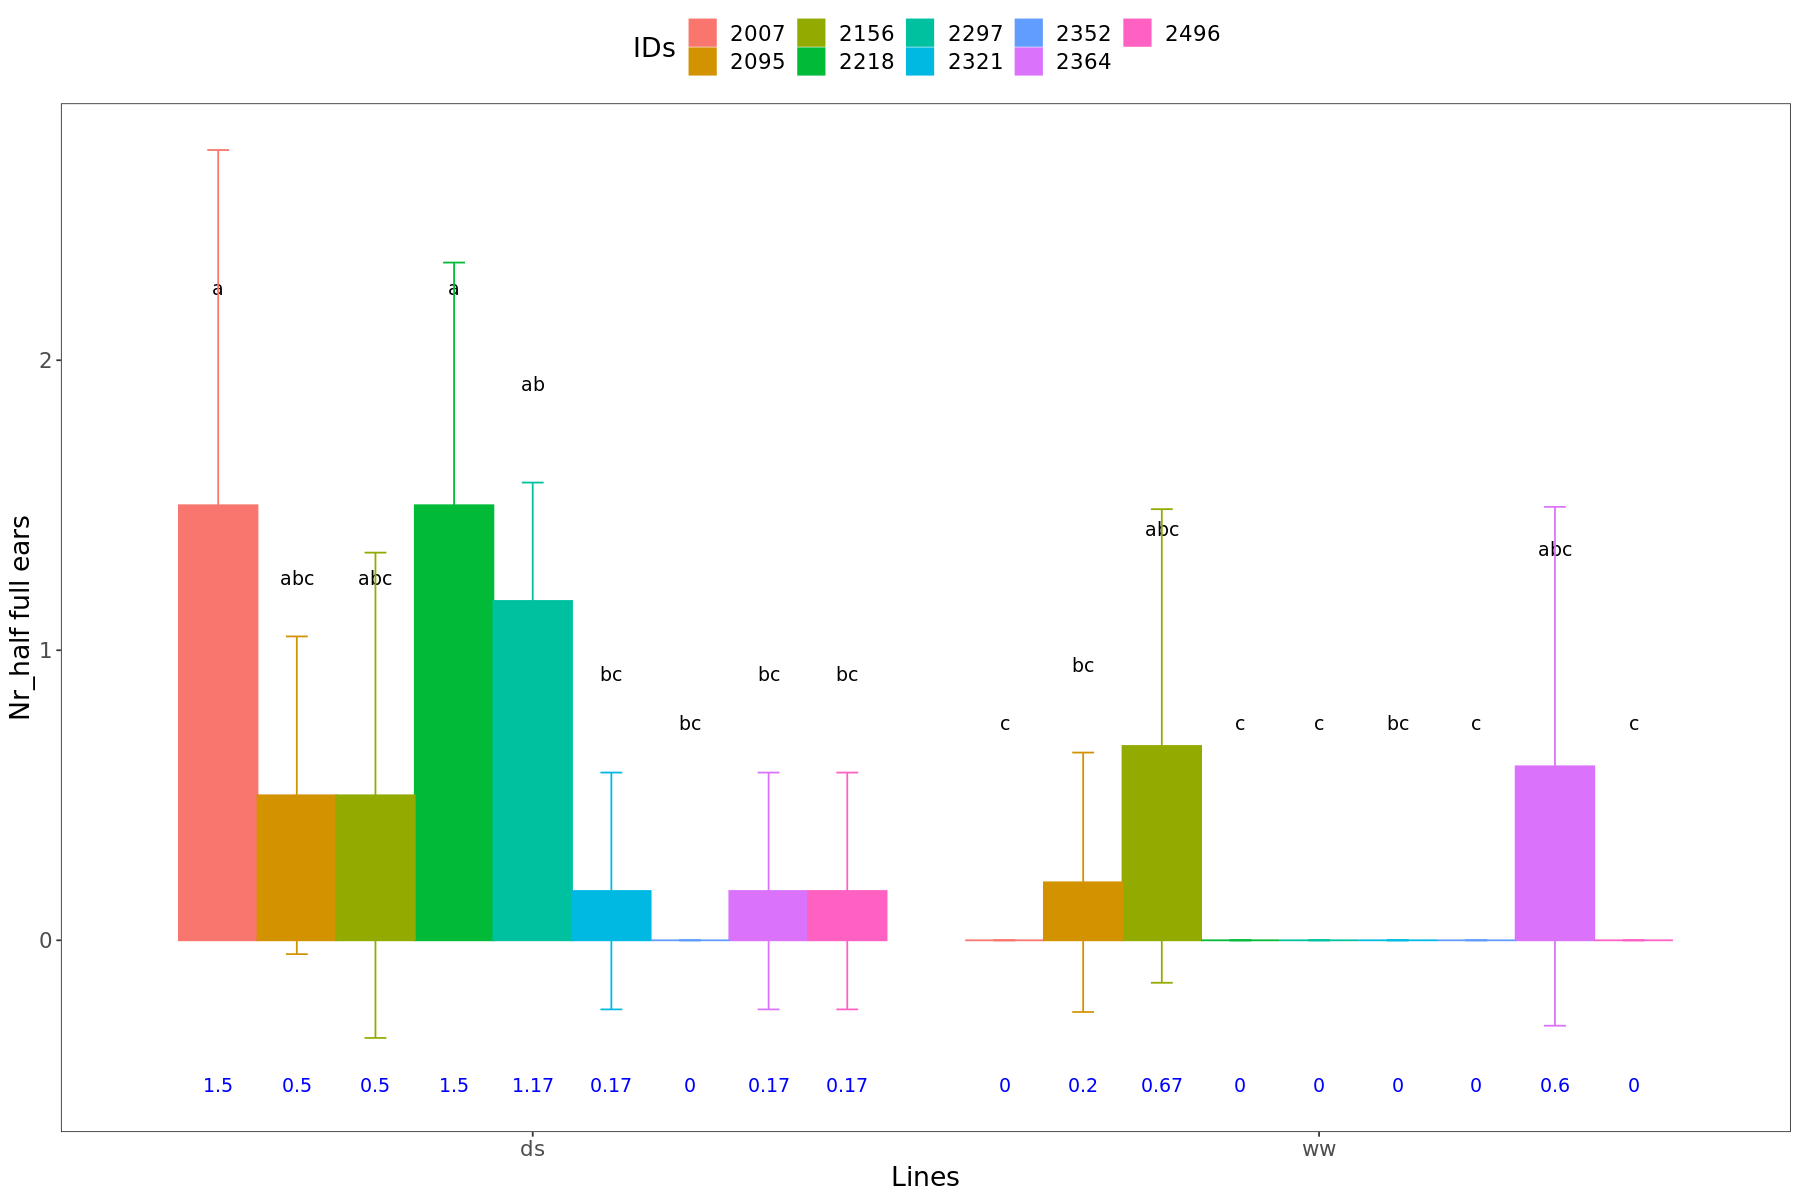

In [11]:
options(repr.plot.width=15,  repr.plot.height=10)
HEl <- ggplot(data=as.data.frame(HE_Int), aes(x =treatment, y = mean, fill=IDs, colour=IDs)) + 
  geom_bar(stat = "identity", position = "dodge" ) +
  geom_text(aes(label= tukey),position=position_dodge(0.90),  vjust=-15, hjust=.5, size = 4, colour = "black") +
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), position = position_dodge(0.9), width = 0.25) +
 labs(x="Lines", y="Nr_half full ears") +
   theme_bw() +
#theme(axis.text.x = element_text(colour=c("black","red","red","black","red","red","red","black","black")))+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
  theme(legend.position = "top")+
theme(text = element_text(size = 16))+
geom_text(aes(label=round(mean,2), y = -0.5), position = position_dodge(0.90), colour="blue", size= 4)
print(HEl)

# Number of the full ears

In [13]:
str(final.data)

'data.frame':	104 obs. of  23 variables:
 $ X                 : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Unit              : int  121 123 125 126 130 131 133 135 136 138 ...
 $ experiment        : chr  "V22001" "V22001" "V22001" "V22001" ...
 $ IDs               : Factor w/ 9 levels "2007","2095",..: 4 4 3 5 4 7 3 4 8 7 ...
 $ treatment         : Factor w/ 2 levels "ds","ww": 2 1 1 1 2 1 1 2 1 1 ...
 $ BBCH              : chr  "92" "92" "92" "92" ...
 $ Collection.date   : chr  "08/12/22" "08/08/22" "08/09/22" "08/08/22" ...
 $ max.Height        : num  91.2 78 83 61 102 ...
 $ Biomass           : num  14.75 4.72 7.76 5.61 14.3 ...
 $ Shoots            : num  10 5 4 7 9 3 5 9 4 3 ...
 $ Shoots_with_ear   : num  10 5 3 6 9 3.5 4 9 2 3 ...
 $ Shoots_without_ear: num  0 0 1 1 0 0 1 0 2 0 ...
 $ Nr_ears           : num  10 5 3 6 9 3 4 9 2 3 ...
 $ Full_ear          : num  10 3 1 5 9 3 4 9 2 3 ...
 $ Half_ear          : num  0 2 0 1 0 0 0 0 0 0 ...
 $ Weight_ear        : num  15.43 3.55 1.21 3.36 10

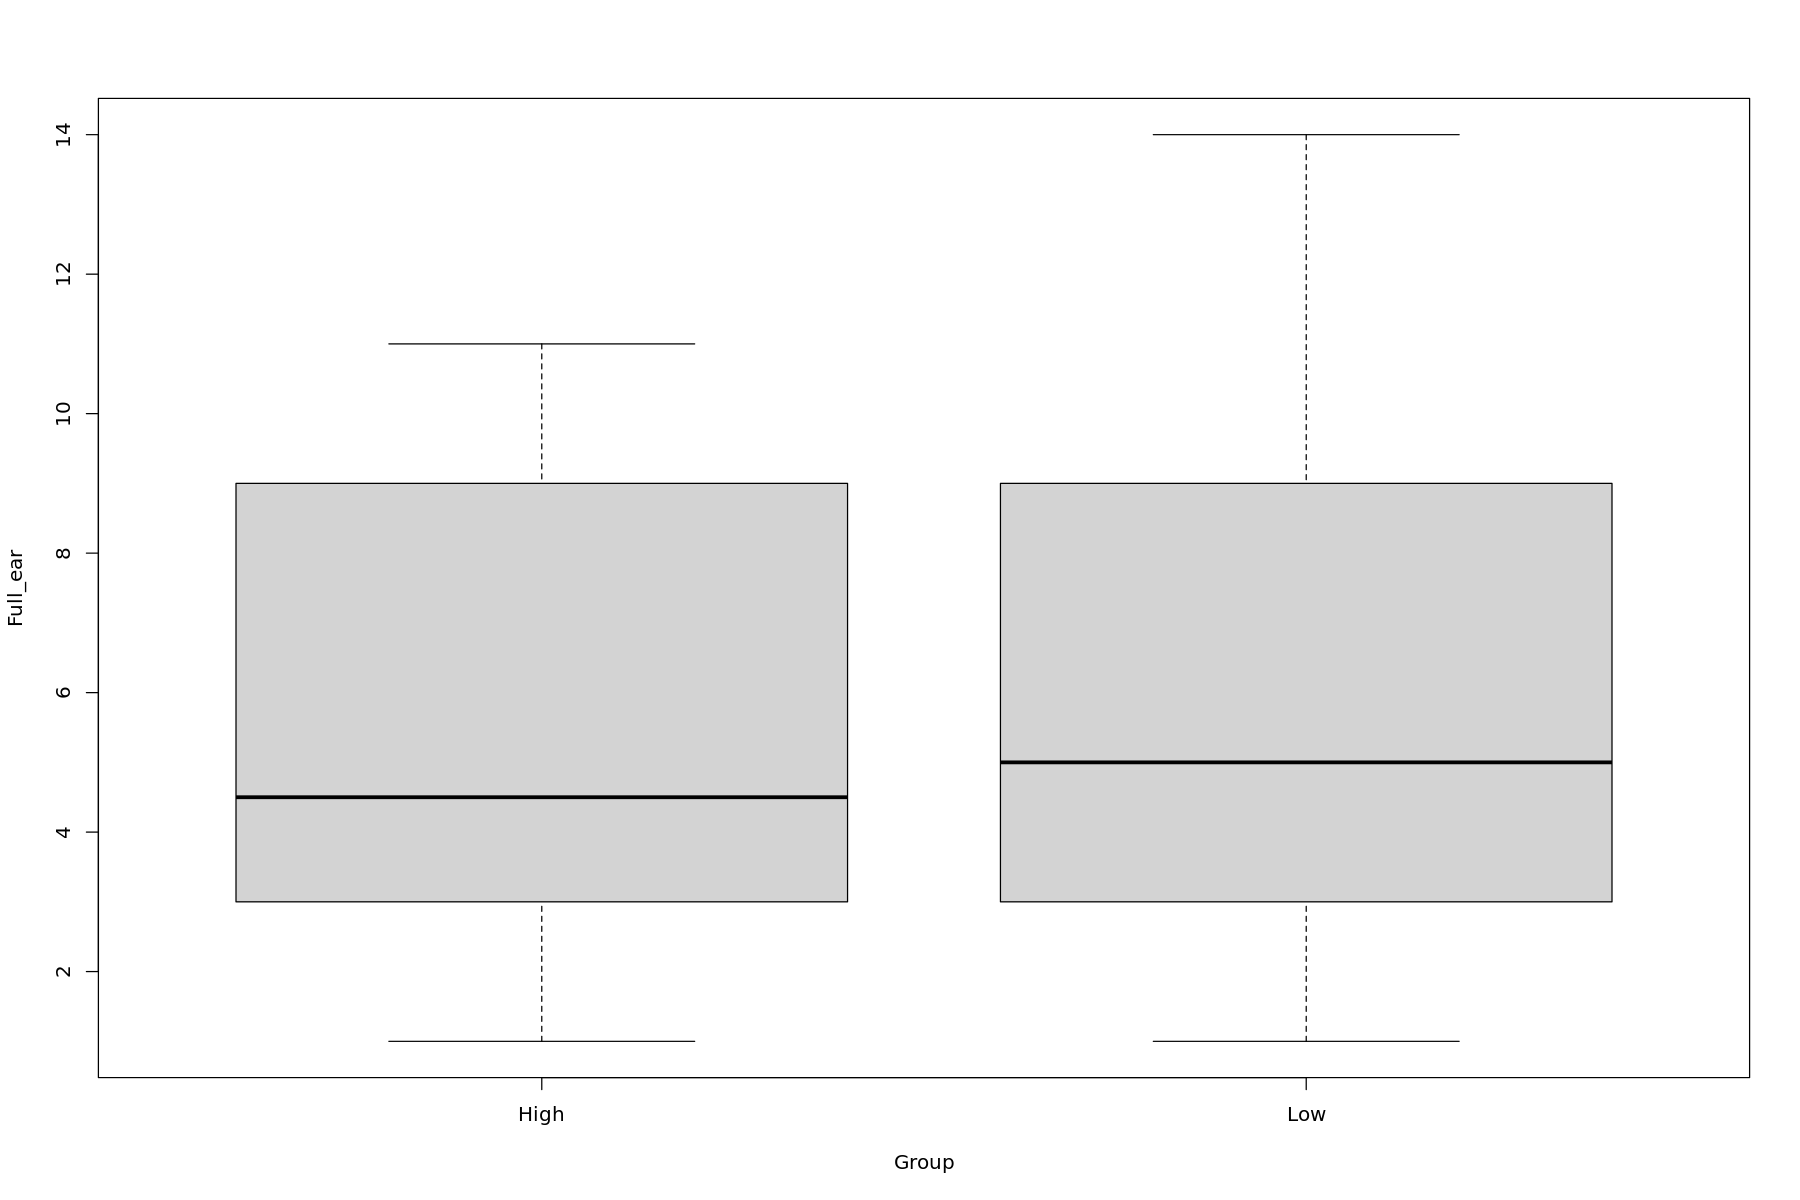

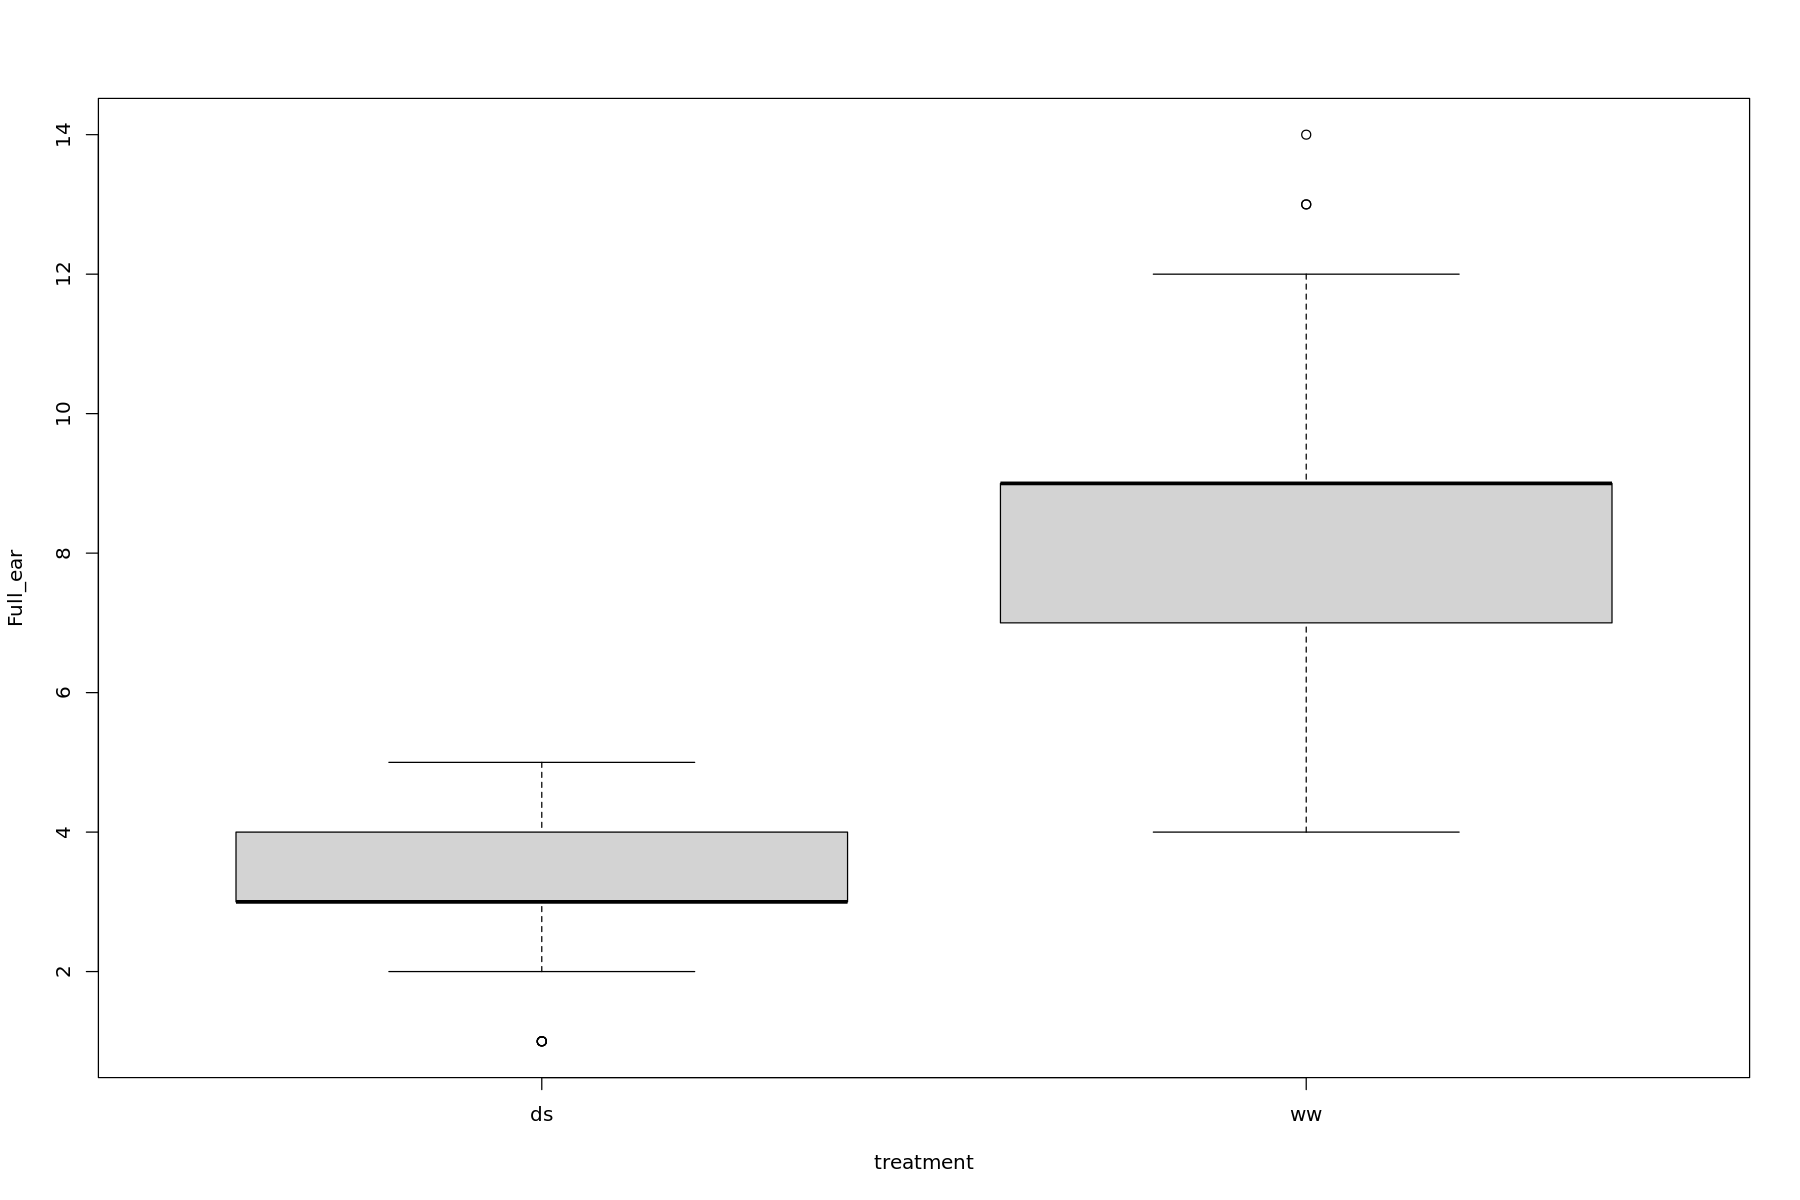

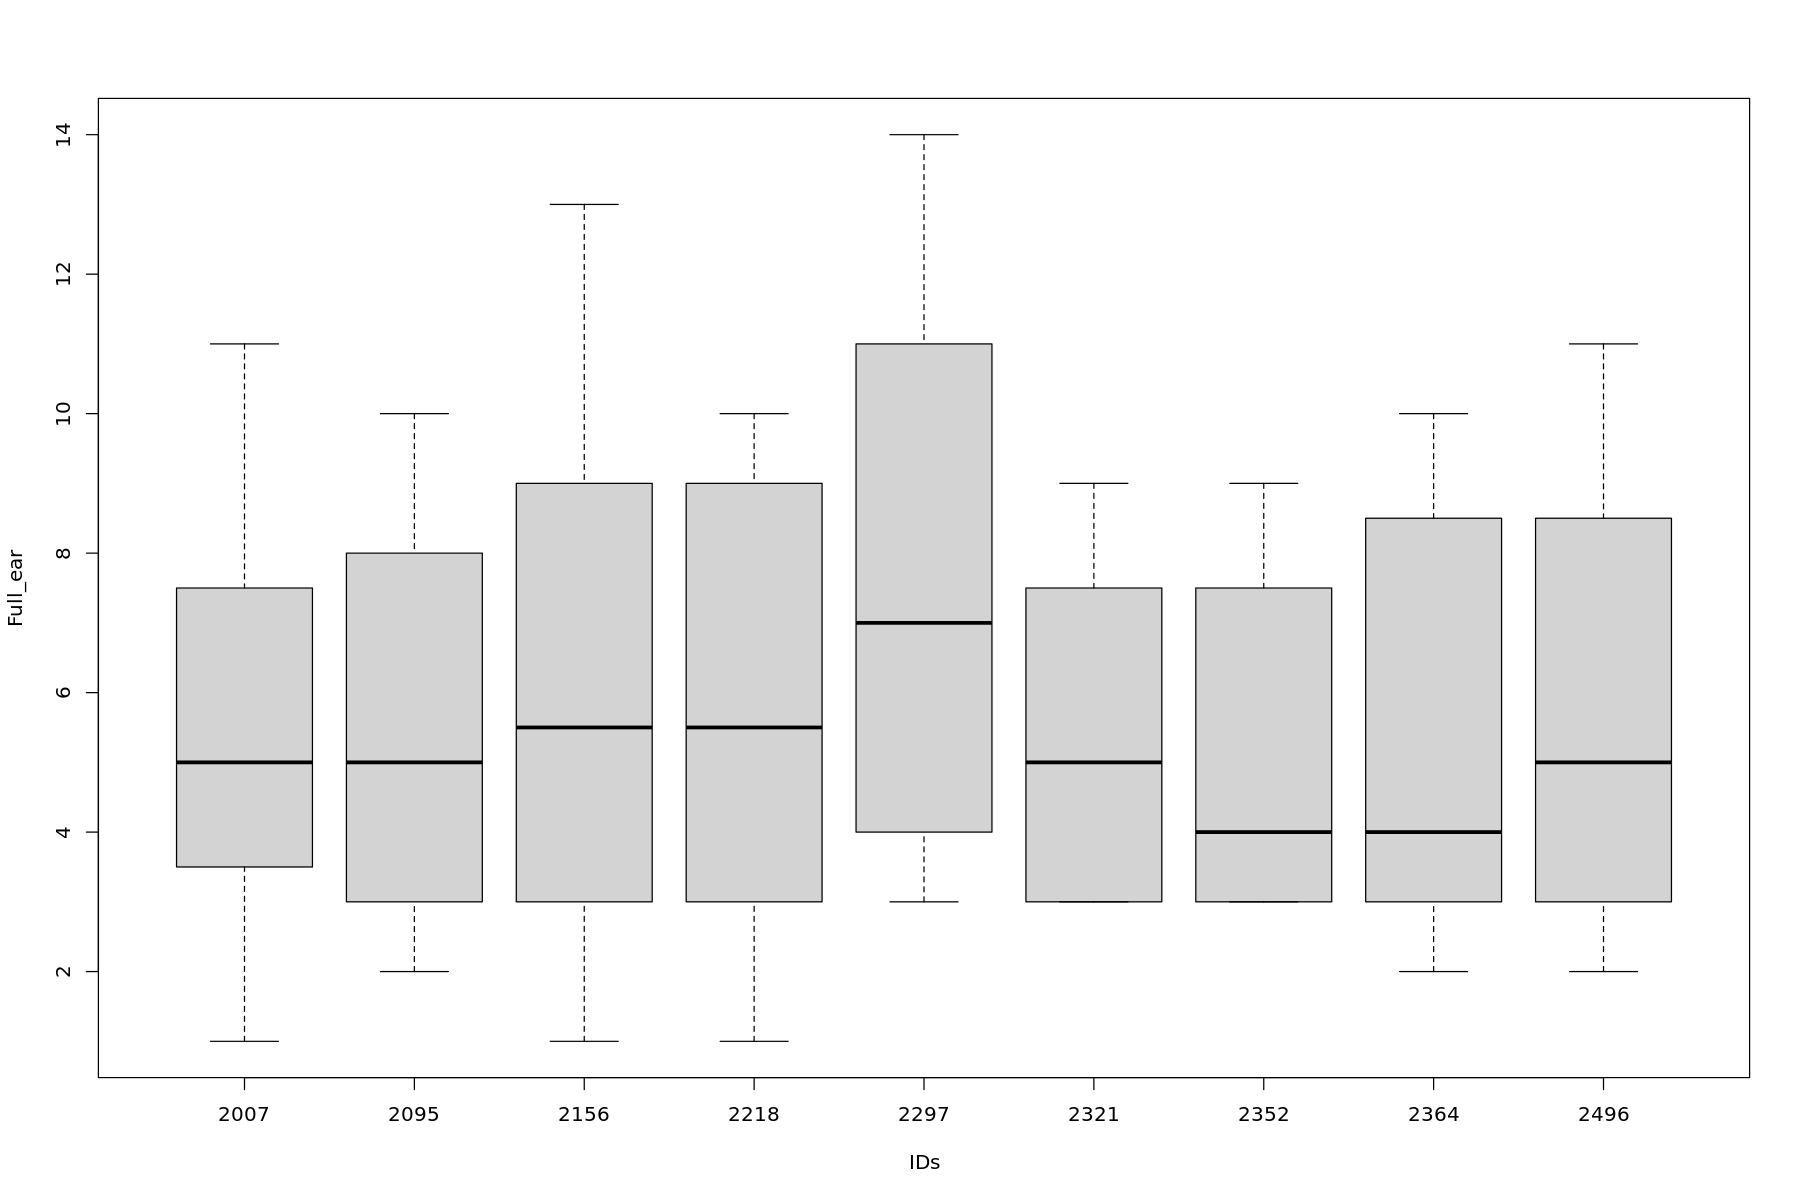

In [15]:
boxplot(Full_ear~Group, data=final.data)
boxplot(Full_ear~treatment, data=final.data)
boxplot(Full_ear~IDs, data=final.data)

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


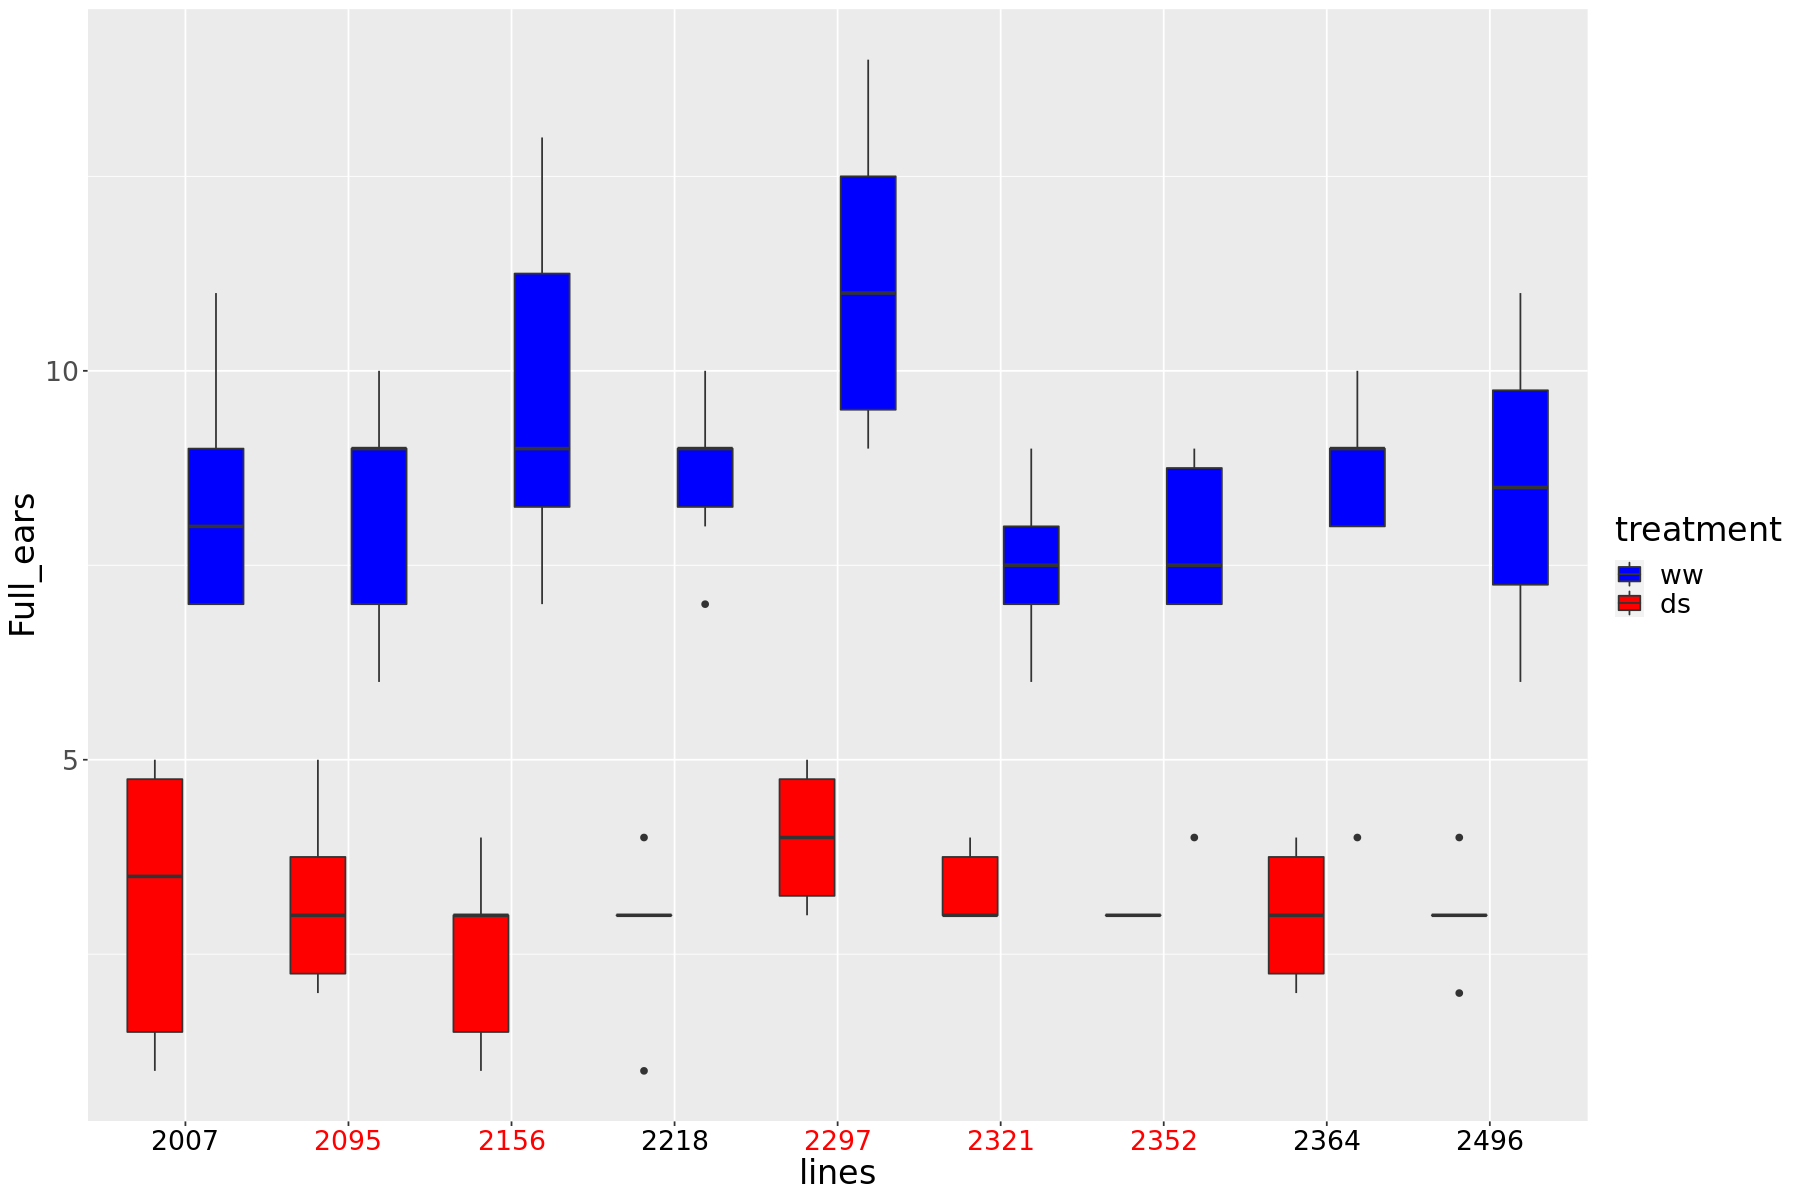

In [50]:
options(repr.plot.width=15, repr.plot.height=10)
FE <- ggplot(final.data, aes(x=IDs, y=Full_ear,  fill=treatment))+
       geom_boxplot()+
       theme(text=element_text(size = 20))+
       scale_fill_manual(breaks = final.data$treatment,
                    values = c("blue", "red")) +
        labs(y="Full_ears", x="lines")+
theme(axis.text.x = element_text(colour=c("black","red","red","black","red","red","red","black","black")))



    print(FE)

In [ ]:
FE_AN<-aov(Full_ear~treatment*IDs, data=final.data)
summary(FE_AN)


FE_AN_G<- aov(Full_ear~treatment*Group, data=final.data)
summary(FE_AN_G)

tukey<- TukeyHSD(FE_AN, conf.levels=.95)
cld_FE<- multcompLetters4(FE_AN ,tukey)
cld_FE

              Df Sum Sq Mean Sq F value Pr(>F)    
treatment      1  790.3   790.3 367.046 <2e-16 ***
IDs            8   46.6     5.8   2.704 0.0105 *  
treatment:IDs  8   27.5     3.4   1.597 0.1376    
Residuals     86  185.2     2.2                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                 Df Sum Sq Mean Sq F value Pr(>F)    
treatment         1  790.3   790.3 307.702 <2e-16 ***
Group             1    2.2     2.2   0.859  0.356    
treatment:Group   1    0.2     0.2   0.078  0.780    
Residuals       100  256.8     2.6                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

$treatment
 ww  ds 
"a" "b" 

$IDs
2297 2156 2218 2496 2007 2095 2321 2352 2364 
 "a" "ab" "ab" "ab" "ab" "ab"  "b"  "b"  "b" 

$`treatment:IDs`
ww:2297 ww:2156 ww:2218 ww:2496 ww:2007 ww:2095 ww:2364 ww:2321 ww:2352 ds:2297 
    "a"    "ab"    "ab"    "ab"    "ab"    "ab"    "ab"     "b"     "b"     "c" 
ds:2321 ds:2007 ds:2095 ds:2352 ds:2364 ds:2496 ds:2218 ds:2156 
    "c"     "c"     "c"     "c"     "c"     "c"     "c"     "c" 


In [33]:
summary_FE_t<- group_by(final.data, treatment) %>%
summarise(mean=mean(Full_ear), sd=sd(Full_ear)) %>%
arrange(desc(mean))
View(summary_FE_t)


summary_FE_l<- group_by(final.data, IDs) %>%
summarise(mean=mean(Full_ear), sd=sd(Full_ear)) %>%
arrange(desc(mean))
View(summary_FE_l)



cld_FE_t <- as.data.frame.list(cld_FE$treatment)
summary_FE_t$tukey <- cld_FE_t$Letters
View(summary_FE_t)
write.table(summary_FE_t, "summary_full_ear_t_August.csv")


cld_FE_l <- as.data.frame.list(cld_FE$IDs)
summary_FE_l$tukey <- cld_FE_l$Letters
View(summary_FE_l)
write.table(summary_FE_l, "summary_full_ear_l_August.csv")

treatment mean     sd      
1 ww        8.627451 2.019513
2 ds        3.113208 1.031436

IDs  mean     sd      
1 2297 7.583333 4.033008
2 2156 6.083333 4.144182
3 2218 5.750000 3.194455
4 2496 5.750000 3.165869
5 2007 5.545455 3.205110
6 2095 5.454545 2.944949
7 2321 5.416667 2.314316
8 2352 5.363636 2.618119
9 2364 5.272727 3.068906

treatment mean     sd       tukey
1 ww        8.627451 2.019513 a    
2 ds        3.113208 1.031436 b

IDs  mean     sd       tukey
1 2297 7.583333 4.033008 a    
2 2156 6.083333 4.144182 ab   
3 2218 5.750000 3.194455 ab   
4 2496 5.750000 3.165869 ab   
5 2007 5.545455 3.205110 ab   
6 2095 5.454545 2.944949 ab   
7 2321 5.416667 2.314316 b    
8 2352 5.363636 2.618119 b    
9 2364 5.272727 3.068906 b

In [35]:
FE_t<- read.table("summary_full_ear_t_August.csv")
FE_l<- read.table("summary_full_ear_l_August.csv")

FE_l$IDs <- as.factor(FE_l $IDs)
FE_t$treatment <- as.factor(FE_t $treatment)


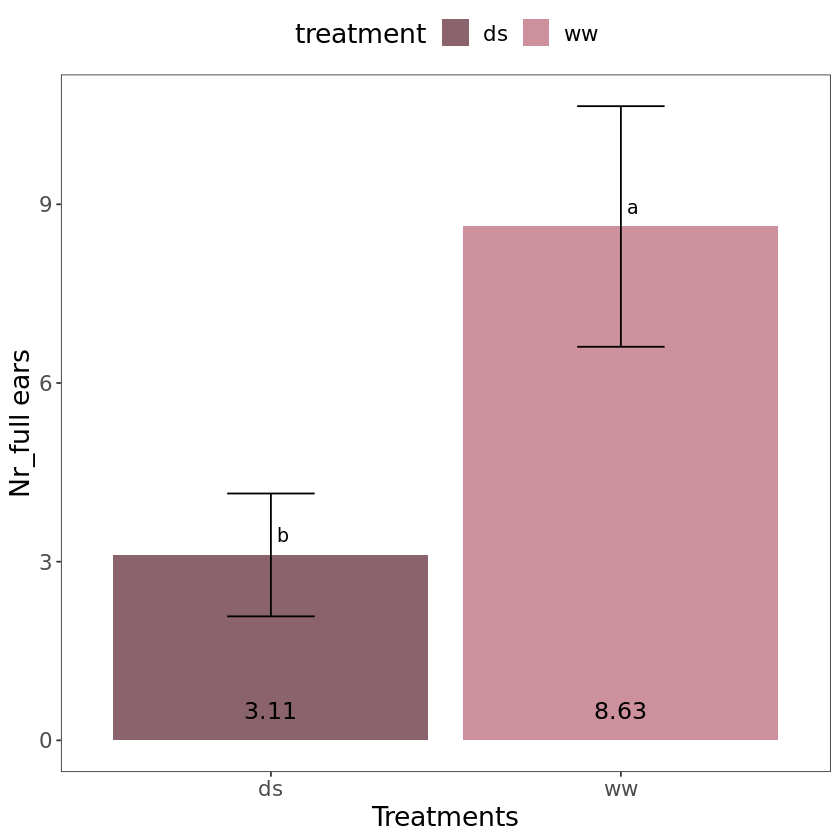

In [ ]:
options(repr.plot.width=7, repr.plot.height=7)
full_ear_t<- ggplot(data=FE_t, aes(x =treatment, y = mean, fill=treatment)) + 
  geom_bar(stat = "identity", position = "dodge" ) +
  geom_text(aes(label= tukey),position=position_dodge(0.90),  vjust=-0.9, hjust=-0.5, size = 4, colour = "black") +
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), position = position_dodge(0.9), width = 0.25) +
 labs(x="Treatments", y="Nr_full ears") +
   theme_bw() +

  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
  theme(legend.position = "top")+
theme(text = element_text(size = 16))+
scale_fill_manual(values=c("pink4","pink3"))+
geom_text(aes(label=round(mean,2), y = .5), position = position_dodge(0.90), colour="black", size= 5)
print(full_ear_t)

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


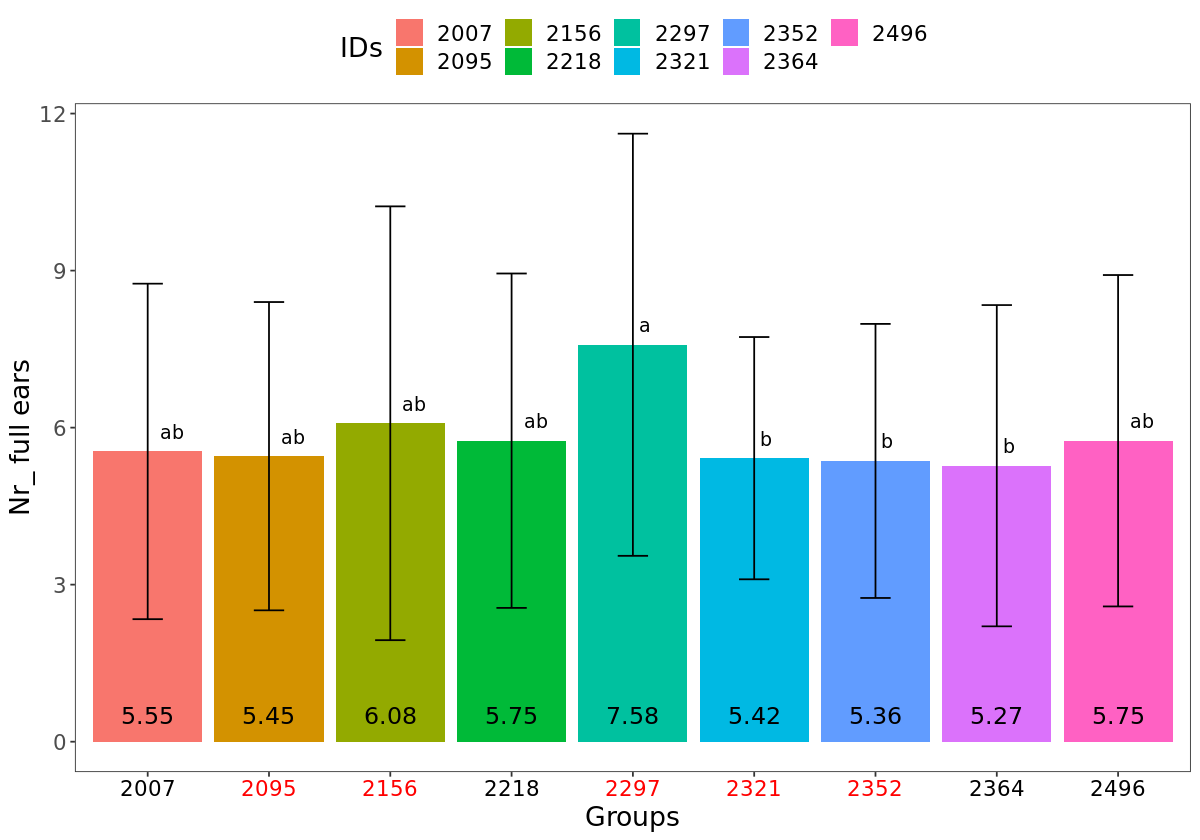

In [48]:
options(repr.plot.width=10, repr.plot.height=7)

full_ear_l<- ggplot(data=FE_l, aes(x =IDs, y = mean, fill=IDs)) + 
  geom_bar(stat = "identity", position = "dodge" ) +
  geom_text(aes(label= tukey),position=position_dodge(0.90),  vjust=-0.9, hjust=-0.5, size = 4, colour = "black") +
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), position = position_dodge(0.9), width = 0.25) +
 labs(x="Groups", y="Nr_ full ears")+
theme_bw()+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
  theme(legend.position = "top")+
theme(text = element_text(size = 16))+
theme(axis.text.x = element_text(colour=c("black","red","red","black","red","red","red","black","black")))+
#scale_fill_manual(values=c("#d8b365","#5ab4ac","#d8b365","#5ab4ac"))+
geom_text(aes(label=round(mean,2), y = .5), position = position_dodge(0.90), colour="black", size= 5)
print(full_ear_l)

# Number of the shoots having ear


In [49]:
str(final.data)


'data.frame':	104 obs. of  23 variables:
 $ X                 : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Unit              : int  121 123 125 126 130 131 133 135 136 138 ...
 $ experiment        : chr  "V22001" "V22001" "V22001" "V22001" ...
 $ IDs               : Factor w/ 9 levels "2007","2095",..: 4 4 3 5 4 7 3 4 8 7 ...
 $ treatment         : Factor w/ 2 levels "ds","ww": 2 1 1 1 2 1 1 2 1 1 ...
 $ BBCH              : chr  "92" "92" "92" "92" ...
 $ Collection.date   : chr  "08/12/22" "08/08/22" "08/09/22" "08/08/22" ...
 $ max.Height        : num  91.2 78 83 61 102 ...
 $ Biomass           : num  14.75 4.72 7.76 5.61 14.3 ...
 $ Shoots            : num  10 5 4 7 9 3 5 9 4 3 ...
 $ Shoots_with_ear   : num  10 5 3 6 9 3.5 4 9 2 3 ...
 $ Shoots_without_ear: num  0 0 1 1 0 0 1 0 2 0 ...
 $ Nr_ears           : num  10 5 3 6 9 3 4 9 2 3 ...
 $ Full_ear          : num  10 3 1 5 9 3 4 9 2 3 ...
 $ Half_ear          : num  0 2 0 1 0 0 0 0 0 0 ...
 $ Weight_ear        : num  15.43 3.55 1.21 3.36 10

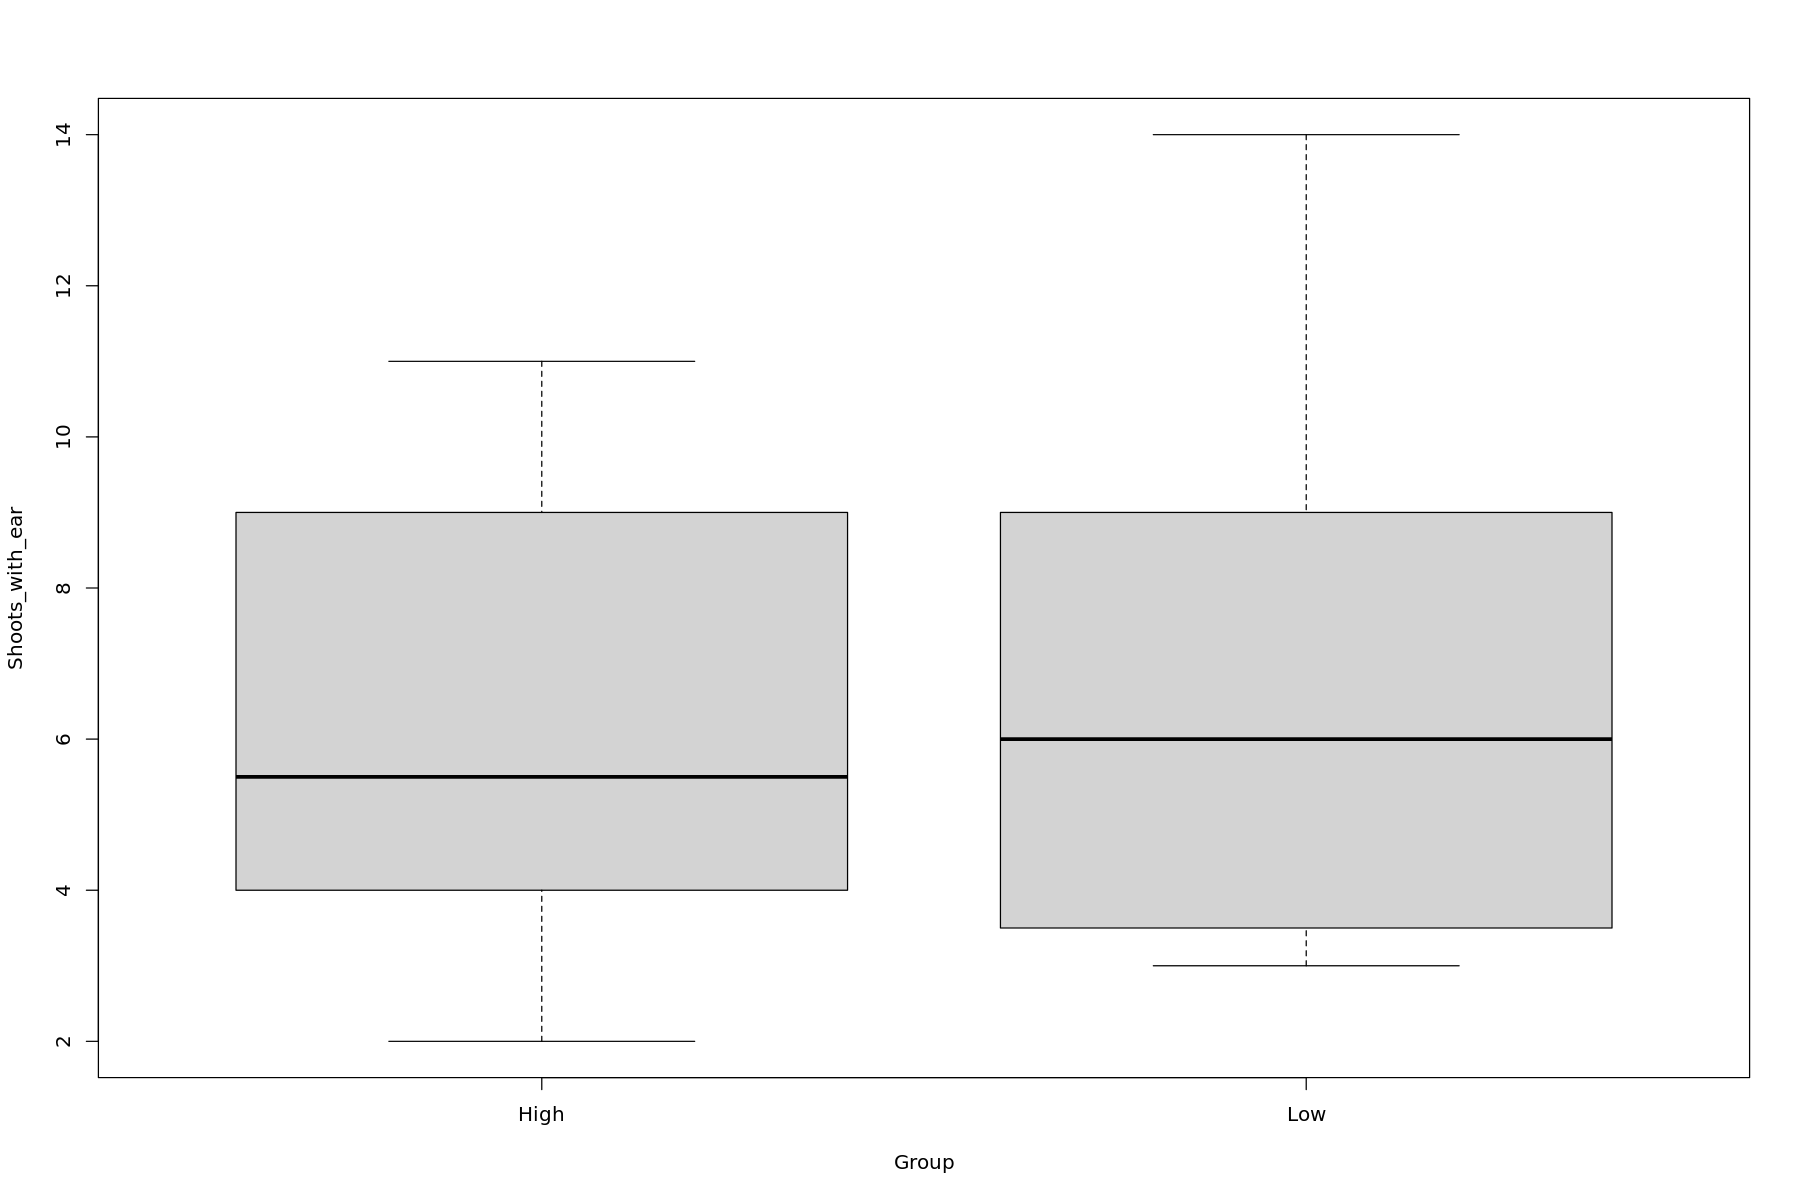

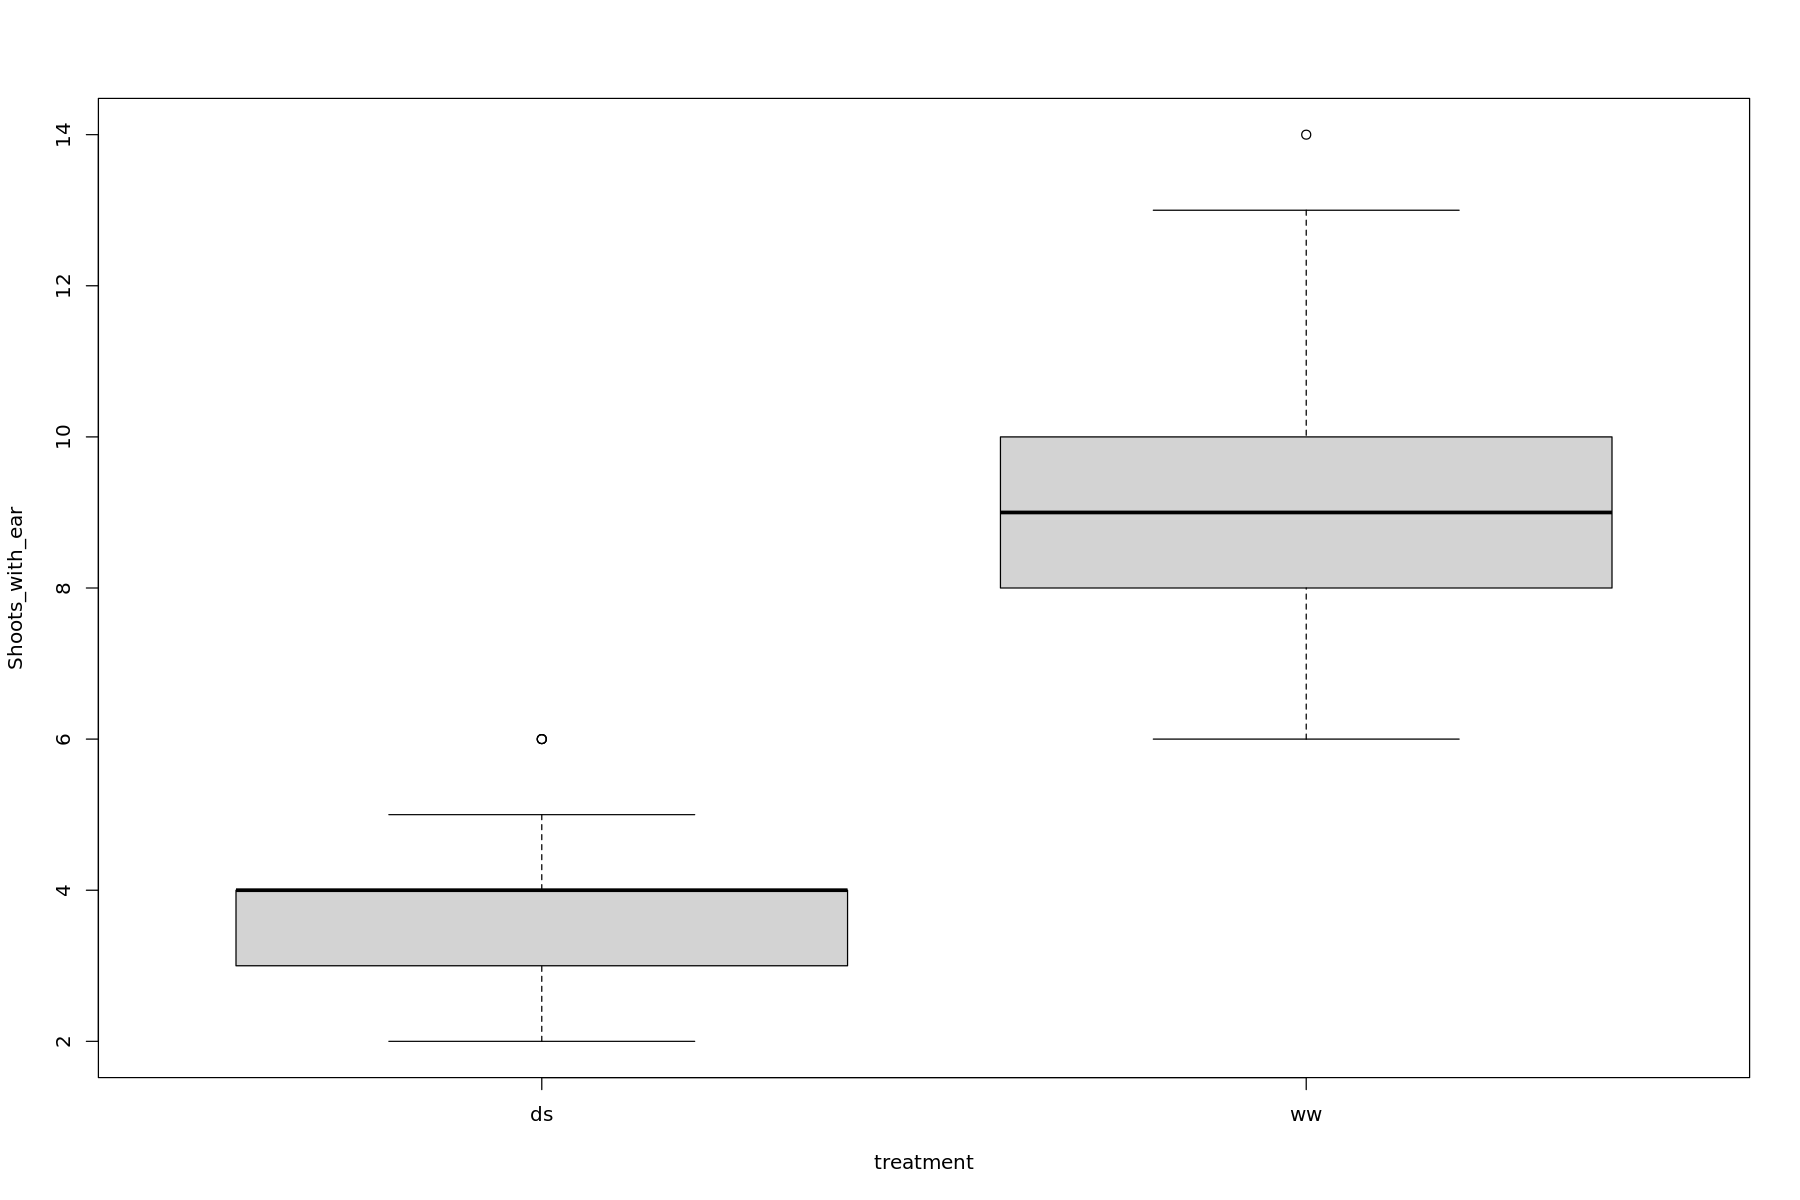

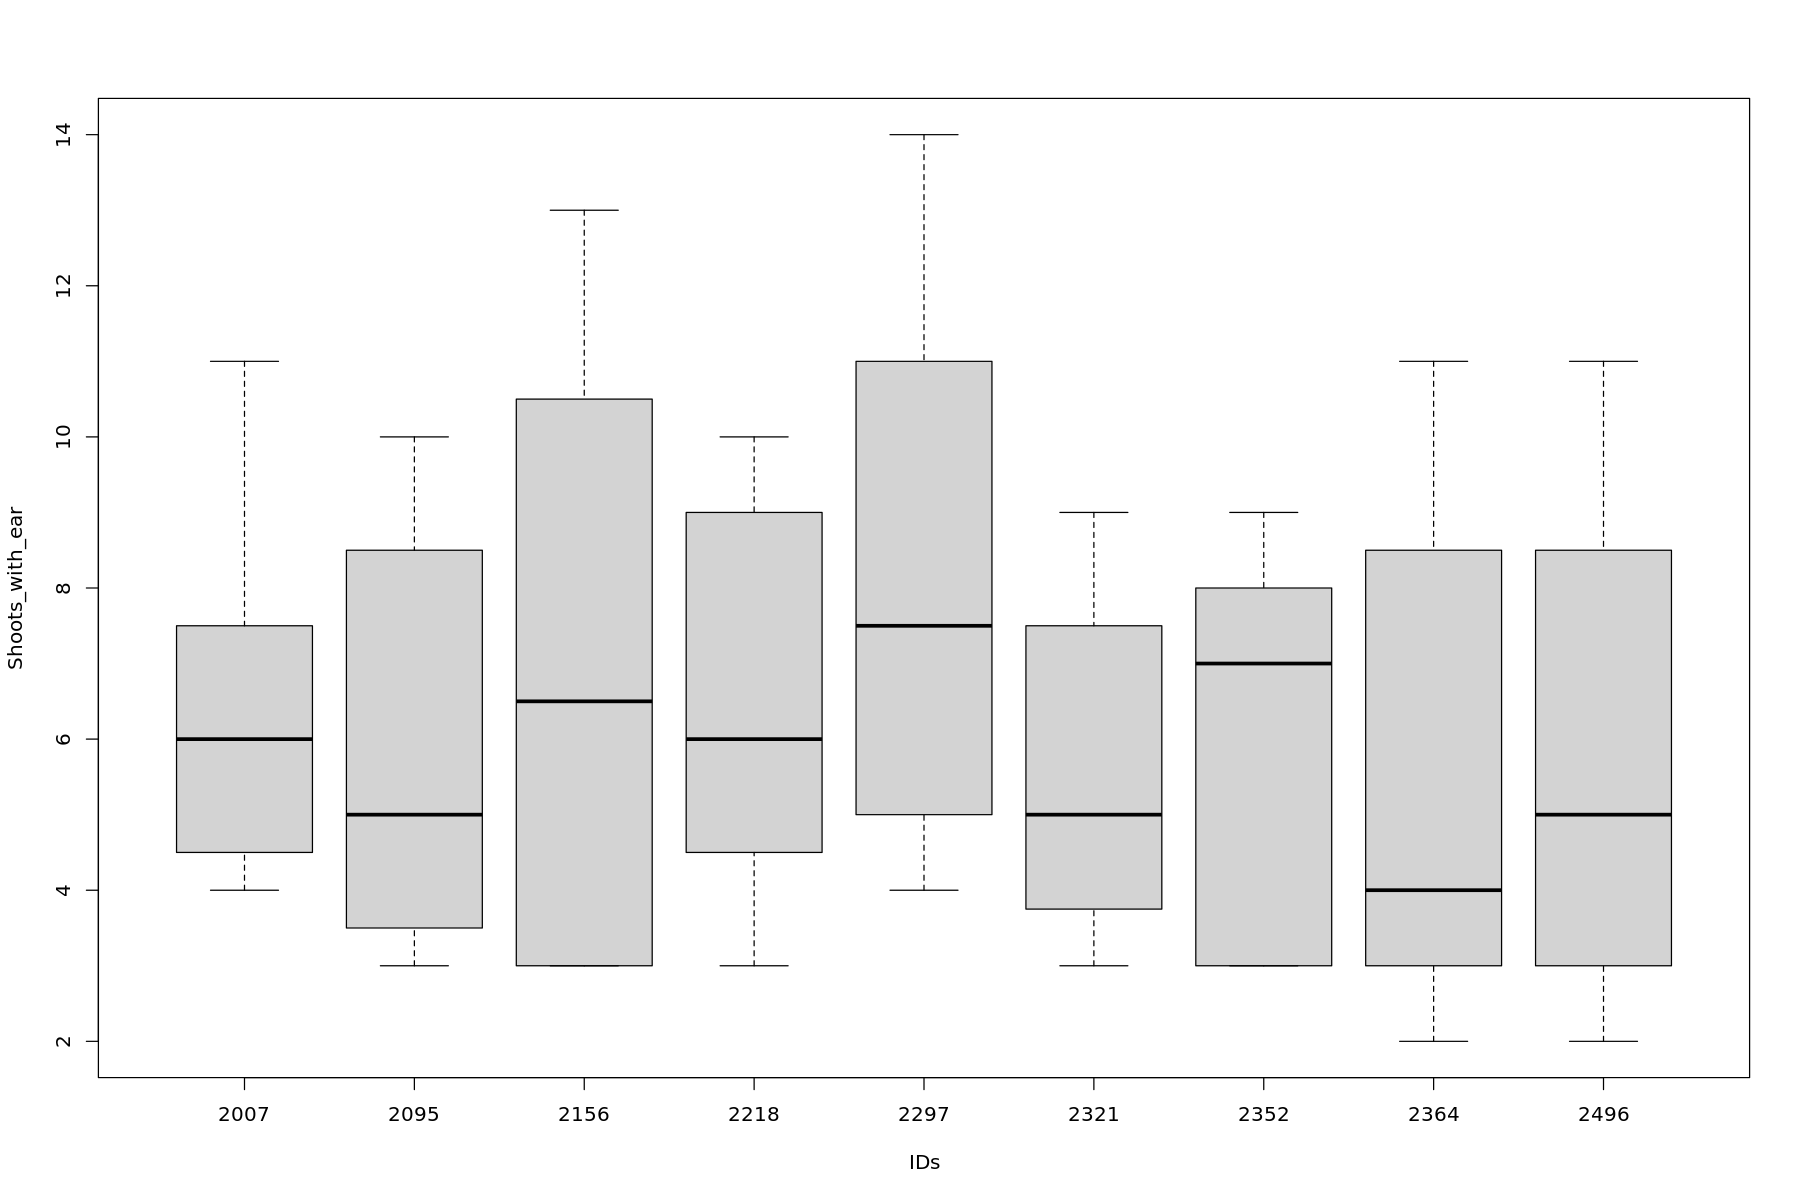

In [51]:
boxplot(Shoots_with_ear~Group, data=final.data)
boxplot(Shoots_with_ear~treatment, data=final.data)
boxplot(Shoots_with_ear~IDs, data=final.data)

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


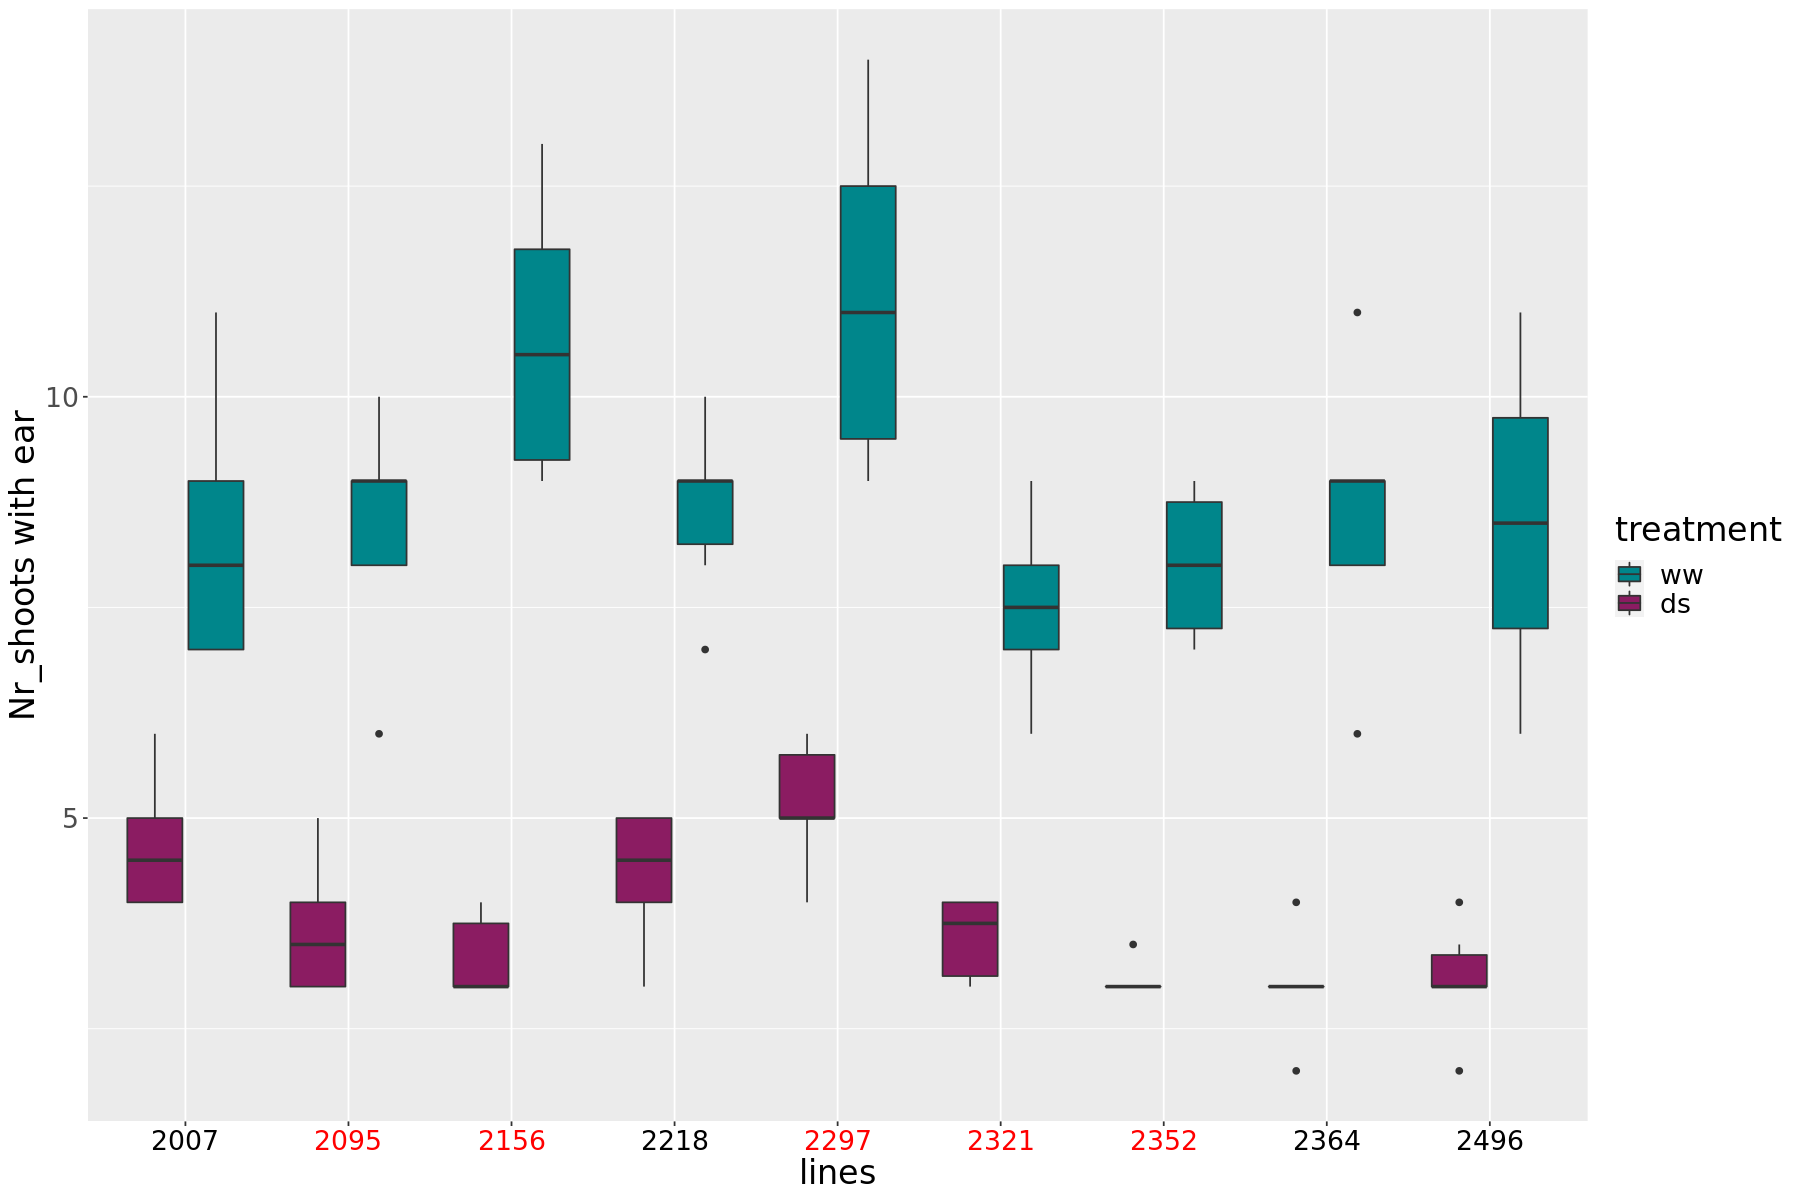

In [107]:
options(repr.plot.width=15, repr.plot.height=10)
SWE<- ggplot(final.data, aes(x=IDs, y=Shoots_with_ear,  fill=treatment))+
       geom_boxplot()+
#scale_fill_manual(values=c("pink4","pink3"))+
       theme(text=element_text(size = 20))+
       scale_fill_manual(breaks = final.data$treatment,
                    values = c("turquoise4","maroon4")) +
        labs(y="Nr_shoots with ear", x="lines")+
theme(axis.text.x = element_text(colour=c("black","red","red","black","red","red","red","black","black")))



    print(SWE)

In [66]:
SWE_AN<- aov(Shoots_with_ear~treatment*IDs, data=final.data)
summary(SWE_AN)


SWE_AN_G<- aov(Shoots_with_ear~Group*treatment, data=final.data)
summary(SWE_AN_G)

              Df Sum Sq Mean Sq F value   Pr(>F)    
treatment      1  681.0   681.0 488.554  < 2e-16 ***
IDs            8   69.0     8.6   6.186 2.71e-06 ***
treatment:IDs  8   29.9     3.7   2.681   0.0111 *  
Residuals     86  119.9     1.4                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                 Df Sum Sq Mean Sq F value Pr(>F)    
Group             1    4.7     4.7   2.202  0.141    
treatment         1  678.9   678.9 317.486 <2e-16 ***
Group:treatment   1    2.3     2.3   1.095  0.298    
Residuals       100  213.8     2.1                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [74]:
tukey<- TukeyHSD(SWE_AN, conf.levels=.95)
cld.swe<- multcompLetters4(SWE_AN,tukey)
cld.swe


summary_swe_Int<- group_by(final.data, treatment,IDs) %>%
summarise(mean=mean(Shoots_with_ear), sd=sd(Shoots_with_ear)) %>%
arrange(desc(mean))
View(summary_swe_Int)

cld<- as.data.frame.list(cld.swe$`treatment:IDs`)
summary_swe_Int$tukey<- cld$Letters
View(summary_swe_Int)
write.table(summary_swe_Int, "summary_SWE_Int.casv")

$treatment
 ww  ds 
"a" "b" 

$IDs
2297 2156 2218 2007 2095 2496 2352 2364 2321 
 "a" "ab"  "b"  "b"  "b"  "b"  "b"  "b"  "b" 

$`treatment:IDs`
ww:2297 ww:2156 ww:2218 ww:2364 ww:2496 ww:2007 ww:2095 ww:2352 ww:2321 ds:2297 
    "a"    "ab"    "bc"   "abc"    "bc"    "bc"    "bc"     "c"    "cd"    "de" 
ds:2007 ds:2218 ds:2095 ds:2321 ds:2156 ds:2352 ds:2496 ds:2364 
    "e"     "e"     "e"     "e"     "e"     "e"     "e"     "e" 


`summarise()` has grouped output by 'treatment'. You can override using the
`.groups` argument.


treatment IDs  mean      sd       
1  ww        2297 11.166667 2.0412415
2  ww        2156 10.666667 1.6329932
3  ww        2218  8.666667 1.0327956
4  ww        2364  8.600000 1.8165902
5  ww        2496  8.500000 1.8708287
6  ww        2007  8.400000 1.6733201
7  ww        2095  8.400000 1.5165751
8  ww        2352  8.000000 0.8944272
9  ww        2321  7.500000 1.0488088
10 ds        2297  5.166667 0.7527727
11 ds        2007  4.666667 0.8164966
12 ds        2218  4.333333 0.8164966
13 ds        2095  3.666667 0.8164966
14 ds        2321  3.583333 0.4915960
15 ds        2156  3.333333 0.5163978
16 ds        2352  3.100000 0.2236068
17 ds        2496  3.083333 0.6645801
18 ds        2364  3.000000 0.6324555

treatment IDs  mean      sd        tukey
1  ww        2297 11.166667 2.0412415 a    
2  ww        2156 10.666667 1.6329932 ab   
3  ww        2218  8.666667 1.0327956 bc   
4  ww        2364  8.600000 1.8165902 abc  
5  ww        2496  8.500000 1.8708287 bc   
6  ww        2007  8.400000 1.6733201 bc   
7  ww        2095  8.400000 1.5165751 bc   
8  ww        2352  8.000000 0.8944272 c    
9  ww        2321  7.500000 1.0488088 cd   
10 ds        2297  5.166667 0.7527727 de   
11 ds        2007  4.666667 0.8164966 e    
12 ds        2218  4.333333 0.8164966 e    
13 ds        2095  3.666667 0.8164966 e    
14 ds        2321  3.583333 0.4915960 e    
15 ds        2156  3.333333 0.5163978 e    
16 ds        2352  3.100000 0.2236068 e    
17 ds        2496  3.083333 0.6645801 e    
18 ds        2364  3.000000 0.6324555 e

In [76]:
SWE_Int<-  read.table("summary_SWE_Int.casv")

SWE_Int$IDs <- as.factor(SWE_Int $IDs)
SWE_Int$treatment <- as.factor(SWE_Int $treatment)

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


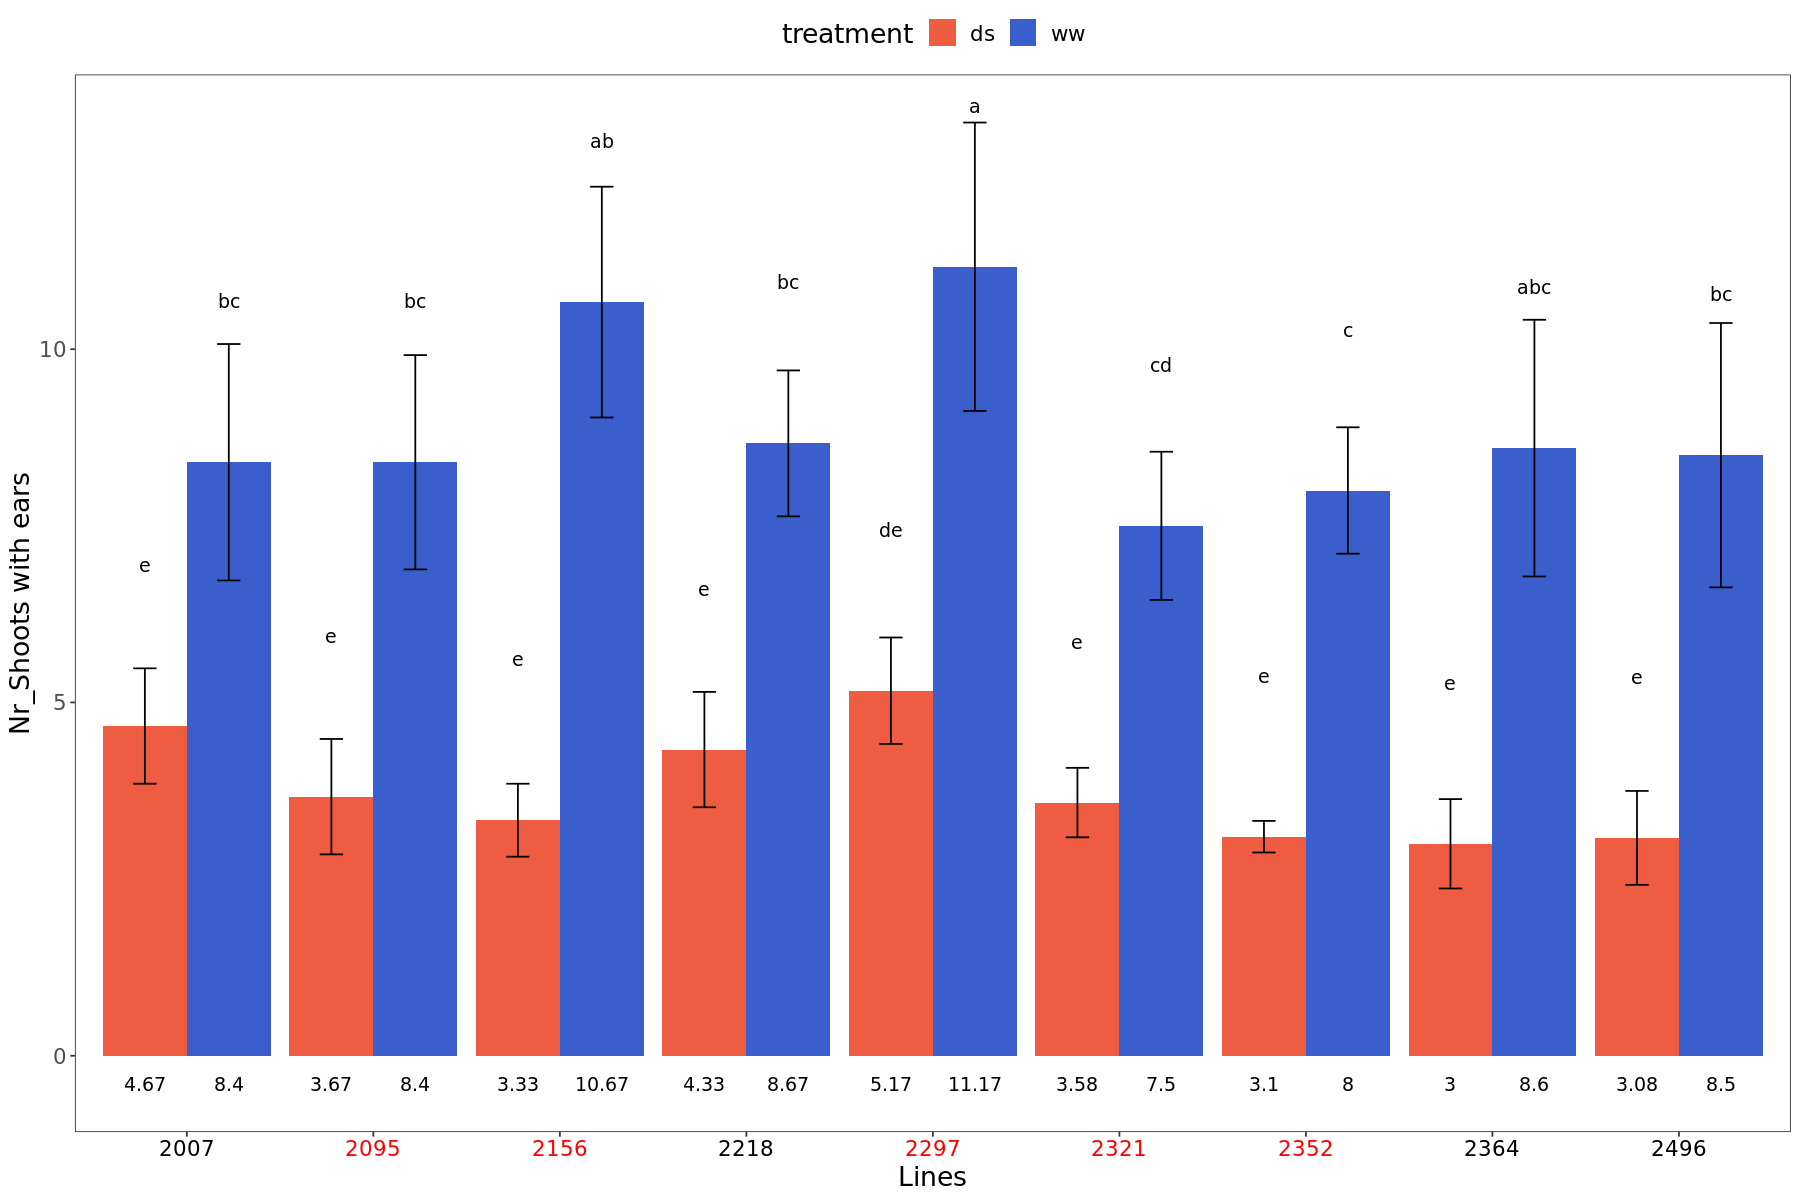

In [89]:
options(repr.plot.width=15,  repr.plot.height=10)
SWE <- ggplot(data=as.data.frame(SWE_Int), aes(x =IDs, y = mean, fill=treatment)) + 
  geom_bar(stat = "identity", position = "dodge" ) +
  geom_text(aes(label= tukey),position=position_dodge(0.90),  vjust=-11, hjust=.5, size = 4, colour = "black") +
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), position = position_dodge(0.9), width = 0.25) +
 labs(x="Lines", y="Nr_Shoots with ears") +
scale_fill_manual(values=c("tomato2","royalblue3"))+
   theme_bw() +
theme(axis.text.x = element_text(colour=c("black","red","red","black","red","red","red","black","black")))+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank() ) +
  theme(legend.position = "top")+
theme(text = element_text(size = 16))+
geom_text(aes(label=round(mean,2), y = -0.4), position = position_dodge(0.90), colour="black", size= 4)
print(SWE)

# Number of the shoots without ear( empthy shoots)

'data.frame':	104 obs. of  23 variables:
 $ X                 : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Unit              : int  121 123 125 126 130 131 133 135 136 138 ...
 $ experiment        : chr  "V22001" "V22001" "V22001" "V22001" ...
 $ IDs               : Factor w/ 9 levels "2007","2095",..: 4 4 3 5 4 7 3 4 8 7 ...
 $ treatment         : Factor w/ 2 levels "ds","ww": 2 1 1 1 2 1 1 2 1 1 ...
 $ BBCH              : chr  "92" "92" "92" "92" ...
 $ Collection.date   : chr  "08/12/22" "08/08/22" "08/09/22" "08/08/22" ...
 $ max.Height        : num  91.2 78 83 61 102 ...
 $ Biomass           : num  14.75 4.72 7.76 5.61 14.3 ...
 $ Shoots            : num  10 5 4 7 9 3 5 9 4 3 ...
 $ Shoots_with_ear   : num  10 5 3 6 9 3.5 4 9 2 3 ...
 $ Shoots_without_ear: num  0 0 1 1 0 0 1 0 2 0 ...
 $ Nr_ears           : num  10 5 3 6 9 3 4 9 2 3 ...
 $ Full_ear          : num  10 3 1 5 9 3 4 9 2 3 ...
 $ Half_ear          : num  0 2 0 1 0 0 0 0 0 0 ...
 $ Weight_ear        : num  15.43 3.55 1.21 3.36 10

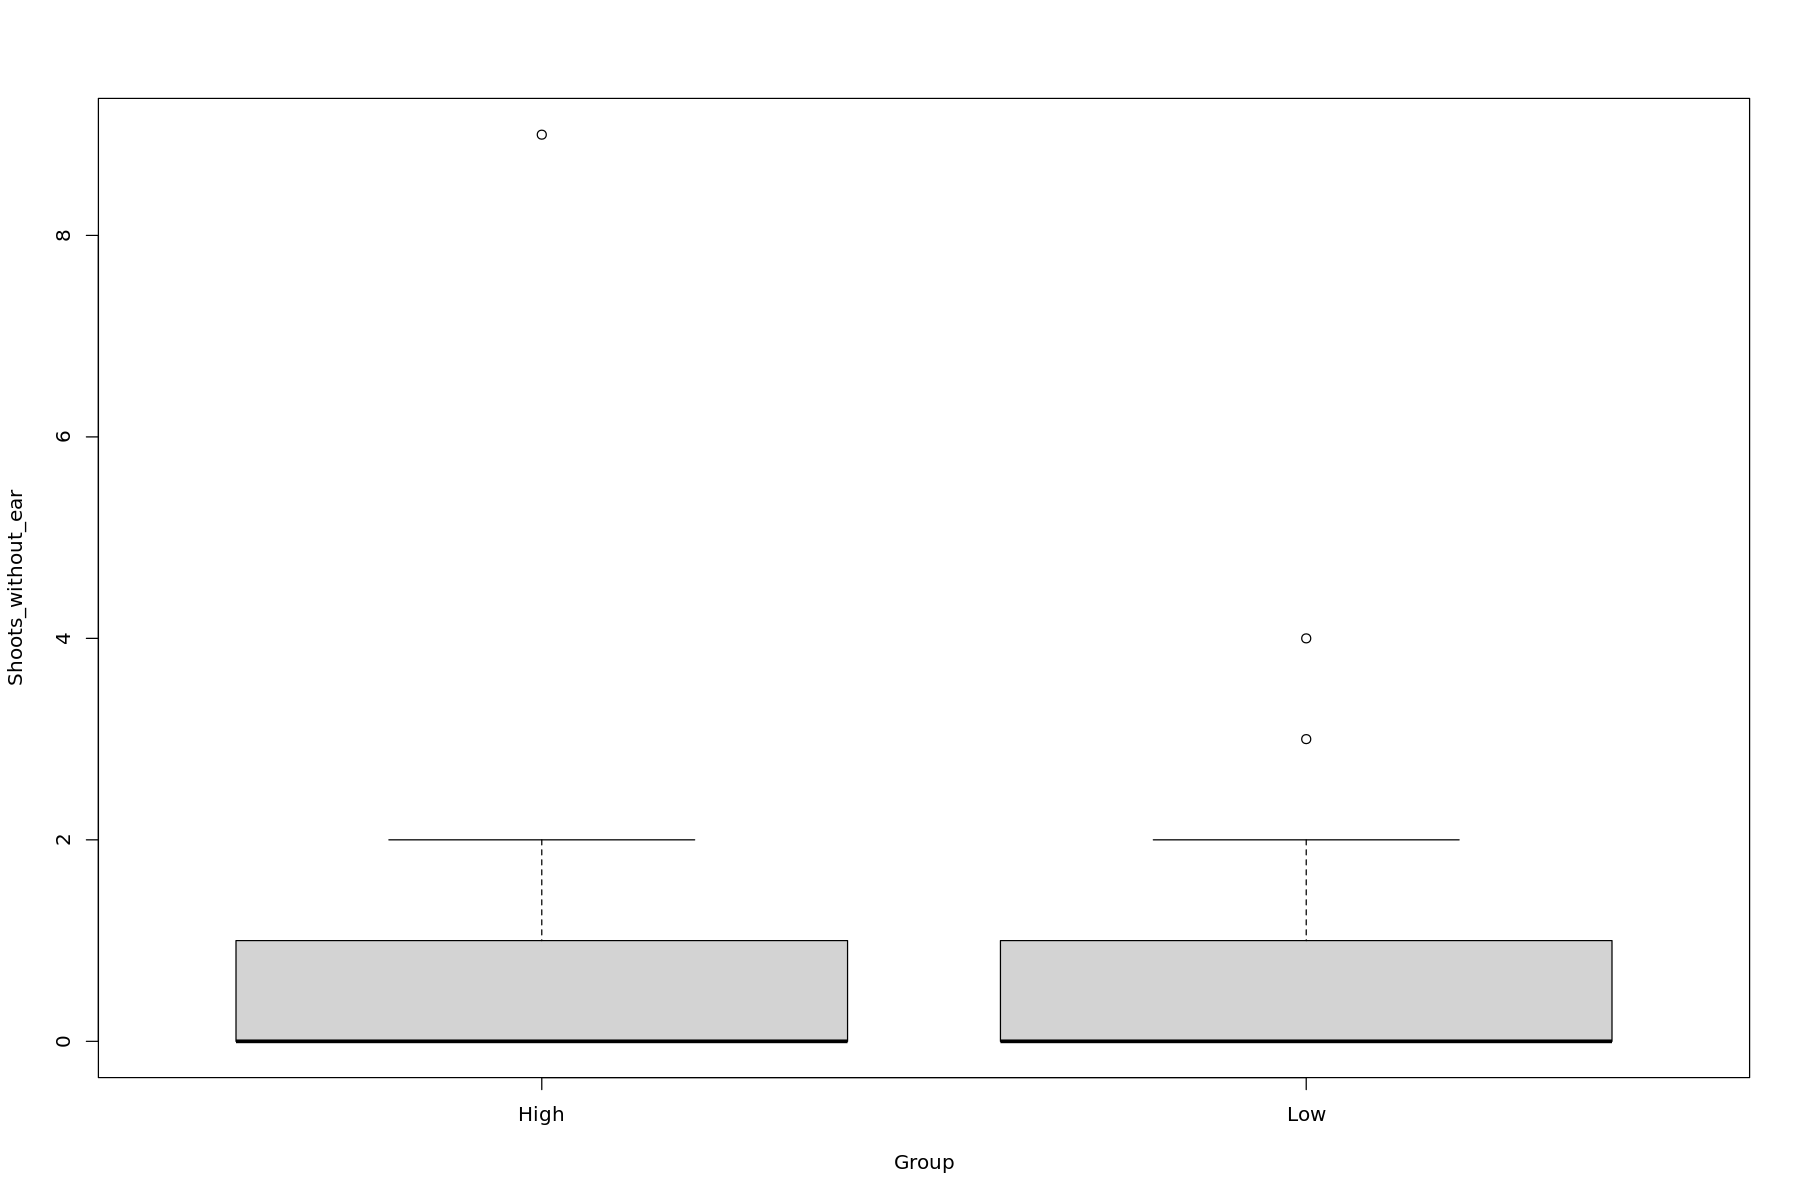

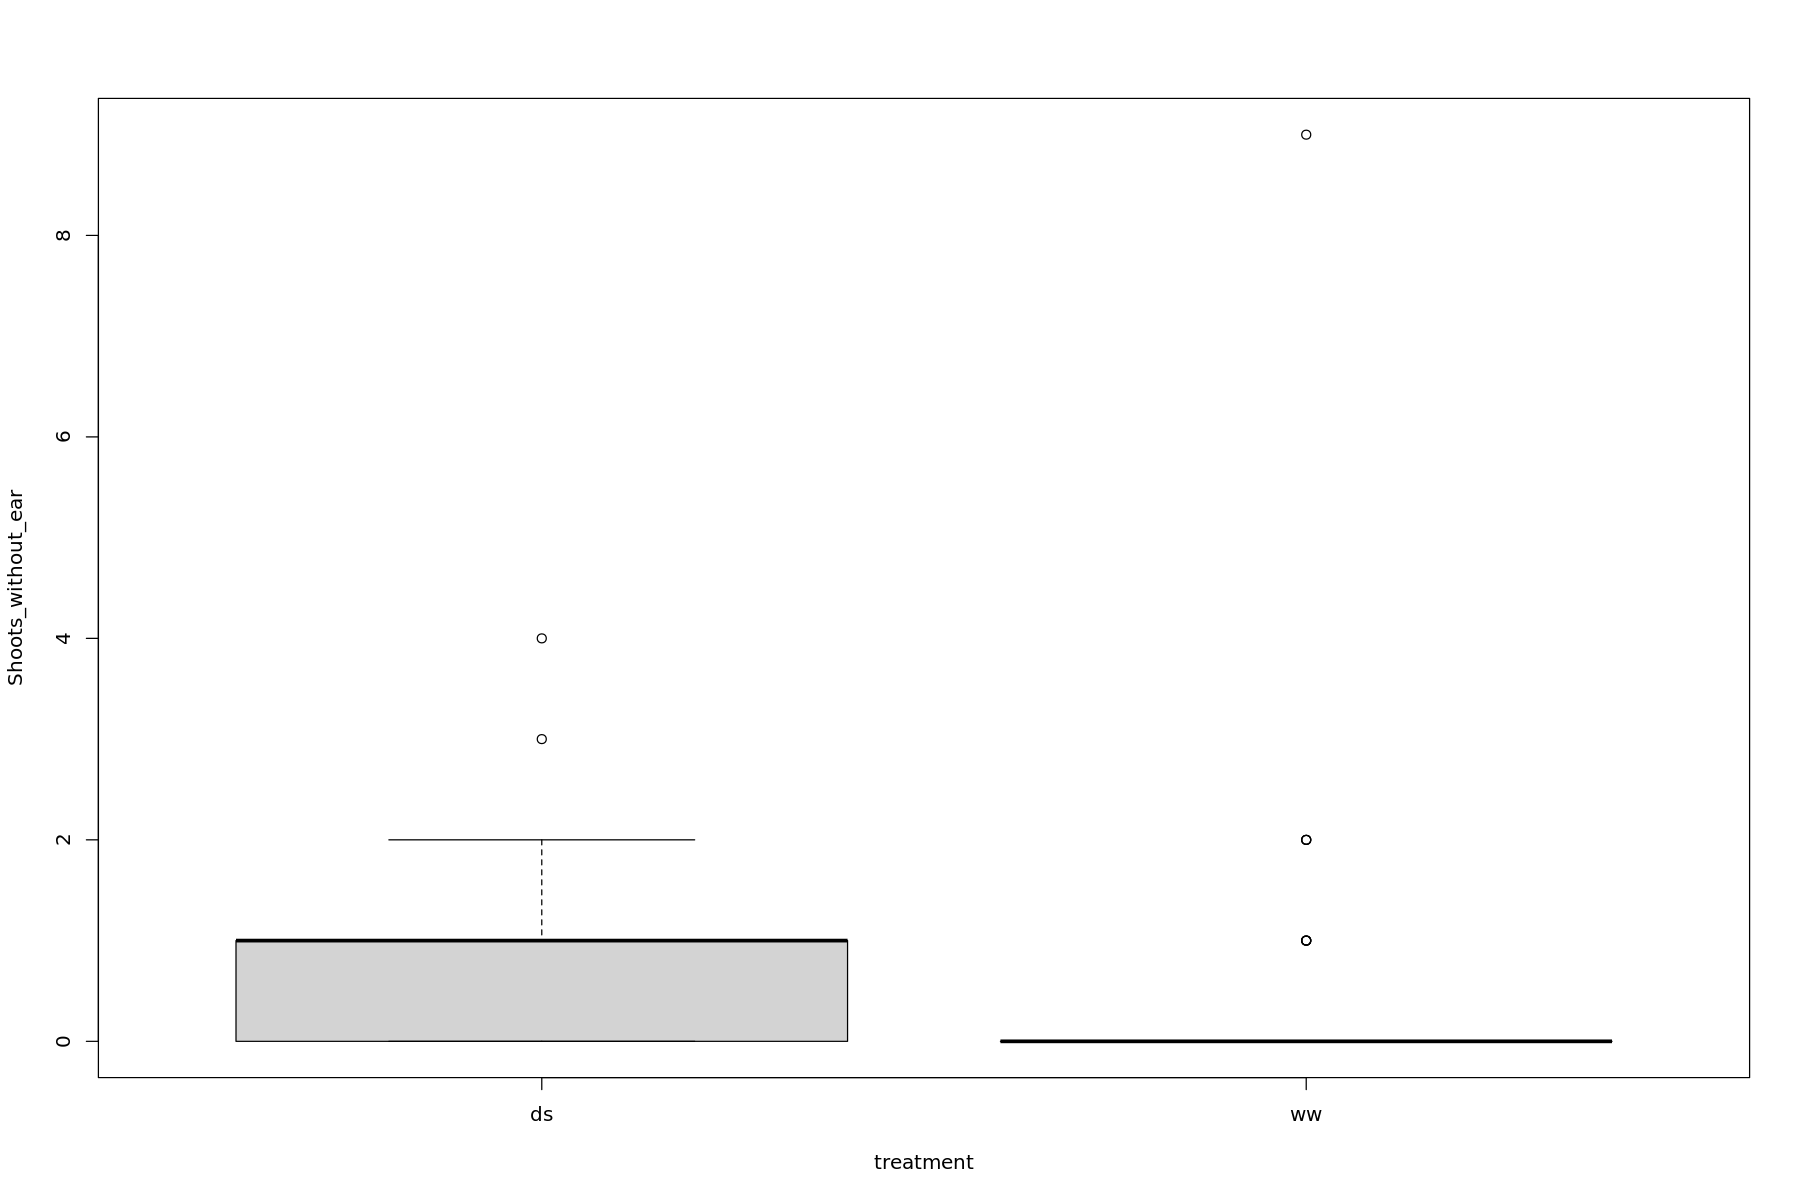

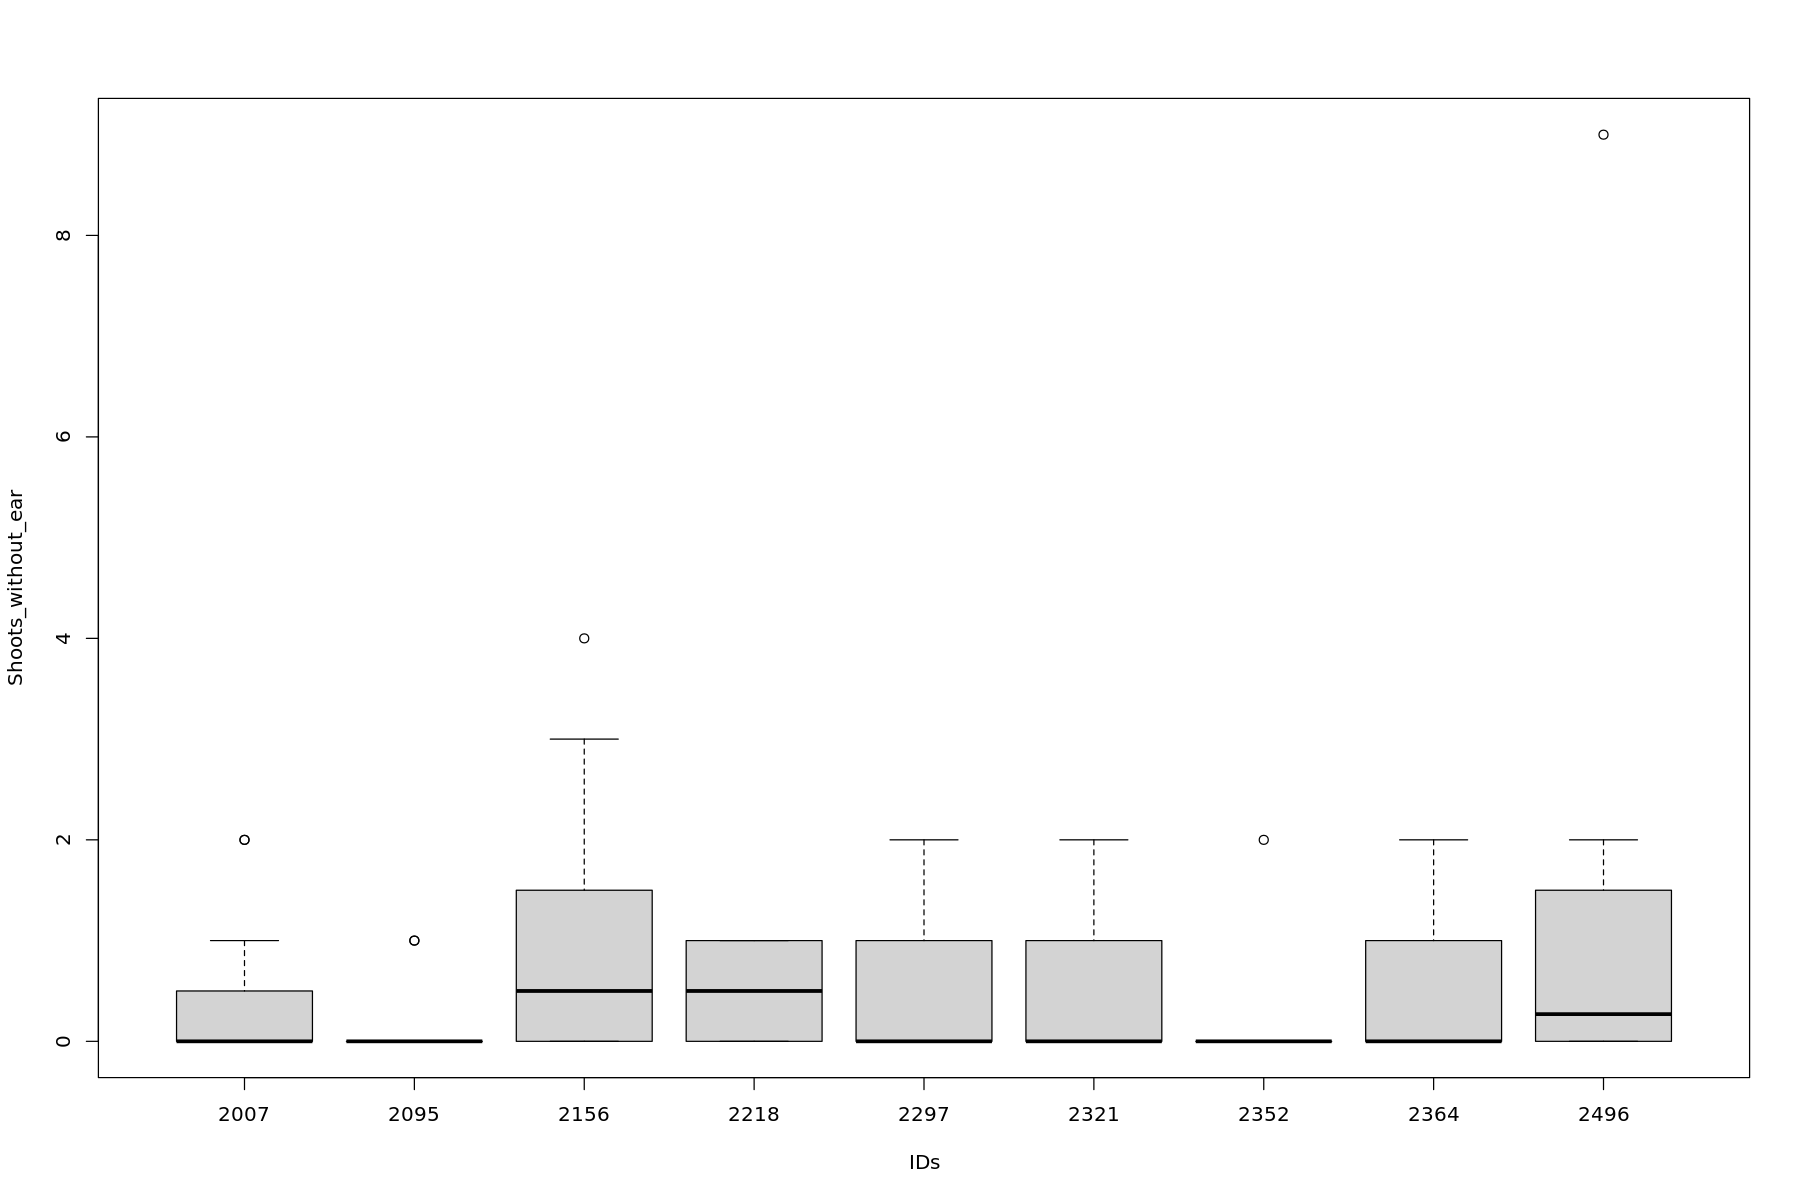

In [91]:
str(final.data)
boxplot(Shoots_without_ear~Group, data=final.data)
boxplot(Shoots_without_ear~treatment, data=final.data)
boxplot(Shoots_without_ear~IDs, data=final.data)

In [96]:
SNE<- aov(Shoots_without_ear~treatment*IDs, data=final.data)
summary(SNE)

SNE_G<- aov(Shoots_without_ear~treatment*Group, data=final.data)
summary(SNE_G)

pwc2 <- final.data %>% 
pairwise_t_test(Shoots_without_ear~Group, pool.sd = TRUE, p.adjust.method = "bonferroni")
pwc2


pwc1 <- final.data %>% 
pairwise_t_test(Shoots_without_ear~treatment, pool.sd = TRUE, p.adjust.method = "bonferroni")
pwc1

              Df Sum Sq Mean Sq F value Pr(>F)  
treatment      1   4.00   4.001   3.262 0.0744 .
IDs            8  12.46   1.558   1.270 0.2698  
treatment:IDs  8  13.24   1.656   1.350 0.2305  
Residuals     86 105.50   1.227                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                 Df Sum Sq Mean Sq F value Pr(>F)  
treatment         1   4.00   4.001   3.096 0.0816 .
Group             1   1.40   1.397   1.081 0.3009  
treatment:Group   1   0.55   0.554   0.428 0.5143  
Residuals       100 129.25   1.293                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

.y.                group1 group2 n1 n2 p     p.signif p.adj p.adj.signif
1 Shoots_without_ear High   Low    46 58 0.287 ns       0.287 ns

.y.                group1 group2 n1 n2 p      p.signif p.adj  p.adj.signif
1 Shoots_without_ear ds     ww     53 51 0.0808 ns       0.0808 ns